In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
tf.__version__

'2.3.0'

In [2]:
tfds.__version__

'3.2.1'


# Only if you have a GPU

In [2]:
######## GPU CONFIGS FOR RTX 2070 ###############
## Please ignore if not training on GPU       ##
## this is important for running CuDNN on GPU ##

tf.keras.backend.clear_session() #- for easy reset of notebook state

# chck if GPU can be seen by TF
tf.config.list_physical_devices('GPU')
# only if you want to see how commands are executed, uncomment below
# tf.debugging.set_log_device_placement(True)
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.experimental.set_memory_growth(gpus[0], True)
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)
###############################################


1 Physical GPUs, 1 Logical GPU


# Loading the Data

In [4]:
!wget https://gmb.let.rug.nl/releases/gmb-2.2.0.zip

--2020-12-08 20:12:46--  https://gmb.let.rug.nl/releases/gmb-2.2.0.zip
Resolving gmb.let.rug.nl (gmb.let.rug.nl)... 129.125.2.210
Connecting to gmb.let.rug.nl (gmb.let.rug.nl)|129.125.2.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 841163535 (802M) [application/zip]
Saving to: ‘gmb-2.2.0.zip.1’

gmb-2.2.0.zip.1       4%[                    ]  37.51M   418KB/s    eta 59m 56s^C


In [5]:
# !unzip -o gmb-2.2.0.zip  <= use the -o to expand and overwrite whtout prompting
!unzip gmb-2.2.0.zip

Archive:  gmb-2.2.0.zip
   creating: gmb-2.2.0/
   creating: gmb-2.2.0/data/
   creating: gmb-2.2.0/data/p76/
   creating: gmb-2.2.0/data/p76/d0310/
  inflating: gmb-2.2.0/data/p76/d0310/en.met  
  inflating: gmb-2.2.0/data/p76/d0310/en.raw  
  inflating: gmb-2.2.0/data/p76/d0310/en.tok.off  
  inflating: gmb-2.2.0/data/p76/d0310/en.tok.iob  
  inflating: gmb-2.2.0/data/p76/d0310/en.tags  
  inflating: gmb-2.2.0/data/p76/d0310/en.der.xml  
  inflating: gmb-2.2.0/data/p76/d0310/en.drs.xml  
  inflating: gmb-2.2.0/data/p76/d0310/en.drg  
   creating: gmb-2.2.0/data/p76/d0689/
  inflating: gmb-2.2.0/data/p76/d0689/en.met  
  inflating: gmb-2.2.0/data/p76/d0689/en.raw  
  inflating: gmb-2.2.0/data/p76/d0689/en.tok.off  
  inflating: gmb-2.2.0/data/p76/d0689/en.tok.iob  
  inflating: gmb-2.2.0/data/p76/d0689/en.tags  
  inflating: gmb-2.2.0/data/p76/d0689/en.der.xml  
  inflating: gmb-2.2.0/data/p76/d0689/en.drs.xml  
  inflating: gmb-2.2.0/data/p76/d0689/en.drg  
   creating: gmb-2.2.0/dat

  inflating: gmb-2.2.0/data/p76/d0029/en.drs.xml  
  inflating: gmb-2.2.0/data/p76/d0029/en.drg  
   creating: gmb-2.2.0/data/p76/d0394/
  inflating: gmb-2.2.0/data/p76/d0394/en.met  
  inflating: gmb-2.2.0/data/p76/d0394/en.raw  
  inflating: gmb-2.2.0/data/p76/d0394/en.tok.off  
  inflating: gmb-2.2.0/data/p76/d0394/en.tok.iob  
  inflating: gmb-2.2.0/data/p76/d0394/en.tags  
  inflating: gmb-2.2.0/data/p76/d0394/en.der.xml  
  inflating: gmb-2.2.0/data/p76/d0394/en.drs.xml  
  inflating: gmb-2.2.0/data/p76/d0394/en.drg  
   creating: gmb-2.2.0/data/p76/d0423/
  inflating: gmb-2.2.0/data/p76/d0423/en.met  
  inflating: gmb-2.2.0/data/p76/d0423/en.raw  
  inflating: gmb-2.2.0/data/p76/d0423/en.tok.off  
  inflating: gmb-2.2.0/data/p76/d0423/en.tok.iob  
  inflating: gmb-2.2.0/data/p76/d0423/en.tags  
  inflating: gmb-2.2.0/data/p76/d0423/en.der.xml  
  inflating: gmb-2.2.0/data/p76/d0423/en.drs.xml  
  inflating: gmb-2.2.0/data/p76/d0423/en.drg  
   creating: gmb-2.2.0/data/p76/d0286/

  inflating: gmb-2.2.0/data/p76/d0348/en.der.xml  
  inflating: gmb-2.2.0/data/p76/d0348/en.drs.xml  
  inflating: gmb-2.2.0/data/p76/d0348/en.drg  
   creating: gmb-2.2.0/data/p76/d0100/
  inflating: gmb-2.2.0/data/p76/d0100/en.met  
  inflating: gmb-2.2.0/data/p76/d0100/en.raw  
  inflating: gmb-2.2.0/data/p76/d0100/en.tok.off  
  inflating: gmb-2.2.0/data/p76/d0100/en.tok.iob  
  inflating: gmb-2.2.0/data/p76/d0100/en.tags  
  inflating: gmb-2.2.0/data/p76/d0100/en.der.xml  
  inflating: gmb-2.2.0/data/p76/d0100/en.drs.xml  
  inflating: gmb-2.2.0/data/p76/d0100/en.drg  
   creating: gmb-2.2.0/data/p76/d0612/
  inflating: gmb-2.2.0/data/p76/d0612/en.met  
  inflating: gmb-2.2.0/data/p76/d0612/en.raw  
  inflating: gmb-2.2.0/data/p76/d0612/en.tok.off  
  inflating: gmb-2.2.0/data/p76/d0612/en.tok.iob  
  inflating: gmb-2.2.0/data/p76/d0612/en.tags  
  inflating: gmb-2.2.0/data/p76/d0612/en.der.xml  
  inflating: gmb-2.2.0/data/p76/d0612/en.drs.xml  
  inflating: gmb-2.2.0/data/p76/d0

  inflating: gmb-2.2.0/data/p76/d0167/en.der.xml  
  inflating: gmb-2.2.0/data/p76/d0167/en.drs.xml  
  inflating: gmb-2.2.0/data/p76/d0167/en.drg  
   creating: gmb-2.2.0/data/p76/d0376/
  inflating: gmb-2.2.0/data/p76/d0376/en.met  
  inflating: gmb-2.2.0/data/p76/d0376/en.raw  
  inflating: gmb-2.2.0/data/p76/d0376/en.tok.off  
  inflating: gmb-2.2.0/data/p76/d0376/en.tok.iob  
  inflating: gmb-2.2.0/data/p76/d0376/en.tags  
  inflating: gmb-2.2.0/data/p76/d0376/en.der.xml  
  inflating: gmb-2.2.0/data/p76/d0376/en.drs.xml  
  inflating: gmb-2.2.0/data/p76/d0376/en.drg  
   creating: gmb-2.2.0/data/p76/d0227/
  inflating: gmb-2.2.0/data/p76/d0227/en.met  
  inflating: gmb-2.2.0/data/p76/d0227/en.raw  
  inflating: gmb-2.2.0/data/p76/d0227/en.tok.off  
  inflating: gmb-2.2.0/data/p76/d0227/en.tok.iob  
  inflating: gmb-2.2.0/data/p76/d0227/en.tags  
  inflating: gmb-2.2.0/data/p76/d0227/en.der.xml  
  inflating: gmb-2.2.0/data/p76/d0227/en.drs.xml  
  inflating: gmb-2.2.0/data/p76/d0

  inflating: gmb-2.2.0/data/p16/d0120/en.der.xml  
  inflating: gmb-2.2.0/data/p16/d0120/en.drs.xml  
  inflating: gmb-2.2.0/data/p16/d0120/en.drg  
   creating: gmb-2.2.0/data/p16/d0157/
  inflating: gmb-2.2.0/data/p16/d0157/en.met  
  inflating: gmb-2.2.0/data/p16/d0157/en.raw  
  inflating: gmb-2.2.0/data/p16/d0157/en.tok.off  
  inflating: gmb-2.2.0/data/p16/d0157/en.tok.iob  
  inflating: gmb-2.2.0/data/p16/d0157/en.tags  
  inflating: gmb-2.2.0/data/p16/d0157/en.der.xml  
  inflating: gmb-2.2.0/data/p16/d0157/en.drs.xml  
  inflating: gmb-2.2.0/data/p16/d0157/en.drg  
   creating: gmb-2.2.0/data/p16/d0659/
  inflating: gmb-2.2.0/data/p16/d0659/en.met  
  inflating: gmb-2.2.0/data/p16/d0659/en.raw  
  inflating: gmb-2.2.0/data/p16/d0659/en.tok.off  
  inflating: gmb-2.2.0/data/p16/d0659/en.tok.iob  
  inflating: gmb-2.2.0/data/p16/d0659/en.tags  
  inflating: gmb-2.2.0/data/p16/d0659/en.der.xml  
  inflating: gmb-2.2.0/data/p16/d0659/en.drs.xml  
  inflating: gmb-2.2.0/data/p16/d0

  inflating: gmb-2.2.0/data/p16/d0043/en.drs.xml  
  inflating: gmb-2.2.0/data/p16/d0043/en.drg  
   creating: gmb-2.2.0/data/p16/d0167/
  inflating: gmb-2.2.0/data/p16/d0167/en.met  
  inflating: gmb-2.2.0/data/p16/d0167/en.raw  
  inflating: gmb-2.2.0/data/p16/d0167/en.tok.off  
  inflating: gmb-2.2.0/data/p16/d0167/en.tok.iob  
  inflating: gmb-2.2.0/data/p16/d0167/en.tags  
  inflating: gmb-2.2.0/data/p16/d0167/en.der.xml  
  inflating: gmb-2.2.0/data/p16/d0167/en.drs.xml  
  inflating: gmb-2.2.0/data/p16/d0167/en.drg  
   creating: gmb-2.2.0/data/p16/d0624/
  inflating: gmb-2.2.0/data/p16/d0624/en.met  
  inflating: gmb-2.2.0/data/p16/d0624/en.raw  
  inflating: gmb-2.2.0/data/p16/d0624/en.tok.off  
  inflating: gmb-2.2.0/data/p16/d0624/en.tok.iob  
  inflating: gmb-2.2.0/data/p16/d0624/en.tags  
  inflating: gmb-2.2.0/data/p16/d0624/en.der.xml  
  inflating: gmb-2.2.0/data/p16/d0624/en.drs.xml  
  inflating: gmb-2.2.0/data/p16/d0624/en.drg  
   creating: gmb-2.2.0/data/p16/d0640/

  inflating: gmb-2.2.0/data/p16/d0457/en.tok.iob  
  inflating: gmb-2.2.0/data/p16/d0457/en.tags  
  inflating: gmb-2.2.0/data/p16/d0457/en.der.xml  
  inflating: gmb-2.2.0/data/p16/d0457/en.drs.xml  
  inflating: gmb-2.2.0/data/p16/d0457/en.drg  
   creating: gmb-2.2.0/data/p16/d0048/
  inflating: gmb-2.2.0/data/p16/d0048/en.met  
  inflating: gmb-2.2.0/data/p16/d0048/en.raw  
  inflating: gmb-2.2.0/data/p16/d0048/en.tok.off  
  inflating: gmb-2.2.0/data/p16/d0048/en.tok.iob  
  inflating: gmb-2.2.0/data/p16/d0048/en.tags  
  inflating: gmb-2.2.0/data/p16/d0048/en.der.xml  
  inflating: gmb-2.2.0/data/p16/d0048/en.drs.xml  
  inflating: gmb-2.2.0/data/p16/d0048/en.drg  
   creating: gmb-2.2.0/data/p16/d0605/
  inflating: gmb-2.2.0/data/p16/d0605/en.met  
  inflating: gmb-2.2.0/data/p16/d0605/en.raw  
  inflating: gmb-2.2.0/data/p16/d0605/en.tok.off  
  inflating: gmb-2.2.0/data/p16/d0605/en.tok.iob  
  inflating: gmb-2.2.0/data/p16/d0605/en.tags  
  inflating: gmb-2.2.0/data/p16/d0605

  inflating: gmb-2.2.0/data/p16/d0066/en.tok.off  
  inflating: gmb-2.2.0/data/p16/d0066/en.tok.iob  
  inflating: gmb-2.2.0/data/p16/d0066/en.tags  
  inflating: gmb-2.2.0/data/p16/d0066/en.der.xml  
  inflating: gmb-2.2.0/data/p16/d0066/en.drs.xml  
  inflating: gmb-2.2.0/data/p16/d0066/en.drg  
   creating: gmb-2.2.0/data/p16/d0186/
  inflating: gmb-2.2.0/data/p16/d0186/en.met  
  inflating: gmb-2.2.0/data/p16/d0186/en.raw  
  inflating: gmb-2.2.0/data/p16/d0186/en.tok.off  
  inflating: gmb-2.2.0/data/p16/d0186/en.tok.iob  
  inflating: gmb-2.2.0/data/p16/d0186/en.tags  
  inflating: gmb-2.2.0/data/p16/d0186/en.der.xml  
  inflating: gmb-2.2.0/data/p16/d0186/en.drs.xml  
  inflating: gmb-2.2.0/data/p16/d0186/en.drg  
   creating: gmb-2.2.0/data/p16/d0222/
  inflating: gmb-2.2.0/data/p16/d0222/en.met  
  inflating: gmb-2.2.0/data/p16/d0222/en.raw  
  inflating: gmb-2.2.0/data/p16/d0222/en.tok.off  
  inflating: gmb-2.2.0/data/p16/d0222/en.tok.iob  
  inflating: gmb-2.2.0/data/p16/d0

  inflating: gmb-2.2.0/data/p15/d0619/en.met  
  inflating: gmb-2.2.0/data/p15/d0619/en.raw  
  inflating: gmb-2.2.0/data/p15/d0619/en.tok.off  
  inflating: gmb-2.2.0/data/p15/d0619/en.tok.iob  
  inflating: gmb-2.2.0/data/p15/d0619/en.tags  
  inflating: gmb-2.2.0/data/p15/d0619/en.der.xml  
  inflating: gmb-2.2.0/data/p15/d0619/en.drs.xml  
  inflating: gmb-2.2.0/data/p15/d0619/en.drg  
   creating: gmb-2.2.0/data/p15/d0435/
  inflating: gmb-2.2.0/data/p15/d0435/en.met  
  inflating: gmb-2.2.0/data/p15/d0435/en.raw  
  inflating: gmb-2.2.0/data/p15/d0435/en.tok.off  
  inflating: gmb-2.2.0/data/p15/d0435/en.tok.iob  
  inflating: gmb-2.2.0/data/p15/d0435/en.tags  
  inflating: gmb-2.2.0/data/p15/d0435/en.der.xml  
  inflating: gmb-2.2.0/data/p15/d0435/en.drs.xml  
  inflating: gmb-2.2.0/data/p15/d0435/en.drg  
   creating: gmb-2.2.0/data/p15/d0438/
  inflating: gmb-2.2.0/data/p15/d0438/en.met  
  inflating: gmb-2.2.0/data/p15/d0438/en.raw  
  inflating: gmb-2.2.0/data/p15/d0438/en.t

  inflating: gmb-2.2.0/data/p15/d0488/en.der.xml  
  inflating: gmb-2.2.0/data/p15/d0488/en.drs.xml  
  inflating: gmb-2.2.0/data/p15/d0488/en.drg  
   creating: gmb-2.2.0/data/p15/d0633/
  inflating: gmb-2.2.0/data/p15/d0633/en.met  
  inflating: gmb-2.2.0/data/p15/d0633/en.raw  
  inflating: gmb-2.2.0/data/p15/d0633/en.tok.off  
  inflating: gmb-2.2.0/data/p15/d0633/en.tok.iob  
  inflating: gmb-2.2.0/data/p15/d0633/en.tags  
  inflating: gmb-2.2.0/data/p15/d0633/en.der.xml  
  inflating: gmb-2.2.0/data/p15/d0633/en.drs.xml  
  inflating: gmb-2.2.0/data/p15/d0633/en.drg  
   creating: gmb-2.2.0/data/p15/d0455/
  inflating: gmb-2.2.0/data/p15/d0455/en.met  
  inflating: gmb-2.2.0/data/p15/d0455/en.raw  
  inflating: gmb-2.2.0/data/p15/d0455/en.tok.off  
  inflating: gmb-2.2.0/data/p15/d0455/en.tok.iob  
  inflating: gmb-2.2.0/data/p15/d0455/en.tags  
  inflating: gmb-2.2.0/data/p15/d0455/en.der.xml  
  inflating: gmb-2.2.0/data/p15/d0455/en.drs.xml  
  inflating: gmb-2.2.0/data/p15/d0

  inflating: gmb-2.2.0/data/p15/d0626/en.drs.xml  
  inflating: gmb-2.2.0/data/p15/d0626/en.drg  
   creating: gmb-2.2.0/data/p15/d0148/
  inflating: gmb-2.2.0/data/p15/d0148/en.met  
  inflating: gmb-2.2.0/data/p15/d0148/en.raw  
  inflating: gmb-2.2.0/data/p15/d0148/en.tok.off  
  inflating: gmb-2.2.0/data/p15/d0148/en.tok.iob  
  inflating: gmb-2.2.0/data/p15/d0148/en.tags  
  inflating: gmb-2.2.0/data/p15/d0148/en.der.xml  
  inflating: gmb-2.2.0/data/p15/d0148/en.drs.xml  
  inflating: gmb-2.2.0/data/p15/d0148/en.drg  
   creating: gmb-2.2.0/data/p15/d0222/
  inflating: gmb-2.2.0/data/p15/d0222/en.met  
  inflating: gmb-2.2.0/data/p15/d0222/en.raw  
  inflating: gmb-2.2.0/data/p15/d0222/en.tok.off  
  inflating: gmb-2.2.0/data/p15/d0222/en.tok.iob  
  inflating: gmb-2.2.0/data/p15/d0222/en.tags  
  inflating: gmb-2.2.0/data/p15/d0222/en.der.xml  
  inflating: gmb-2.2.0/data/p15/d0222/en.drs.xml  
  inflating: gmb-2.2.0/data/p15/d0222/en.drg  
   creating: gmb-2.2.0/data/p15/d0496/

  inflating: gmb-2.2.0/data/p15/d0553/en.der.xml  
  inflating: gmb-2.2.0/data/p15/d0553/en.drs.xml  
  inflating: gmb-2.2.0/data/p15/d0553/en.drg  
   creating: gmb-2.2.0/data/p15/d0616/
  inflating: gmb-2.2.0/data/p15/d0616/en.met  
  inflating: gmb-2.2.0/data/p15/d0616/en.raw  
  inflating: gmb-2.2.0/data/p15/d0616/en.tok.off  
  inflating: gmb-2.2.0/data/p15/d0616/en.tok.iob  
  inflating: gmb-2.2.0/data/p15/d0616/en.tags  
  inflating: gmb-2.2.0/data/p15/d0616/en.der.xml  
  inflating: gmb-2.2.0/data/p15/d0616/en.drs.xml  
  inflating: gmb-2.2.0/data/p15/d0616/en.drg  
   creating: gmb-2.2.0/data/p15/d0688/
  inflating: gmb-2.2.0/data/p15/d0688/en.met  
  inflating: gmb-2.2.0/data/p15/d0688/en.raw  
  inflating: gmb-2.2.0/data/p15/d0688/en.tok.off  
  inflating: gmb-2.2.0/data/p15/d0688/en.tok.iob  
  inflating: gmb-2.2.0/data/p15/d0688/en.tags  
  inflating: gmb-2.2.0/data/p15/d0688/en.der.xml  
  inflating: gmb-2.2.0/data/p15/d0688/en.drs.xml  
  inflating: gmb-2.2.0/data/p15/d0

  inflating: gmb-2.2.0/data/p19/d0153/en.der.xml  
  inflating: gmb-2.2.0/data/p19/d0153/en.drs.xml  
  inflating: gmb-2.2.0/data/p19/d0153/en.drg  
   creating: gmb-2.2.0/data/p19/d0269/
  inflating: gmb-2.2.0/data/p19/d0269/en.met  
  inflating: gmb-2.2.0/data/p19/d0269/en.raw  
  inflating: gmb-2.2.0/data/p19/d0269/en.tok.off  
  inflating: gmb-2.2.0/data/p19/d0269/en.tok.iob  
  inflating: gmb-2.2.0/data/p19/d0269/en.tags  
  inflating: gmb-2.2.0/data/p19/d0269/en.der.xml  
  inflating: gmb-2.2.0/data/p19/d0269/en.drs.xml  
  inflating: gmb-2.2.0/data/p19/d0269/en.drg  
   creating: gmb-2.2.0/data/p19/d0688/
  inflating: gmb-2.2.0/data/p19/d0688/en.met  
  inflating: gmb-2.2.0/data/p19/d0688/en.raw  
  inflating: gmb-2.2.0/data/p19/d0688/en.tok.off  
  inflating: gmb-2.2.0/data/p19/d0688/en.tok.iob  
  inflating: gmb-2.2.0/data/p19/d0688/en.tags  
  inflating: gmb-2.2.0/data/p19/d0688/en.der.xml  
  inflating: gmb-2.2.0/data/p19/d0688/en.drs.xml  
  inflating: gmb-2.2.0/data/p19/d0

  inflating: gmb-2.2.0/data/p19/d0546/en.der.xml  
  inflating: gmb-2.2.0/data/p19/d0546/en.drs.xml  
  inflating: gmb-2.2.0/data/p19/d0546/en.drg  
   creating: gmb-2.2.0/data/p19/d0255/
  inflating: gmb-2.2.0/data/p19/d0255/en.met  
  inflating: gmb-2.2.0/data/p19/d0255/en.raw  
  inflating: gmb-2.2.0/data/p19/d0255/en.tok.off  
  inflating: gmb-2.2.0/data/p19/d0255/en.tok.iob  
  inflating: gmb-2.2.0/data/p19/d0255/en.tags  
  inflating: gmb-2.2.0/data/p19/d0255/en.der.xml  
  inflating: gmb-2.2.0/data/p19/d0255/en.drs.xml  
  inflating: gmb-2.2.0/data/p19/d0255/en.drg  
   creating: gmb-2.2.0/data/p19/d0424/
  inflating: gmb-2.2.0/data/p19/d0424/en.met  
  inflating: gmb-2.2.0/data/p19/d0424/en.raw  
  inflating: gmb-2.2.0/data/p19/d0424/en.tok.off  
  inflating: gmb-2.2.0/data/p19/d0424/en.tok.iob  
  inflating: gmb-2.2.0/data/p19/d0424/en.tags  
  inflating: gmb-2.2.0/data/p19/d0424/en.der.xml  
  inflating: gmb-2.2.0/data/p19/d0424/en.drs.xml  
  inflating: gmb-2.2.0/data/p19/d0

  inflating: gmb-2.2.0/data/p19/d0534/en.der.xml  
  inflating: gmb-2.2.0/data/p19/d0534/en.drs.xml  
  inflating: gmb-2.2.0/data/p19/d0534/en.drg  
   creating: gmb-2.2.0/data/p19/d0365/
  inflating: gmb-2.2.0/data/p19/d0365/en.met  
  inflating: gmb-2.2.0/data/p19/d0365/en.raw  
  inflating: gmb-2.2.0/data/p19/d0365/en.tok.off  
  inflating: gmb-2.2.0/data/p19/d0365/en.tok.iob  
  inflating: gmb-2.2.0/data/p19/d0365/en.tags  
  inflating: gmb-2.2.0/data/p19/d0365/en.der.xml  
  inflating: gmb-2.2.0/data/p19/d0365/en.drs.xml  
  inflating: gmb-2.2.0/data/p19/d0365/en.drg  
   creating: gmb-2.2.0/data/p19/d0521/
  inflating: gmb-2.2.0/data/p19/d0521/en.met  
  inflating: gmb-2.2.0/data/p19/d0521/en.raw  
  inflating: gmb-2.2.0/data/p19/d0521/en.tok.off  
  inflating: gmb-2.2.0/data/p19/d0521/en.tok.iob  
  inflating: gmb-2.2.0/data/p19/d0521/en.tags  
  inflating: gmb-2.2.0/data/p19/d0521/en.der.xml  
  inflating: gmb-2.2.0/data/p19/d0521/en.drs.xml  
  inflating: gmb-2.2.0/data/p19/d0

  inflating: gmb-2.2.0/data/p19/d0495/en.der.xml  
  inflating: gmb-2.2.0/data/p19/d0495/en.drs.xml  
  inflating: gmb-2.2.0/data/p19/d0495/en.drg  
   creating: gmb-2.2.0/data/p19/d0132/
  inflating: gmb-2.2.0/data/p19/d0132/en.met  
  inflating: gmb-2.2.0/data/p19/d0132/en.raw  
  inflating: gmb-2.2.0/data/p19/d0132/en.tok.off  
  inflating: gmb-2.2.0/data/p19/d0132/en.tok.iob  
  inflating: gmb-2.2.0/data/p19/d0132/en.tags  
  inflating: gmb-2.2.0/data/p19/d0132/en.der.xml  
  inflating: gmb-2.2.0/data/p19/d0132/en.drs.xml  
  inflating: gmb-2.2.0/data/p19/d0132/en.drg  
   creating: gmb-2.2.0/data/p19/d0640/
  inflating: gmb-2.2.0/data/p19/d0640/en.met  
  inflating: gmb-2.2.0/data/p19/d0640/en.raw  
  inflating: gmb-2.2.0/data/p19/d0640/en.tok.off  
  inflating: gmb-2.2.0/data/p19/d0640/en.tok.iob  
  inflating: gmb-2.2.0/data/p19/d0640/en.tags  
  inflating: gmb-2.2.0/data/p19/d0640/en.der.xml  
  inflating: gmb-2.2.0/data/p19/d0640/en.drs.xml  
  inflating: gmb-2.2.0/data/p19/d0

  inflating: gmb-2.2.0/data/p43/d0262/en.der.xml  
  inflating: gmb-2.2.0/data/p43/d0262/en.drs.xml  
  inflating: gmb-2.2.0/data/p43/d0262/en.drg  
   creating: gmb-2.2.0/data/p43/d0515/
  inflating: gmb-2.2.0/data/p43/d0515/en.met  
  inflating: gmb-2.2.0/data/p43/d0515/en.raw  
  inflating: gmb-2.2.0/data/p43/d0515/en.tok.off  
  inflating: gmb-2.2.0/data/p43/d0515/en.tok.iob  
  inflating: gmb-2.2.0/data/p43/d0515/en.tags  
  inflating: gmb-2.2.0/data/p43/d0515/en.der.xml  
  inflating: gmb-2.2.0/data/p43/d0515/en.drs.xml  
  inflating: gmb-2.2.0/data/p43/d0515/en.drg  
   creating: gmb-2.2.0/data/p43/d0516/
  inflating: gmb-2.2.0/data/p43/d0516/en.met  
  inflating: gmb-2.2.0/data/p43/d0516/en.raw  
  inflating: gmb-2.2.0/data/p43/d0516/en.tok.off  
  inflating: gmb-2.2.0/data/p43/d0516/en.tok.iob  
  inflating: gmb-2.2.0/data/p43/d0516/en.tags  
  inflating: gmb-2.2.0/data/p43/d0516/en.der.xml  
  inflating: gmb-2.2.0/data/p43/d0516/en.drs.xml  
  inflating: gmb-2.2.0/data/p43/d0

  inflating: gmb-2.2.0/data/p43/d0140/en.tags  
  inflating: gmb-2.2.0/data/p43/d0140/en.der.xml  
  inflating: gmb-2.2.0/data/p43/d0140/en.drs.xml  
  inflating: gmb-2.2.0/data/p43/d0140/en.drg  
   creating: gmb-2.2.0/data/p43/d0346/
  inflating: gmb-2.2.0/data/p43/d0346/en.met  
  inflating: gmb-2.2.0/data/p43/d0346/en.raw  
  inflating: gmb-2.2.0/data/p43/d0346/en.tok.off  
  inflating: gmb-2.2.0/data/p43/d0346/en.tok.iob  
  inflating: gmb-2.2.0/data/p43/d0346/en.tags  
  inflating: gmb-2.2.0/data/p43/d0346/en.der.xml  
  inflating: gmb-2.2.0/data/p43/d0346/en.drs.xml  
  inflating: gmb-2.2.0/data/p43/d0346/en.drg  
   creating: gmb-2.2.0/data/p43/d0441/
  inflating: gmb-2.2.0/data/p43/d0441/en.met  
  inflating: gmb-2.2.0/data/p43/d0441/en.raw  
  inflating: gmb-2.2.0/data/p43/d0441/en.tok.off  
  inflating: gmb-2.2.0/data/p43/d0441/en.tok.iob  
  inflating: gmb-2.2.0/data/p43/d0441/en.tags  
  inflating: gmb-2.2.0/data/p43/d0441/en.der.xml  
  inflating: gmb-2.2.0/data/p43/d0441

  inflating: gmb-2.2.0/data/p43/d0287/en.der.xml  
  inflating: gmb-2.2.0/data/p43/d0287/en.drs.xml  
  inflating: gmb-2.2.0/data/p43/d0287/en.drg  
   creating: gmb-2.2.0/data/p43/d0087/
  inflating: gmb-2.2.0/data/p43/d0087/en.met  
  inflating: gmb-2.2.0/data/p43/d0087/en.raw  
  inflating: gmb-2.2.0/data/p43/d0087/en.tok.off  
  inflating: gmb-2.2.0/data/p43/d0087/en.tok.iob  
  inflating: gmb-2.2.0/data/p43/d0087/en.tags  
  inflating: gmb-2.2.0/data/p43/d0087/en.der.xml  
  inflating: gmb-2.2.0/data/p43/d0087/en.drs.xml  
  inflating: gmb-2.2.0/data/p43/d0087/en.drg  
   creating: gmb-2.2.0/data/p43/d0085/
  inflating: gmb-2.2.0/data/p43/d0085/en.met  
  inflating: gmb-2.2.0/data/p43/d0085/en.raw  
  inflating: gmb-2.2.0/data/p43/d0085/en.tok.off  
  inflating: gmb-2.2.0/data/p43/d0085/en.tok.iob  
  inflating: gmb-2.2.0/data/p43/d0085/en.tags  
  inflating: gmb-2.2.0/data/p43/d0085/en.der.xml  
  inflating: gmb-2.2.0/data/p43/d0085/en.drs.xml  
  inflating: gmb-2.2.0/data/p43/d0

  inflating: gmb-2.2.0/data/p43/d0138/en.der.xml  
  inflating: gmb-2.2.0/data/p43/d0138/en.drs.xml  
  inflating: gmb-2.2.0/data/p43/d0138/en.drg  
   creating: gmb-2.2.0/data/p43/d0322/
  inflating: gmb-2.2.0/data/p43/d0322/en.met  
  inflating: gmb-2.2.0/data/p43/d0322/en.raw  
  inflating: gmb-2.2.0/data/p43/d0322/en.tok.off  
  inflating: gmb-2.2.0/data/p43/d0322/en.tok.iob  
  inflating: gmb-2.2.0/data/p43/d0322/en.tags  
  inflating: gmb-2.2.0/data/p43/d0322/en.der.xml  
  inflating: gmb-2.2.0/data/p43/d0322/en.drs.xml  
  inflating: gmb-2.2.0/data/p43/d0322/en.drg  
   creating: gmb-2.2.0/data/p43/d0597/
  inflating: gmb-2.2.0/data/p43/d0597/en.met  
  inflating: gmb-2.2.0/data/p43/d0597/en.raw  
  inflating: gmb-2.2.0/data/p43/d0597/en.tok.off  
  inflating: gmb-2.2.0/data/p43/d0597/en.tok.iob  
  inflating: gmb-2.2.0/data/p43/d0597/en.tags  
  inflating: gmb-2.2.0/data/p43/d0597/en.der.xml  
  inflating: gmb-2.2.0/data/p43/d0597/en.drs.xml  
  inflating: gmb-2.2.0/data/p43/d0

  inflating: gmb-2.2.0/data/p43/d0688/en.der.xml  
  inflating: gmb-2.2.0/data/p43/d0688/en.drs.xml  
  inflating: gmb-2.2.0/data/p43/d0688/en.drg  
   creating: gmb-2.2.0/data/p43/d0689/
  inflating: gmb-2.2.0/data/p43/d0689/en.met  
  inflating: gmb-2.2.0/data/p43/d0689/en.raw  
  inflating: gmb-2.2.0/data/p43/d0689/en.tok.off  
  inflating: gmb-2.2.0/data/p43/d0689/en.tok.iob  
  inflating: gmb-2.2.0/data/p43/d0689/en.tags  
  inflating: gmb-2.2.0/data/p43/d0689/en.der.xml  
  inflating: gmb-2.2.0/data/p43/d0689/en.drs.xml  
  inflating: gmb-2.2.0/data/p43/d0689/en.drg  
   creating: gmb-2.2.0/data/p43/d0692/
  inflating: gmb-2.2.0/data/p43/d0692/en.met  
  inflating: gmb-2.2.0/data/p43/d0692/en.raw  
  inflating: gmb-2.2.0/data/p43/d0692/en.tok.off  
  inflating: gmb-2.2.0/data/p43/d0692/en.tok.iob  
  inflating: gmb-2.2.0/data/p43/d0692/en.tags  
  inflating: gmb-2.2.0/data/p43/d0692/en.der.xml  
  inflating: gmb-2.2.0/data/p43/d0692/en.drs.xml  
  inflating: gmb-2.2.0/data/p43/d0

  inflating: gmb-2.2.0/data/p22/d0346/en.der.xml  
  inflating: gmb-2.2.0/data/p22/d0346/en.drs.xml  
  inflating: gmb-2.2.0/data/p22/d0346/en.drg  
   creating: gmb-2.2.0/data/p22/d0077/
  inflating: gmb-2.2.0/data/p22/d0077/en.met  
  inflating: gmb-2.2.0/data/p22/d0077/en.raw  
  inflating: gmb-2.2.0/data/p22/d0077/en.tok.off  
  inflating: gmb-2.2.0/data/p22/d0077/en.tok.iob  
  inflating: gmb-2.2.0/data/p22/d0077/en.tags  
  inflating: gmb-2.2.0/data/p22/d0077/en.der.xml  
  inflating: gmb-2.2.0/data/p22/d0077/en.drs.xml  
  inflating: gmb-2.2.0/data/p22/d0077/en.drg  
   creating: gmb-2.2.0/data/p22/d0383/
  inflating: gmb-2.2.0/data/p22/d0383/en.met  
  inflating: gmb-2.2.0/data/p22/d0383/en.raw  
  inflating: gmb-2.2.0/data/p22/d0383/en.tok.off  
  inflating: gmb-2.2.0/data/p22/d0383/en.tok.iob  
  inflating: gmb-2.2.0/data/p22/d0383/en.tags  
  inflating: gmb-2.2.0/data/p22/d0383/en.der.xml  
  inflating: gmb-2.2.0/data/p22/d0383/en.drs.xml  
  inflating: gmb-2.2.0/data/p22/d0

  inflating: gmb-2.2.0/data/p22/d0463/en.der.xml  
  inflating: gmb-2.2.0/data/p22/d0463/en.drs.xml  
  inflating: gmb-2.2.0/data/p22/d0463/en.drg  
   creating: gmb-2.2.0/data/p22/d0079/
  inflating: gmb-2.2.0/data/p22/d0079/en.met  
  inflating: gmb-2.2.0/data/p22/d0079/en.raw  
  inflating: gmb-2.2.0/data/p22/d0079/en.tok.off  
  inflating: gmb-2.2.0/data/p22/d0079/en.tok.iob  
  inflating: gmb-2.2.0/data/p22/d0079/en.tags  
  inflating: gmb-2.2.0/data/p22/d0079/en.der.xml  
  inflating: gmb-2.2.0/data/p22/d0079/en.drs.xml  
  inflating: gmb-2.2.0/data/p22/d0079/en.drg  
   creating: gmb-2.2.0/data/p22/d0519/
  inflating: gmb-2.2.0/data/p22/d0519/en.met  
  inflating: gmb-2.2.0/data/p22/d0519/en.raw  
  inflating: gmb-2.2.0/data/p22/d0519/en.tok.off  
  inflating: gmb-2.2.0/data/p22/d0519/en.tok.iob  
  inflating: gmb-2.2.0/data/p22/d0519/en.tags  
  inflating: gmb-2.2.0/data/p22/d0519/en.der.xml  
  inflating: gmb-2.2.0/data/p22/d0519/en.drs.xml  
  inflating: gmb-2.2.0/data/p22/d0

  inflating: gmb-2.2.0/data/p22/d0544/en.drs.xml  
  inflating: gmb-2.2.0/data/p22/d0544/en.drg  
   creating: gmb-2.2.0/data/p22/d0246/
  inflating: gmb-2.2.0/data/p22/d0246/en.met  
  inflating: gmb-2.2.0/data/p22/d0246/en.raw  
  inflating: gmb-2.2.0/data/p22/d0246/en.tok.off  
  inflating: gmb-2.2.0/data/p22/d0246/en.tok.iob  
  inflating: gmb-2.2.0/data/p22/d0246/en.tags  
  inflating: gmb-2.2.0/data/p22/d0246/en.der.xml  
  inflating: gmb-2.2.0/data/p22/d0246/en.drs.xml  
  inflating: gmb-2.2.0/data/p22/d0246/en.drg  
   creating: gmb-2.2.0/data/p22/d0288/
  inflating: gmb-2.2.0/data/p22/d0288/en.met  
  inflating: gmb-2.2.0/data/p22/d0288/en.raw  
  inflating: gmb-2.2.0/data/p22/d0288/en.tok.off  
  inflating: gmb-2.2.0/data/p22/d0288/en.tok.iob  
  inflating: gmb-2.2.0/data/p22/d0288/en.tags  
  inflating: gmb-2.2.0/data/p22/d0288/en.der.xml  
  inflating: gmb-2.2.0/data/p22/d0288/en.drs.xml  
  inflating: gmb-2.2.0/data/p22/d0288/en.drg  
   creating: gmb-2.2.0/data/p22/d0408/

  inflating: gmb-2.2.0/data/p22/d0065/en.der.xml  
  inflating: gmb-2.2.0/data/p22/d0065/en.drs.xml  
  inflating: gmb-2.2.0/data/p22/d0065/en.drg  
   creating: gmb-2.2.0/data/p22/d0103/
  inflating: gmb-2.2.0/data/p22/d0103/en.met  
  inflating: gmb-2.2.0/data/p22/d0103/en.raw  
  inflating: gmb-2.2.0/data/p22/d0103/en.tok.off  
  inflating: gmb-2.2.0/data/p22/d0103/en.tok.iob  
  inflating: gmb-2.2.0/data/p22/d0103/en.tags  
  inflating: gmb-2.2.0/data/p22/d0103/en.der.xml  
  inflating: gmb-2.2.0/data/p22/d0103/en.drs.xml  
  inflating: gmb-2.2.0/data/p22/d0103/en.drg  
   creating: gmb-2.2.0/data/p22/d0595/
  inflating: gmb-2.2.0/data/p22/d0595/en.met  
  inflating: gmb-2.2.0/data/p22/d0595/en.raw  
  inflating: gmb-2.2.0/data/p22/d0595/en.tok.off  
  inflating: gmb-2.2.0/data/p22/d0595/en.tok.iob  
  inflating: gmb-2.2.0/data/p22/d0595/en.tags  
  inflating: gmb-2.2.0/data/p22/d0595/en.der.xml  
  inflating: gmb-2.2.0/data/p22/d0595/en.drs.xml  
  inflating: gmb-2.2.0/data/p22/d0

  inflating: gmb-2.2.0/data/p44/d0227/en.der.xml  
  inflating: gmb-2.2.0/data/p44/d0227/en.drs.xml  
  inflating: gmb-2.2.0/data/p44/d0227/en.drg  
   creating: gmb-2.2.0/data/p44/d0539/
  inflating: gmb-2.2.0/data/p44/d0539/en.met  
  inflating: gmb-2.2.0/data/p44/d0539/en.raw  
  inflating: gmb-2.2.0/data/p44/d0539/en.tok.off  
  inflating: gmb-2.2.0/data/p44/d0539/en.tok.iob  
  inflating: gmb-2.2.0/data/p44/d0539/en.tags  
  inflating: gmb-2.2.0/data/p44/d0539/en.der.xml  
  inflating: gmb-2.2.0/data/p44/d0539/en.drs.xml  
  inflating: gmb-2.2.0/data/p44/d0539/en.drg  
   creating: gmb-2.2.0/data/p44/d0444/
  inflating: gmb-2.2.0/data/p44/d0444/en.met  
  inflating: gmb-2.2.0/data/p44/d0444/en.raw  
  inflating: gmb-2.2.0/data/p44/d0444/en.tok.off  
  inflating: gmb-2.2.0/data/p44/d0444/en.tok.iob  
  inflating: gmb-2.2.0/data/p44/d0444/en.tags  
  inflating: gmb-2.2.0/data/p44/d0444/en.der.xml  
  inflating: gmb-2.2.0/data/p44/d0444/en.drs.xml  
  inflating: gmb-2.2.0/data/p44/d0

  inflating: gmb-2.2.0/data/p44/d0672/en.der.xml  
  inflating: gmb-2.2.0/data/p44/d0672/en.drs.xml  
  inflating: gmb-2.2.0/data/p44/d0672/en.drg  
   creating: gmb-2.2.0/data/p44/d0065/
  inflating: gmb-2.2.0/data/p44/d0065/en.met  
  inflating: gmb-2.2.0/data/p44/d0065/en.raw  
  inflating: gmb-2.2.0/data/p44/d0065/en.tok.off  
  inflating: gmb-2.2.0/data/p44/d0065/en.tok.iob  
  inflating: gmb-2.2.0/data/p44/d0065/en.tags  
  inflating: gmb-2.2.0/data/p44/d0065/en.der.xml  
  inflating: gmb-2.2.0/data/p44/d0065/en.drs.xml  
  inflating: gmb-2.2.0/data/p44/d0065/en.drg  
   creating: gmb-2.2.0/data/p44/d0077/
  inflating: gmb-2.2.0/data/p44/d0077/en.met  
  inflating: gmb-2.2.0/data/p44/d0077/en.raw  
  inflating: gmb-2.2.0/data/p44/d0077/en.tok.off  
  inflating: gmb-2.2.0/data/p44/d0077/en.tok.iob  
  inflating: gmb-2.2.0/data/p44/d0077/en.tags  
  inflating: gmb-2.2.0/data/p44/d0077/en.der.xml  
  inflating: gmb-2.2.0/data/p44/d0077/en.drs.xml  
  inflating: gmb-2.2.0/data/p44/d0

  inflating: gmb-2.2.0/data/p44/d0673/en.der.xml  
  inflating: gmb-2.2.0/data/p44/d0673/en.drs.xml  
  inflating: gmb-2.2.0/data/p44/d0673/en.drg  
   creating: gmb-2.2.0/data/p44/d0207/
  inflating: gmb-2.2.0/data/p44/d0207/en.met  
  inflating: gmb-2.2.0/data/p44/d0207/en.raw  
  inflating: gmb-2.2.0/data/p44/d0207/en.tok.off  
  inflating: gmb-2.2.0/data/p44/d0207/en.tok.iob  
  inflating: gmb-2.2.0/data/p44/d0207/en.tags  
  inflating: gmb-2.2.0/data/p44/d0207/en.der.xml  
  inflating: gmb-2.2.0/data/p44/d0207/en.drs.xml  
  inflating: gmb-2.2.0/data/p44/d0207/en.drg  
   creating: gmb-2.2.0/data/p44/d0212/
  inflating: gmb-2.2.0/data/p44/d0212/en.met  
  inflating: gmb-2.2.0/data/p44/d0212/en.raw  
  inflating: gmb-2.2.0/data/p44/d0212/en.tok.off  
  inflating: gmb-2.2.0/data/p44/d0212/en.tok.iob  
  inflating: gmb-2.2.0/data/p44/d0212/en.tags  
  inflating: gmb-2.2.0/data/p44/d0212/en.der.xml  
  inflating: gmb-2.2.0/data/p44/d0212/en.drs.xml  
  inflating: gmb-2.2.0/data/p44/d0

  inflating: gmb-2.2.0/data/p44/d0380/en.der.xml  
  inflating: gmb-2.2.0/data/p44/d0380/en.drs.xml  
  inflating: gmb-2.2.0/data/p44/d0380/en.drg  
   creating: gmb-2.2.0/data/p44/d0071/
  inflating: gmb-2.2.0/data/p44/d0071/en.met  
  inflating: gmb-2.2.0/data/p44/d0071/en.raw  
  inflating: gmb-2.2.0/data/p44/d0071/en.tok.off  
  inflating: gmb-2.2.0/data/p44/d0071/en.tok.iob  
  inflating: gmb-2.2.0/data/p44/d0071/en.tags  
  inflating: gmb-2.2.0/data/p44/d0071/en.der.xml  
  inflating: gmb-2.2.0/data/p44/d0071/en.drs.xml  
  inflating: gmb-2.2.0/data/p44/d0071/en.drg  
   creating: gmb-2.2.0/data/p44/d0471/
  inflating: gmb-2.2.0/data/p44/d0471/en.met  
  inflating: gmb-2.2.0/data/p44/d0471/en.raw  
  inflating: gmb-2.2.0/data/p44/d0471/en.tok.off  
  inflating: gmb-2.2.0/data/p44/d0471/en.tok.iob  
  inflating: gmb-2.2.0/data/p44/d0471/en.tags  
  inflating: gmb-2.2.0/data/p44/d0471/en.der.xml  
  inflating: gmb-2.2.0/data/p44/d0471/en.drs.xml  
  inflating: gmb-2.2.0/data/p44/d0

  inflating: gmb-2.2.0/data/p46/d0565/en.der.xml  
  inflating: gmb-2.2.0/data/p46/d0565/en.drs.xml  
  inflating: gmb-2.2.0/data/p46/d0565/en.drg  
   creating: gmb-2.2.0/data/p46/d0390/
  inflating: gmb-2.2.0/data/p46/d0390/en.met  
  inflating: gmb-2.2.0/data/p46/d0390/en.raw  
  inflating: gmb-2.2.0/data/p46/d0390/en.tok.off  
  inflating: gmb-2.2.0/data/p46/d0390/en.tok.iob  
  inflating: gmb-2.2.0/data/p46/d0390/en.tags  
  inflating: gmb-2.2.0/data/p46/d0390/en.der.xml  
  inflating: gmb-2.2.0/data/p46/d0390/en.drs.xml  
  inflating: gmb-2.2.0/data/p46/d0390/en.drg  
   creating: gmb-2.2.0/data/p46/d0092/
  inflating: gmb-2.2.0/data/p46/d0092/en.met  
  inflating: gmb-2.2.0/data/p46/d0092/en.raw  
  inflating: gmb-2.2.0/data/p46/d0092/en.tok.off  
  inflating: gmb-2.2.0/data/p46/d0092/en.tok.iob  
  inflating: gmb-2.2.0/data/p46/d0092/en.tags  
  inflating: gmb-2.2.0/data/p46/d0092/en.der.xml  
  inflating: gmb-2.2.0/data/p46/d0092/en.drs.xml  
  inflating: gmb-2.2.0/data/p46/d0

  inflating: gmb-2.2.0/data/p46/d0120/en.drs.xml  
  inflating: gmb-2.2.0/data/p46/d0120/en.drg  
   creating: gmb-2.2.0/data/p46/d0199/
  inflating: gmb-2.2.0/data/p46/d0199/en.met  
  inflating: gmb-2.2.0/data/p46/d0199/en.raw  
  inflating: gmb-2.2.0/data/p46/d0199/en.tok.off  
  inflating: gmb-2.2.0/data/p46/d0199/en.tok.iob  
  inflating: gmb-2.2.0/data/p46/d0199/en.tags  
  inflating: gmb-2.2.0/data/p46/d0199/en.der.xml  
  inflating: gmb-2.2.0/data/p46/d0199/en.drs.xml  
  inflating: gmb-2.2.0/data/p46/d0199/en.drg  
   creating: gmb-2.2.0/data/p46/d0536/
  inflating: gmb-2.2.0/data/p46/d0536/en.met  
  inflating: gmb-2.2.0/data/p46/d0536/en.raw  
  inflating: gmb-2.2.0/data/p46/d0536/en.tok.off  
  inflating: gmb-2.2.0/data/p46/d0536/en.tok.iob  
  inflating: gmb-2.2.0/data/p46/d0536/en.tags  
  inflating: gmb-2.2.0/data/p46/d0536/en.der.xml  
  inflating: gmb-2.2.0/data/p46/d0536/en.drs.xml  
  inflating: gmb-2.2.0/data/p46/d0536/en.drg  
   creating: gmb-2.2.0/data/p46/d0133/

  inflating: gmb-2.2.0/data/p46/d0085/en.drs.xml  
  inflating: gmb-2.2.0/data/p46/d0085/en.drg  
   creating: gmb-2.2.0/data/p46/d0395/
  inflating: gmb-2.2.0/data/p46/d0395/en.met  
  inflating: gmb-2.2.0/data/p46/d0395/en.raw  
  inflating: gmb-2.2.0/data/p46/d0395/en.tok.off  
  inflating: gmb-2.2.0/data/p46/d0395/en.tok.iob  
  inflating: gmb-2.2.0/data/p46/d0395/en.tags  
  inflating: gmb-2.2.0/data/p46/d0395/en.der.xml  
  inflating: gmb-2.2.0/data/p46/d0395/en.drs.xml  
  inflating: gmb-2.2.0/data/p46/d0395/en.drg  
   creating: gmb-2.2.0/data/p46/d0564/
  inflating: gmb-2.2.0/data/p46/d0564/en.met  
  inflating: gmb-2.2.0/data/p46/d0564/en.raw  
  inflating: gmb-2.2.0/data/p46/d0564/en.tok.off  
  inflating: gmb-2.2.0/data/p46/d0564/en.tok.iob  
  inflating: gmb-2.2.0/data/p46/d0564/en.tags  
  inflating: gmb-2.2.0/data/p46/d0564/en.der.xml  
  inflating: gmb-2.2.0/data/p46/d0564/en.drs.xml  
  inflating: gmb-2.2.0/data/p46/d0564/en.drg  
   creating: gmb-2.2.0/data/p46/d0205/

  inflating: gmb-2.2.0/data/p46/d0012/en.tok.off  
  inflating: gmb-2.2.0/data/p46/d0012/en.tok.iob  
  inflating: gmb-2.2.0/data/p46/d0012/en.tags  
  inflating: gmb-2.2.0/data/p46/d0012/en.der.xml  
  inflating: gmb-2.2.0/data/p46/d0012/en.drs.xml  
  inflating: gmb-2.2.0/data/p46/d0012/en.drg  
   creating: gmb-2.2.0/data/p46/d0073/
  inflating: gmb-2.2.0/data/p46/d0073/en.met  
  inflating: gmb-2.2.0/data/p46/d0073/en.raw  
  inflating: gmb-2.2.0/data/p46/d0073/en.tok.off  
  inflating: gmb-2.2.0/data/p46/d0073/en.tok.iob  
  inflating: gmb-2.2.0/data/p46/d0073/en.tags  
  inflating: gmb-2.2.0/data/p46/d0073/en.der.xml  
  inflating: gmb-2.2.0/data/p46/d0073/en.drs.xml  
  inflating: gmb-2.2.0/data/p46/d0073/en.drg  
   creating: gmb-2.2.0/data/p46/d0633/
  inflating: gmb-2.2.0/data/p46/d0633/en.met  
  inflating: gmb-2.2.0/data/p46/d0633/en.raw  
  inflating: gmb-2.2.0/data/p46/d0633/en.tok.off  
  inflating: gmb-2.2.0/data/p46/d0633/en.tok.iob  
  inflating: gmb-2.2.0/data/p46/d0

  inflating: gmb-2.2.0/data/p56/d0361/en.tags  
  inflating: gmb-2.2.0/data/p56/d0361/en.der.xml  
  inflating: gmb-2.2.0/data/p56/d0361/en.drs.xml  
  inflating: gmb-2.2.0/data/p56/d0361/en.drg  
   creating: gmb-2.2.0/data/p56/d0473/
  inflating: gmb-2.2.0/data/p56/d0473/en.met  
  inflating: gmb-2.2.0/data/p56/d0473/en.raw  
  inflating: gmb-2.2.0/data/p56/d0473/en.tok.off  
  inflating: gmb-2.2.0/data/p56/d0473/en.tok.iob  
  inflating: gmb-2.2.0/data/p56/d0473/en.tags  
  inflating: gmb-2.2.0/data/p56/d0473/en.der.xml  
  inflating: gmb-2.2.0/data/p56/d0473/en.drs.xml  
  inflating: gmb-2.2.0/data/p56/d0473/en.drg  
   creating: gmb-2.2.0/data/p56/d0591/
  inflating: gmb-2.2.0/data/p56/d0591/en.met  
  inflating: gmb-2.2.0/data/p56/d0591/en.raw  
  inflating: gmb-2.2.0/data/p56/d0591/en.tok.off  
  inflating: gmb-2.2.0/data/p56/d0591/en.tok.iob  
  inflating: gmb-2.2.0/data/p56/d0591/en.tags  
  inflating: gmb-2.2.0/data/p56/d0591/en.der.xml  
  inflating: gmb-2.2.0/data/p56/d0591

  inflating: gmb-2.2.0/data/p56/d0606/en.der.xml  
  inflating: gmb-2.2.0/data/p56/d0606/en.drs.xml  
  inflating: gmb-2.2.0/data/p56/d0606/en.drg  
   creating: gmb-2.2.0/data/p56/d0268/
  inflating: gmb-2.2.0/data/p56/d0268/en.met  
  inflating: gmb-2.2.0/data/p56/d0268/en.raw  
  inflating: gmb-2.2.0/data/p56/d0268/en.tok.off  
  inflating: gmb-2.2.0/data/p56/d0268/en.tok.iob  
  inflating: gmb-2.2.0/data/p56/d0268/en.tags  
  inflating: gmb-2.2.0/data/p56/d0268/en.der.xml  
  inflating: gmb-2.2.0/data/p56/d0268/en.drs.xml  
  inflating: gmb-2.2.0/data/p56/d0268/en.drg  
   creating: gmb-2.2.0/data/p56/d0524/
  inflating: gmb-2.2.0/data/p56/d0524/en.met  
  inflating: gmb-2.2.0/data/p56/d0524/en.raw  
  inflating: gmb-2.2.0/data/p56/d0524/en.tok.off  
  inflating: gmb-2.2.0/data/p56/d0524/en.tok.iob  
  inflating: gmb-2.2.0/data/p56/d0524/en.tags  
  inflating: gmb-2.2.0/data/p56/d0524/en.der.xml  
  inflating: gmb-2.2.0/data/p56/d0524/en.drs.xml  
  inflating: gmb-2.2.0/data/p56/d0

  inflating: gmb-2.2.0/data/p56/d0599/en.der.xml  
  inflating: gmb-2.2.0/data/p56/d0599/en.drs.xml  
  inflating: gmb-2.2.0/data/p56/d0599/en.drg  
   creating: gmb-2.2.0/data/p56/d0609/
  inflating: gmb-2.2.0/data/p56/d0609/en.met  
  inflating: gmb-2.2.0/data/p56/d0609/en.raw  
  inflating: gmb-2.2.0/data/p56/d0609/en.tok.off  
  inflating: gmb-2.2.0/data/p56/d0609/en.tok.iob  
  inflating: gmb-2.2.0/data/p56/d0609/en.tags  
  inflating: gmb-2.2.0/data/p56/d0609/en.der.xml  
  inflating: gmb-2.2.0/data/p56/d0609/en.drs.xml  
  inflating: gmb-2.2.0/data/p56/d0609/en.drg  
   creating: gmb-2.2.0/data/p56/d0135/
  inflating: gmb-2.2.0/data/p56/d0135/en.met  
  inflating: gmb-2.2.0/data/p56/d0135/en.raw  
  inflating: gmb-2.2.0/data/p56/d0135/en.tok.off  
  inflating: gmb-2.2.0/data/p56/d0135/en.tok.iob  
  inflating: gmb-2.2.0/data/p56/d0135/en.tags  
  inflating: gmb-2.2.0/data/p56/d0135/en.der.xml  
  inflating: gmb-2.2.0/data/p56/d0135/en.drs.xml  
  inflating: gmb-2.2.0/data/p56/d0

  inflating: gmb-2.2.0/data/p56/d0037/en.der.xml  
  inflating: gmb-2.2.0/data/p56/d0037/en.drs.xml  
  inflating: gmb-2.2.0/data/p56/d0037/en.drg  
   creating: gmb-2.2.0/data/p56/d0505/
  inflating: gmb-2.2.0/data/p56/d0505/en.met  
  inflating: gmb-2.2.0/data/p56/d0505/en.raw  
  inflating: gmb-2.2.0/data/p56/d0505/en.tok.off  
  inflating: gmb-2.2.0/data/p56/d0505/en.tok.iob  
  inflating: gmb-2.2.0/data/p56/d0505/en.tags  
  inflating: gmb-2.2.0/data/p56/d0505/en.der.xml  
  inflating: gmb-2.2.0/data/p56/d0505/en.drs.xml  
  inflating: gmb-2.2.0/data/p56/d0505/en.drg  
   creating: gmb-2.2.0/data/p56/d0277/
  inflating: gmb-2.2.0/data/p56/d0277/en.met  
  inflating: gmb-2.2.0/data/p56/d0277/en.raw  
  inflating: gmb-2.2.0/data/p56/d0277/en.tok.off  
  inflating: gmb-2.2.0/data/p56/d0277/en.tok.iob  
  inflating: gmb-2.2.0/data/p56/d0277/en.tags  
  inflating: gmb-2.2.0/data/p56/d0277/en.der.xml  
  inflating: gmb-2.2.0/data/p56/d0277/en.drs.xml  
  inflating: gmb-2.2.0/data/p56/d0

  inflating: gmb-2.2.0/data/p90/d0301/en.der.xml  
  inflating: gmb-2.2.0/data/p90/d0301/en.drs.xml  
  inflating: gmb-2.2.0/data/p90/d0301/en.drg  
   creating: gmb-2.2.0/data/p90/d0443/
  inflating: gmb-2.2.0/data/p90/d0443/en.met  
  inflating: gmb-2.2.0/data/p90/d0443/en.raw  
  inflating: gmb-2.2.0/data/p90/d0443/en.tok.off  
  inflating: gmb-2.2.0/data/p90/d0443/en.tok.iob  
  inflating: gmb-2.2.0/data/p90/d0443/en.tags  
  inflating: gmb-2.2.0/data/p90/d0443/en.der.xml  
  inflating: gmb-2.2.0/data/p90/d0443/en.drs.xml  
  inflating: gmb-2.2.0/data/p90/d0443/en.drg  
   creating: gmb-2.2.0/data/p90/d0692/
  inflating: gmb-2.2.0/data/p90/d0692/en.met  
  inflating: gmb-2.2.0/data/p90/d0692/en.raw  
  inflating: gmb-2.2.0/data/p90/d0692/en.tok.off  
  inflating: gmb-2.2.0/data/p90/d0692/en.tok.iob  
  inflating: gmb-2.2.0/data/p90/d0692/en.tags  
  inflating: gmb-2.2.0/data/p90/d0692/en.der.xml  
  inflating: gmb-2.2.0/data/p90/d0692/en.drs.xml  
  inflating: gmb-2.2.0/data/p90/d0

  inflating: gmb-2.2.0/data/p90/d0384/en.der.xml  
  inflating: gmb-2.2.0/data/p90/d0384/en.drs.xml  
  inflating: gmb-2.2.0/data/p90/d0384/en.drg  
   creating: gmb-2.2.0/data/p90/d0650/
  inflating: gmb-2.2.0/data/p90/d0650/en.met  
  inflating: gmb-2.2.0/data/p90/d0650/en.raw  
  inflating: gmb-2.2.0/data/p90/d0650/en.tok.off  
  inflating: gmb-2.2.0/data/p90/d0650/en.tok.iob  
  inflating: gmb-2.2.0/data/p90/d0650/en.tags  
  inflating: gmb-2.2.0/data/p90/d0650/en.der.xml  
  inflating: gmb-2.2.0/data/p90/d0650/en.drs.xml  
  inflating: gmb-2.2.0/data/p90/d0650/en.drg  
   creating: gmb-2.2.0/data/p90/d0497/
  inflating: gmb-2.2.0/data/p90/d0497/en.met  
  inflating: gmb-2.2.0/data/p90/d0497/en.raw  
  inflating: gmb-2.2.0/data/p90/d0497/en.tok.off  
  inflating: gmb-2.2.0/data/p90/d0497/en.tok.iob  
  inflating: gmb-2.2.0/data/p90/d0497/en.tags  
  inflating: gmb-2.2.0/data/p90/d0497/en.der.xml  
  inflating: gmb-2.2.0/data/p90/d0497/en.drs.xml  
  inflating: gmb-2.2.0/data/p90/d0

  inflating: gmb-2.2.0/data/p90/d0282/en.der.xml  
  inflating: gmb-2.2.0/data/p90/d0282/en.drs.xml  
  inflating: gmb-2.2.0/data/p90/d0282/en.drg  
   creating: gmb-2.2.0/data/p90/d0329/
  inflating: gmb-2.2.0/data/p90/d0329/en.met  
  inflating: gmb-2.2.0/data/p90/d0329/en.raw  
  inflating: gmb-2.2.0/data/p90/d0329/en.tok.off  
  inflating: gmb-2.2.0/data/p90/d0329/en.tok.iob  
  inflating: gmb-2.2.0/data/p90/d0329/en.tags  
  inflating: gmb-2.2.0/data/p90/d0329/en.der.xml  
  inflating: gmb-2.2.0/data/p90/d0329/en.drs.xml  
  inflating: gmb-2.2.0/data/p90/d0329/en.drg  
   creating: gmb-2.2.0/data/p90/d0334/
  inflating: gmb-2.2.0/data/p90/d0334/en.met  
  inflating: gmb-2.2.0/data/p90/d0334/en.raw  
  inflating: gmb-2.2.0/data/p90/d0334/en.tok.off  
  inflating: gmb-2.2.0/data/p90/d0334/en.tok.iob  
  inflating: gmb-2.2.0/data/p90/d0334/en.tags  
  inflating: gmb-2.2.0/data/p90/d0334/en.der.xml  
  inflating: gmb-2.2.0/data/p90/d0334/en.drs.xml  
  inflating: gmb-2.2.0/data/p90/d0

  inflating: gmb-2.2.0/data/p90/d0475/en.tok.off  
  inflating: gmb-2.2.0/data/p90/d0475/en.tok.iob  
  inflating: gmb-2.2.0/data/p90/d0475/en.tags  
  inflating: gmb-2.2.0/data/p90/d0475/en.der.xml  
  inflating: gmb-2.2.0/data/p90/d0475/en.drs.xml  
  inflating: gmb-2.2.0/data/p90/d0475/en.drg  
   creating: gmb-2.2.0/data/p90/d0556/
  inflating: gmb-2.2.0/data/p90/d0556/en.met  
  inflating: gmb-2.2.0/data/p90/d0556/en.raw  
  inflating: gmb-2.2.0/data/p90/d0556/en.tok.off  
  inflating: gmb-2.2.0/data/p90/d0556/en.tok.iob  
  inflating: gmb-2.2.0/data/p90/d0556/en.tags  
  inflating: gmb-2.2.0/data/p90/d0556/en.der.xml  
  inflating: gmb-2.2.0/data/p90/d0556/en.drs.xml  
  inflating: gmb-2.2.0/data/p90/d0556/en.drg  
   creating: gmb-2.2.0/data/p90/d0119/
  inflating: gmb-2.2.0/data/p90/d0119/en.met  
  inflating: gmb-2.2.0/data/p90/d0119/en.raw  
  inflating: gmb-2.2.0/data/p90/d0119/en.tok.off  
  inflating: gmb-2.2.0/data/p90/d0119/en.tok.iob  
  inflating: gmb-2.2.0/data/p90/d0

  inflating: gmb-2.2.0/data/p90/d0504/en.der.xml  
  inflating: gmb-2.2.0/data/p90/d0504/en.drs.xml  
  inflating: gmb-2.2.0/data/p90/d0504/en.drg  
   creating: gmb-2.2.0/data/p90/d0582/
  inflating: gmb-2.2.0/data/p90/d0582/en.met  
  inflating: gmb-2.2.0/data/p90/d0582/en.raw  
  inflating: gmb-2.2.0/data/p90/d0582/en.tok.off  
  inflating: gmb-2.2.0/data/p90/d0582/en.tok.iob  
  inflating: gmb-2.2.0/data/p90/d0582/en.tags  
  inflating: gmb-2.2.0/data/p90/d0582/en.der.xml  
  inflating: gmb-2.2.0/data/p90/d0582/en.drs.xml  
  inflating: gmb-2.2.0/data/p90/d0582/en.drg  
   creating: gmb-2.2.0/data/p90/d0062/
  inflating: gmb-2.2.0/data/p90/d0062/en.met  
  inflating: gmb-2.2.0/data/p90/d0062/en.raw  
  inflating: gmb-2.2.0/data/p90/d0062/en.tok.off  
  inflating: gmb-2.2.0/data/p90/d0062/en.tok.iob  
  inflating: gmb-2.2.0/data/p90/d0062/en.tags  
  inflating: gmb-2.2.0/data/p90/d0062/en.der.xml  
  inflating: gmb-2.2.0/data/p90/d0062/en.drs.xml  
  inflating: gmb-2.2.0/data/p90/d0

  inflating: gmb-2.2.0/data/p21/d0391/en.tok.iob  
  inflating: gmb-2.2.0/data/p21/d0391/en.tags  
  inflating: gmb-2.2.0/data/p21/d0391/en.der.xml  
  inflating: gmb-2.2.0/data/p21/d0391/en.drs.xml  
  inflating: gmb-2.2.0/data/p21/d0391/en.drg  
   creating: gmb-2.2.0/data/p21/d0646/
  inflating: gmb-2.2.0/data/p21/d0646/en.met  
  inflating: gmb-2.2.0/data/p21/d0646/en.raw  
  inflating: gmb-2.2.0/data/p21/d0646/en.tok.off  
  inflating: gmb-2.2.0/data/p21/d0646/en.tok.iob  
  inflating: gmb-2.2.0/data/p21/d0646/en.tags  
  inflating: gmb-2.2.0/data/p21/d0646/en.der.xml  
  inflating: gmb-2.2.0/data/p21/d0646/en.drs.xml  
  inflating: gmb-2.2.0/data/p21/d0646/en.drg  
   creating: gmb-2.2.0/data/p21/d0243/
  inflating: gmb-2.2.0/data/p21/d0243/en.met  
  inflating: gmb-2.2.0/data/p21/d0243/en.raw  
  inflating: gmb-2.2.0/data/p21/d0243/en.tok.off  
  inflating: gmb-2.2.0/data/p21/d0243/en.tok.iob  
  inflating: gmb-2.2.0/data/p21/d0243/en.tags  
  inflating: gmb-2.2.0/data/p21/d0243

  inflating: gmb-2.2.0/data/p21/d0309/en.der.xml  
  inflating: gmb-2.2.0/data/p21/d0309/en.drs.xml  
  inflating: gmb-2.2.0/data/p21/d0309/en.drg  
   creating: gmb-2.2.0/data/p21/d0070/
  inflating: gmb-2.2.0/data/p21/d0070/en.met  
  inflating: gmb-2.2.0/data/p21/d0070/en.raw  
  inflating: gmb-2.2.0/data/p21/d0070/en.tok.off  
  inflating: gmb-2.2.0/data/p21/d0070/en.tok.iob  
  inflating: gmb-2.2.0/data/p21/d0070/en.tags  
  inflating: gmb-2.2.0/data/p21/d0070/en.der.xml  
  inflating: gmb-2.2.0/data/p21/d0070/en.drs.xml  
  inflating: gmb-2.2.0/data/p21/d0070/en.drg  
   creating: gmb-2.2.0/data/p21/d0086/
  inflating: gmb-2.2.0/data/p21/d0086/en.met  
  inflating: gmb-2.2.0/data/p21/d0086/en.raw  
  inflating: gmb-2.2.0/data/p21/d0086/en.tok.off  
  inflating: gmb-2.2.0/data/p21/d0086/en.tok.iob  
  inflating: gmb-2.2.0/data/p21/d0086/en.tags  
  inflating: gmb-2.2.0/data/p21/d0086/en.der.xml  
  inflating: gmb-2.2.0/data/p21/d0086/en.drs.xml  
  inflating: gmb-2.2.0/data/p21/d0

  inflating: gmb-2.2.0/data/p21/d0262/en.der.xml  
  inflating: gmb-2.2.0/data/p21/d0262/en.drs.xml  
  inflating: gmb-2.2.0/data/p21/d0262/en.drg  
   creating: gmb-2.2.0/data/p21/d0288/
  inflating: gmb-2.2.0/data/p21/d0288/en.met  
  inflating: gmb-2.2.0/data/p21/d0288/en.raw  
  inflating: gmb-2.2.0/data/p21/d0288/en.tok.off  
  inflating: gmb-2.2.0/data/p21/d0288/en.tok.iob  
  inflating: gmb-2.2.0/data/p21/d0288/en.tags  
  inflating: gmb-2.2.0/data/p21/d0288/en.der.xml  
  inflating: gmb-2.2.0/data/p21/d0288/en.drs.xml  
  inflating: gmb-2.2.0/data/p21/d0288/en.drg  
   creating: gmb-2.2.0/data/p21/d0004/
  inflating: gmb-2.2.0/data/p21/d0004/en.met  
  inflating: gmb-2.2.0/data/p21/d0004/en.raw  
  inflating: gmb-2.2.0/data/p21/d0004/en.tok.off  
  inflating: gmb-2.2.0/data/p21/d0004/en.tok.iob  
  inflating: gmb-2.2.0/data/p21/d0004/en.tags  
  inflating: gmb-2.2.0/data/p21/d0004/en.der.xml  
  inflating: gmb-2.2.0/data/p21/d0004/en.drs.xml  
  inflating: gmb-2.2.0/data/p21/d0

  inflating: gmb-2.2.0/data/p21/d0450/en.drs.xml  
  inflating: gmb-2.2.0/data/p21/d0450/en.drg  
   creating: gmb-2.2.0/data/p21/d0491/
  inflating: gmb-2.2.0/data/p21/d0491/en.met  
  inflating: gmb-2.2.0/data/p21/d0491/en.raw  
  inflating: gmb-2.2.0/data/p21/d0491/en.tok.off  
  inflating: gmb-2.2.0/data/p21/d0491/en.tok.iob  
  inflating: gmb-2.2.0/data/p21/d0491/en.tags  
  inflating: gmb-2.2.0/data/p21/d0491/en.der.xml  
  inflating: gmb-2.2.0/data/p21/d0491/en.drs.xml  
  inflating: gmb-2.2.0/data/p21/d0491/en.drg  
   creating: gmb-2.2.0/data/p21/d0112/
  inflating: gmb-2.2.0/data/p21/d0112/en.met  
  inflating: gmb-2.2.0/data/p21/d0112/en.raw  
  inflating: gmb-2.2.0/data/p21/d0112/en.tok.off  
  inflating: gmb-2.2.0/data/p21/d0112/en.tok.iob  
  inflating: gmb-2.2.0/data/p21/d0112/en.tags  
  inflating: gmb-2.2.0/data/p21/d0112/en.der.xml  
  inflating: gmb-2.2.0/data/p21/d0112/en.drs.xml  
  inflating: gmb-2.2.0/data/p21/d0112/en.drg  
   creating: gmb-2.2.0/data/p21/d0539/

  inflating: gmb-2.2.0/data/p21/d0212/en.der.xml  
  inflating: gmb-2.2.0/data/p21/d0212/en.drs.xml  
  inflating: gmb-2.2.0/data/p21/d0212/en.drg  
   creating: gmb-2.2.0/data/p21/d0320/
  inflating: gmb-2.2.0/data/p21/d0320/en.met  
  inflating: gmb-2.2.0/data/p21/d0320/en.raw  
  inflating: gmb-2.2.0/data/p21/d0320/en.tok.off  
  inflating: gmb-2.2.0/data/p21/d0320/en.tok.iob  
  inflating: gmb-2.2.0/data/p21/d0320/en.tags  
  inflating: gmb-2.2.0/data/p21/d0320/en.der.xml  
  inflating: gmb-2.2.0/data/p21/d0320/en.drs.xml  
  inflating: gmb-2.2.0/data/p21/d0320/en.drg  
   creating: gmb-2.2.0/data/p21/d0424/
  inflating: gmb-2.2.0/data/p21/d0424/en.met  
  inflating: gmb-2.2.0/data/p21/d0424/en.raw  
  inflating: gmb-2.2.0/data/p21/d0424/en.tok.off  
  inflating: gmb-2.2.0/data/p21/d0424/en.tok.iob  
  inflating: gmb-2.2.0/data/p21/d0424/en.tags  
  inflating: gmb-2.2.0/data/p21/d0424/en.der.xml  
  inflating: gmb-2.2.0/data/p21/d0424/en.drs.xml  
  inflating: gmb-2.2.0/data/p21/d0

  inflating: gmb-2.2.0/data/p28/d0195/en.der.xml  
  inflating: gmb-2.2.0/data/p28/d0195/en.drs.xml  
  inflating: gmb-2.2.0/data/p28/d0195/en.drg  
   creating: gmb-2.2.0/data/p28/d0287/
  inflating: gmb-2.2.0/data/p28/d0287/en.met  
  inflating: gmb-2.2.0/data/p28/d0287/en.raw  
  inflating: gmb-2.2.0/data/p28/d0287/en.tok.off  
  inflating: gmb-2.2.0/data/p28/d0287/en.tok.iob  
  inflating: gmb-2.2.0/data/p28/d0287/en.tags  
  inflating: gmb-2.2.0/data/p28/d0287/en.der.xml  
  inflating: gmb-2.2.0/data/p28/d0287/en.drs.xml  
  inflating: gmb-2.2.0/data/p28/d0287/en.drg  
   creating: gmb-2.2.0/data/p28/d0159/
  inflating: gmb-2.2.0/data/p28/d0159/en.met  
  inflating: gmb-2.2.0/data/p28/d0159/en.raw  
  inflating: gmb-2.2.0/data/p28/d0159/en.tok.off  
  inflating: gmb-2.2.0/data/p28/d0159/en.tok.iob  
  inflating: gmb-2.2.0/data/p28/d0159/en.tags  
  inflating: gmb-2.2.0/data/p28/d0159/en.der.xml  
  inflating: gmb-2.2.0/data/p28/d0159/en.drs.xml  
  inflating: gmb-2.2.0/data/p28/d0

  inflating: gmb-2.2.0/data/p28/d0552/en.der.xml  
  inflating: gmb-2.2.0/data/p28/d0552/en.drs.xml  
  inflating: gmb-2.2.0/data/p28/d0552/en.drg  
   creating: gmb-2.2.0/data/p28/d0576/
  inflating: gmb-2.2.0/data/p28/d0576/en.met  
  inflating: gmb-2.2.0/data/p28/d0576/en.raw  
  inflating: gmb-2.2.0/data/p28/d0576/en.tok.off  
  inflating: gmb-2.2.0/data/p28/d0576/en.tok.iob  
  inflating: gmb-2.2.0/data/p28/d0576/en.tags  
  inflating: gmb-2.2.0/data/p28/d0576/en.der.xml  
  inflating: gmb-2.2.0/data/p28/d0576/en.drs.xml  
  inflating: gmb-2.2.0/data/p28/d0576/en.drg  
   creating: gmb-2.2.0/data/p28/d0140/
  inflating: gmb-2.2.0/data/p28/d0140/en.met  
  inflating: gmb-2.2.0/data/p28/d0140/en.raw  
  inflating: gmb-2.2.0/data/p28/d0140/en.tok.off  
  inflating: gmb-2.2.0/data/p28/d0140/en.tok.iob  
  inflating: gmb-2.2.0/data/p28/d0140/en.tags  
  inflating: gmb-2.2.0/data/p28/d0140/en.der.xml  
  inflating: gmb-2.2.0/data/p28/d0140/en.drs.xml  
  inflating: gmb-2.2.0/data/p28/d0

  inflating: gmb-2.2.0/data/p28/d0443/en.der.xml  
  inflating: gmb-2.2.0/data/p28/d0443/en.drs.xml  
  inflating: gmb-2.2.0/data/p28/d0443/en.drg  
   creating: gmb-2.2.0/data/p28/d0613/
  inflating: gmb-2.2.0/data/p28/d0613/en.met  
  inflating: gmb-2.2.0/data/p28/d0613/en.raw  
  inflating: gmb-2.2.0/data/p28/d0613/en.tok.off  
  inflating: gmb-2.2.0/data/p28/d0613/en.tok.iob  
  inflating: gmb-2.2.0/data/p28/d0613/en.tags  
  inflating: gmb-2.2.0/data/p28/d0613/en.der.xml  
  inflating: gmb-2.2.0/data/p28/d0613/en.drs.xml  
  inflating: gmb-2.2.0/data/p28/d0613/en.drg  
   creating: gmb-2.2.0/data/p28/d0289/
  inflating: gmb-2.2.0/data/p28/d0289/en.met  
  inflating: gmb-2.2.0/data/p28/d0289/en.raw  
  inflating: gmb-2.2.0/data/p28/d0289/en.tok.off  
  inflating: gmb-2.2.0/data/p28/d0289/en.tok.iob  
  inflating: gmb-2.2.0/data/p28/d0289/en.tags  
  inflating: gmb-2.2.0/data/p28/d0289/en.der.xml  
  inflating: gmb-2.2.0/data/p28/d0289/en.drs.xml  
  inflating: gmb-2.2.0/data/p28/d0

  inflating: gmb-2.2.0/data/p28/d0074/en.der.xml  
  inflating: gmb-2.2.0/data/p28/d0074/en.drs.xml  
  inflating: gmb-2.2.0/data/p28/d0074/en.drg  
   creating: gmb-2.2.0/data/p28/d0089/
  inflating: gmb-2.2.0/data/p28/d0089/en.met  
  inflating: gmb-2.2.0/data/p28/d0089/en.raw  
  inflating: gmb-2.2.0/data/p28/d0089/en.tok.off  
  inflating: gmb-2.2.0/data/p28/d0089/en.tok.iob  
  inflating: gmb-2.2.0/data/p28/d0089/en.tags  
  inflating: gmb-2.2.0/data/p28/d0089/en.der.xml  
  inflating: gmb-2.2.0/data/p28/d0089/en.drs.xml  
  inflating: gmb-2.2.0/data/p28/d0089/en.drg  
   creating: gmb-2.2.0/data/p28/d0310/
  inflating: gmb-2.2.0/data/p28/d0310/en.met  
  inflating: gmb-2.2.0/data/p28/d0310/en.raw  
  inflating: gmb-2.2.0/data/p28/d0310/en.tok.off  
  inflating: gmb-2.2.0/data/p28/d0310/en.tok.iob  
  inflating: gmb-2.2.0/data/p28/d0310/en.tags  
  inflating: gmb-2.2.0/data/p28/d0310/en.der.xml  
  inflating: gmb-2.2.0/data/p28/d0310/en.drs.xml  
  inflating: gmb-2.2.0/data/p28/d0

  inflating: gmb-2.2.0/data/p78/d0253/en.der.xml  
  inflating: gmb-2.2.0/data/p78/d0253/en.drs.xml  
  inflating: gmb-2.2.0/data/p78/d0253/en.drg  
   creating: gmb-2.2.0/data/p78/d0179/
  inflating: gmb-2.2.0/data/p78/d0179/en.met  
  inflating: gmb-2.2.0/data/p78/d0179/en.raw  
  inflating: gmb-2.2.0/data/p78/d0179/en.tok.off  
  inflating: gmb-2.2.0/data/p78/d0179/en.tok.iob  
  inflating: gmb-2.2.0/data/p78/d0179/en.tags  
  inflating: gmb-2.2.0/data/p78/d0179/en.der.xml  
  inflating: gmb-2.2.0/data/p78/d0179/en.drs.xml  
  inflating: gmb-2.2.0/data/p78/d0179/en.drg  
   creating: gmb-2.2.0/data/p78/d0605/
  inflating: gmb-2.2.0/data/p78/d0605/en.met  
  inflating: gmb-2.2.0/data/p78/d0605/en.raw  
  inflating: gmb-2.2.0/data/p78/d0605/en.tok.off  
  inflating: gmb-2.2.0/data/p78/d0605/en.tok.iob  
  inflating: gmb-2.2.0/data/p78/d0605/en.tags  
  inflating: gmb-2.2.0/data/p78/d0605/en.der.xml  
  inflating: gmb-2.2.0/data/p78/d0605/en.drs.xml  
  inflating: gmb-2.2.0/data/p78/d0

  inflating: gmb-2.2.0/data/p78/d0649/en.der.xml  
  inflating: gmb-2.2.0/data/p78/d0649/en.drs.xml  
  inflating: gmb-2.2.0/data/p78/d0649/en.drg  
   creating: gmb-2.2.0/data/p78/d0328/
  inflating: gmb-2.2.0/data/p78/d0328/en.met  
  inflating: gmb-2.2.0/data/p78/d0328/en.raw  
  inflating: gmb-2.2.0/data/p78/d0328/en.tok.off  
  inflating: gmb-2.2.0/data/p78/d0328/en.tok.iob  
  inflating: gmb-2.2.0/data/p78/d0328/en.tags  
  inflating: gmb-2.2.0/data/p78/d0328/en.der.xml  
  inflating: gmb-2.2.0/data/p78/d0328/en.drs.xml  
  inflating: gmb-2.2.0/data/p78/d0328/en.drg  
   creating: gmb-2.2.0/data/p78/d0086/
  inflating: gmb-2.2.0/data/p78/d0086/en.met  
  inflating: gmb-2.2.0/data/p78/d0086/en.raw  
  inflating: gmb-2.2.0/data/p78/d0086/en.tok.off  
  inflating: gmb-2.2.0/data/p78/d0086/en.tok.iob  
  inflating: gmb-2.2.0/data/p78/d0086/en.tags  
  inflating: gmb-2.2.0/data/p78/d0086/en.der.xml  
  inflating: gmb-2.2.0/data/p78/d0086/en.drs.xml  
  inflating: gmb-2.2.0/data/p78/d0

  inflating: gmb-2.2.0/data/p78/d0181/en.drg  
   creating: gmb-2.2.0/data/p78/d0496/
  inflating: gmb-2.2.0/data/p78/d0496/en.met  
  inflating: gmb-2.2.0/data/p78/d0496/en.raw  
  inflating: gmb-2.2.0/data/p78/d0496/en.tok.off  
  inflating: gmb-2.2.0/data/p78/d0496/en.tok.iob  
  inflating: gmb-2.2.0/data/p78/d0496/en.tags  
  inflating: gmb-2.2.0/data/p78/d0496/en.der.xml  
  inflating: gmb-2.2.0/data/p78/d0496/en.drs.xml  
  inflating: gmb-2.2.0/data/p78/d0496/en.drg  
   creating: gmb-2.2.0/data/p78/d0499/
  inflating: gmb-2.2.0/data/p78/d0499/en.met  
  inflating: gmb-2.2.0/data/p78/d0499/en.raw  
  inflating: gmb-2.2.0/data/p78/d0499/en.tok.off  
  inflating: gmb-2.2.0/data/p78/d0499/en.tok.iob  
  inflating: gmb-2.2.0/data/p78/d0499/en.tags  
  inflating: gmb-2.2.0/data/p78/d0499/en.der.xml  
  inflating: gmb-2.2.0/data/p78/d0499/en.drs.xml  
  inflating: gmb-2.2.0/data/p78/d0499/en.drg  
   creating: gmb-2.2.0/data/p78/d0532/
  inflating: gmb-2.2.0/data/p78/d0532/en.met  
  i

  inflating: gmb-2.2.0/data/p78/d0050/en.der.xml  
  inflating: gmb-2.2.0/data/p78/d0050/en.drs.xml  
  inflating: gmb-2.2.0/data/p78/d0050/en.drg  
   creating: gmb-2.2.0/data/p78/d0688/
  inflating: gmb-2.2.0/data/p78/d0688/en.met  
  inflating: gmb-2.2.0/data/p78/d0688/en.raw  
  inflating: gmb-2.2.0/data/p78/d0688/en.tok.off  
  inflating: gmb-2.2.0/data/p78/d0688/en.tok.iob  
  inflating: gmb-2.2.0/data/p78/d0688/en.tags  
  inflating: gmb-2.2.0/data/p78/d0688/en.der.xml  
  inflating: gmb-2.2.0/data/p78/d0688/en.drs.xml  
  inflating: gmb-2.2.0/data/p78/d0688/en.drg  
   creating: gmb-2.2.0/data/p78/d0402/
  inflating: gmb-2.2.0/data/p78/d0402/en.met  
  inflating: gmb-2.2.0/data/p78/d0402/en.raw  
  inflating: gmb-2.2.0/data/p78/d0402/en.tok.off  
  inflating: gmb-2.2.0/data/p78/d0402/en.tok.iob  
  inflating: gmb-2.2.0/data/p78/d0402/en.tags  
  inflating: gmb-2.2.0/data/p78/d0402/en.der.xml  
  inflating: gmb-2.2.0/data/p78/d0402/en.drs.xml  
  inflating: gmb-2.2.0/data/p78/d0

  inflating: gmb-2.2.0/data/p11/d0208/en.tok.iob  
  inflating: gmb-2.2.0/data/p11/d0208/en.tags  
  inflating: gmb-2.2.0/data/p11/d0208/en.der.xml  
  inflating: gmb-2.2.0/data/p11/d0208/en.drs.xml  
  inflating: gmb-2.2.0/data/p11/d0208/en.drg  
   creating: gmb-2.2.0/data/p11/d0092/
  inflating: gmb-2.2.0/data/p11/d0092/en.met  
  inflating: gmb-2.2.0/data/p11/d0092/en.raw  
  inflating: gmb-2.2.0/data/p11/d0092/en.tok.off  
  inflating: gmb-2.2.0/data/p11/d0092/en.tok.iob  
  inflating: gmb-2.2.0/data/p11/d0092/en.tags  
  inflating: gmb-2.2.0/data/p11/d0092/en.der.xml  
  inflating: gmb-2.2.0/data/p11/d0092/en.drs.xml  
  inflating: gmb-2.2.0/data/p11/d0092/en.drg  
   creating: gmb-2.2.0/data/p11/d0103/
  inflating: gmb-2.2.0/data/p11/d0103/en.met  
  inflating: gmb-2.2.0/data/p11/d0103/en.raw  
  inflating: gmb-2.2.0/data/p11/d0103/en.tok.off  
  inflating: gmb-2.2.0/data/p11/d0103/en.tok.iob  
  inflating: gmb-2.2.0/data/p11/d0103/en.tags  
  inflating: gmb-2.2.0/data/p11/d0103

  inflating: gmb-2.2.0/data/p11/d0229/en.der.xml  
  inflating: gmb-2.2.0/data/p11/d0229/en.drs.xml  
  inflating: gmb-2.2.0/data/p11/d0229/en.drg  
   creating: gmb-2.2.0/data/p11/d0249/
  inflating: gmb-2.2.0/data/p11/d0249/en.met  
  inflating: gmb-2.2.0/data/p11/d0249/en.raw  
  inflating: gmb-2.2.0/data/p11/d0249/en.tok.off  
  inflating: gmb-2.2.0/data/p11/d0249/en.tok.iob  
  inflating: gmb-2.2.0/data/p11/d0249/en.tags  
  inflating: gmb-2.2.0/data/p11/d0249/en.der.xml  
  inflating: gmb-2.2.0/data/p11/d0249/en.drs.xml  
  inflating: gmb-2.2.0/data/p11/d0249/en.drg  
   creating: gmb-2.2.0/data/p11/d0497/
  inflating: gmb-2.2.0/data/p11/d0497/en.met  
  inflating: gmb-2.2.0/data/p11/d0497/en.raw  
  inflating: gmb-2.2.0/data/p11/d0497/en.tok.off  
  inflating: gmb-2.2.0/data/p11/d0497/en.tok.iob  
  inflating: gmb-2.2.0/data/p11/d0497/en.tags  
  inflating: gmb-2.2.0/data/p11/d0497/en.der.xml  
  inflating: gmb-2.2.0/data/p11/d0497/en.drs.xml  
  inflating: gmb-2.2.0/data/p11/d0

  inflating: gmb-2.2.0/data/p11/d0524/en.drg  
   creating: gmb-2.2.0/data/p11/d0693/
  inflating: gmb-2.2.0/data/p11/d0693/en.met  
  inflating: gmb-2.2.0/data/p11/d0693/en.raw  
  inflating: gmb-2.2.0/data/p11/d0693/en.tok.off  
  inflating: gmb-2.2.0/data/p11/d0693/en.tok.iob  
  inflating: gmb-2.2.0/data/p11/d0693/en.tags  
  inflating: gmb-2.2.0/data/p11/d0693/en.der.xml  
  inflating: gmb-2.2.0/data/p11/d0693/en.drs.xml  
  inflating: gmb-2.2.0/data/p11/d0693/en.drg  
   creating: gmb-2.2.0/data/p11/d0013/
  inflating: gmb-2.2.0/data/p11/d0013/en.met  
  inflating: gmb-2.2.0/data/p11/d0013/en.raw  
  inflating: gmb-2.2.0/data/p11/d0013/en.tok.off  
  inflating: gmb-2.2.0/data/p11/d0013/en.tok.iob  
  inflating: gmb-2.2.0/data/p11/d0013/en.tags  
  inflating: gmb-2.2.0/data/p11/d0013/en.der.xml  
  inflating: gmb-2.2.0/data/p11/d0013/en.drs.xml  
  inflating: gmb-2.2.0/data/p11/d0013/en.drg  
   creating: gmb-2.2.0/data/p11/d0081/
  inflating: gmb-2.2.0/data/p11/d0081/en.met  
  i

  inflating: gmb-2.2.0/data/p11/d0571/en.tags  
  inflating: gmb-2.2.0/data/p11/d0571/en.der.xml  
  inflating: gmb-2.2.0/data/p11/d0571/en.drs.xml  
  inflating: gmb-2.2.0/data/p11/d0571/en.drg  
   creating: gmb-2.2.0/data/p11/d0018/
  inflating: gmb-2.2.0/data/p11/d0018/en.met  
  inflating: gmb-2.2.0/data/p11/d0018/en.raw  
  inflating: gmb-2.2.0/data/p11/d0018/en.tok.off  
  inflating: gmb-2.2.0/data/p11/d0018/en.tok.iob  
  inflating: gmb-2.2.0/data/p11/d0018/en.tags  
  inflating: gmb-2.2.0/data/p11/d0018/en.der.xml  
  inflating: gmb-2.2.0/data/p11/d0018/en.drs.xml  
  inflating: gmb-2.2.0/data/p11/d0018/en.drg  
   creating: gmb-2.2.0/data/p11/d0105/
  inflating: gmb-2.2.0/data/p11/d0105/en.met  
  inflating: gmb-2.2.0/data/p11/d0105/en.raw  
  inflating: gmb-2.2.0/data/p11/d0105/en.tok.off  
  inflating: gmb-2.2.0/data/p11/d0105/en.tok.iob  
  inflating: gmb-2.2.0/data/p11/d0105/en.tags  
  inflating: gmb-2.2.0/data/p11/d0105/en.der.xml  
  inflating: gmb-2.2.0/data/p11/d0105

  inflating: gmb-2.2.0/data/p11/d0282/en.der.xml  
  inflating: gmb-2.2.0/data/p11/d0282/en.drs.xml  
  inflating: gmb-2.2.0/data/p11/d0282/en.drg  
   creating: gmb-2.2.0/data/p11/d0449/
  inflating: gmb-2.2.0/data/p11/d0449/en.met  
  inflating: gmb-2.2.0/data/p11/d0449/en.raw  
  inflating: gmb-2.2.0/data/p11/d0449/en.tok.off  
  inflating: gmb-2.2.0/data/p11/d0449/en.tok.iob  
  inflating: gmb-2.2.0/data/p11/d0449/en.tags  
  inflating: gmb-2.2.0/data/p11/d0449/en.der.xml  
  inflating: gmb-2.2.0/data/p11/d0449/en.drs.xml  
  inflating: gmb-2.2.0/data/p11/d0449/en.drg  
   creating: gmb-2.2.0/data/p11/d0606/
  inflating: gmb-2.2.0/data/p11/d0606/en.met  
  inflating: gmb-2.2.0/data/p11/d0606/en.raw  
  inflating: gmb-2.2.0/data/p11/d0606/en.tok.off  
  inflating: gmb-2.2.0/data/p11/d0606/en.tok.iob  
  inflating: gmb-2.2.0/data/p11/d0606/en.tags  
  inflating: gmb-2.2.0/data/p11/d0606/en.der.xml  
  inflating: gmb-2.2.0/data/p11/d0606/en.drs.xml  
  inflating: gmb-2.2.0/data/p11/d0

  inflating: gmb-2.2.0/data/p11/d0692/en.der.xml  
  inflating: gmb-2.2.0/data/p11/d0692/en.drs.xml  
  inflating: gmb-2.2.0/data/p11/d0692/en.drg  
   creating: gmb-2.2.0/data/p11/d0006/
  inflating: gmb-2.2.0/data/p11/d0006/en.met  
  inflating: gmb-2.2.0/data/p11/d0006/en.raw  
  inflating: gmb-2.2.0/data/p11/d0006/en.tok.off  
  inflating: gmb-2.2.0/data/p11/d0006/en.tok.iob  
  inflating: gmb-2.2.0/data/p11/d0006/en.tags  
  inflating: gmb-2.2.0/data/p11/d0006/en.der.xml  
  inflating: gmb-2.2.0/data/p11/d0006/en.drs.xml  
  inflating: gmb-2.2.0/data/p11/d0006/en.drg  
   creating: gmb-2.2.0/data/p18/
   creating: gmb-2.2.0/data/p18/d0726/
  inflating: gmb-2.2.0/data/p18/d0726/en.met  
  inflating: gmb-2.2.0/data/p18/d0726/en.raw  
  inflating: gmb-2.2.0/data/p18/d0726/en.tok.off  
  inflating: gmb-2.2.0/data/p18/d0726/en.tok.iob  
  inflating: gmb-2.2.0/data/p18/d0726/en.tags  
  inflating: gmb-2.2.0/data/p18/d0726/en.der.xml  
  inflating: gmb-2.2.0/data/p18/d0726/en.drs.xml  
 

  inflating: gmb-2.2.0/data/p18/d0475/en.der.xml  
  inflating: gmb-2.2.0/data/p18/d0475/en.drs.xml  
  inflating: gmb-2.2.0/data/p18/d0475/en.drg  
   creating: gmb-2.2.0/data/p18/d0092/
  inflating: gmb-2.2.0/data/p18/d0092/en.met  
  inflating: gmb-2.2.0/data/p18/d0092/en.raw  
  inflating: gmb-2.2.0/data/p18/d0092/en.tok.off  
  inflating: gmb-2.2.0/data/p18/d0092/en.tok.iob  
  inflating: gmb-2.2.0/data/p18/d0092/en.tags  
  inflating: gmb-2.2.0/data/p18/d0092/en.der.xml  
  inflating: gmb-2.2.0/data/p18/d0092/en.drs.xml  
  inflating: gmb-2.2.0/data/p18/d0092/en.drg  
   creating: gmb-2.2.0/data/p18/d0176/
  inflating: gmb-2.2.0/data/p18/d0176/en.met  
  inflating: gmb-2.2.0/data/p18/d0176/en.raw  
  inflating: gmb-2.2.0/data/p18/d0176/en.tok.off  
  inflating: gmb-2.2.0/data/p18/d0176/en.tok.iob  
  inflating: gmb-2.2.0/data/p18/d0176/en.tags  
  inflating: gmb-2.2.0/data/p18/d0176/en.der.xml  
  inflating: gmb-2.2.0/data/p18/d0176/en.drs.xml  
  inflating: gmb-2.2.0/data/p18/d0

  inflating: gmb-2.2.0/data/p18/d0625/en.drs.xml  
  inflating: gmb-2.2.0/data/p18/d0625/en.drg  
   creating: gmb-2.2.0/data/p18/d0255/
  inflating: gmb-2.2.0/data/p18/d0255/en.met  
  inflating: gmb-2.2.0/data/p18/d0255/en.raw  
  inflating: gmb-2.2.0/data/p18/d0255/en.tok.off  
  inflating: gmb-2.2.0/data/p18/d0255/en.tok.iob  
  inflating: gmb-2.2.0/data/p18/d0255/en.tags  
  inflating: gmb-2.2.0/data/p18/d0255/en.der.xml  
  inflating: gmb-2.2.0/data/p18/d0255/en.drs.xml  
  inflating: gmb-2.2.0/data/p18/d0255/en.drg  
   creating: gmb-2.2.0/data/p18/d0443/
  inflating: gmb-2.2.0/data/p18/d0443/en.met  
  inflating: gmb-2.2.0/data/p18/d0443/en.raw  
  inflating: gmb-2.2.0/data/p18/d0443/en.tok.off  
  inflating: gmb-2.2.0/data/p18/d0443/en.tok.iob  
  inflating: gmb-2.2.0/data/p18/d0443/en.tags  
  inflating: gmb-2.2.0/data/p18/d0443/en.der.xml  
  inflating: gmb-2.2.0/data/p18/d0443/en.drs.xml  
  inflating: gmb-2.2.0/data/p18/d0443/en.drg  
   creating: gmb-2.2.0/data/p18/d0484/

  inflating: gmb-2.2.0/data/p18/d0155/en.der.xml  
  inflating: gmb-2.2.0/data/p18/d0155/en.drs.xml  
  inflating: gmb-2.2.0/data/p18/d0155/en.drg  
   creating: gmb-2.2.0/data/p18/d0222/
  inflating: gmb-2.2.0/data/p18/d0222/en.met  
  inflating: gmb-2.2.0/data/p18/d0222/en.raw  
  inflating: gmb-2.2.0/data/p18/d0222/en.tok.off  
  inflating: gmb-2.2.0/data/p18/d0222/en.tok.iob  
  inflating: gmb-2.2.0/data/p18/d0222/en.tags  
  inflating: gmb-2.2.0/data/p18/d0222/en.der.xml  
  inflating: gmb-2.2.0/data/p18/d0222/en.drs.xml  
  inflating: gmb-2.2.0/data/p18/d0222/en.drg  
   creating: gmb-2.2.0/data/p18/d0234/
  inflating: gmb-2.2.0/data/p18/d0234/en.met  
  inflating: gmb-2.2.0/data/p18/d0234/en.raw  
  inflating: gmb-2.2.0/data/p18/d0234/en.tok.off  
  inflating: gmb-2.2.0/data/p18/d0234/en.tok.iob  
  inflating: gmb-2.2.0/data/p18/d0234/en.tags  
  inflating: gmb-2.2.0/data/p18/d0234/en.der.xml  
  inflating: gmb-2.2.0/data/p18/d0234/en.drs.xml  
  inflating: gmb-2.2.0/data/p18/d0

  inflating: gmb-2.2.0/data/p18/d0206/en.der.xml  
  inflating: gmb-2.2.0/data/p18/d0206/en.drs.xml  
  inflating: gmb-2.2.0/data/p18/d0206/en.drg  
   creating: gmb-2.2.0/data/p18/d0424/
  inflating: gmb-2.2.0/data/p18/d0424/en.met  
  inflating: gmb-2.2.0/data/p18/d0424/en.raw  
  inflating: gmb-2.2.0/data/p18/d0424/en.tok.off  
  inflating: gmb-2.2.0/data/p18/d0424/en.tok.iob  
  inflating: gmb-2.2.0/data/p18/d0424/en.tags  
  inflating: gmb-2.2.0/data/p18/d0424/en.der.xml  
  inflating: gmb-2.2.0/data/p18/d0424/en.drs.xml  
  inflating: gmb-2.2.0/data/p18/d0424/en.drg  
   creating: gmb-2.2.0/data/p18/d0578/
  inflating: gmb-2.2.0/data/p18/d0578/en.met  
  inflating: gmb-2.2.0/data/p18/d0578/en.raw  
  inflating: gmb-2.2.0/data/p18/d0578/en.tok.off  
  inflating: gmb-2.2.0/data/p18/d0578/en.tok.iob  
  inflating: gmb-2.2.0/data/p18/d0578/en.tags  
  inflating: gmb-2.2.0/data/p18/d0578/en.der.xml  
  inflating: gmb-2.2.0/data/p18/d0578/en.drs.xml  
  inflating: gmb-2.2.0/data/p18/d0

  inflating: gmb-2.2.0/data/p18/d0215/en.der.xml  
  inflating: gmb-2.2.0/data/p18/d0215/en.drs.xml  
  inflating: gmb-2.2.0/data/p18/d0215/en.drg  
   creating: gmb-2.2.0/data/p18/d0692/
  inflating: gmb-2.2.0/data/p18/d0692/en.met  
  inflating: gmb-2.2.0/data/p18/d0692/en.raw  
  inflating: gmb-2.2.0/data/p18/d0692/en.tok.off  
  inflating: gmb-2.2.0/data/p18/d0692/en.tok.iob  
  inflating: gmb-2.2.0/data/p18/d0692/en.tags  
  inflating: gmb-2.2.0/data/p18/d0692/en.der.xml  
  inflating: gmb-2.2.0/data/p18/d0692/en.drs.xml  
  inflating: gmb-2.2.0/data/p18/d0692/en.drg  
   creating: gmb-2.2.0/data/p18/d0694/
  inflating: gmb-2.2.0/data/p18/d0694/en.met  
  inflating: gmb-2.2.0/data/p18/d0694/en.raw  
  inflating: gmb-2.2.0/data/p18/d0694/en.tok.off  
  inflating: gmb-2.2.0/data/p18/d0694/en.tok.iob  
  inflating: gmb-2.2.0/data/p18/d0694/en.tags  
  inflating: gmb-2.2.0/data/p18/d0694/en.der.xml  
  inflating: gmb-2.2.0/data/p18/d0694/en.drs.xml  
  inflating: gmb-2.2.0/data/p18/d0

  inflating: gmb-2.2.0/data/p27/d0686/en.der.xml  
  inflating: gmb-2.2.0/data/p27/d0686/en.drs.xml  
  inflating: gmb-2.2.0/data/p27/d0686/en.drg  
   creating: gmb-2.2.0/data/p27/d0066/
  inflating: gmb-2.2.0/data/p27/d0066/en.met  
  inflating: gmb-2.2.0/data/p27/d0066/en.raw  
  inflating: gmb-2.2.0/data/p27/d0066/en.tok.off  
  inflating: gmb-2.2.0/data/p27/d0066/en.tok.iob  
  inflating: gmb-2.2.0/data/p27/d0066/en.tags  
  inflating: gmb-2.2.0/data/p27/d0066/en.der.xml  
  inflating: gmb-2.2.0/data/p27/d0066/en.drs.xml  
  inflating: gmb-2.2.0/data/p27/d0066/en.drg  
   creating: gmb-2.2.0/data/p27/d0228/
  inflating: gmb-2.2.0/data/p27/d0228/en.met  
  inflating: gmb-2.2.0/data/p27/d0228/en.raw  
  inflating: gmb-2.2.0/data/p27/d0228/en.tok.off  
  inflating: gmb-2.2.0/data/p27/d0228/en.tok.iob  
  inflating: gmb-2.2.0/data/p27/d0228/en.tags  
  inflating: gmb-2.2.0/data/p27/d0228/en.der.xml  
  inflating: gmb-2.2.0/data/p27/d0228/en.drs.xml  
  inflating: gmb-2.2.0/data/p27/d0

  inflating: gmb-2.2.0/data/p27/d0586/en.der.xml  
  inflating: gmb-2.2.0/data/p27/d0586/en.drs.xml  
  inflating: gmb-2.2.0/data/p27/d0586/en.drg  
   creating: gmb-2.2.0/data/p27/d0401/
  inflating: gmb-2.2.0/data/p27/d0401/en.met  
  inflating: gmb-2.2.0/data/p27/d0401/en.raw  
  inflating: gmb-2.2.0/data/p27/d0401/en.tok.off  
  inflating: gmb-2.2.0/data/p27/d0401/en.tok.iob  
  inflating: gmb-2.2.0/data/p27/d0401/en.tags  
  inflating: gmb-2.2.0/data/p27/d0401/en.der.xml  
  inflating: gmb-2.2.0/data/p27/d0401/en.drs.xml  
  inflating: gmb-2.2.0/data/p27/d0401/en.drg  
   creating: gmb-2.2.0/data/p27/d0319/
  inflating: gmb-2.2.0/data/p27/d0319/en.met  
  inflating: gmb-2.2.0/data/p27/d0319/en.raw  
  inflating: gmb-2.2.0/data/p27/d0319/en.tok.off  
  inflating: gmb-2.2.0/data/p27/d0319/en.tok.iob  
  inflating: gmb-2.2.0/data/p27/d0319/en.tags  
  inflating: gmb-2.2.0/data/p27/d0319/en.der.xml  
  inflating: gmb-2.2.0/data/p27/d0319/en.drs.xml  
  inflating: gmb-2.2.0/data/p27/d0

  inflating: gmb-2.2.0/data/p27/d0308/en.drs.xml  
  inflating: gmb-2.2.0/data/p27/d0308/en.drg  
   creating: gmb-2.2.0/data/p27/d0508/
  inflating: gmb-2.2.0/data/p27/d0508/en.met  
  inflating: gmb-2.2.0/data/p27/d0508/en.raw  
  inflating: gmb-2.2.0/data/p27/d0508/en.tok.off  
  inflating: gmb-2.2.0/data/p27/d0508/en.tok.iob  
  inflating: gmb-2.2.0/data/p27/d0508/en.tags  
  inflating: gmb-2.2.0/data/p27/d0508/en.der.xml  
  inflating: gmb-2.2.0/data/p27/d0508/en.drs.xml  
  inflating: gmb-2.2.0/data/p27/d0508/en.drg  
   creating: gmb-2.2.0/data/p27/d0445/
  inflating: gmb-2.2.0/data/p27/d0445/en.met  
  inflating: gmb-2.2.0/data/p27/d0445/en.raw  
  inflating: gmb-2.2.0/data/p27/d0445/en.tok.off  
  inflating: gmb-2.2.0/data/p27/d0445/en.tok.iob  
  inflating: gmb-2.2.0/data/p27/d0445/en.tags  
  inflating: gmb-2.2.0/data/p27/d0445/en.der.xml  
  inflating: gmb-2.2.0/data/p27/d0445/en.drs.xml  
  inflating: gmb-2.2.0/data/p27/d0445/en.drg  
   creating: gmb-2.2.0/data/p27/d0200/

  inflating: gmb-2.2.0/data/p27/d0261/en.der.xml  
  inflating: gmb-2.2.0/data/p27/d0261/en.drs.xml  
  inflating: gmb-2.2.0/data/p27/d0261/en.drg  
   creating: gmb-2.2.0/data/p27/d0612/
  inflating: gmb-2.2.0/data/p27/d0612/en.met  
  inflating: gmb-2.2.0/data/p27/d0612/en.raw  
  inflating: gmb-2.2.0/data/p27/d0612/en.tok.off  
  inflating: gmb-2.2.0/data/p27/d0612/en.tok.iob  
  inflating: gmb-2.2.0/data/p27/d0612/en.tags  
  inflating: gmb-2.2.0/data/p27/d0612/en.der.xml  
  inflating: gmb-2.2.0/data/p27/d0612/en.drs.xml  
  inflating: gmb-2.2.0/data/p27/d0612/en.drg  
   creating: gmb-2.2.0/data/p27/d0672/
  inflating: gmb-2.2.0/data/p27/d0672/en.met  
  inflating: gmb-2.2.0/data/p27/d0672/en.raw  
  inflating: gmb-2.2.0/data/p27/d0672/en.tok.off  
  inflating: gmb-2.2.0/data/p27/d0672/en.tok.iob  
  inflating: gmb-2.2.0/data/p27/d0672/en.tags  
  inflating: gmb-2.2.0/data/p27/d0672/en.der.xml  
  inflating: gmb-2.2.0/data/p27/d0672/en.drs.xml  
  inflating: gmb-2.2.0/data/p27/d0

  inflating: gmb-2.2.0/data/p27/d0692/en.der.xml  
  inflating: gmb-2.2.0/data/p27/d0692/en.drs.xml  
  inflating: gmb-2.2.0/data/p27/d0692/en.drg  
   creating: gmb-2.2.0/data/p27/d0691/
  inflating: gmb-2.2.0/data/p27/d0691/en.met  
  inflating: gmb-2.2.0/data/p27/d0691/en.raw  
  inflating: gmb-2.2.0/data/p27/d0691/en.tok.off  
  inflating: gmb-2.2.0/data/p27/d0691/en.tok.iob  
  inflating: gmb-2.2.0/data/p27/d0691/en.tags  
  inflating: gmb-2.2.0/data/p27/d0691/en.der.xml  
  inflating: gmb-2.2.0/data/p27/d0691/en.drs.xml  
  inflating: gmb-2.2.0/data/p27/d0691/en.drg  
   creating: gmb-2.2.0/data/p27/d0689/
  inflating: gmb-2.2.0/data/p27/d0689/en.met  
  inflating: gmb-2.2.0/data/p27/d0689/en.raw  
  inflating: gmb-2.2.0/data/p27/d0689/en.tok.off  
  inflating: gmb-2.2.0/data/p27/d0689/en.tok.iob  
  inflating: gmb-2.2.0/data/p27/d0689/en.tags  
  inflating: gmb-2.2.0/data/p27/d0689/en.der.xml  
  inflating: gmb-2.2.0/data/p27/d0689/en.drs.xml  
  inflating: gmb-2.2.0/data/p27/d0

  inflating: gmb-2.2.0/data/p69/d0242/en.der.xml  
  inflating: gmb-2.2.0/data/p69/d0242/en.drs.xml  
  inflating: gmb-2.2.0/data/p69/d0242/en.drg  
   creating: gmb-2.2.0/data/p69/d0336/
  inflating: gmb-2.2.0/data/p69/d0336/en.met  
  inflating: gmb-2.2.0/data/p69/d0336/en.raw  
  inflating: gmb-2.2.0/data/p69/d0336/en.tok.off  
  inflating: gmb-2.2.0/data/p69/d0336/en.tok.iob  
  inflating: gmb-2.2.0/data/p69/d0336/en.tags  
  inflating: gmb-2.2.0/data/p69/d0336/en.der.xml  
  inflating: gmb-2.2.0/data/p69/d0336/en.drs.xml  
  inflating: gmb-2.2.0/data/p69/d0336/en.drg  
   creating: gmb-2.2.0/data/p69/d0423/
  inflating: gmb-2.2.0/data/p69/d0423/en.met  
  inflating: gmb-2.2.0/data/p69/d0423/en.raw  
  inflating: gmb-2.2.0/data/p69/d0423/en.tok.off  
  inflating: gmb-2.2.0/data/p69/d0423/en.tok.iob  
  inflating: gmb-2.2.0/data/p69/d0423/en.tags  
  inflating: gmb-2.2.0/data/p69/d0423/en.der.xml  
  inflating: gmb-2.2.0/data/p69/d0423/en.drs.xml  
  inflating: gmb-2.2.0/data/p69/d0

  inflating: gmb-2.2.0/data/p69/d0532/en.tags  
  inflating: gmb-2.2.0/data/p69/d0532/en.der.xml  
  inflating: gmb-2.2.0/data/p69/d0532/en.drs.xml  
  inflating: gmb-2.2.0/data/p69/d0532/en.drg  
   creating: gmb-2.2.0/data/p69/d0326/
  inflating: gmb-2.2.0/data/p69/d0326/en.met  
  inflating: gmb-2.2.0/data/p69/d0326/en.raw  
  inflating: gmb-2.2.0/data/p69/d0326/en.tok.off  
  inflating: gmb-2.2.0/data/p69/d0326/en.tok.iob  
  inflating: gmb-2.2.0/data/p69/d0326/en.tags  
  inflating: gmb-2.2.0/data/p69/d0326/en.der.xml  
  inflating: gmb-2.2.0/data/p69/d0326/en.drs.xml  
  inflating: gmb-2.2.0/data/p69/d0326/en.drg  
   creating: gmb-2.2.0/data/p69/d0599/
  inflating: gmb-2.2.0/data/p69/d0599/en.met  
  inflating: gmb-2.2.0/data/p69/d0599/en.raw  
  inflating: gmb-2.2.0/data/p69/d0599/en.tok.off  
  inflating: gmb-2.2.0/data/p69/d0599/en.tok.iob  
  inflating: gmb-2.2.0/data/p69/d0599/en.tags  
  inflating: gmb-2.2.0/data/p69/d0599/en.der.xml  
  inflating: gmb-2.2.0/data/p69/d0599

  inflating: gmb-2.2.0/data/p69/d0026/en.der.xml  
  inflating: gmb-2.2.0/data/p69/d0026/en.drs.xml  
  inflating: gmb-2.2.0/data/p69/d0026/en.drg  
   creating: gmb-2.2.0/data/p69/d0187/
  inflating: gmb-2.2.0/data/p69/d0187/en.met  
  inflating: gmb-2.2.0/data/p69/d0187/en.raw  
  inflating: gmb-2.2.0/data/p69/d0187/en.tok.off  
  inflating: gmb-2.2.0/data/p69/d0187/en.tok.iob  
  inflating: gmb-2.2.0/data/p69/d0187/en.tags  
  inflating: gmb-2.2.0/data/p69/d0187/en.der.xml  
  inflating: gmb-2.2.0/data/p69/d0187/en.drs.xml  
  inflating: gmb-2.2.0/data/p69/d0187/en.drg  
   creating: gmb-2.2.0/data/p69/d0355/
  inflating: gmb-2.2.0/data/p69/d0355/en.met  
  inflating: gmb-2.2.0/data/p69/d0355/en.raw  
  inflating: gmb-2.2.0/data/p69/d0355/en.tok.off  
  inflating: gmb-2.2.0/data/p69/d0355/en.tok.iob  
  inflating: gmb-2.2.0/data/p69/d0355/en.tags  
  inflating: gmb-2.2.0/data/p69/d0355/en.der.xml  
  inflating: gmb-2.2.0/data/p69/d0355/en.drs.xml  
  inflating: gmb-2.2.0/data/p69/d0

  inflating: gmb-2.2.0/data/p69/d0356/en.raw  
  inflating: gmb-2.2.0/data/p69/d0356/en.tok.off  
  inflating: gmb-2.2.0/data/p69/d0356/en.tok.iob  
  inflating: gmb-2.2.0/data/p69/d0356/en.tags  
  inflating: gmb-2.2.0/data/p69/d0356/en.der.xml  
  inflating: gmb-2.2.0/data/p69/d0356/en.drs.xml  
  inflating: gmb-2.2.0/data/p69/d0356/en.drg  
   creating: gmb-2.2.0/data/p69/d0221/
  inflating: gmb-2.2.0/data/p69/d0221/en.met  
  inflating: gmb-2.2.0/data/p69/d0221/en.raw  
  inflating: gmb-2.2.0/data/p69/d0221/en.tok.off  
  inflating: gmb-2.2.0/data/p69/d0221/en.tok.iob  
  inflating: gmb-2.2.0/data/p69/d0221/en.tags  
  inflating: gmb-2.2.0/data/p69/d0221/en.der.xml  
  inflating: gmb-2.2.0/data/p69/d0221/en.drs.xml  
  inflating: gmb-2.2.0/data/p69/d0221/en.drg  
   creating: gmb-2.2.0/data/p69/d0663/
  inflating: gmb-2.2.0/data/p69/d0663/en.met  
  inflating: gmb-2.2.0/data/p69/d0663/en.raw  
  inflating: gmb-2.2.0/data/p69/d0663/en.tok.off  
  inflating: gmb-2.2.0/data/p69/d0663/

  inflating: gmb-2.2.0/data/p17/d0697/en.der.xml  
  inflating: gmb-2.2.0/data/p17/d0697/en.drs.xml  
  inflating: gmb-2.2.0/data/p17/d0697/en.drg  
   creating: gmb-2.2.0/data/p17/d0018/
  inflating: gmb-2.2.0/data/p17/d0018/en.met  
  inflating: gmb-2.2.0/data/p17/d0018/en.raw  
  inflating: gmb-2.2.0/data/p17/d0018/en.tok.off  
  inflating: gmb-2.2.0/data/p17/d0018/en.tok.iob  
  inflating: gmb-2.2.0/data/p17/d0018/en.tags  
  inflating: gmb-2.2.0/data/p17/d0018/en.der.xml  
  inflating: gmb-2.2.0/data/p17/d0018/en.drs.xml  
  inflating: gmb-2.2.0/data/p17/d0018/en.drg  
   creating: gmb-2.2.0/data/p17/d0306/
  inflating: gmb-2.2.0/data/p17/d0306/en.met  
  inflating: gmb-2.2.0/data/p17/d0306/en.raw  
  inflating: gmb-2.2.0/data/p17/d0306/en.tok.off  
  inflating: gmb-2.2.0/data/p17/d0306/en.tok.iob  
  inflating: gmb-2.2.0/data/p17/d0306/en.tags  
  inflating: gmb-2.2.0/data/p17/d0306/en.der.xml  
  inflating: gmb-2.2.0/data/p17/d0306/en.drs.xml  
  inflating: gmb-2.2.0/data/p17/d0

  inflating: gmb-2.2.0/data/p17/d0470/en.der.xml  
  inflating: gmb-2.2.0/data/p17/d0470/en.drs.xml  
  inflating: gmb-2.2.0/data/p17/d0470/en.drg  
   creating: gmb-2.2.0/data/p17/d0116/
  inflating: gmb-2.2.0/data/p17/d0116/en.met  
  inflating: gmb-2.2.0/data/p17/d0116/en.raw  
  inflating: gmb-2.2.0/data/p17/d0116/en.tok.off  
  inflating: gmb-2.2.0/data/p17/d0116/en.tok.iob  
  inflating: gmb-2.2.0/data/p17/d0116/en.tags  
  inflating: gmb-2.2.0/data/p17/d0116/en.der.xml  
  inflating: gmb-2.2.0/data/p17/d0116/en.drs.xml  
  inflating: gmb-2.2.0/data/p17/d0116/en.drg  
   creating: gmb-2.2.0/data/p17/d0252/
  inflating: gmb-2.2.0/data/p17/d0252/en.met  
  inflating: gmb-2.2.0/data/p17/d0252/en.raw  
  inflating: gmb-2.2.0/data/p17/d0252/en.tok.off  
  inflating: gmb-2.2.0/data/p17/d0252/en.tok.iob  
  inflating: gmb-2.2.0/data/p17/d0252/en.tags  
  inflating: gmb-2.2.0/data/p17/d0252/en.der.xml  
  inflating: gmb-2.2.0/data/p17/d0252/en.drs.xml  
  inflating: gmb-2.2.0/data/p17/d0

  inflating: gmb-2.2.0/data/p17/d0128/en.drg  
   creating: gmb-2.2.0/data/p17/d0140/
  inflating: gmb-2.2.0/data/p17/d0140/en.met  
  inflating: gmb-2.2.0/data/p17/d0140/en.raw  
  inflating: gmb-2.2.0/data/p17/d0140/en.tok.off  
  inflating: gmb-2.2.0/data/p17/d0140/en.tok.iob  
  inflating: gmb-2.2.0/data/p17/d0140/en.tags  
  inflating: gmb-2.2.0/data/p17/d0140/en.der.xml  
  inflating: gmb-2.2.0/data/p17/d0140/en.drs.xml  
  inflating: gmb-2.2.0/data/p17/d0140/en.drg  
   creating: gmb-2.2.0/data/p17/d0160/
  inflating: gmb-2.2.0/data/p17/d0160/en.met  
  inflating: gmb-2.2.0/data/p17/d0160/en.raw  
  inflating: gmb-2.2.0/data/p17/d0160/en.tok.off  
  inflating: gmb-2.2.0/data/p17/d0160/en.tok.iob  
  inflating: gmb-2.2.0/data/p17/d0160/en.tags  
  inflating: gmb-2.2.0/data/p17/d0160/en.der.xml  
  inflating: gmb-2.2.0/data/p17/d0160/en.drs.xml  
  inflating: gmb-2.2.0/data/p17/d0160/en.drg  
   creating: gmb-2.2.0/data/p17/d0485/
  inflating: gmb-2.2.0/data/p17/d0485/en.met  
  i

  inflating: gmb-2.2.0/data/p17/d0643/en.der.xml  
  inflating: gmb-2.2.0/data/p17/d0643/en.drs.xml  
  inflating: gmb-2.2.0/data/p17/d0643/en.drg  
   creating: gmb-2.2.0/data/p17/d0435/
  inflating: gmb-2.2.0/data/p17/d0435/en.met  
  inflating: gmb-2.2.0/data/p17/d0435/en.raw  
  inflating: gmb-2.2.0/data/p17/d0435/en.tok.off  
  inflating: gmb-2.2.0/data/p17/d0435/en.tok.iob  
  inflating: gmb-2.2.0/data/p17/d0435/en.tags  
  inflating: gmb-2.2.0/data/p17/d0435/en.der.xml  
  inflating: gmb-2.2.0/data/p17/d0435/en.drs.xml  
  inflating: gmb-2.2.0/data/p17/d0435/en.drg  
   creating: gmb-2.2.0/data/p17/d0593/
  inflating: gmb-2.2.0/data/p17/d0593/en.met  
  inflating: gmb-2.2.0/data/p17/d0593/en.raw  
  inflating: gmb-2.2.0/data/p17/d0593/en.tok.off  
  inflating: gmb-2.2.0/data/p17/d0593/en.tok.iob  
  inflating: gmb-2.2.0/data/p17/d0593/en.tags  
  inflating: gmb-2.2.0/data/p17/d0593/en.der.xml  
  inflating: gmb-2.2.0/data/p17/d0593/en.drs.xml  
  inflating: gmb-2.2.0/data/p17/d0

  inflating: gmb-2.2.0/data/p17/d0154/en.der.xml  
  inflating: gmb-2.2.0/data/p17/d0154/en.drs.xml  
  inflating: gmb-2.2.0/data/p17/d0154/en.drg  
   creating: gmb-2.2.0/data/p17/d0215/
  inflating: gmb-2.2.0/data/p17/d0215/en.met  
  inflating: gmb-2.2.0/data/p17/d0215/en.raw  
  inflating: gmb-2.2.0/data/p17/d0215/en.tok.off  
  inflating: gmb-2.2.0/data/p17/d0215/en.tok.iob  
  inflating: gmb-2.2.0/data/p17/d0215/en.tags  
  inflating: gmb-2.2.0/data/p17/d0215/en.der.xml  
  inflating: gmb-2.2.0/data/p17/d0215/en.drs.xml  
  inflating: gmb-2.2.0/data/p17/d0215/en.drg  
   creating: gmb-2.2.0/data/p17/d0424/
  inflating: gmb-2.2.0/data/p17/d0424/en.met  
  inflating: gmb-2.2.0/data/p17/d0424/en.raw  
  inflating: gmb-2.2.0/data/p17/d0424/en.tok.off  
  inflating: gmb-2.2.0/data/p17/d0424/en.tok.iob  
  inflating: gmb-2.2.0/data/p17/d0424/en.tags  
  inflating: gmb-2.2.0/data/p17/d0424/en.der.xml  
  inflating: gmb-2.2.0/data/p17/d0424/en.drs.xml  
  inflating: gmb-2.2.0/data/p17/d0

  inflating: gmb-2.2.0/data/p23/d0303/en.der.xml  
  inflating: gmb-2.2.0/data/p23/d0303/en.drs.xml  
  inflating: gmb-2.2.0/data/p23/d0303/en.drg  
   creating: gmb-2.2.0/data/p23/d0113/
  inflating: gmb-2.2.0/data/p23/d0113/en.met  
  inflating: gmb-2.2.0/data/p23/d0113/en.raw  
  inflating: gmb-2.2.0/data/p23/d0113/en.tok.off  
  inflating: gmb-2.2.0/data/p23/d0113/en.tok.iob  
  inflating: gmb-2.2.0/data/p23/d0113/en.tags  
  inflating: gmb-2.2.0/data/p23/d0113/en.der.xml  
  inflating: gmb-2.2.0/data/p23/d0113/en.drs.xml  
  inflating: gmb-2.2.0/data/p23/d0113/en.drg  
   creating: gmb-2.2.0/data/p23/d0423/
  inflating: gmb-2.2.0/data/p23/d0423/en.met  
  inflating: gmb-2.2.0/data/p23/d0423/en.raw  
  inflating: gmb-2.2.0/data/p23/d0423/en.tok.off  
  inflating: gmb-2.2.0/data/p23/d0423/en.tok.iob  
  inflating: gmb-2.2.0/data/p23/d0423/en.tags  
  inflating: gmb-2.2.0/data/p23/d0423/en.der.xml  
  inflating: gmb-2.2.0/data/p23/d0423/en.drs.xml  
  inflating: gmb-2.2.0/data/p23/d0

  inflating: gmb-2.2.0/data/p23/d0374/en.der.xml  
  inflating: gmb-2.2.0/data/p23/d0374/en.drs.xml  
  inflating: gmb-2.2.0/data/p23/d0374/en.drg  
   creating: gmb-2.2.0/data/p23/d0075/
  inflating: gmb-2.2.0/data/p23/d0075/en.met  
  inflating: gmb-2.2.0/data/p23/d0075/en.raw  
  inflating: gmb-2.2.0/data/p23/d0075/en.tok.off  
  inflating: gmb-2.2.0/data/p23/d0075/en.tok.iob  
  inflating: gmb-2.2.0/data/p23/d0075/en.tags  
  inflating: gmb-2.2.0/data/p23/d0075/en.der.xml  
  inflating: gmb-2.2.0/data/p23/d0075/en.drs.xml  
  inflating: gmb-2.2.0/data/p23/d0075/en.drg  
   creating: gmb-2.2.0/data/p23/d0263/
  inflating: gmb-2.2.0/data/p23/d0263/en.met  
  inflating: gmb-2.2.0/data/p23/d0263/en.raw  
  inflating: gmb-2.2.0/data/p23/d0263/en.tok.off  
  inflating: gmb-2.2.0/data/p23/d0263/en.tok.iob  
  inflating: gmb-2.2.0/data/p23/d0263/en.tags  
  inflating: gmb-2.2.0/data/p23/d0263/en.der.xml  
  inflating: gmb-2.2.0/data/p23/d0263/en.drs.xml  
  inflating: gmb-2.2.0/data/p23/d0

  inflating: gmb-2.2.0/data/p23/d0604/en.der.xml  
  inflating: gmb-2.2.0/data/p23/d0604/en.drs.xml  
  inflating: gmb-2.2.0/data/p23/d0604/en.drg  
   creating: gmb-2.2.0/data/p23/d0608/
  inflating: gmb-2.2.0/data/p23/d0608/en.met  
  inflating: gmb-2.2.0/data/p23/d0608/en.raw  
  inflating: gmb-2.2.0/data/p23/d0608/en.tok.off  
  inflating: gmb-2.2.0/data/p23/d0608/en.tok.iob  
  inflating: gmb-2.2.0/data/p23/d0608/en.tags  
  inflating: gmb-2.2.0/data/p23/d0608/en.der.xml  
  inflating: gmb-2.2.0/data/p23/d0608/en.drs.xml  
  inflating: gmb-2.2.0/data/p23/d0608/en.drg  
   creating: gmb-2.2.0/data/p23/d0175/
  inflating: gmb-2.2.0/data/p23/d0175/en.met  
  inflating: gmb-2.2.0/data/p23/d0175/en.raw  
  inflating: gmb-2.2.0/data/p23/d0175/en.tok.off  
  inflating: gmb-2.2.0/data/p23/d0175/en.tok.iob  
  inflating: gmb-2.2.0/data/p23/d0175/en.tags  
  inflating: gmb-2.2.0/data/p23/d0175/en.der.xml  
  inflating: gmb-2.2.0/data/p23/d0175/en.drs.xml  
  inflating: gmb-2.2.0/data/p23/d0

  inflating: gmb-2.2.0/data/p23/d0004/en.drs.xml  
  inflating: gmb-2.2.0/data/p23/d0004/en.drg  
   creating: gmb-2.2.0/data/p23/d0167/
  inflating: gmb-2.2.0/data/p23/d0167/en.met  
  inflating: gmb-2.2.0/data/p23/d0167/en.raw  
  inflating: gmb-2.2.0/data/p23/d0167/en.tok.off  
  inflating: gmb-2.2.0/data/p23/d0167/en.tok.iob  
  inflating: gmb-2.2.0/data/p23/d0167/en.tags  
  inflating: gmb-2.2.0/data/p23/d0167/en.der.xml  
  inflating: gmb-2.2.0/data/p23/d0167/en.drs.xml  
  inflating: gmb-2.2.0/data/p23/d0167/en.drg  
   creating: gmb-2.2.0/data/p23/d0269/
  inflating: gmb-2.2.0/data/p23/d0269/en.met  
  inflating: gmb-2.2.0/data/p23/d0269/en.raw  
  inflating: gmb-2.2.0/data/p23/d0269/en.tok.off  
  inflating: gmb-2.2.0/data/p23/d0269/en.tok.iob  
  inflating: gmb-2.2.0/data/p23/d0269/en.tags  
  inflating: gmb-2.2.0/data/p23/d0269/en.der.xml  
  inflating: gmb-2.2.0/data/p23/d0269/en.drs.xml  
  inflating: gmb-2.2.0/data/p23/d0269/en.drg  
   creating: gmb-2.2.0/data/p23/d0335/

   creating: gmb-2.2.0/data/p23/d0663/
  inflating: gmb-2.2.0/data/p23/d0663/en.met  
  inflating: gmb-2.2.0/data/p23/d0663/en.raw  
  inflating: gmb-2.2.0/data/p23/d0663/en.tok.off  
  inflating: gmb-2.2.0/data/p23/d0663/en.tok.iob  
  inflating: gmb-2.2.0/data/p23/d0663/en.tags  
  inflating: gmb-2.2.0/data/p23/d0663/en.der.xml  
  inflating: gmb-2.2.0/data/p23/d0663/en.drs.xml  
  inflating: gmb-2.2.0/data/p23/d0663/en.drg  
   creating: gmb-2.2.0/data/p23/d0690/
  inflating: gmb-2.2.0/data/p23/d0690/en.met  
  inflating: gmb-2.2.0/data/p23/d0690/en.raw  
  inflating: gmb-2.2.0/data/p23/d0690/en.tok.off  
  inflating: gmb-2.2.0/data/p23/d0690/en.tok.iob  
  inflating: gmb-2.2.0/data/p23/d0690/en.tags  
  inflating: gmb-2.2.0/data/p23/d0690/en.der.xml  
  inflating: gmb-2.2.0/data/p23/d0690/en.drs.xml  
  inflating: gmb-2.2.0/data/p23/d0690/en.drg  
   creating: gmb-2.2.0/data/p23/d0038/
  inflating: gmb-2.2.0/data/p23/d0038/en.met  
  inflating: gmb-2.2.0/data/p23/d0038/en.raw  
  i

  inflating: gmb-2.2.0/data/p29/d0398/en.drs.xml  
  inflating: gmb-2.2.0/data/p29/d0398/en.drg  
   creating: gmb-2.2.0/data/p29/d0161/
  inflating: gmb-2.2.0/data/p29/d0161/en.met  
  inflating: gmb-2.2.0/data/p29/d0161/en.raw  
  inflating: gmb-2.2.0/data/p29/d0161/en.tok.off  
  inflating: gmb-2.2.0/data/p29/d0161/en.tok.iob  
  inflating: gmb-2.2.0/data/p29/d0161/en.tags  
  inflating: gmb-2.2.0/data/p29/d0161/en.der.xml  
  inflating: gmb-2.2.0/data/p29/d0161/en.drs.xml  
  inflating: gmb-2.2.0/data/p29/d0161/en.drg  
   creating: gmb-2.2.0/data/p29/d0329/
  inflating: gmb-2.2.0/data/p29/d0329/en.met  
  inflating: gmb-2.2.0/data/p29/d0329/en.raw  
  inflating: gmb-2.2.0/data/p29/d0329/en.tok.off  
  inflating: gmb-2.2.0/data/p29/d0329/en.tok.iob  
  inflating: gmb-2.2.0/data/p29/d0329/en.tags  
  inflating: gmb-2.2.0/data/p29/d0329/en.der.xml  
  inflating: gmb-2.2.0/data/p29/d0329/en.drs.xml  
  inflating: gmb-2.2.0/data/p29/d0329/en.drg  
   creating: gmb-2.2.0/data/p29/d0593/

  inflating: gmb-2.2.0/data/p29/d0155/en.der.xml  
  inflating: gmb-2.2.0/data/p29/d0155/en.drs.xml  
  inflating: gmb-2.2.0/data/p29/d0155/en.drg  
   creating: gmb-2.2.0/data/p29/d0026/
  inflating: gmb-2.2.0/data/p29/d0026/en.met  
  inflating: gmb-2.2.0/data/p29/d0026/en.raw  
  inflating: gmb-2.2.0/data/p29/d0026/en.tok.off  
  inflating: gmb-2.2.0/data/p29/d0026/en.tok.iob  
  inflating: gmb-2.2.0/data/p29/d0026/en.tags  
  inflating: gmb-2.2.0/data/p29/d0026/en.der.xml  
  inflating: gmb-2.2.0/data/p29/d0026/en.drs.xml  
  inflating: gmb-2.2.0/data/p29/d0026/en.drg  
   creating: gmb-2.2.0/data/p29/d0236/
  inflating: gmb-2.2.0/data/p29/d0236/en.met  
  inflating: gmb-2.2.0/data/p29/d0236/en.raw  
  inflating: gmb-2.2.0/data/p29/d0236/en.tok.off  
  inflating: gmb-2.2.0/data/p29/d0236/en.tok.iob  
  inflating: gmb-2.2.0/data/p29/d0236/en.tags  
  inflating: gmb-2.2.0/data/p29/d0236/en.der.xml  
  inflating: gmb-2.2.0/data/p29/d0236/en.drs.xml  
  inflating: gmb-2.2.0/data/p29/d0

   creating: gmb-2.2.0/data/p29/d0645/
  inflating: gmb-2.2.0/data/p29/d0645/en.met  
  inflating: gmb-2.2.0/data/p29/d0645/en.raw  
  inflating: gmb-2.2.0/data/p29/d0645/en.tok.off  
  inflating: gmb-2.2.0/data/p29/d0645/en.tok.iob  
  inflating: gmb-2.2.0/data/p29/d0645/en.tags  
  inflating: gmb-2.2.0/data/p29/d0645/en.der.xml  
  inflating: gmb-2.2.0/data/p29/d0645/en.drs.xml  
  inflating: gmb-2.2.0/data/p29/d0645/en.drg  
   creating: gmb-2.2.0/data/p29/d0646/
  inflating: gmb-2.2.0/data/p29/d0646/en.met  
  inflating: gmb-2.2.0/data/p29/d0646/en.raw  
  inflating: gmb-2.2.0/data/p29/d0646/en.tok.off  
  inflating: gmb-2.2.0/data/p29/d0646/en.tok.iob  
  inflating: gmb-2.2.0/data/p29/d0646/en.tags  
  inflating: gmb-2.2.0/data/p29/d0646/en.der.xml  
  inflating: gmb-2.2.0/data/p29/d0646/en.drs.xml  
  inflating: gmb-2.2.0/data/p29/d0646/en.drg  
   creating: gmb-2.2.0/data/p29/d0288/
  inflating: gmb-2.2.0/data/p29/d0288/en.met  
  inflating: gmb-2.2.0/data/p29/d0288/en.raw  
  i

  inflating: gmb-2.2.0/data/p29/d0572/en.der.xml  
  inflating: gmb-2.2.0/data/p29/d0572/en.drs.xml  
  inflating: gmb-2.2.0/data/p29/d0572/en.drg  
   creating: gmb-2.2.0/data/p29/d0242/
  inflating: gmb-2.2.0/data/p29/d0242/en.met  
  inflating: gmb-2.2.0/data/p29/d0242/en.raw  
  inflating: gmb-2.2.0/data/p29/d0242/en.tok.off  
  inflating: gmb-2.2.0/data/p29/d0242/en.tok.iob  
  inflating: gmb-2.2.0/data/p29/d0242/en.tags  
  inflating: gmb-2.2.0/data/p29/d0242/en.der.xml  
  inflating: gmb-2.2.0/data/p29/d0242/en.drs.xml  
  inflating: gmb-2.2.0/data/p29/d0242/en.drg  
   creating: gmb-2.2.0/data/p29/d0428/
  inflating: gmb-2.2.0/data/p29/d0428/en.met  
  inflating: gmb-2.2.0/data/p29/d0428/en.raw  
  inflating: gmb-2.2.0/data/p29/d0428/en.tok.off  
  inflating: gmb-2.2.0/data/p29/d0428/en.tok.iob  
  inflating: gmb-2.2.0/data/p29/d0428/en.tags  
  inflating: gmb-2.2.0/data/p29/d0428/en.der.xml  
  inflating: gmb-2.2.0/data/p29/d0428/en.drs.xml  
  inflating: gmb-2.2.0/data/p29/d0

  inflating: gmb-2.2.0/data/p06/d0080/en.der.xml  
  inflating: gmb-2.2.0/data/p06/d0080/en.drs.xml  
  inflating: gmb-2.2.0/data/p06/d0080/en.drg  
   creating: gmb-2.2.0/data/p06/d0461/
  inflating: gmb-2.2.0/data/p06/d0461/en.met  
  inflating: gmb-2.2.0/data/p06/d0461/en.raw  
  inflating: gmb-2.2.0/data/p06/d0461/en.tok.off  
  inflating: gmb-2.2.0/data/p06/d0461/en.tok.iob  
  inflating: gmb-2.2.0/data/p06/d0461/en.tags  
  inflating: gmb-2.2.0/data/p06/d0461/en.der.xml  
  inflating: gmb-2.2.0/data/p06/d0461/en.drs.xml  
  inflating: gmb-2.2.0/data/p06/d0461/en.drg  
   creating: gmb-2.2.0/data/p06/d0398/
  inflating: gmb-2.2.0/data/p06/d0398/en.met  
  inflating: gmb-2.2.0/data/p06/d0398/en.raw  
  inflating: gmb-2.2.0/data/p06/d0398/en.tok.off  
  inflating: gmb-2.2.0/data/p06/d0398/en.tok.iob  
  inflating: gmb-2.2.0/data/p06/d0398/en.tags  
  inflating: gmb-2.2.0/data/p06/d0398/en.der.xml  
  inflating: gmb-2.2.0/data/p06/d0398/en.drs.xml  
  inflating: gmb-2.2.0/data/p06/d0

  inflating: gmb-2.2.0/data/p06/d0247/en.der.xml  
  inflating: gmb-2.2.0/data/p06/d0247/en.drs.xml  
  inflating: gmb-2.2.0/data/p06/d0247/en.drg  
   creating: gmb-2.2.0/data/p06/d0430/
  inflating: gmb-2.2.0/data/p06/d0430/en.met  
  inflating: gmb-2.2.0/data/p06/d0430/en.raw  
  inflating: gmb-2.2.0/data/p06/d0430/en.tok.off  
  inflating: gmb-2.2.0/data/p06/d0430/en.tok.iob  
  inflating: gmb-2.2.0/data/p06/d0430/en.tags  
  inflating: gmb-2.2.0/data/p06/d0430/en.der.xml  
  inflating: gmb-2.2.0/data/p06/d0430/en.drs.xml  
  inflating: gmb-2.2.0/data/p06/d0430/en.drg  
   creating: gmb-2.2.0/data/p06/d0472/
  inflating: gmb-2.2.0/data/p06/d0472/en.met  
  inflating: gmb-2.2.0/data/p06/d0472/en.raw  
  inflating: gmb-2.2.0/data/p06/d0472/en.tok.off  
  inflating: gmb-2.2.0/data/p06/d0472/en.tok.iob  
  inflating: gmb-2.2.0/data/p06/d0472/en.tags  
  inflating: gmb-2.2.0/data/p06/d0472/en.der.xml  
  inflating: gmb-2.2.0/data/p06/d0472/en.drs.xml  
  inflating: gmb-2.2.0/data/p06/d0

  inflating: gmb-2.2.0/data/p06/d0471/en.der.xml  
  inflating: gmb-2.2.0/data/p06/d0471/en.drs.xml  
  inflating: gmb-2.2.0/data/p06/d0471/en.drg  
   creating: gmb-2.2.0/data/p06/d0256/
  inflating: gmb-2.2.0/data/p06/d0256/en.met  
  inflating: gmb-2.2.0/data/p06/d0256/en.raw  
  inflating: gmb-2.2.0/data/p06/d0256/en.tok.off  
  inflating: gmb-2.2.0/data/p06/d0256/en.tok.iob  
  inflating: gmb-2.2.0/data/p06/d0256/en.tags  
  inflating: gmb-2.2.0/data/p06/d0256/en.der.xml  
  inflating: gmb-2.2.0/data/p06/d0256/en.drs.xml  
  inflating: gmb-2.2.0/data/p06/d0256/en.drg  
   creating: gmb-2.2.0/data/p06/d0011/
  inflating: gmb-2.2.0/data/p06/d0011/en.met  
  inflating: gmb-2.2.0/data/p06/d0011/en.raw  
  inflating: gmb-2.2.0/data/p06/d0011/en.tok.off  
  inflating: gmb-2.2.0/data/p06/d0011/en.tok.iob  
  inflating: gmb-2.2.0/data/p06/d0011/en.tags  
  inflating: gmb-2.2.0/data/p06/d0011/en.der.xml  
  inflating: gmb-2.2.0/data/p06/d0011/en.drs.xml  
  inflating: gmb-2.2.0/data/p06/d0

  inflating: gmb-2.2.0/data/p06/d0193/en.drs.xml  
  inflating: gmb-2.2.0/data/p06/d0193/en.drg  
   creating: gmb-2.2.0/data/p06/d0242/
  inflating: gmb-2.2.0/data/p06/d0242/en.met  
  inflating: gmb-2.2.0/data/p06/d0242/en.raw  
  inflating: gmb-2.2.0/data/p06/d0242/en.tok.off  
  inflating: gmb-2.2.0/data/p06/d0242/en.tok.iob  
  inflating: gmb-2.2.0/data/p06/d0242/en.tags  
  inflating: gmb-2.2.0/data/p06/d0242/en.der.xml  
  inflating: gmb-2.2.0/data/p06/d0242/en.drs.xml  
  inflating: gmb-2.2.0/data/p06/d0242/en.drg  
   creating: gmb-2.2.0/data/p06/d0669/
  inflating: gmb-2.2.0/data/p06/d0669/en.met  
  inflating: gmb-2.2.0/data/p06/d0669/en.raw  
  inflating: gmb-2.2.0/data/p06/d0669/en.tok.off  
  inflating: gmb-2.2.0/data/p06/d0669/en.tok.iob  
  inflating: gmb-2.2.0/data/p06/d0669/en.tags  
  inflating: gmb-2.2.0/data/p06/d0669/en.der.xml  
  inflating: gmb-2.2.0/data/p06/d0669/en.drs.xml  
  inflating: gmb-2.2.0/data/p06/d0669/en.drg  
   creating: gmb-2.2.0/data/p06/d0148/

  inflating: gmb-2.2.0/data/p38/d0730/en.drg  
   creating: gmb-2.2.0/data/p38/d0518/
  inflating: gmb-2.2.0/data/p38/d0518/en.met  
  inflating: gmb-2.2.0/data/p38/d0518/en.raw  
  inflating: gmb-2.2.0/data/p38/d0518/en.tok.off  
  inflating: gmb-2.2.0/data/p38/d0518/en.tok.iob  
  inflating: gmb-2.2.0/data/p38/d0518/en.tags  
  inflating: gmb-2.2.0/data/p38/d0518/en.der.xml  
  inflating: gmb-2.2.0/data/p38/d0518/en.drs.xml  
  inflating: gmb-2.2.0/data/p38/d0518/en.drg  
   creating: gmb-2.2.0/data/p38/d0687/
  inflating: gmb-2.2.0/data/p38/d0687/en.met  
  inflating: gmb-2.2.0/data/p38/d0687/en.raw  
  inflating: gmb-2.2.0/data/p38/d0687/en.tok.off  
  inflating: gmb-2.2.0/data/p38/d0687/en.tok.iob  
  inflating: gmb-2.2.0/data/p38/d0687/en.tags  
  inflating: gmb-2.2.0/data/p38/d0687/en.der.xml  
  inflating: gmb-2.2.0/data/p38/d0687/en.drs.xml  
  inflating: gmb-2.2.0/data/p38/d0687/en.drg  
   creating: gmb-2.2.0/data/p38/d0288/
  inflating: gmb-2.2.0/data/p38/d0288/en.met  
  i

  inflating: gmb-2.2.0/data/p38/d0386/en.drs.xml  
  inflating: gmb-2.2.0/data/p38/d0386/en.drg  
   creating: gmb-2.2.0/data/p38/d0515/
  inflating: gmb-2.2.0/data/p38/d0515/en.met  
  inflating: gmb-2.2.0/data/p38/d0515/en.raw  
  inflating: gmb-2.2.0/data/p38/d0515/en.tok.off  
  inflating: gmb-2.2.0/data/p38/d0515/en.tok.iob  
  inflating: gmb-2.2.0/data/p38/d0515/en.tags  
  inflating: gmb-2.2.0/data/p38/d0515/en.der.xml  
  inflating: gmb-2.2.0/data/p38/d0515/en.drs.xml  
  inflating: gmb-2.2.0/data/p38/d0515/en.drg  
   creating: gmb-2.2.0/data/p38/d0005/
  inflating: gmb-2.2.0/data/p38/d0005/en.met  
  inflating: gmb-2.2.0/data/p38/d0005/en.raw  
  inflating: gmb-2.2.0/data/p38/d0005/en.tok.off  
  inflating: gmb-2.2.0/data/p38/d0005/en.tok.iob  
  inflating: gmb-2.2.0/data/p38/d0005/en.tags  
  inflating: gmb-2.2.0/data/p38/d0005/en.der.xml  
  inflating: gmb-2.2.0/data/p38/d0005/en.drs.xml  
  inflating: gmb-2.2.0/data/p38/d0005/en.drg  
   creating: gmb-2.2.0/data/p38/d0286/

  inflating: gmb-2.2.0/data/p38/d0099/en.drs.xml  
  inflating: gmb-2.2.0/data/p38/d0099/en.drg  
   creating: gmb-2.2.0/data/p38/d0036/
  inflating: gmb-2.2.0/data/p38/d0036/en.met  
  inflating: gmb-2.2.0/data/p38/d0036/en.raw  
  inflating: gmb-2.2.0/data/p38/d0036/en.tok.off  
  inflating: gmb-2.2.0/data/p38/d0036/en.tok.iob  
  inflating: gmb-2.2.0/data/p38/d0036/en.tags  
  inflating: gmb-2.2.0/data/p38/d0036/en.der.xml  
  inflating: gmb-2.2.0/data/p38/d0036/en.drs.xml  
  inflating: gmb-2.2.0/data/p38/d0036/en.drg  
   creating: gmb-2.2.0/data/p38/d0124/
  inflating: gmb-2.2.0/data/p38/d0124/en.met  
  inflating: gmb-2.2.0/data/p38/d0124/en.raw  
  inflating: gmb-2.2.0/data/p38/d0124/en.tok.off  
  inflating: gmb-2.2.0/data/p38/d0124/en.tok.iob  
  inflating: gmb-2.2.0/data/p38/d0124/en.tags  
  inflating: gmb-2.2.0/data/p38/d0124/en.der.xml  
  inflating: gmb-2.2.0/data/p38/d0124/en.drs.xml  
  inflating: gmb-2.2.0/data/p38/d0124/en.drg  
   creating: gmb-2.2.0/data/p38/d0030/

  inflating: gmb-2.2.0/data/p70/d0417/en.der.xml  
  inflating: gmb-2.2.0/data/p70/d0417/en.drs.xml  
  inflating: gmb-2.2.0/data/p70/d0417/en.drg  
   creating: gmb-2.2.0/data/p70/d0696/
  inflating: gmb-2.2.0/data/p70/d0696/en.met  
  inflating: gmb-2.2.0/data/p70/d0696/en.raw  
  inflating: gmb-2.2.0/data/p70/d0696/en.tok.off  
  inflating: gmb-2.2.0/data/p70/d0696/en.tok.iob  
  inflating: gmb-2.2.0/data/p70/d0696/en.tags  
  inflating: gmb-2.2.0/data/p70/d0696/en.der.xml  
  inflating: gmb-2.2.0/data/p70/d0696/en.drs.xml  
  inflating: gmb-2.2.0/data/p70/d0696/en.drg  
   creating: gmb-2.2.0/data/p70/d0143/
  inflating: gmb-2.2.0/data/p70/d0143/en.met  
  inflating: gmb-2.2.0/data/p70/d0143/en.raw  
  inflating: gmb-2.2.0/data/p70/d0143/en.tok.off  
  inflating: gmb-2.2.0/data/p70/d0143/en.tok.iob  
  inflating: gmb-2.2.0/data/p70/d0143/en.tags  
  inflating: gmb-2.2.0/data/p70/d0143/en.der.xml  
  inflating: gmb-2.2.0/data/p70/d0143/en.drs.xml  
  inflating: gmb-2.2.0/data/p70/d0

  inflating: gmb-2.2.0/data/p70/d0670/en.drs.xml  
  inflating: gmb-2.2.0/data/p70/d0670/en.drg  
   creating: gmb-2.2.0/data/p70/d0153/
  inflating: gmb-2.2.0/data/p70/d0153/en.met  
  inflating: gmb-2.2.0/data/p70/d0153/en.raw  
  inflating: gmb-2.2.0/data/p70/d0153/en.tok.off  
  inflating: gmb-2.2.0/data/p70/d0153/en.tok.iob  
  inflating: gmb-2.2.0/data/p70/d0153/en.tags  
  inflating: gmb-2.2.0/data/p70/d0153/en.der.xml  
  inflating: gmb-2.2.0/data/p70/d0153/en.drs.xml  
  inflating: gmb-2.2.0/data/p70/d0153/en.drg  
   creating: gmb-2.2.0/data/p70/d0065/
  inflating: gmb-2.2.0/data/p70/d0065/en.met  
  inflating: gmb-2.2.0/data/p70/d0065/en.raw  
  inflating: gmb-2.2.0/data/p70/d0065/en.tok.off  
  inflating: gmb-2.2.0/data/p70/d0065/en.tok.iob  
  inflating: gmb-2.2.0/data/p70/d0065/en.tags  
  inflating: gmb-2.2.0/data/p70/d0065/en.der.xml  
  inflating: gmb-2.2.0/data/p70/d0065/en.drs.xml  
  inflating: gmb-2.2.0/data/p70/d0065/en.drg  
   creating: gmb-2.2.0/data/p70/d0111/

  inflating: gmb-2.2.0/data/p70/d0382/en.drg  
   creating: gmb-2.2.0/data/p70/d0561/
  inflating: gmb-2.2.0/data/p70/d0561/en.met  
  inflating: gmb-2.2.0/data/p70/d0561/en.raw  
  inflating: gmb-2.2.0/data/p70/d0561/en.tok.off  
  inflating: gmb-2.2.0/data/p70/d0561/en.tok.iob  
  inflating: gmb-2.2.0/data/p70/d0561/en.tags  
  inflating: gmb-2.2.0/data/p70/d0561/en.der.xml  
  inflating: gmb-2.2.0/data/p70/d0561/en.drs.xml  
  inflating: gmb-2.2.0/data/p70/d0561/en.drg  
   creating: gmb-2.2.0/data/p70/d0381/
  inflating: gmb-2.2.0/data/p70/d0381/en.met  
  inflating: gmb-2.2.0/data/p70/d0381/en.raw  
  inflating: gmb-2.2.0/data/p70/d0381/en.tok.off  
  inflating: gmb-2.2.0/data/p70/d0381/en.tok.iob  
  inflating: gmb-2.2.0/data/p70/d0381/en.tags  
  inflating: gmb-2.2.0/data/p70/d0381/en.der.xml  
  inflating: gmb-2.2.0/data/p70/d0381/en.drs.xml  
  inflating: gmb-2.2.0/data/p70/d0381/en.drg  
   creating: gmb-2.2.0/data/p70/d0604/
  inflating: gmb-2.2.0/data/p70/d0604/en.met  
  i

   creating: gmb-2.2.0/data/p70/d0687/
  inflating: gmb-2.2.0/data/p70/d0687/en.met  
  inflating: gmb-2.2.0/data/p70/d0687/en.raw  
  inflating: gmb-2.2.0/data/p70/d0687/en.tok.off  
  inflating: gmb-2.2.0/data/p70/d0687/en.tok.iob  
  inflating: gmb-2.2.0/data/p70/d0687/en.tags  
  inflating: gmb-2.2.0/data/p70/d0687/en.der.xml  
  inflating: gmb-2.2.0/data/p70/d0687/en.drs.xml  
  inflating: gmb-2.2.0/data/p70/d0687/en.drg  
   creating: gmb-2.2.0/data/p70/d0079/
  inflating: gmb-2.2.0/data/p70/d0079/en.met  
  inflating: gmb-2.2.0/data/p70/d0079/en.raw  
  inflating: gmb-2.2.0/data/p70/d0079/en.tok.off  
  inflating: gmb-2.2.0/data/p70/d0079/en.tok.iob  
  inflating: gmb-2.2.0/data/p70/d0079/en.tags  
  inflating: gmb-2.2.0/data/p70/d0079/en.der.xml  
  inflating: gmb-2.2.0/data/p70/d0079/en.drs.xml  
  inflating: gmb-2.2.0/data/p70/d0079/en.drg  
   creating: gmb-2.2.0/data/p70/d0214/
  inflating: gmb-2.2.0/data/p70/d0214/en.met  
  inflating: gmb-2.2.0/data/p70/d0214/en.raw  
  i

  inflating: gmb-2.2.0/data/p70/d0347/en.der.xml  
  inflating: gmb-2.2.0/data/p70/d0347/en.drs.xml  
  inflating: gmb-2.2.0/data/p70/d0347/en.drg  
   creating: gmb-2.2.0/data/p70/d0653/
  inflating: gmb-2.2.0/data/p70/d0653/en.met  
  inflating: gmb-2.2.0/data/p70/d0653/en.raw  
  inflating: gmb-2.2.0/data/p70/d0653/en.tok.off  
  inflating: gmb-2.2.0/data/p70/d0653/en.tok.iob  
  inflating: gmb-2.2.0/data/p70/d0653/en.tags  
  inflating: gmb-2.2.0/data/p70/d0653/en.der.xml  
  inflating: gmb-2.2.0/data/p70/d0653/en.drs.xml  
  inflating: gmb-2.2.0/data/p70/d0653/en.drg  
   creating: gmb-2.2.0/data/p70/d0443/
  inflating: gmb-2.2.0/data/p70/d0443/en.met  
  inflating: gmb-2.2.0/data/p70/d0443/en.raw  
  inflating: gmb-2.2.0/data/p70/d0443/en.tok.off  
  inflating: gmb-2.2.0/data/p70/d0443/en.tok.iob  
  inflating: gmb-2.2.0/data/p70/d0443/en.tags  
  inflating: gmb-2.2.0/data/p70/d0443/en.der.xml  
  inflating: gmb-2.2.0/data/p70/d0443/en.drs.xml  
  inflating: gmb-2.2.0/data/p70/d0

  inflating: gmb-2.2.0/data/p40/d0424/en.drg  
   creating: gmb-2.2.0/data/p40/d0597/
  inflating: gmb-2.2.0/data/p40/d0597/en.met  
  inflating: gmb-2.2.0/data/p40/d0597/en.raw  
  inflating: gmb-2.2.0/data/p40/d0597/en.tok.off  
  inflating: gmb-2.2.0/data/p40/d0597/en.tok.iob  
  inflating: gmb-2.2.0/data/p40/d0597/en.tags  
  inflating: gmb-2.2.0/data/p40/d0597/en.der.xml  
  inflating: gmb-2.2.0/data/p40/d0597/en.drs.xml  
  inflating: gmb-2.2.0/data/p40/d0597/en.drg  
   creating: gmb-2.2.0/data/p40/d0639/
  inflating: gmb-2.2.0/data/p40/d0639/en.met  
  inflating: gmb-2.2.0/data/p40/d0639/en.raw  
  inflating: gmb-2.2.0/data/p40/d0639/en.tok.off  
  inflating: gmb-2.2.0/data/p40/d0639/en.tok.iob  
  inflating: gmb-2.2.0/data/p40/d0639/en.tags  
  inflating: gmb-2.2.0/data/p40/d0639/en.der.xml  
  inflating: gmb-2.2.0/data/p40/d0639/en.drs.xml  
  inflating: gmb-2.2.0/data/p40/d0639/en.drg  
   creating: gmb-2.2.0/data/p40/d0487/
  inflating: gmb-2.2.0/data/p40/d0487/en.met  
  i

  inflating: gmb-2.2.0/data/p40/d0542/en.tags  
  inflating: gmb-2.2.0/data/p40/d0542/en.der.xml  
  inflating: gmb-2.2.0/data/p40/d0542/en.drs.xml  
  inflating: gmb-2.2.0/data/p40/d0542/en.drg  
   creating: gmb-2.2.0/data/p40/d0199/
  inflating: gmb-2.2.0/data/p40/d0199/en.met  
  inflating: gmb-2.2.0/data/p40/d0199/en.raw  
  inflating: gmb-2.2.0/data/p40/d0199/en.tok.off  
  inflating: gmb-2.2.0/data/p40/d0199/en.tok.iob  
  inflating: gmb-2.2.0/data/p40/d0199/en.tags  
  inflating: gmb-2.2.0/data/p40/d0199/en.der.xml  
  inflating: gmb-2.2.0/data/p40/d0199/en.drs.xml  
  inflating: gmb-2.2.0/data/p40/d0199/en.drg  
   creating: gmb-2.2.0/data/p40/d0207/
  inflating: gmb-2.2.0/data/p40/d0207/en.met  
  inflating: gmb-2.2.0/data/p40/d0207/en.raw  
  inflating: gmb-2.2.0/data/p40/d0207/en.tok.off  
  inflating: gmb-2.2.0/data/p40/d0207/en.tok.iob  
  inflating: gmb-2.2.0/data/p40/d0207/en.tags  
  inflating: gmb-2.2.0/data/p40/d0207/en.der.xml  
  inflating: gmb-2.2.0/data/p40/d0207

  inflating: gmb-2.2.0/data/p40/d0168/en.der.xml  
  inflating: gmb-2.2.0/data/p40/d0168/en.drs.xml  
  inflating: gmb-2.2.0/data/p40/d0168/en.drg  
   creating: gmb-2.2.0/data/p40/d0274/
  inflating: gmb-2.2.0/data/p40/d0274/en.met  
  inflating: gmb-2.2.0/data/p40/d0274/en.raw  
  inflating: gmb-2.2.0/data/p40/d0274/en.tok.off  
  inflating: gmb-2.2.0/data/p40/d0274/en.tok.iob  
  inflating: gmb-2.2.0/data/p40/d0274/en.tags  
  inflating: gmb-2.2.0/data/p40/d0274/en.der.xml  
  inflating: gmb-2.2.0/data/p40/d0274/en.drs.xml  
  inflating: gmb-2.2.0/data/p40/d0274/en.drg  
   creating: gmb-2.2.0/data/p40/d0518/
  inflating: gmb-2.2.0/data/p40/d0518/en.met  
  inflating: gmb-2.2.0/data/p40/d0518/en.raw  
  inflating: gmb-2.2.0/data/p40/d0518/en.tok.off  
  inflating: gmb-2.2.0/data/p40/d0518/en.tok.iob  
  inflating: gmb-2.2.0/data/p40/d0518/en.tags  
  inflating: gmb-2.2.0/data/p40/d0518/en.der.xml  
  inflating: gmb-2.2.0/data/p40/d0518/en.drs.xml  
  inflating: gmb-2.2.0/data/p40/d0

  inflating: gmb-2.2.0/data/p40/d0599/en.tok.iob  
  inflating: gmb-2.2.0/data/p40/d0599/en.tags  
  inflating: gmb-2.2.0/data/p40/d0599/en.der.xml  
  inflating: gmb-2.2.0/data/p40/d0599/en.drs.xml  
  inflating: gmb-2.2.0/data/p40/d0599/en.drg  
   creating: gmb-2.2.0/data/p40/d0067/
  inflating: gmb-2.2.0/data/p40/d0067/en.met  
  inflating: gmb-2.2.0/data/p40/d0067/en.raw  
  inflating: gmb-2.2.0/data/p40/d0067/en.tok.off  
  inflating: gmb-2.2.0/data/p40/d0067/en.tok.iob  
  inflating: gmb-2.2.0/data/p40/d0067/en.tags  
  inflating: gmb-2.2.0/data/p40/d0067/en.der.xml  
  inflating: gmb-2.2.0/data/p40/d0067/en.drs.xml  
  inflating: gmb-2.2.0/data/p40/d0067/en.drg  
   creating: gmb-2.2.0/data/p40/d0174/
  inflating: gmb-2.2.0/data/p40/d0174/en.met  
  inflating: gmb-2.2.0/data/p40/d0174/en.raw  
  inflating: gmb-2.2.0/data/p40/d0174/en.tok.off  
  inflating: gmb-2.2.0/data/p40/d0174/en.tok.iob  
  inflating: gmb-2.2.0/data/p40/d0174/en.tags  
  inflating: gmb-2.2.0/data/p40/d0174

  inflating: gmb-2.2.0/data/p73/d0650/en.tok.off  
  inflating: gmb-2.2.0/data/p73/d0650/en.tok.iob  
  inflating: gmb-2.2.0/data/p73/d0650/en.tags  
  inflating: gmb-2.2.0/data/p73/d0650/en.der.xml  
  inflating: gmb-2.2.0/data/p73/d0650/en.drs.xml  
  inflating: gmb-2.2.0/data/p73/d0650/en.drg  
   creating: gmb-2.2.0/data/p73/d0085/
  inflating: gmb-2.2.0/data/p73/d0085/en.met  
  inflating: gmb-2.2.0/data/p73/d0085/en.raw  
  inflating: gmb-2.2.0/data/p73/d0085/en.tok.off  
  inflating: gmb-2.2.0/data/p73/d0085/en.tok.iob  
  inflating: gmb-2.2.0/data/p73/d0085/en.tags  
  inflating: gmb-2.2.0/data/p73/d0085/en.der.xml  
  inflating: gmb-2.2.0/data/p73/d0085/en.drs.xml  
  inflating: gmb-2.2.0/data/p73/d0085/en.drg  
   creating: gmb-2.2.0/data/p73/d0688/
  inflating: gmb-2.2.0/data/p73/d0688/en.met  
  inflating: gmb-2.2.0/data/p73/d0688/en.raw  
  inflating: gmb-2.2.0/data/p73/d0688/en.tok.off  
  inflating: gmb-2.2.0/data/p73/d0688/en.tok.iob  
  inflating: gmb-2.2.0/data/p73/d0

  inflating: gmb-2.2.0/data/p73/d0031/en.der.xml  
  inflating: gmb-2.2.0/data/p73/d0031/en.drs.xml  
  inflating: gmb-2.2.0/data/p73/d0031/en.drg  
   creating: gmb-2.2.0/data/p73/d0096/
  inflating: gmb-2.2.0/data/p73/d0096/en.met  
  inflating: gmb-2.2.0/data/p73/d0096/en.raw  
  inflating: gmb-2.2.0/data/p73/d0096/en.tok.off  
  inflating: gmb-2.2.0/data/p73/d0096/en.tok.iob  
  inflating: gmb-2.2.0/data/p73/d0096/en.tags  
  inflating: gmb-2.2.0/data/p73/d0096/en.der.xml  
  inflating: gmb-2.2.0/data/p73/d0096/en.drs.xml  
  inflating: gmb-2.2.0/data/p73/d0096/en.drg  
   creating: gmb-2.2.0/data/p73/d0152/
  inflating: gmb-2.2.0/data/p73/d0152/en.met  
  inflating: gmb-2.2.0/data/p73/d0152/en.raw  
  inflating: gmb-2.2.0/data/p73/d0152/en.tok.off  
  inflating: gmb-2.2.0/data/p73/d0152/en.tok.iob  
  inflating: gmb-2.2.0/data/p73/d0152/en.tags  
  inflating: gmb-2.2.0/data/p73/d0152/en.der.xml  
  inflating: gmb-2.2.0/data/p73/d0152/en.drs.xml  
  inflating: gmb-2.2.0/data/p73/d0

  inflating: gmb-2.2.0/data/p73/d0632/en.der.xml  
  inflating: gmb-2.2.0/data/p73/d0632/en.drs.xml  
  inflating: gmb-2.2.0/data/p73/d0632/en.drg  
   creating: gmb-2.2.0/data/p73/d0305/
  inflating: gmb-2.2.0/data/p73/d0305/en.met  
  inflating: gmb-2.2.0/data/p73/d0305/en.raw  
  inflating: gmb-2.2.0/data/p73/d0305/en.tok.off  
  inflating: gmb-2.2.0/data/p73/d0305/en.tok.iob  
  inflating: gmb-2.2.0/data/p73/d0305/en.tags  
  inflating: gmb-2.2.0/data/p73/d0305/en.der.xml  
  inflating: gmb-2.2.0/data/p73/d0305/en.drs.xml  
  inflating: gmb-2.2.0/data/p73/d0305/en.drg  
   creating: gmb-2.2.0/data/p73/d0385/
  inflating: gmb-2.2.0/data/p73/d0385/en.met  
  inflating: gmb-2.2.0/data/p73/d0385/en.raw  
  inflating: gmb-2.2.0/data/p73/d0385/en.tok.off  
  inflating: gmb-2.2.0/data/p73/d0385/en.tok.iob  
  inflating: gmb-2.2.0/data/p73/d0385/en.tags  
  inflating: gmb-2.2.0/data/p73/d0385/en.der.xml  
  inflating: gmb-2.2.0/data/p73/d0385/en.drs.xml  
  inflating: gmb-2.2.0/data/p73/d0

  inflating: gmb-2.2.0/data/p73/d0417/en.drs.xml  
  inflating: gmb-2.2.0/data/p73/d0417/en.drg  
   creating: gmb-2.2.0/data/p73/d0453/
  inflating: gmb-2.2.0/data/p73/d0453/en.met  
  inflating: gmb-2.2.0/data/p73/d0453/en.raw  
  inflating: gmb-2.2.0/data/p73/d0453/en.tok.off  
  inflating: gmb-2.2.0/data/p73/d0453/en.tok.iob  
  inflating: gmb-2.2.0/data/p73/d0453/en.tags  
  inflating: gmb-2.2.0/data/p73/d0453/en.der.xml  
  inflating: gmb-2.2.0/data/p73/d0453/en.drs.xml  
  inflating: gmb-2.2.0/data/p73/d0453/en.drg  
   creating: gmb-2.2.0/data/p73/d0563/
  inflating: gmb-2.2.0/data/p73/d0563/en.met  
  inflating: gmb-2.2.0/data/p73/d0563/en.raw  
  inflating: gmb-2.2.0/data/p73/d0563/en.tok.off  
  inflating: gmb-2.2.0/data/p73/d0563/en.tok.iob  
  inflating: gmb-2.2.0/data/p73/d0563/en.tags  
  inflating: gmb-2.2.0/data/p73/d0563/en.der.xml  
  inflating: gmb-2.2.0/data/p73/d0563/en.drs.xml  
  inflating: gmb-2.2.0/data/p73/d0563/en.drg  
   creating: gmb-2.2.0/data/p73/d0246/

  inflating: gmb-2.2.0/data/p60/d0254/en.raw  
  inflating: gmb-2.2.0/data/p60/d0254/en.tok.off  
  inflating: gmb-2.2.0/data/p60/d0254/en.tok.iob  
  inflating: gmb-2.2.0/data/p60/d0254/en.tags  
  inflating: gmb-2.2.0/data/p60/d0254/en.der.xml  
  inflating: gmb-2.2.0/data/p60/d0254/en.drs.xml  
  inflating: gmb-2.2.0/data/p60/d0254/en.drg  
   creating: gmb-2.2.0/data/p60/d0689/
  inflating: gmb-2.2.0/data/p60/d0689/en.met  
  inflating: gmb-2.2.0/data/p60/d0689/en.raw  
  inflating: gmb-2.2.0/data/p60/d0689/en.tok.off  
  inflating: gmb-2.2.0/data/p60/d0689/en.tok.iob  
  inflating: gmb-2.2.0/data/p60/d0689/en.tags  
  inflating: gmb-2.2.0/data/p60/d0689/en.der.xml  
  inflating: gmb-2.2.0/data/p60/d0689/en.drs.xml  
  inflating: gmb-2.2.0/data/p60/d0689/en.drg  
   creating: gmb-2.2.0/data/p60/d0579/
  inflating: gmb-2.2.0/data/p60/d0579/en.met  
  inflating: gmb-2.2.0/data/p60/d0579/en.raw  
  inflating: gmb-2.2.0/data/p60/d0579/en.tok.off  
  inflating: gmb-2.2.0/data/p60/d0579/

  inflating: gmb-2.2.0/data/p60/d0037/en.der.xml  
  inflating: gmb-2.2.0/data/p60/d0037/en.drs.xml  
  inflating: gmb-2.2.0/data/p60/d0037/en.drg  
   creating: gmb-2.2.0/data/p60/d0103/
  inflating: gmb-2.2.0/data/p60/d0103/en.met  
  inflating: gmb-2.2.0/data/p60/d0103/en.raw  
  inflating: gmb-2.2.0/data/p60/d0103/en.tok.off  
  inflating: gmb-2.2.0/data/p60/d0103/en.tok.iob  
  inflating: gmb-2.2.0/data/p60/d0103/en.tags  
  inflating: gmb-2.2.0/data/p60/d0103/en.der.xml  
  inflating: gmb-2.2.0/data/p60/d0103/en.drs.xml  
  inflating: gmb-2.2.0/data/p60/d0103/en.drg  
   creating: gmb-2.2.0/data/p60/d0327/
  inflating: gmb-2.2.0/data/p60/d0327/en.met  
  inflating: gmb-2.2.0/data/p60/d0327/en.raw  
  inflating: gmb-2.2.0/data/p60/d0327/en.tok.off  
  inflating: gmb-2.2.0/data/p60/d0327/en.tok.iob  
  inflating: gmb-2.2.0/data/p60/d0327/en.tags  
  inflating: gmb-2.2.0/data/p60/d0327/en.der.xml  
  inflating: gmb-2.2.0/data/p60/d0327/en.drs.xml  
  inflating: gmb-2.2.0/data/p60/d0

  inflating: gmb-2.2.0/data/p60/d0242/en.der.xml  
  inflating: gmb-2.2.0/data/p60/d0242/en.drs.xml  
  inflating: gmb-2.2.0/data/p60/d0242/en.drg  
   creating: gmb-2.2.0/data/p60/d0049/
  inflating: gmb-2.2.0/data/p60/d0049/en.met  
  inflating: gmb-2.2.0/data/p60/d0049/en.raw  
  inflating: gmb-2.2.0/data/p60/d0049/en.tok.off  
  inflating: gmb-2.2.0/data/p60/d0049/en.tok.iob  
  inflating: gmb-2.2.0/data/p60/d0049/en.tags  
  inflating: gmb-2.2.0/data/p60/d0049/en.der.xml  
  inflating: gmb-2.2.0/data/p60/d0049/en.drs.xml  
  inflating: gmb-2.2.0/data/p60/d0049/en.drg  
   creating: gmb-2.2.0/data/p60/d0018/
  inflating: gmb-2.2.0/data/p60/d0018/en.met  
  inflating: gmb-2.2.0/data/p60/d0018/en.raw  
  inflating: gmb-2.2.0/data/p60/d0018/en.tok.off  
  inflating: gmb-2.2.0/data/p60/d0018/en.tok.iob  
  inflating: gmb-2.2.0/data/p60/d0018/en.tags  
  inflating: gmb-2.2.0/data/p60/d0018/en.der.xml  
  inflating: gmb-2.2.0/data/p60/d0018/en.drs.xml  
  inflating: gmb-2.2.0/data/p60/d0

  inflating: gmb-2.2.0/data/p60/d0262/en.raw  
  inflating: gmb-2.2.0/data/p60/d0262/en.tok.off  
  inflating: gmb-2.2.0/data/p60/d0262/en.tok.iob  
  inflating: gmb-2.2.0/data/p60/d0262/en.tags  
  inflating: gmb-2.2.0/data/p60/d0262/en.der.xml  
  inflating: gmb-2.2.0/data/p60/d0262/en.drs.xml  
  inflating: gmb-2.2.0/data/p60/d0262/en.drg  
   creating: gmb-2.2.0/data/p60/d0531/
  inflating: gmb-2.2.0/data/p60/d0531/en.met  
  inflating: gmb-2.2.0/data/p60/d0531/en.raw  
  inflating: gmb-2.2.0/data/p60/d0531/en.tok.off  
  inflating: gmb-2.2.0/data/p60/d0531/en.tok.iob  
  inflating: gmb-2.2.0/data/p60/d0531/en.tags  
  inflating: gmb-2.2.0/data/p60/d0531/en.der.xml  
  inflating: gmb-2.2.0/data/p60/d0531/en.drs.xml  
  inflating: gmb-2.2.0/data/p60/d0531/en.drg  
   creating: gmb-2.2.0/data/p60/d0652/
  inflating: gmb-2.2.0/data/p60/d0652/en.met  
  inflating: gmb-2.2.0/data/p60/d0652/en.raw  
  inflating: gmb-2.2.0/data/p60/d0652/en.tok.off  
  inflating: gmb-2.2.0/data/p60/d0652/

  inflating: gmb-2.2.0/data/p62/d0109/en.drs.xml  
  inflating: gmb-2.2.0/data/p62/d0109/en.drg  
   creating: gmb-2.2.0/data/p62/d0090/
  inflating: gmb-2.2.0/data/p62/d0090/en.met  
  inflating: gmb-2.2.0/data/p62/d0090/en.raw  
  inflating: gmb-2.2.0/data/p62/d0090/en.tok.off  
  inflating: gmb-2.2.0/data/p62/d0090/en.tok.iob  
  inflating: gmb-2.2.0/data/p62/d0090/en.tags  
  inflating: gmb-2.2.0/data/p62/d0090/en.der.xml  
  inflating: gmb-2.2.0/data/p62/d0090/en.drs.xml  
  inflating: gmb-2.2.0/data/p62/d0090/en.drg  
   creating: gmb-2.2.0/data/p62/d0616/
  inflating: gmb-2.2.0/data/p62/d0616/en.met  
  inflating: gmb-2.2.0/data/p62/d0616/en.raw  
  inflating: gmb-2.2.0/data/p62/d0616/en.tok.off  
  inflating: gmb-2.2.0/data/p62/d0616/en.tok.iob  
  inflating: gmb-2.2.0/data/p62/d0616/en.tags  
  inflating: gmb-2.2.0/data/p62/d0616/en.der.xml  
  inflating: gmb-2.2.0/data/p62/d0616/en.drs.xml  
  inflating: gmb-2.2.0/data/p62/d0616/en.drg  
   creating: gmb-2.2.0/data/p62/d0725/

  inflating: gmb-2.2.0/data/p62/d0241/en.met  
  inflating: gmb-2.2.0/data/p62/d0241/en.raw  
  inflating: gmb-2.2.0/data/p62/d0241/en.tok.off  
  inflating: gmb-2.2.0/data/p62/d0241/en.tok.iob  
  inflating: gmb-2.2.0/data/p62/d0241/en.tags  
  inflating: gmb-2.2.0/data/p62/d0241/en.der.xml  
  inflating: gmb-2.2.0/data/p62/d0241/en.drs.xml  
  inflating: gmb-2.2.0/data/p62/d0241/en.drg  
   creating: gmb-2.2.0/data/p62/d0375/
  inflating: gmb-2.2.0/data/p62/d0375/en.met  
  inflating: gmb-2.2.0/data/p62/d0375/en.raw  
  inflating: gmb-2.2.0/data/p62/d0375/en.tok.off  
  inflating: gmb-2.2.0/data/p62/d0375/en.tok.iob  
  inflating: gmb-2.2.0/data/p62/d0375/en.tags  
  inflating: gmb-2.2.0/data/p62/d0375/en.der.xml  
  inflating: gmb-2.2.0/data/p62/d0375/en.drs.xml  
  inflating: gmb-2.2.0/data/p62/d0375/en.drg  
   creating: gmb-2.2.0/data/p62/d0525/
  inflating: gmb-2.2.0/data/p62/d0525/en.met  
  inflating: gmb-2.2.0/data/p62/d0525/en.raw  
  inflating: gmb-2.2.0/data/p62/d0525/en.t

  inflating: gmb-2.2.0/data/p62/d0523/en.tags  
  inflating: gmb-2.2.0/data/p62/d0523/en.der.xml  
  inflating: gmb-2.2.0/data/p62/d0523/en.drs.xml  
  inflating: gmb-2.2.0/data/p62/d0523/en.drg  
   creating: gmb-2.2.0/data/p62/d0165/
  inflating: gmb-2.2.0/data/p62/d0165/en.met  
  inflating: gmb-2.2.0/data/p62/d0165/en.raw  
  inflating: gmb-2.2.0/data/p62/d0165/en.tok.off  
  inflating: gmb-2.2.0/data/p62/d0165/en.tok.iob  
  inflating: gmb-2.2.0/data/p62/d0165/en.tags  
  inflating: gmb-2.2.0/data/p62/d0165/en.der.xml  
  inflating: gmb-2.2.0/data/p62/d0165/en.drs.xml  
  inflating: gmb-2.2.0/data/p62/d0165/en.drg  
   creating: gmb-2.2.0/data/p62/d0255/
  inflating: gmb-2.2.0/data/p62/d0255/en.met  
  inflating: gmb-2.2.0/data/p62/d0255/en.raw  
  inflating: gmb-2.2.0/data/p62/d0255/en.tok.off  
  inflating: gmb-2.2.0/data/p62/d0255/en.tok.iob  
  inflating: gmb-2.2.0/data/p62/d0255/en.tags  
  inflating: gmb-2.2.0/data/p62/d0255/en.der.xml  
  inflating: gmb-2.2.0/data/p62/d0255

  inflating: gmb-2.2.0/data/p62/d0370/en.der.xml  
  inflating: gmb-2.2.0/data/p62/d0370/en.drs.xml  
  inflating: gmb-2.2.0/data/p62/d0370/en.drg  
   creating: gmb-2.2.0/data/p62/d0388/
  inflating: gmb-2.2.0/data/p62/d0388/en.met  
  inflating: gmb-2.2.0/data/p62/d0388/en.raw  
  inflating: gmb-2.2.0/data/p62/d0388/en.tok.off  
  inflating: gmb-2.2.0/data/p62/d0388/en.tok.iob  
  inflating: gmb-2.2.0/data/p62/d0388/en.tags  
  inflating: gmb-2.2.0/data/p62/d0388/en.der.xml  
  inflating: gmb-2.2.0/data/p62/d0388/en.drs.xml  
  inflating: gmb-2.2.0/data/p62/d0388/en.drg  
   creating: gmb-2.2.0/data/p62/d0251/
  inflating: gmb-2.2.0/data/p62/d0251/en.met  
  inflating: gmb-2.2.0/data/p62/d0251/en.raw  
  inflating: gmb-2.2.0/data/p62/d0251/en.tok.off  
  inflating: gmb-2.2.0/data/p62/d0251/en.tok.iob  
  inflating: gmb-2.2.0/data/p62/d0251/en.tags  
  inflating: gmb-2.2.0/data/p62/d0251/en.der.xml  
  inflating: gmb-2.2.0/data/p62/d0251/en.drs.xml  
  inflating: gmb-2.2.0/data/p62/d0

   creating: gmb-2.2.0/data/p62/d0689/
  inflating: gmb-2.2.0/data/p62/d0689/en.met  
  inflating: gmb-2.2.0/data/p62/d0689/en.raw  
  inflating: gmb-2.2.0/data/p62/d0689/en.tok.off  
  inflating: gmb-2.2.0/data/p62/d0689/en.tok.iob  
  inflating: gmb-2.2.0/data/p62/d0689/en.tags  
  inflating: gmb-2.2.0/data/p62/d0689/en.der.xml  
  inflating: gmb-2.2.0/data/p62/d0689/en.drs.xml  
  inflating: gmb-2.2.0/data/p62/d0689/en.drg  
   creating: gmb-2.2.0/data/p92/
   creating: gmb-2.2.0/data/p92/d0244/
  inflating: gmb-2.2.0/data/p92/d0244/en.met  
  inflating: gmb-2.2.0/data/p92/d0244/en.raw  
  inflating: gmb-2.2.0/data/p92/d0244/en.tok.off  
  inflating: gmb-2.2.0/data/p92/d0244/en.tok.iob  
  inflating: gmb-2.2.0/data/p92/d0244/en.tags  
  inflating: gmb-2.2.0/data/p92/d0244/en.der.xml  
  inflating: gmb-2.2.0/data/p92/d0244/en.drs.xml  
  inflating: gmb-2.2.0/data/p92/d0244/en.drg  
   creating: gmb-2.2.0/data/p92/d0723/
  inflating: gmb-2.2.0/data/p92/d0723/en.met  
  inflating: gmb-

  inflating: gmb-2.2.0/data/p92/d0099/en.met  
  inflating: gmb-2.2.0/data/p92/d0099/en.raw  
  inflating: gmb-2.2.0/data/p92/d0099/en.tok.off  
  inflating: gmb-2.2.0/data/p92/d0099/en.tok.iob  
  inflating: gmb-2.2.0/data/p92/d0099/en.tags  
  inflating: gmb-2.2.0/data/p92/d0099/en.der.xml  
  inflating: gmb-2.2.0/data/p92/d0099/en.drs.xml  
  inflating: gmb-2.2.0/data/p92/d0099/en.drg  
   creating: gmb-2.2.0/data/p92/d0040/
  inflating: gmb-2.2.0/data/p92/d0040/en.met  
  inflating: gmb-2.2.0/data/p92/d0040/en.raw  
  inflating: gmb-2.2.0/data/p92/d0040/en.tok.off  
  inflating: gmb-2.2.0/data/p92/d0040/en.tok.iob  
  inflating: gmb-2.2.0/data/p92/d0040/en.tags  
  inflating: gmb-2.2.0/data/p92/d0040/en.der.xml  
  inflating: gmb-2.2.0/data/p92/d0040/en.drs.xml  
  inflating: gmb-2.2.0/data/p92/d0040/en.drg  
   creating: gmb-2.2.0/data/p92/d0436/
  inflating: gmb-2.2.0/data/p92/d0436/en.met  
  inflating: gmb-2.2.0/data/p92/d0436/en.raw  
  inflating: gmb-2.2.0/data/p92/d0436/en.t

  inflating: gmb-2.2.0/data/p92/d0160/en.der.xml  
  inflating: gmb-2.2.0/data/p92/d0160/en.drs.xml  
  inflating: gmb-2.2.0/data/p92/d0160/en.drg  
   creating: gmb-2.2.0/data/p92/d0550/
  inflating: gmb-2.2.0/data/p92/d0550/en.met  
  inflating: gmb-2.2.0/data/p92/d0550/en.raw  
  inflating: gmb-2.2.0/data/p92/d0550/en.tok.off  
  inflating: gmb-2.2.0/data/p92/d0550/en.tok.iob  
  inflating: gmb-2.2.0/data/p92/d0550/en.tags  
  inflating: gmb-2.2.0/data/p92/d0550/en.der.xml  
  inflating: gmb-2.2.0/data/p92/d0550/en.drs.xml  
  inflating: gmb-2.2.0/data/p92/d0550/en.drg  
   creating: gmb-2.2.0/data/p92/d0571/
  inflating: gmb-2.2.0/data/p92/d0571/en.met  
  inflating: gmb-2.2.0/data/p92/d0571/en.raw  
  inflating: gmb-2.2.0/data/p92/d0571/en.tok.off  
  inflating: gmb-2.2.0/data/p92/d0571/en.tok.iob  
  inflating: gmb-2.2.0/data/p92/d0571/en.tags  
  inflating: gmb-2.2.0/data/p92/d0571/en.der.xml  
  inflating: gmb-2.2.0/data/p92/d0571/en.drs.xml  
  inflating: gmb-2.2.0/data/p92/d0

  inflating: gmb-2.2.0/data/p92/d0201/en.drg  
   creating: gmb-2.2.0/data/p92/d0474/
  inflating: gmb-2.2.0/data/p92/d0474/en.met  
  inflating: gmb-2.2.0/data/p92/d0474/en.raw  
  inflating: gmb-2.2.0/data/p92/d0474/en.tok.off  
  inflating: gmb-2.2.0/data/p92/d0474/en.tok.iob  
  inflating: gmb-2.2.0/data/p92/d0474/en.tags  
  inflating: gmb-2.2.0/data/p92/d0474/en.der.xml  
  inflating: gmb-2.2.0/data/p92/d0474/en.drs.xml  
  inflating: gmb-2.2.0/data/p92/d0474/en.drg  
   creating: gmb-2.2.0/data/p92/d0484/
  inflating: gmb-2.2.0/data/p92/d0484/en.met  
  inflating: gmb-2.2.0/data/p92/d0484/en.raw  
  inflating: gmb-2.2.0/data/p92/d0484/en.tok.off  
  inflating: gmb-2.2.0/data/p92/d0484/en.tok.iob  
  inflating: gmb-2.2.0/data/p92/d0484/en.tags  
  inflating: gmb-2.2.0/data/p92/d0484/en.der.xml  
  inflating: gmb-2.2.0/data/p92/d0484/en.drs.xml  
  inflating: gmb-2.2.0/data/p92/d0484/en.drg  
   creating: gmb-2.2.0/data/p92/d0089/
  inflating: gmb-2.2.0/data/p92/d0089/en.met  
  i

  inflating: gmb-2.2.0/data/p92/d0369/en.der.xml  
  inflating: gmb-2.2.0/data/p92/d0369/en.drs.xml  
  inflating: gmb-2.2.0/data/p92/d0369/en.drg  
   creating: gmb-2.2.0/data/p92/d0053/
  inflating: gmb-2.2.0/data/p92/d0053/en.met  
  inflating: gmb-2.2.0/data/p92/d0053/en.raw  
  inflating: gmb-2.2.0/data/p92/d0053/en.tok.off  
  inflating: gmb-2.2.0/data/p92/d0053/en.tok.iob  
  inflating: gmb-2.2.0/data/p92/d0053/en.tags  
  inflating: gmb-2.2.0/data/p92/d0053/en.der.xml  
  inflating: gmb-2.2.0/data/p92/d0053/en.drs.xml  
  inflating: gmb-2.2.0/data/p92/d0053/en.drg  
   creating: gmb-2.2.0/data/p92/d0463/
  inflating: gmb-2.2.0/data/p92/d0463/en.met  
  inflating: gmb-2.2.0/data/p92/d0463/en.raw  
  inflating: gmb-2.2.0/data/p92/d0463/en.tok.off  
  inflating: gmb-2.2.0/data/p92/d0463/en.tok.iob  
  inflating: gmb-2.2.0/data/p92/d0463/en.tags  
  inflating: gmb-2.2.0/data/p92/d0463/en.der.xml  
  inflating: gmb-2.2.0/data/p92/d0463/en.drs.xml  
  inflating: gmb-2.2.0/data/p92/d0

  inflating: gmb-2.2.0/data/p10/d0696/en.tok.off  
  inflating: gmb-2.2.0/data/p10/d0696/en.tok.iob  
  inflating: gmb-2.2.0/data/p10/d0696/en.tags  
  inflating: gmb-2.2.0/data/p10/d0696/en.der.xml  
  inflating: gmb-2.2.0/data/p10/d0696/en.drs.xml  
  inflating: gmb-2.2.0/data/p10/d0696/en.drg  
   creating: gmb-2.2.0/data/p10/d0285/
  inflating: gmb-2.2.0/data/p10/d0285/en.met  
  inflating: gmb-2.2.0/data/p10/d0285/en.raw  
  inflating: gmb-2.2.0/data/p10/d0285/en.tok.off  
  inflating: gmb-2.2.0/data/p10/d0285/en.tok.iob  
  inflating: gmb-2.2.0/data/p10/d0285/en.tags  
  inflating: gmb-2.2.0/data/p10/d0285/en.der.xml  
  inflating: gmb-2.2.0/data/p10/d0285/en.drs.xml  
  inflating: gmb-2.2.0/data/p10/d0285/en.drg  
   creating: gmb-2.2.0/data/p10/d0293/
  inflating: gmb-2.2.0/data/p10/d0293/en.met  
  inflating: gmb-2.2.0/data/p10/d0293/en.raw  
  inflating: gmb-2.2.0/data/p10/d0293/en.tok.off  
  inflating: gmb-2.2.0/data/p10/d0293/en.tok.iob  
  inflating: gmb-2.2.0/data/p10/d0

  inflating: gmb-2.2.0/data/p10/d0071/en.tok.off  
  inflating: gmb-2.2.0/data/p10/d0071/en.tok.iob  
  inflating: gmb-2.2.0/data/p10/d0071/en.tags  
  inflating: gmb-2.2.0/data/p10/d0071/en.der.xml  
  inflating: gmb-2.2.0/data/p10/d0071/en.drs.xml  
  inflating: gmb-2.2.0/data/p10/d0071/en.drg  
   creating: gmb-2.2.0/data/p10/d0371/
  inflating: gmb-2.2.0/data/p10/d0371/en.met  
  inflating: gmb-2.2.0/data/p10/d0371/en.raw  
  inflating: gmb-2.2.0/data/p10/d0371/en.tok.off  
  inflating: gmb-2.2.0/data/p10/d0371/en.tok.iob  
  inflating: gmb-2.2.0/data/p10/d0371/en.tags  
  inflating: gmb-2.2.0/data/p10/d0371/en.der.xml  
  inflating: gmb-2.2.0/data/p10/d0371/en.drs.xml  
  inflating: gmb-2.2.0/data/p10/d0371/en.drg  
   creating: gmb-2.2.0/data/p10/d0531/
  inflating: gmb-2.2.0/data/p10/d0531/en.met  
  inflating: gmb-2.2.0/data/p10/d0531/en.raw  
  inflating: gmb-2.2.0/data/p10/d0531/en.tok.off  
  inflating: gmb-2.2.0/data/p10/d0531/en.tok.iob  
  inflating: gmb-2.2.0/data/p10/d0

  inflating: gmb-2.2.0/data/p10/d0509/en.der.xml  
  inflating: gmb-2.2.0/data/p10/d0509/en.drs.xml  
  inflating: gmb-2.2.0/data/p10/d0509/en.drg  
   creating: gmb-2.2.0/data/p10/d0519/
  inflating: gmb-2.2.0/data/p10/d0519/en.met  
  inflating: gmb-2.2.0/data/p10/d0519/en.raw  
  inflating: gmb-2.2.0/data/p10/d0519/en.tok.off  
  inflating: gmb-2.2.0/data/p10/d0519/en.tok.iob  
  inflating: gmb-2.2.0/data/p10/d0519/en.tags  
  inflating: gmb-2.2.0/data/p10/d0519/en.der.xml  
  inflating: gmb-2.2.0/data/p10/d0519/en.drs.xml  
  inflating: gmb-2.2.0/data/p10/d0519/en.drg  
   creating: gmb-2.2.0/data/p10/d0558/
  inflating: gmb-2.2.0/data/p10/d0558/en.met  
  inflating: gmb-2.2.0/data/p10/d0558/en.raw  
  inflating: gmb-2.2.0/data/p10/d0558/en.tok.off  
  inflating: gmb-2.2.0/data/p10/d0558/en.tok.iob  
  inflating: gmb-2.2.0/data/p10/d0558/en.tags  
  inflating: gmb-2.2.0/data/p10/d0558/en.der.xml  
  inflating: gmb-2.2.0/data/p10/d0558/en.drs.xml  
  inflating: gmb-2.2.0/data/p10/d0

  inflating: gmb-2.2.0/data/p10/d0047/en.drs.xml  
  inflating: gmb-2.2.0/data/p10/d0047/en.drg  
   creating: gmb-2.2.0/data/p10/d0061/
  inflating: gmb-2.2.0/data/p10/d0061/en.met  
  inflating: gmb-2.2.0/data/p10/d0061/en.raw  
  inflating: gmb-2.2.0/data/p10/d0061/en.tok.off  
  inflating: gmb-2.2.0/data/p10/d0061/en.tok.iob  
  inflating: gmb-2.2.0/data/p10/d0061/en.tags  
  inflating: gmb-2.2.0/data/p10/d0061/en.der.xml  
  inflating: gmb-2.2.0/data/p10/d0061/en.drs.xml  
  inflating: gmb-2.2.0/data/p10/d0061/en.drg  
   creating: gmb-2.2.0/data/p10/d0484/
  inflating: gmb-2.2.0/data/p10/d0484/en.met  
  inflating: gmb-2.2.0/data/p10/d0484/en.raw  
  inflating: gmb-2.2.0/data/p10/d0484/en.tok.off  
  inflating: gmb-2.2.0/data/p10/d0484/en.tok.iob  
  inflating: gmb-2.2.0/data/p10/d0484/en.tags  
  inflating: gmb-2.2.0/data/p10/d0484/en.der.xml  
  inflating: gmb-2.2.0/data/p10/d0484/en.drs.xml  
  inflating: gmb-2.2.0/data/p10/d0484/en.drg  
   creating: gmb-2.2.0/data/p10/d0505/

  inflating: gmb-2.2.0/data/p10/d0690/en.der.xml  
  inflating: gmb-2.2.0/data/p10/d0690/en.drs.xml  
  inflating: gmb-2.2.0/data/p10/d0690/en.drg  
   creating: gmb-2.2.0/data/p88/
   creating: gmb-2.2.0/data/p88/d0726/
  inflating: gmb-2.2.0/data/p88/d0726/en.met  
  inflating: gmb-2.2.0/data/p88/d0726/en.raw  
  inflating: gmb-2.2.0/data/p88/d0726/en.tok.off  
  inflating: gmb-2.2.0/data/p88/d0726/en.tok.iob  
  inflating: gmb-2.2.0/data/p88/d0726/en.tags  
  inflating: gmb-2.2.0/data/p88/d0726/en.der.xml  
  inflating: gmb-2.2.0/data/p88/d0726/en.drs.xml  
  inflating: gmb-2.2.0/data/p88/d0726/en.drg  
   creating: gmb-2.2.0/data/p88/d0697/
  inflating: gmb-2.2.0/data/p88/d0697/en.met  
  inflating: gmb-2.2.0/data/p88/d0697/en.raw  
  inflating: gmb-2.2.0/data/p88/d0697/en.tok.off  
  inflating: gmb-2.2.0/data/p88/d0697/en.tok.iob  
  inflating: gmb-2.2.0/data/p88/d0697/en.tags  
  inflating: gmb-2.2.0/data/p88/d0697/en.der.xml  
  inflating: gmb-2.2.0/data/p88/d0697/en.drs.xml  
 

  inflating: gmb-2.2.0/data/p88/d0444/en.der.xml  
  inflating: gmb-2.2.0/data/p88/d0444/en.drs.xml  
  inflating: gmb-2.2.0/data/p88/d0444/en.drg  
   creating: gmb-2.2.0/data/p88/d0539/
  inflating: gmb-2.2.0/data/p88/d0539/en.met  
  inflating: gmb-2.2.0/data/p88/d0539/en.raw  
  inflating: gmb-2.2.0/data/p88/d0539/en.tok.off  
  inflating: gmb-2.2.0/data/p88/d0539/en.tok.iob  
  inflating: gmb-2.2.0/data/p88/d0539/en.tags  
  inflating: gmb-2.2.0/data/p88/d0539/en.der.xml  
  inflating: gmb-2.2.0/data/p88/d0539/en.drs.xml  
  inflating: gmb-2.2.0/data/p88/d0539/en.drg  
   creating: gmb-2.2.0/data/p88/d0307/
  inflating: gmb-2.2.0/data/p88/d0307/en.met  
  inflating: gmb-2.2.0/data/p88/d0307/en.raw  
  inflating: gmb-2.2.0/data/p88/d0307/en.tok.off  
  inflating: gmb-2.2.0/data/p88/d0307/en.tok.iob  
  inflating: gmb-2.2.0/data/p88/d0307/en.tags  
  inflating: gmb-2.2.0/data/p88/d0307/en.der.xml  
  inflating: gmb-2.2.0/data/p88/d0307/en.drs.xml  
  inflating: gmb-2.2.0/data/p88/d0

  inflating: gmb-2.2.0/data/p88/d0165/en.tok.off  
  inflating: gmb-2.2.0/data/p88/d0165/en.tok.iob  
  inflating: gmb-2.2.0/data/p88/d0165/en.tags  
  inflating: gmb-2.2.0/data/p88/d0165/en.der.xml  
  inflating: gmb-2.2.0/data/p88/d0165/en.drs.xml  
  inflating: gmb-2.2.0/data/p88/d0165/en.drg  
   creating: gmb-2.2.0/data/p88/d0186/
  inflating: gmb-2.2.0/data/p88/d0186/en.met  
  inflating: gmb-2.2.0/data/p88/d0186/en.raw  
  inflating: gmb-2.2.0/data/p88/d0186/en.tok.off  
  inflating: gmb-2.2.0/data/p88/d0186/en.tok.iob  
  inflating: gmb-2.2.0/data/p88/d0186/en.tags  
  inflating: gmb-2.2.0/data/p88/d0186/en.der.xml  
  inflating: gmb-2.2.0/data/p88/d0186/en.drs.xml  
  inflating: gmb-2.2.0/data/p88/d0186/en.drg  
   creating: gmb-2.2.0/data/p88/d0455/
  inflating: gmb-2.2.0/data/p88/d0455/en.met  
  inflating: gmb-2.2.0/data/p88/d0455/en.raw  
  inflating: gmb-2.2.0/data/p88/d0455/en.tok.off  
  inflating: gmb-2.2.0/data/p88/d0455/en.tok.iob  
  inflating: gmb-2.2.0/data/p88/d0

  inflating: gmb-2.2.0/data/p88/d0673/en.der.xml  
  inflating: gmb-2.2.0/data/p88/d0673/en.drs.xml  
  inflating: gmb-2.2.0/data/p88/d0673/en.drg  
   creating: gmb-2.2.0/data/p88/d0024/
  inflating: gmb-2.2.0/data/p88/d0024/en.met  
  inflating: gmb-2.2.0/data/p88/d0024/en.raw  
  inflating: gmb-2.2.0/data/p88/d0024/en.tok.off  
  inflating: gmb-2.2.0/data/p88/d0024/en.tok.iob  
  inflating: gmb-2.2.0/data/p88/d0024/en.tags  
  inflating: gmb-2.2.0/data/p88/d0024/en.der.xml  
  inflating: gmb-2.2.0/data/p88/d0024/en.drs.xml  
  inflating: gmb-2.2.0/data/p88/d0024/en.drg  
   creating: gmb-2.2.0/data/p88/d0092/
  inflating: gmb-2.2.0/data/p88/d0092/en.met  
  inflating: gmb-2.2.0/data/p88/d0092/en.raw  
  inflating: gmb-2.2.0/data/p88/d0092/en.tok.off  
  inflating: gmb-2.2.0/data/p88/d0092/en.tok.iob  
  inflating: gmb-2.2.0/data/p88/d0092/en.tags  
  inflating: gmb-2.2.0/data/p88/d0092/en.der.xml  
  inflating: gmb-2.2.0/data/p88/d0092/en.drs.xml  
  inflating: gmb-2.2.0/data/p88/d0

  inflating: gmb-2.2.0/data/p88/d0603/en.der.xml  
  inflating: gmb-2.2.0/data/p88/d0603/en.drs.xml  
  inflating: gmb-2.2.0/data/p88/d0603/en.drg  
   creating: gmb-2.2.0/data/p88/d0613/
  inflating: gmb-2.2.0/data/p88/d0613/en.met  
  inflating: gmb-2.2.0/data/p88/d0613/en.raw  
  inflating: gmb-2.2.0/data/p88/d0613/en.tok.off  
  inflating: gmb-2.2.0/data/p88/d0613/en.tok.iob  
  inflating: gmb-2.2.0/data/p88/d0613/en.tags  
  inflating: gmb-2.2.0/data/p88/d0613/en.der.xml  
  inflating: gmb-2.2.0/data/p88/d0613/en.drs.xml  
  inflating: gmb-2.2.0/data/p88/d0613/en.drg  
   creating: gmb-2.2.0/data/p88/d0662/
  inflating: gmb-2.2.0/data/p88/d0662/en.met  
  inflating: gmb-2.2.0/data/p88/d0662/en.raw  
  inflating: gmb-2.2.0/data/p88/d0662/en.tok.off  
  inflating: gmb-2.2.0/data/p88/d0662/en.tok.iob  
  inflating: gmb-2.2.0/data/p88/d0662/en.tags  
  inflating: gmb-2.2.0/data/p88/d0662/en.der.xml  
  inflating: gmb-2.2.0/data/p88/d0662/en.drs.xml  
  inflating: gmb-2.2.0/data/p88/d0

  inflating: gmb-2.2.0/data/p07/d0047/en.der.xml  
  inflating: gmb-2.2.0/data/p07/d0047/en.drs.xml  
  inflating: gmb-2.2.0/data/p07/d0047/en.drg  
   creating: gmb-2.2.0/data/p07/d0518/
  inflating: gmb-2.2.0/data/p07/d0518/en.met  
  inflating: gmb-2.2.0/data/p07/d0518/en.raw  
  inflating: gmb-2.2.0/data/p07/d0518/en.tok.off  
  inflating: gmb-2.2.0/data/p07/d0518/en.tok.iob  
  inflating: gmb-2.2.0/data/p07/d0518/en.tags  
  inflating: gmb-2.2.0/data/p07/d0518/en.der.xml  
  inflating: gmb-2.2.0/data/p07/d0518/en.drs.xml  
  inflating: gmb-2.2.0/data/p07/d0518/en.drg  
   creating: gmb-2.2.0/data/p07/d0086/
  inflating: gmb-2.2.0/data/p07/d0086/en.met  
  inflating: gmb-2.2.0/data/p07/d0086/en.raw  
  inflating: gmb-2.2.0/data/p07/d0086/en.tok.off  
  inflating: gmb-2.2.0/data/p07/d0086/en.tok.iob  
  inflating: gmb-2.2.0/data/p07/d0086/en.tags  
  inflating: gmb-2.2.0/data/p07/d0086/en.der.xml  
  inflating: gmb-2.2.0/data/p07/d0086/en.drs.xml  
  inflating: gmb-2.2.0/data/p07/d0

  inflating: gmb-2.2.0/data/p07/d0599/en.drs.xml  
  inflating: gmb-2.2.0/data/p07/d0599/en.drg  
   creating: gmb-2.2.0/data/p07/d0046/
  inflating: gmb-2.2.0/data/p07/d0046/en.met  
  inflating: gmb-2.2.0/data/p07/d0046/en.raw  
  inflating: gmb-2.2.0/data/p07/d0046/en.tok.off  
  inflating: gmb-2.2.0/data/p07/d0046/en.tok.iob  
  inflating: gmb-2.2.0/data/p07/d0046/en.tags  
  inflating: gmb-2.2.0/data/p07/d0046/en.der.xml  
  inflating: gmb-2.2.0/data/p07/d0046/en.drs.xml  
  inflating: gmb-2.2.0/data/p07/d0046/en.drg  
   creating: gmb-2.2.0/data/p07/d0431/
  inflating: gmb-2.2.0/data/p07/d0431/en.met  
  inflating: gmb-2.2.0/data/p07/d0431/en.raw  
  inflating: gmb-2.2.0/data/p07/d0431/en.tok.off  
  inflating: gmb-2.2.0/data/p07/d0431/en.tok.iob  
  inflating: gmb-2.2.0/data/p07/d0431/en.tags  
  inflating: gmb-2.2.0/data/p07/d0431/en.der.xml  
  inflating: gmb-2.2.0/data/p07/d0431/en.drs.xml  
  inflating: gmb-2.2.0/data/p07/d0431/en.drg  
   creating: gmb-2.2.0/data/p07/d0424/

  inflating: gmb-2.2.0/data/p07/d0397/en.der.xml  
  inflating: gmb-2.2.0/data/p07/d0397/en.drs.xml  
  inflating: gmb-2.2.0/data/p07/d0397/en.drg  
   creating: gmb-2.2.0/data/p07/d0371/
  inflating: gmb-2.2.0/data/p07/d0371/en.met  
  inflating: gmb-2.2.0/data/p07/d0371/en.raw  
  inflating: gmb-2.2.0/data/p07/d0371/en.tok.off  
  inflating: gmb-2.2.0/data/p07/d0371/en.tok.iob  
  inflating: gmb-2.2.0/data/p07/d0371/en.tags  
  inflating: gmb-2.2.0/data/p07/d0371/en.der.xml  
  inflating: gmb-2.2.0/data/p07/d0371/en.drs.xml  
  inflating: gmb-2.2.0/data/p07/d0371/en.drg  
   creating: gmb-2.2.0/data/p07/d0633/
  inflating: gmb-2.2.0/data/p07/d0633/en.met  
  inflating: gmb-2.2.0/data/p07/d0633/en.raw  
  inflating: gmb-2.2.0/data/p07/d0633/en.tok.off  
  inflating: gmb-2.2.0/data/p07/d0633/en.tok.iob  
  inflating: gmb-2.2.0/data/p07/d0633/en.tags  
  inflating: gmb-2.2.0/data/p07/d0633/en.der.xml  
  inflating: gmb-2.2.0/data/p07/d0633/en.drs.xml  
  inflating: gmb-2.2.0/data/p07/d0

  inflating: gmb-2.2.0/data/p07/d0550/en.drs.xml  
  inflating: gmb-2.2.0/data/p07/d0550/en.drg  
   creating: gmb-2.2.0/data/p07/d0573/
  inflating: gmb-2.2.0/data/p07/d0573/en.met  
  inflating: gmb-2.2.0/data/p07/d0573/en.raw  
  inflating: gmb-2.2.0/data/p07/d0573/en.tok.off  
  inflating: gmb-2.2.0/data/p07/d0573/en.tok.iob  
  inflating: gmb-2.2.0/data/p07/d0573/en.tags  
  inflating: gmb-2.2.0/data/p07/d0573/en.der.xml  
  inflating: gmb-2.2.0/data/p07/d0573/en.drs.xml  
  inflating: gmb-2.2.0/data/p07/d0573/en.drg  
   creating: gmb-2.2.0/data/p07/d0618/
  inflating: gmb-2.2.0/data/p07/d0618/en.met  
  inflating: gmb-2.2.0/data/p07/d0618/en.raw  
  inflating: gmb-2.2.0/data/p07/d0618/en.tok.off  
  inflating: gmb-2.2.0/data/p07/d0618/en.tok.iob  
  inflating: gmb-2.2.0/data/p07/d0618/en.tags  
  inflating: gmb-2.2.0/data/p07/d0618/en.der.xml  
  inflating: gmb-2.2.0/data/p07/d0618/en.drs.xml  
  inflating: gmb-2.2.0/data/p07/d0618/en.drg  
   creating: gmb-2.2.0/data/p07/d0062/

  inflating: gmb-2.2.0/data/p07/d0080/en.tok.iob  
  inflating: gmb-2.2.0/data/p07/d0080/en.tags  
  inflating: gmb-2.2.0/data/p07/d0080/en.der.xml  
  inflating: gmb-2.2.0/data/p07/d0080/en.drs.xml  
  inflating: gmb-2.2.0/data/p07/d0080/en.drg  
   creating: gmb-2.2.0/data/p07/d0153/
  inflating: gmb-2.2.0/data/p07/d0153/en.met  
  inflating: gmb-2.2.0/data/p07/d0153/en.raw  
  inflating: gmb-2.2.0/data/p07/d0153/en.tok.off  
  inflating: gmb-2.2.0/data/p07/d0153/en.tok.iob  
  inflating: gmb-2.2.0/data/p07/d0153/en.tags  
  inflating: gmb-2.2.0/data/p07/d0153/en.der.xml  
  inflating: gmb-2.2.0/data/p07/d0153/en.drs.xml  
  inflating: gmb-2.2.0/data/p07/d0153/en.drg  
   creating: gmb-2.2.0/data/p07/d0502/
  inflating: gmb-2.2.0/data/p07/d0502/en.met  
  inflating: gmb-2.2.0/data/p07/d0502/en.raw  
  inflating: gmb-2.2.0/data/p07/d0502/en.tok.off  
  inflating: gmb-2.2.0/data/p07/d0502/en.tok.iob  
  inflating: gmb-2.2.0/data/p07/d0502/en.tags  
  inflating: gmb-2.2.0/data/p07/d0502

  inflating: gmb-2.2.0/data/p36/d0502/en.tags  
  inflating: gmb-2.2.0/data/p36/d0502/en.der.xml  
  inflating: gmb-2.2.0/data/p36/d0502/en.drs.xml  
  inflating: gmb-2.2.0/data/p36/d0502/en.drg  
   creating: gmb-2.2.0/data/p36/d0471/
  inflating: gmb-2.2.0/data/p36/d0471/en.met  
  inflating: gmb-2.2.0/data/p36/d0471/en.raw  
  inflating: gmb-2.2.0/data/p36/d0471/en.tok.off  
  inflating: gmb-2.2.0/data/p36/d0471/en.tok.iob  
  inflating: gmb-2.2.0/data/p36/d0471/en.tags  
  inflating: gmb-2.2.0/data/p36/d0471/en.der.xml  
  inflating: gmb-2.2.0/data/p36/d0471/en.drs.xml  
  inflating: gmb-2.2.0/data/p36/d0471/en.drg  
   creating: gmb-2.2.0/data/p36/d0421/
  inflating: gmb-2.2.0/data/p36/d0421/en.met  
  inflating: gmb-2.2.0/data/p36/d0421/en.raw  
  inflating: gmb-2.2.0/data/p36/d0421/en.tok.off  
  inflating: gmb-2.2.0/data/p36/d0421/en.tok.iob  
  inflating: gmb-2.2.0/data/p36/d0421/en.tags  
  inflating: gmb-2.2.0/data/p36/d0421/en.der.xml  
  inflating: gmb-2.2.0/data/p36/d0421

  inflating: gmb-2.2.0/data/p36/d0530/en.der.xml  
  inflating: gmb-2.2.0/data/p36/d0530/en.drs.xml  
  inflating: gmb-2.2.0/data/p36/d0530/en.drg  
   creating: gmb-2.2.0/data/p36/d0151/
  inflating: gmb-2.2.0/data/p36/d0151/en.met  
  inflating: gmb-2.2.0/data/p36/d0151/en.raw  
  inflating: gmb-2.2.0/data/p36/d0151/en.tok.off  
  inflating: gmb-2.2.0/data/p36/d0151/en.tok.iob  
  inflating: gmb-2.2.0/data/p36/d0151/en.tags  
  inflating: gmb-2.2.0/data/p36/d0151/en.der.xml  
  inflating: gmb-2.2.0/data/p36/d0151/en.drs.xml  
  inflating: gmb-2.2.0/data/p36/d0151/en.drg  
   creating: gmb-2.2.0/data/p36/d0377/
  inflating: gmb-2.2.0/data/p36/d0377/en.met  
  inflating: gmb-2.2.0/data/p36/d0377/en.raw  
  inflating: gmb-2.2.0/data/p36/d0377/en.tok.off  
  inflating: gmb-2.2.0/data/p36/d0377/en.tok.iob  
  inflating: gmb-2.2.0/data/p36/d0377/en.tags  
  inflating: gmb-2.2.0/data/p36/d0377/en.der.xml  
  inflating: gmb-2.2.0/data/p36/d0377/en.drs.xml  
  inflating: gmb-2.2.0/data/p36/d0

  inflating: gmb-2.2.0/data/p36/d0020/en.der.xml  
  inflating: gmb-2.2.0/data/p36/d0020/en.drs.xml  
  inflating: gmb-2.2.0/data/p36/d0020/en.drg  
   creating: gmb-2.2.0/data/p36/d0084/
  inflating: gmb-2.2.0/data/p36/d0084/en.met  
  inflating: gmb-2.2.0/data/p36/d0084/en.raw  
  inflating: gmb-2.2.0/data/p36/d0084/en.tok.off  
  inflating: gmb-2.2.0/data/p36/d0084/en.tok.iob  
  inflating: gmb-2.2.0/data/p36/d0084/en.tags  
  inflating: gmb-2.2.0/data/p36/d0084/en.der.xml  
  inflating: gmb-2.2.0/data/p36/d0084/en.drs.xml  
  inflating: gmb-2.2.0/data/p36/d0084/en.drg  
   creating: gmb-2.2.0/data/p36/d0586/
  inflating: gmb-2.2.0/data/p36/d0586/en.met  
  inflating: gmb-2.2.0/data/p36/d0586/en.raw  
  inflating: gmb-2.2.0/data/p36/d0586/en.tok.off  
  inflating: gmb-2.2.0/data/p36/d0586/en.tok.iob  
  inflating: gmb-2.2.0/data/p36/d0586/en.tags  
  inflating: gmb-2.2.0/data/p36/d0586/en.der.xml  
  inflating: gmb-2.2.0/data/p36/d0586/en.drs.xml  
  inflating: gmb-2.2.0/data/p36/d0

  inflating: gmb-2.2.0/data/p36/d0492/en.der.xml  
  inflating: gmb-2.2.0/data/p36/d0492/en.drs.xml  
  inflating: gmb-2.2.0/data/p36/d0492/en.drg  
   creating: gmb-2.2.0/data/p36/d0666/
  inflating: gmb-2.2.0/data/p36/d0666/en.met  
  inflating: gmb-2.2.0/data/p36/d0666/en.raw  
  inflating: gmb-2.2.0/data/p36/d0666/en.tok.off  
  inflating: gmb-2.2.0/data/p36/d0666/en.tok.iob  
  inflating: gmb-2.2.0/data/p36/d0666/en.tags  
  inflating: gmb-2.2.0/data/p36/d0666/en.der.xml  
  inflating: gmb-2.2.0/data/p36/d0666/en.drs.xml  
  inflating: gmb-2.2.0/data/p36/d0666/en.drg  
   creating: gmb-2.2.0/data/p36/d0443/
  inflating: gmb-2.2.0/data/p36/d0443/en.met  
  inflating: gmb-2.2.0/data/p36/d0443/en.raw  
  inflating: gmb-2.2.0/data/p36/d0443/en.tok.off  
  inflating: gmb-2.2.0/data/p36/d0443/en.tok.iob  
  inflating: gmb-2.2.0/data/p36/d0443/en.tags  
  inflating: gmb-2.2.0/data/p36/d0443/en.der.xml  
  inflating: gmb-2.2.0/data/p36/d0443/en.drs.xml  
  inflating: gmb-2.2.0/data/p36/d0

  inflating: gmb-2.2.0/data/p51/d0345/en.drs.xml  
  inflating: gmb-2.2.0/data/p51/d0345/en.drg  
   creating: gmb-2.2.0/data/p51/d0259/
  inflating: gmb-2.2.0/data/p51/d0259/en.met  
  inflating: gmb-2.2.0/data/p51/d0259/en.raw  
  inflating: gmb-2.2.0/data/p51/d0259/en.tok.off  
  inflating: gmb-2.2.0/data/p51/d0259/en.tok.iob  
  inflating: gmb-2.2.0/data/p51/d0259/en.tags  
  inflating: gmb-2.2.0/data/p51/d0259/en.der.xml  
  inflating: gmb-2.2.0/data/p51/d0259/en.drs.xml  
  inflating: gmb-2.2.0/data/p51/d0259/en.drg  
   creating: gmb-2.2.0/data/p51/d0230/
  inflating: gmb-2.2.0/data/p51/d0230/en.met  
  inflating: gmb-2.2.0/data/p51/d0230/en.raw  
  inflating: gmb-2.2.0/data/p51/d0230/en.tok.off  
  inflating: gmb-2.2.0/data/p51/d0230/en.tok.iob  
  inflating: gmb-2.2.0/data/p51/d0230/en.tags  
  inflating: gmb-2.2.0/data/p51/d0230/en.der.xml  
  inflating: gmb-2.2.0/data/p51/d0230/en.drs.xml  
  inflating: gmb-2.2.0/data/p51/d0230/en.drg  
   creating: gmb-2.2.0/data/p51/d0003/

  inflating: gmb-2.2.0/data/p51/d0293/en.raw  
  inflating: gmb-2.2.0/data/p51/d0293/en.tok.off  
  inflating: gmb-2.2.0/data/p51/d0293/en.tok.iob  
  inflating: gmb-2.2.0/data/p51/d0293/en.tags  
  inflating: gmb-2.2.0/data/p51/d0293/en.der.xml  
  inflating: gmb-2.2.0/data/p51/d0293/en.drs.xml  
  inflating: gmb-2.2.0/data/p51/d0293/en.drg  
   creating: gmb-2.2.0/data/p51/d0665/
  inflating: gmb-2.2.0/data/p51/d0665/en.met  
  inflating: gmb-2.2.0/data/p51/d0665/en.raw  
  inflating: gmb-2.2.0/data/p51/d0665/en.tok.off  
  inflating: gmb-2.2.0/data/p51/d0665/en.tok.iob  
  inflating: gmb-2.2.0/data/p51/d0665/en.tags  
  inflating: gmb-2.2.0/data/p51/d0665/en.der.xml  
  inflating: gmb-2.2.0/data/p51/d0665/en.drs.xml  
  inflating: gmb-2.2.0/data/p51/d0665/en.drg  
   creating: gmb-2.2.0/data/p51/d0105/
  inflating: gmb-2.2.0/data/p51/d0105/en.met  
  inflating: gmb-2.2.0/data/p51/d0105/en.raw  
  inflating: gmb-2.2.0/data/p51/d0105/en.tok.off  
  inflating: gmb-2.2.0/data/p51/d0105/

  inflating: gmb-2.2.0/data/p51/d0289/en.der.xml  
  inflating: gmb-2.2.0/data/p51/d0289/en.drs.xml  
  inflating: gmb-2.2.0/data/p51/d0289/en.drg  
   creating: gmb-2.2.0/data/p51/d0152/
  inflating: gmb-2.2.0/data/p51/d0152/en.met  
  inflating: gmb-2.2.0/data/p51/d0152/en.raw  
  inflating: gmb-2.2.0/data/p51/d0152/en.tok.off  
  inflating: gmb-2.2.0/data/p51/d0152/en.tok.iob  
  inflating: gmb-2.2.0/data/p51/d0152/en.tags  
  inflating: gmb-2.2.0/data/p51/d0152/en.der.xml  
  inflating: gmb-2.2.0/data/p51/d0152/en.drs.xml  
  inflating: gmb-2.2.0/data/p51/d0152/en.drg  
   creating: gmb-2.2.0/data/p51/d0379/
  inflating: gmb-2.2.0/data/p51/d0379/en.met  
  inflating: gmb-2.2.0/data/p51/d0379/en.raw  
  inflating: gmb-2.2.0/data/p51/d0379/en.tok.off  
  inflating: gmb-2.2.0/data/p51/d0379/en.tok.iob  
  inflating: gmb-2.2.0/data/p51/d0379/en.tags  
  inflating: gmb-2.2.0/data/p51/d0379/en.der.xml  
  inflating: gmb-2.2.0/data/p51/d0379/en.drs.xml  
  inflating: gmb-2.2.0/data/p51/d0

  inflating: gmb-2.2.0/data/p51/d0468/en.der.xml  
  inflating: gmb-2.2.0/data/p51/d0468/en.drs.xml  
  inflating: gmb-2.2.0/data/p51/d0468/en.drg  
   creating: gmb-2.2.0/data/p51/d0148/
  inflating: gmb-2.2.0/data/p51/d0148/en.met  
  inflating: gmb-2.2.0/data/p51/d0148/en.raw  
  inflating: gmb-2.2.0/data/p51/d0148/en.tok.off  
  inflating: gmb-2.2.0/data/p51/d0148/en.tok.iob  
  inflating: gmb-2.2.0/data/p51/d0148/en.tags  
  inflating: gmb-2.2.0/data/p51/d0148/en.der.xml  
  inflating: gmb-2.2.0/data/p51/d0148/en.drs.xml  
  inflating: gmb-2.2.0/data/p51/d0148/en.drg  
   creating: gmb-2.2.0/data/p51/d0195/
  inflating: gmb-2.2.0/data/p51/d0195/en.met  
  inflating: gmb-2.2.0/data/p51/d0195/en.raw  
  inflating: gmb-2.2.0/data/p51/d0195/en.tok.off  
  inflating: gmb-2.2.0/data/p51/d0195/en.tok.iob  
  inflating: gmb-2.2.0/data/p51/d0195/en.tags  
  inflating: gmb-2.2.0/data/p51/d0195/en.der.xml  
  inflating: gmb-2.2.0/data/p51/d0195/en.drs.xml  
  inflating: gmb-2.2.0/data/p51/d0

  inflating: gmb-2.2.0/data/p52/d0616/en.der.xml  
  inflating: gmb-2.2.0/data/p52/d0616/en.drs.xml  
  inflating: gmb-2.2.0/data/p52/d0616/en.drg  
   creating: gmb-2.2.0/data/p52/d0696/
  inflating: gmb-2.2.0/data/p52/d0696/en.met  
  inflating: gmb-2.2.0/data/p52/d0696/en.raw  
  inflating: gmb-2.2.0/data/p52/d0696/en.tok.off  
  inflating: gmb-2.2.0/data/p52/d0696/en.tok.iob  
  inflating: gmb-2.2.0/data/p52/d0696/en.tags  
  inflating: gmb-2.2.0/data/p52/d0696/en.der.xml  
  inflating: gmb-2.2.0/data/p52/d0696/en.drs.xml  
  inflating: gmb-2.2.0/data/p52/d0696/en.drg  
   creating: gmb-2.2.0/data/p52/d0697/
  inflating: gmb-2.2.0/data/p52/d0697/en.met  
  inflating: gmb-2.2.0/data/p52/d0697/en.raw  
  inflating: gmb-2.2.0/data/p52/d0697/en.tok.off  
  inflating: gmb-2.2.0/data/p52/d0697/en.tok.iob  
  inflating: gmb-2.2.0/data/p52/d0697/en.tags  
  inflating: gmb-2.2.0/data/p52/d0697/en.der.xml  
  inflating: gmb-2.2.0/data/p52/d0697/en.drs.xml  
  inflating: gmb-2.2.0/data/p52/d0

  inflating: gmb-2.2.0/data/p52/d0154/en.der.xml  
  inflating: gmb-2.2.0/data/p52/d0154/en.drs.xml  
  inflating: gmb-2.2.0/data/p52/d0154/en.drg  
   creating: gmb-2.2.0/data/p52/d0386/
  inflating: gmb-2.2.0/data/p52/d0386/en.met  
  inflating: gmb-2.2.0/data/p52/d0386/en.raw  
  inflating: gmb-2.2.0/data/p52/d0386/en.tok.off  
  inflating: gmb-2.2.0/data/p52/d0386/en.tok.iob  
  inflating: gmb-2.2.0/data/p52/d0386/en.tags  
  inflating: gmb-2.2.0/data/p52/d0386/en.der.xml  
  inflating: gmb-2.2.0/data/p52/d0386/en.drs.xml  
  inflating: gmb-2.2.0/data/p52/d0386/en.drg  
   creating: gmb-2.2.0/data/p52/d0530/
  inflating: gmb-2.2.0/data/p52/d0530/en.met  
  inflating: gmb-2.2.0/data/p52/d0530/en.raw  
  inflating: gmb-2.2.0/data/p52/d0530/en.tok.off  
  inflating: gmb-2.2.0/data/p52/d0530/en.tok.iob  
  inflating: gmb-2.2.0/data/p52/d0530/en.tags  
  inflating: gmb-2.2.0/data/p52/d0530/en.der.xml  
  inflating: gmb-2.2.0/data/p52/d0530/en.drs.xml  
  inflating: gmb-2.2.0/data/p52/d0

  inflating: gmb-2.2.0/data/p52/d0024/en.der.xml  
  inflating: gmb-2.2.0/data/p52/d0024/en.drs.xml  
  inflating: gmb-2.2.0/data/p52/d0024/en.drg  
   creating: gmb-2.2.0/data/p52/d0168/
  inflating: gmb-2.2.0/data/p52/d0168/en.met  
  inflating: gmb-2.2.0/data/p52/d0168/en.raw  
  inflating: gmb-2.2.0/data/p52/d0168/en.tok.off  
  inflating: gmb-2.2.0/data/p52/d0168/en.tok.iob  
  inflating: gmb-2.2.0/data/p52/d0168/en.tags  
  inflating: gmb-2.2.0/data/p52/d0168/en.der.xml  
  inflating: gmb-2.2.0/data/p52/d0168/en.drs.xml  
  inflating: gmb-2.2.0/data/p52/d0168/en.drg  
   creating: gmb-2.2.0/data/p52/d0667/
  inflating: gmb-2.2.0/data/p52/d0667/en.met  
  inflating: gmb-2.2.0/data/p52/d0667/en.raw  
  inflating: gmb-2.2.0/data/p52/d0667/en.tok.off  
  inflating: gmb-2.2.0/data/p52/d0667/en.tok.iob  
  inflating: gmb-2.2.0/data/p52/d0667/en.tags  
  inflating: gmb-2.2.0/data/p52/d0667/en.der.xml  
  inflating: gmb-2.2.0/data/p52/d0667/en.drs.xml  
  inflating: gmb-2.2.0/data/p52/d0

  inflating: gmb-2.2.0/data/p52/d0483/en.der.xml  
  inflating: gmb-2.2.0/data/p52/d0483/en.drs.xml  
  inflating: gmb-2.2.0/data/p52/d0483/en.drg  
   creating: gmb-2.2.0/data/p52/d0236/
  inflating: gmb-2.2.0/data/p52/d0236/en.met  
  inflating: gmb-2.2.0/data/p52/d0236/en.raw  
  inflating: gmb-2.2.0/data/p52/d0236/en.tok.off  
  inflating: gmb-2.2.0/data/p52/d0236/en.tok.iob  
  inflating: gmb-2.2.0/data/p52/d0236/en.tags  
  inflating: gmb-2.2.0/data/p52/d0236/en.der.xml  
  inflating: gmb-2.2.0/data/p52/d0236/en.drs.xml  
  inflating: gmb-2.2.0/data/p52/d0236/en.drg  
   creating: gmb-2.2.0/data/p52/d0273/
  inflating: gmb-2.2.0/data/p52/d0273/en.met  
  inflating: gmb-2.2.0/data/p52/d0273/en.raw  
  inflating: gmb-2.2.0/data/p52/d0273/en.tok.off  
  inflating: gmb-2.2.0/data/p52/d0273/en.tok.iob  
  inflating: gmb-2.2.0/data/p52/d0273/en.tags  
  inflating: gmb-2.2.0/data/p52/d0273/en.der.xml  
  inflating: gmb-2.2.0/data/p52/d0273/en.drs.xml  
  inflating: gmb-2.2.0/data/p52/d0

  inflating: gmb-2.2.0/data/p52/d0497/en.der.xml  
  inflating: gmb-2.2.0/data/p52/d0497/en.drs.xml  
  inflating: gmb-2.2.0/data/p52/d0497/en.drg  
   creating: gmb-2.2.0/data/p52/d0295/
  inflating: gmb-2.2.0/data/p52/d0295/en.met  
  inflating: gmb-2.2.0/data/p52/d0295/en.raw  
  inflating: gmb-2.2.0/data/p52/d0295/en.tok.off  
  inflating: gmb-2.2.0/data/p52/d0295/en.tok.iob  
  inflating: gmb-2.2.0/data/p52/d0295/en.tags  
  inflating: gmb-2.2.0/data/p52/d0295/en.der.xml  
  inflating: gmb-2.2.0/data/p52/d0295/en.drs.xml  
  inflating: gmb-2.2.0/data/p52/d0295/en.drg  
   creating: gmb-2.2.0/data/p52/d0381/
  inflating: gmb-2.2.0/data/p52/d0381/en.met  
  inflating: gmb-2.2.0/data/p52/d0381/en.raw  
  inflating: gmb-2.2.0/data/p52/d0381/en.tok.off  
  inflating: gmb-2.2.0/data/p52/d0381/en.tok.iob  
  inflating: gmb-2.2.0/data/p52/d0381/en.tags  
  inflating: gmb-2.2.0/data/p52/d0381/en.der.xml  
  inflating: gmb-2.2.0/data/p52/d0381/en.drs.xml  
  inflating: gmb-2.2.0/data/p52/d0

  inflating: gmb-2.2.0/data/p80/d0566/en.der.xml  
  inflating: gmb-2.2.0/data/p80/d0566/en.drs.xml  
  inflating: gmb-2.2.0/data/p80/d0566/en.drg  
   creating: gmb-2.2.0/data/p80/d0200/
  inflating: gmb-2.2.0/data/p80/d0200/en.met  
  inflating: gmb-2.2.0/data/p80/d0200/en.raw  
  inflating: gmb-2.2.0/data/p80/d0200/en.tok.off  
  inflating: gmb-2.2.0/data/p80/d0200/en.tok.iob  
  inflating: gmb-2.2.0/data/p80/d0200/en.tags  
  inflating: gmb-2.2.0/data/p80/d0200/en.der.xml  
  inflating: gmb-2.2.0/data/p80/d0200/en.drs.xml  
  inflating: gmb-2.2.0/data/p80/d0200/en.drg  
   creating: gmb-2.2.0/data/p80/d0290/
  inflating: gmb-2.2.0/data/p80/d0290/en.met  
  inflating: gmb-2.2.0/data/p80/d0290/en.raw  
  inflating: gmb-2.2.0/data/p80/d0290/en.tok.off  
  inflating: gmb-2.2.0/data/p80/d0290/en.tok.iob  
  inflating: gmb-2.2.0/data/p80/d0290/en.tags  
  inflating: gmb-2.2.0/data/p80/d0290/en.der.xml  
  inflating: gmb-2.2.0/data/p80/d0290/en.drs.xml  
  inflating: gmb-2.2.0/data/p80/d0

  inflating: gmb-2.2.0/data/p80/d0538/en.drs.xml  
  inflating: gmb-2.2.0/data/p80/d0538/en.drg  
   creating: gmb-2.2.0/data/p80/d0211/
  inflating: gmb-2.2.0/data/p80/d0211/en.met  
  inflating: gmb-2.2.0/data/p80/d0211/en.raw  
  inflating: gmb-2.2.0/data/p80/d0211/en.tok.off  
  inflating: gmb-2.2.0/data/p80/d0211/en.tok.iob  
  inflating: gmb-2.2.0/data/p80/d0211/en.tags  
  inflating: gmb-2.2.0/data/p80/d0211/en.der.xml  
  inflating: gmb-2.2.0/data/p80/d0211/en.drs.xml  
  inflating: gmb-2.2.0/data/p80/d0211/en.drg  
   creating: gmb-2.2.0/data/p80/d0091/
  inflating: gmb-2.2.0/data/p80/d0091/en.met  
  inflating: gmb-2.2.0/data/p80/d0091/en.raw  
  inflating: gmb-2.2.0/data/p80/d0091/en.tok.off  
  inflating: gmb-2.2.0/data/p80/d0091/en.tok.iob  
  inflating: gmb-2.2.0/data/p80/d0091/en.tags  
  inflating: gmb-2.2.0/data/p80/d0091/en.der.xml  
  inflating: gmb-2.2.0/data/p80/d0091/en.drs.xml  
  inflating: gmb-2.2.0/data/p80/d0091/en.drg  
   creating: gmb-2.2.0/data/p80/d0604/

  inflating: gmb-2.2.0/data/p80/d0474/en.der.xml  
  inflating: gmb-2.2.0/data/p80/d0474/en.drs.xml  
  inflating: gmb-2.2.0/data/p80/d0474/en.drg  
   creating: gmb-2.2.0/data/p80/d0161/
  inflating: gmb-2.2.0/data/p80/d0161/en.met  
  inflating: gmb-2.2.0/data/p80/d0161/en.raw  
  inflating: gmb-2.2.0/data/p80/d0161/en.tok.off  
  inflating: gmb-2.2.0/data/p80/d0161/en.tok.iob  
  inflating: gmb-2.2.0/data/p80/d0161/en.tags  
  inflating: gmb-2.2.0/data/p80/d0161/en.der.xml  
  inflating: gmb-2.2.0/data/p80/d0161/en.drs.xml  
  inflating: gmb-2.2.0/data/p80/d0161/en.drg  
   creating: gmb-2.2.0/data/p80/d0361/
  inflating: gmb-2.2.0/data/p80/d0361/en.met  
  inflating: gmb-2.2.0/data/p80/d0361/en.raw  
  inflating: gmb-2.2.0/data/p80/d0361/en.tok.off  
  inflating: gmb-2.2.0/data/p80/d0361/en.tok.iob  
  inflating: gmb-2.2.0/data/p80/d0361/en.tags  
  inflating: gmb-2.2.0/data/p80/d0361/en.der.xml  
  inflating: gmb-2.2.0/data/p80/d0361/en.drs.xml  
  inflating: gmb-2.2.0/data/p80/d0

  inflating: gmb-2.2.0/data/p80/d0342/en.der.xml  
  inflating: gmb-2.2.0/data/p80/d0342/en.drs.xml  
  inflating: gmb-2.2.0/data/p80/d0342/en.drg  
   creating: gmb-2.2.0/data/p80/d0689/
  inflating: gmb-2.2.0/data/p80/d0689/en.met  
  inflating: gmb-2.2.0/data/p80/d0689/en.raw  
  inflating: gmb-2.2.0/data/p80/d0689/en.tok.off  
  inflating: gmb-2.2.0/data/p80/d0689/en.tok.iob  
  inflating: gmb-2.2.0/data/p80/d0689/en.tags  
  inflating: gmb-2.2.0/data/p80/d0689/en.der.xml  
  inflating: gmb-2.2.0/data/p80/d0689/en.drs.xml  
  inflating: gmb-2.2.0/data/p80/d0689/en.drg  
   creating: gmb-2.2.0/data/p80/d0400/
  inflating: gmb-2.2.0/data/p80/d0400/en.met  
  inflating: gmb-2.2.0/data/p80/d0400/en.raw  
  inflating: gmb-2.2.0/data/p80/d0400/en.tok.off  
  inflating: gmb-2.2.0/data/p80/d0400/en.tok.iob  
  inflating: gmb-2.2.0/data/p80/d0400/en.tags  
  inflating: gmb-2.2.0/data/p80/d0400/en.der.xml  
  inflating: gmb-2.2.0/data/p80/d0400/en.drs.xml  
  inflating: gmb-2.2.0/data/p80/d0

  inflating: gmb-2.2.0/data/p26/d0166/en.tok.iob  
  inflating: gmb-2.2.0/data/p26/d0166/en.tags  
  inflating: gmb-2.2.0/data/p26/d0166/en.der.xml  
  inflating: gmb-2.2.0/data/p26/d0166/en.drs.xml  
  inflating: gmb-2.2.0/data/p26/d0166/en.drg  
   creating: gmb-2.2.0/data/p26/d0283/
  inflating: gmb-2.2.0/data/p26/d0283/en.met  
  inflating: gmb-2.2.0/data/p26/d0283/en.raw  
  inflating: gmb-2.2.0/data/p26/d0283/en.tok.off  
  inflating: gmb-2.2.0/data/p26/d0283/en.tok.iob  
  inflating: gmb-2.2.0/data/p26/d0283/en.tags  
  inflating: gmb-2.2.0/data/p26/d0283/en.der.xml  
  inflating: gmb-2.2.0/data/p26/d0283/en.drs.xml  
  inflating: gmb-2.2.0/data/p26/d0283/en.drg  
   creating: gmb-2.2.0/data/p26/d0652/
  inflating: gmb-2.2.0/data/p26/d0652/en.met  
  inflating: gmb-2.2.0/data/p26/d0652/en.raw  
  inflating: gmb-2.2.0/data/p26/d0652/en.tok.off  
  inflating: gmb-2.2.0/data/p26/d0652/en.tok.iob  
  inflating: gmb-2.2.0/data/p26/d0652/en.tags  
  inflating: gmb-2.2.0/data/p26/d0652

  inflating: gmb-2.2.0/data/p26/d0396/en.der.xml  
  inflating: gmb-2.2.0/data/p26/d0396/en.drs.xml  
  inflating: gmb-2.2.0/data/p26/d0396/en.drg  
   creating: gmb-2.2.0/data/p26/d0316/
  inflating: gmb-2.2.0/data/p26/d0316/en.met  
  inflating: gmb-2.2.0/data/p26/d0316/en.raw  
  inflating: gmb-2.2.0/data/p26/d0316/en.tok.off  
  inflating: gmb-2.2.0/data/p26/d0316/en.tok.iob  
  inflating: gmb-2.2.0/data/p26/d0316/en.tags  
  inflating: gmb-2.2.0/data/p26/d0316/en.der.xml  
  inflating: gmb-2.2.0/data/p26/d0316/en.drs.xml  
  inflating: gmb-2.2.0/data/p26/d0316/en.drg  
   creating: gmb-2.2.0/data/p26/d0329/
  inflating: gmb-2.2.0/data/p26/d0329/en.met  
  inflating: gmb-2.2.0/data/p26/d0329/en.raw  
  inflating: gmb-2.2.0/data/p26/d0329/en.tok.off  
  inflating: gmb-2.2.0/data/p26/d0329/en.tok.iob  
  inflating: gmb-2.2.0/data/p26/d0329/en.tags  
  inflating: gmb-2.2.0/data/p26/d0329/en.der.xml  
  inflating: gmb-2.2.0/data/p26/d0329/en.drs.xml  
  inflating: gmb-2.2.0/data/p26/d0

  inflating: gmb-2.2.0/data/p26/d0254/en.raw  
  inflating: gmb-2.2.0/data/p26/d0254/en.tok.off  
  inflating: gmb-2.2.0/data/p26/d0254/en.tok.iob  
  inflating: gmb-2.2.0/data/p26/d0254/en.tags  
  inflating: gmb-2.2.0/data/p26/d0254/en.der.xml  
  inflating: gmb-2.2.0/data/p26/d0254/en.drs.xml  
  inflating: gmb-2.2.0/data/p26/d0254/en.drg  
   creating: gmb-2.2.0/data/p26/d0276/
  inflating: gmb-2.2.0/data/p26/d0276/en.met  
  inflating: gmb-2.2.0/data/p26/d0276/en.raw  
  inflating: gmb-2.2.0/data/p26/d0276/en.tok.off  
  inflating: gmb-2.2.0/data/p26/d0276/en.tok.iob  
  inflating: gmb-2.2.0/data/p26/d0276/en.tags  
  inflating: gmb-2.2.0/data/p26/d0276/en.der.xml  
  inflating: gmb-2.2.0/data/p26/d0276/en.drs.xml  
  inflating: gmb-2.2.0/data/p26/d0276/en.drg  
   creating: gmb-2.2.0/data/p26/d0288/
  inflating: gmb-2.2.0/data/p26/d0288/en.met  
  inflating: gmb-2.2.0/data/p26/d0288/en.raw  
  inflating: gmb-2.2.0/data/p26/d0288/en.tok.off  
  inflating: gmb-2.2.0/data/p26/d0288/

  inflating: gmb-2.2.0/data/p26/d0626/en.der.xml  
  inflating: gmb-2.2.0/data/p26/d0626/en.drs.xml  
  inflating: gmb-2.2.0/data/p26/d0626/en.drg  
   creating: gmb-2.2.0/data/p26/d0659/
  inflating: gmb-2.2.0/data/p26/d0659/en.met  
  inflating: gmb-2.2.0/data/p26/d0659/en.raw  
  inflating: gmb-2.2.0/data/p26/d0659/en.tok.off  
  inflating: gmb-2.2.0/data/p26/d0659/en.tok.iob  
  inflating: gmb-2.2.0/data/p26/d0659/en.tags  
  inflating: gmb-2.2.0/data/p26/d0659/en.der.xml  
  inflating: gmb-2.2.0/data/p26/d0659/en.drs.xml  
  inflating: gmb-2.2.0/data/p26/d0659/en.drg  
   creating: gmb-2.2.0/data/p26/d0072/
  inflating: gmb-2.2.0/data/p26/d0072/en.met  
  inflating: gmb-2.2.0/data/p26/d0072/en.raw  
  inflating: gmb-2.2.0/data/p26/d0072/en.tok.off  
  inflating: gmb-2.2.0/data/p26/d0072/en.tok.iob  
  inflating: gmb-2.2.0/data/p26/d0072/en.tags  
  inflating: gmb-2.2.0/data/p26/d0072/en.der.xml  
  inflating: gmb-2.2.0/data/p26/d0072/en.drs.xml  
  inflating: gmb-2.2.0/data/p26/d0

  inflating: gmb-2.2.0/data/p05/d0269/en.der.xml  
  inflating: gmb-2.2.0/data/p05/d0269/en.drs.xml  
  inflating: gmb-2.2.0/data/p05/d0269/en.drg  
   creating: gmb-2.2.0/data/p05/d0268/
  inflating: gmb-2.2.0/data/p05/d0268/en.met  
  inflating: gmb-2.2.0/data/p05/d0268/en.raw  
  inflating: gmb-2.2.0/data/p05/d0268/en.tok.off  
  inflating: gmb-2.2.0/data/p05/d0268/en.tok.iob  
  inflating: gmb-2.2.0/data/p05/d0268/en.tags  
  inflating: gmb-2.2.0/data/p05/d0268/en.der.xml  
  inflating: gmb-2.2.0/data/p05/d0268/en.drs.xml  
  inflating: gmb-2.2.0/data/p05/d0268/en.drg  
   creating: gmb-2.2.0/data/p05/d0478/
  inflating: gmb-2.2.0/data/p05/d0478/en.met  
  inflating: gmb-2.2.0/data/p05/d0478/en.raw  
  inflating: gmb-2.2.0/data/p05/d0478/en.tok.off  
  inflating: gmb-2.2.0/data/p05/d0478/en.tok.iob  
  inflating: gmb-2.2.0/data/p05/d0478/en.tags  
  inflating: gmb-2.2.0/data/p05/d0478/en.der.xml  
  inflating: gmb-2.2.0/data/p05/d0478/en.drs.xml  
  inflating: gmb-2.2.0/data/p05/d0

  inflating: gmb-2.2.0/data/p05/d0013/en.tags  
  inflating: gmb-2.2.0/data/p05/d0013/en.der.xml  
  inflating: gmb-2.2.0/data/p05/d0013/en.drs.xml  
  inflating: gmb-2.2.0/data/p05/d0013/en.drg  
   creating: gmb-2.2.0/data/p05/d0086/
  inflating: gmb-2.2.0/data/p05/d0086/en.met  
  inflating: gmb-2.2.0/data/p05/d0086/en.raw  
  inflating: gmb-2.2.0/data/p05/d0086/en.tok.off  
  inflating: gmb-2.2.0/data/p05/d0086/en.tok.iob  
  inflating: gmb-2.2.0/data/p05/d0086/en.tags  
  inflating: gmb-2.2.0/data/p05/d0086/en.der.xml  
  inflating: gmb-2.2.0/data/p05/d0086/en.drs.xml  
  inflating: gmb-2.2.0/data/p05/d0086/en.drg  
   creating: gmb-2.2.0/data/p05/d0363/
  inflating: gmb-2.2.0/data/p05/d0363/en.met  
  inflating: gmb-2.2.0/data/p05/d0363/en.raw  
  inflating: gmb-2.2.0/data/p05/d0363/en.tok.off  
  inflating: gmb-2.2.0/data/p05/d0363/en.tok.iob  
  inflating: gmb-2.2.0/data/p05/d0363/en.tags  
  inflating: gmb-2.2.0/data/p05/d0363/en.der.xml  
  inflating: gmb-2.2.0/data/p05/d0363

  inflating: gmb-2.2.0/data/p05/d0214/en.drs.xml  
  inflating: gmb-2.2.0/data/p05/d0214/en.drg  
   creating: gmb-2.2.0/data/p05/d0317/
  inflating: gmb-2.2.0/data/p05/d0317/en.met  
  inflating: gmb-2.2.0/data/p05/d0317/en.raw  
  inflating: gmb-2.2.0/data/p05/d0317/en.tok.off  
  inflating: gmb-2.2.0/data/p05/d0317/en.tok.iob  
  inflating: gmb-2.2.0/data/p05/d0317/en.tags  
  inflating: gmb-2.2.0/data/p05/d0317/en.der.xml  
  inflating: gmb-2.2.0/data/p05/d0317/en.drs.xml  
  inflating: gmb-2.2.0/data/p05/d0317/en.drg  
   creating: gmb-2.2.0/data/p05/d0429/
  inflating: gmb-2.2.0/data/p05/d0429/en.met  
  inflating: gmb-2.2.0/data/p05/d0429/en.raw  
  inflating: gmb-2.2.0/data/p05/d0429/en.tok.off  
  inflating: gmb-2.2.0/data/p05/d0429/en.tok.iob  
  inflating: gmb-2.2.0/data/p05/d0429/en.tags  
  inflating: gmb-2.2.0/data/p05/d0429/en.der.xml  
  inflating: gmb-2.2.0/data/p05/d0429/en.drs.xml  
  inflating: gmb-2.2.0/data/p05/d0429/en.drg  
   creating: gmb-2.2.0/data/p05/d0159/

  inflating: gmb-2.2.0/data/p05/d0227/en.der.xml  
  inflating: gmb-2.2.0/data/p05/d0227/en.drs.xml  
  inflating: gmb-2.2.0/data/p05/d0227/en.drg  
   creating: gmb-2.2.0/data/p05/d0401/
  inflating: gmb-2.2.0/data/p05/d0401/en.met  
  inflating: gmb-2.2.0/data/p05/d0401/en.raw  
  inflating: gmb-2.2.0/data/p05/d0401/en.tok.off  
  inflating: gmb-2.2.0/data/p05/d0401/en.tok.iob  
  inflating: gmb-2.2.0/data/p05/d0401/en.tags  
  inflating: gmb-2.2.0/data/p05/d0401/en.der.xml  
  inflating: gmb-2.2.0/data/p05/d0401/en.drs.xml  
  inflating: gmb-2.2.0/data/p05/d0401/en.drg  
   creating: gmb-2.2.0/data/p05/d0519/
  inflating: gmb-2.2.0/data/p05/d0519/en.met  
  inflating: gmb-2.2.0/data/p05/d0519/en.raw  
  inflating: gmb-2.2.0/data/p05/d0519/en.tok.off  
  inflating: gmb-2.2.0/data/p05/d0519/en.tok.iob  
  inflating: gmb-2.2.0/data/p05/d0519/en.tags  
  inflating: gmb-2.2.0/data/p05/d0519/en.der.xml  
  inflating: gmb-2.2.0/data/p05/d0519/en.drs.xml  
  inflating: gmb-2.2.0/data/p05/d0

  inflating: gmb-2.2.0/data/p49/d0228/en.drs.xml  
  inflating: gmb-2.2.0/data/p49/d0228/en.drg  
   creating: gmb-2.2.0/data/p49/d0640/
  inflating: gmb-2.2.0/data/p49/d0640/en.met  
  inflating: gmb-2.2.0/data/p49/d0640/en.raw  
  inflating: gmb-2.2.0/data/p49/d0640/en.tok.off  
  inflating: gmb-2.2.0/data/p49/d0640/en.tok.iob  
  inflating: gmb-2.2.0/data/p49/d0640/en.tags  
  inflating: gmb-2.2.0/data/p49/d0640/en.der.xml  
  inflating: gmb-2.2.0/data/p49/d0640/en.drs.xml  
  inflating: gmb-2.2.0/data/p49/d0640/en.drg  
   creating: gmb-2.2.0/data/p49/d0023/
  inflating: gmb-2.2.0/data/p49/d0023/en.met  
  inflating: gmb-2.2.0/data/p49/d0023/en.raw  
  inflating: gmb-2.2.0/data/p49/d0023/en.tok.off  
  inflating: gmb-2.2.0/data/p49/d0023/en.tok.iob  
  inflating: gmb-2.2.0/data/p49/d0023/en.tags  
  inflating: gmb-2.2.0/data/p49/d0023/en.der.xml  
  inflating: gmb-2.2.0/data/p49/d0023/en.drs.xml  
  inflating: gmb-2.2.0/data/p49/d0023/en.drg  
   creating: gmb-2.2.0/data/p49/d0328/

  inflating: gmb-2.2.0/data/p49/d0589/en.raw  
  inflating: gmb-2.2.0/data/p49/d0589/en.tok.off  
  inflating: gmb-2.2.0/data/p49/d0589/en.tok.iob  
  inflating: gmb-2.2.0/data/p49/d0589/en.tags  
  inflating: gmb-2.2.0/data/p49/d0589/en.der.xml  
  inflating: gmb-2.2.0/data/p49/d0589/en.drs.xml  
  inflating: gmb-2.2.0/data/p49/d0589/en.drg  
   creating: gmb-2.2.0/data/p49/d0215/
  inflating: gmb-2.2.0/data/p49/d0215/en.met  
  inflating: gmb-2.2.0/data/p49/d0215/en.raw  
  inflating: gmb-2.2.0/data/p49/d0215/en.tok.off  
  inflating: gmb-2.2.0/data/p49/d0215/en.tok.iob  
  inflating: gmb-2.2.0/data/p49/d0215/en.tags  
  inflating: gmb-2.2.0/data/p49/d0215/en.der.xml  
  inflating: gmb-2.2.0/data/p49/d0215/en.drs.xml  
  inflating: gmb-2.2.0/data/p49/d0215/en.drg  
   creating: gmb-2.2.0/data/p49/d0537/
  inflating: gmb-2.2.0/data/p49/d0537/en.met  
  inflating: gmb-2.2.0/data/p49/d0537/en.raw  
  inflating: gmb-2.2.0/data/p49/d0537/en.tok.off  
  inflating: gmb-2.2.0/data/p49/d0537/

  inflating: gmb-2.2.0/data/p49/d0382/en.der.xml  
  inflating: gmb-2.2.0/data/p49/d0382/en.drs.xml  
  inflating: gmb-2.2.0/data/p49/d0382/en.drg  
   creating: gmb-2.2.0/data/p49/d0525/
  inflating: gmb-2.2.0/data/p49/d0525/en.met  
  inflating: gmb-2.2.0/data/p49/d0525/en.raw  
  inflating: gmb-2.2.0/data/p49/d0525/en.tok.off  
  inflating: gmb-2.2.0/data/p49/d0525/en.tok.iob  
  inflating: gmb-2.2.0/data/p49/d0525/en.tags  
  inflating: gmb-2.2.0/data/p49/d0525/en.der.xml  
  inflating: gmb-2.2.0/data/p49/d0525/en.drs.xml  
  inflating: gmb-2.2.0/data/p49/d0525/en.drg  
   creating: gmb-2.2.0/data/p49/d0631/
  inflating: gmb-2.2.0/data/p49/d0631/en.met  
  inflating: gmb-2.2.0/data/p49/d0631/en.raw  
  inflating: gmb-2.2.0/data/p49/d0631/en.tok.off  
  inflating: gmb-2.2.0/data/p49/d0631/en.tok.iob  
  inflating: gmb-2.2.0/data/p49/d0631/en.tags  
  inflating: gmb-2.2.0/data/p49/d0631/en.der.xml  
  inflating: gmb-2.2.0/data/p49/d0631/en.drs.xml  
  inflating: gmb-2.2.0/data/p49/d0

  inflating: gmb-2.2.0/data/p49/d0518/en.drs.xml  
  inflating: gmb-2.2.0/data/p49/d0518/en.drg  
   creating: gmb-2.2.0/data/p49/d0667/
  inflating: gmb-2.2.0/data/p49/d0667/en.met  
  inflating: gmb-2.2.0/data/p49/d0667/en.raw  
  inflating: gmb-2.2.0/data/p49/d0667/en.tok.off  
  inflating: gmb-2.2.0/data/p49/d0667/en.tok.iob  
  inflating: gmb-2.2.0/data/p49/d0667/en.tags  
  inflating: gmb-2.2.0/data/p49/d0667/en.der.xml  
  inflating: gmb-2.2.0/data/p49/d0667/en.drs.xml  
  inflating: gmb-2.2.0/data/p49/d0667/en.drg  
   creating: gmb-2.2.0/data/p49/d0296/
  inflating: gmb-2.2.0/data/p49/d0296/en.met  
  inflating: gmb-2.2.0/data/p49/d0296/en.raw  
  inflating: gmb-2.2.0/data/p49/d0296/en.tok.off  
  inflating: gmb-2.2.0/data/p49/d0296/en.tok.iob  
  inflating: gmb-2.2.0/data/p49/d0296/en.tags  
  inflating: gmb-2.2.0/data/p49/d0296/en.der.xml  
  inflating: gmb-2.2.0/data/p49/d0296/en.drs.xml  
  inflating: gmb-2.2.0/data/p49/d0296/en.drg  
   creating: gmb-2.2.0/data/p49/d0339/

  inflating: gmb-2.2.0/data/p49/d0689/en.der.xml  
  inflating: gmb-2.2.0/data/p49/d0689/en.drs.xml  
  inflating: gmb-2.2.0/data/p49/d0689/en.drg  
   creating: gmb-2.2.0/data/p49/d0688/
  inflating: gmb-2.2.0/data/p49/d0688/en.met  
  inflating: gmb-2.2.0/data/p49/d0688/en.raw  
  inflating: gmb-2.2.0/data/p49/d0688/en.tok.off  
  inflating: gmb-2.2.0/data/p49/d0688/en.tok.iob  
  inflating: gmb-2.2.0/data/p49/d0688/en.tags  
  inflating: gmb-2.2.0/data/p49/d0688/en.der.xml  
  inflating: gmb-2.2.0/data/p49/d0688/en.drs.xml  
  inflating: gmb-2.2.0/data/p49/d0688/en.drg  
   creating: gmb-2.2.0/data/p49/d0686/
  inflating: gmb-2.2.0/data/p49/d0686/en.met  
  inflating: gmb-2.2.0/data/p49/d0686/en.raw  
  inflating: gmb-2.2.0/data/p49/d0686/en.tok.off  
  inflating: gmb-2.2.0/data/p49/d0686/en.tok.iob  
  inflating: gmb-2.2.0/data/p49/d0686/en.tags  
  inflating: gmb-2.2.0/data/p49/d0686/en.der.xml  
  inflating: gmb-2.2.0/data/p49/d0686/en.drs.xml  
  inflating: gmb-2.2.0/data/p49/d0

  inflating: gmb-2.2.0/data/p14/d0670/en.tok.off  
  inflating: gmb-2.2.0/data/p14/d0670/en.tok.iob  
  inflating: gmb-2.2.0/data/p14/d0670/en.tags  
  inflating: gmb-2.2.0/data/p14/d0670/en.der.xml  
  inflating: gmb-2.2.0/data/p14/d0670/en.drs.xml  
  inflating: gmb-2.2.0/data/p14/d0670/en.drg  
   creating: gmb-2.2.0/data/p14/d0310/
  inflating: gmb-2.2.0/data/p14/d0310/en.met  
  inflating: gmb-2.2.0/data/p14/d0310/en.raw  
  inflating: gmb-2.2.0/data/p14/d0310/en.tok.off  
  inflating: gmb-2.2.0/data/p14/d0310/en.tok.iob  
  inflating: gmb-2.2.0/data/p14/d0310/en.tags  
  inflating: gmb-2.2.0/data/p14/d0310/en.der.xml  
  inflating: gmb-2.2.0/data/p14/d0310/en.drs.xml  
  inflating: gmb-2.2.0/data/p14/d0310/en.drg  
   creating: gmb-2.2.0/data/p14/d0092/
  inflating: gmb-2.2.0/data/p14/d0092/en.met  
  inflating: gmb-2.2.0/data/p14/d0092/en.raw  
  inflating: gmb-2.2.0/data/p14/d0092/en.tok.off  
  inflating: gmb-2.2.0/data/p14/d0092/en.tok.iob  
  inflating: gmb-2.2.0/data/p14/d0

  inflating: gmb-2.2.0/data/p14/d0369/en.met  
  inflating: gmb-2.2.0/data/p14/d0369/en.raw  
  inflating: gmb-2.2.0/data/p14/d0369/en.tok.off  
  inflating: gmb-2.2.0/data/p14/d0369/en.tok.iob  
  inflating: gmb-2.2.0/data/p14/d0369/en.tags  
  inflating: gmb-2.2.0/data/p14/d0369/en.der.xml  
  inflating: gmb-2.2.0/data/p14/d0369/en.drs.xml  
  inflating: gmb-2.2.0/data/p14/d0369/en.drg  
   creating: gmb-2.2.0/data/p14/d0445/
  inflating: gmb-2.2.0/data/p14/d0445/en.met  
  inflating: gmb-2.2.0/data/p14/d0445/en.raw  
  inflating: gmb-2.2.0/data/p14/d0445/en.tok.off  
  inflating: gmb-2.2.0/data/p14/d0445/en.tok.iob  
  inflating: gmb-2.2.0/data/p14/d0445/en.tags  
  inflating: gmb-2.2.0/data/p14/d0445/en.der.xml  
  inflating: gmb-2.2.0/data/p14/d0445/en.drs.xml  
  inflating: gmb-2.2.0/data/p14/d0445/en.drg  
   creating: gmb-2.2.0/data/p14/d0026/
  inflating: gmb-2.2.0/data/p14/d0026/en.met  
  inflating: gmb-2.2.0/data/p14/d0026/en.raw  
  inflating: gmb-2.2.0/data/p14/d0026/en.t

  inflating: gmb-2.2.0/data/p14/d0519/en.met  
  inflating: gmb-2.2.0/data/p14/d0519/en.raw  
  inflating: gmb-2.2.0/data/p14/d0519/en.tok.off  
  inflating: gmb-2.2.0/data/p14/d0519/en.tok.iob  
  inflating: gmb-2.2.0/data/p14/d0519/en.tags  
  inflating: gmb-2.2.0/data/p14/d0519/en.der.xml  
  inflating: gmb-2.2.0/data/p14/d0519/en.drs.xml  
  inflating: gmb-2.2.0/data/p14/d0519/en.drg  
   creating: gmb-2.2.0/data/p14/d0303/
  inflating: gmb-2.2.0/data/p14/d0303/en.met  
  inflating: gmb-2.2.0/data/p14/d0303/en.raw  
  inflating: gmb-2.2.0/data/p14/d0303/en.tok.off  
  inflating: gmb-2.2.0/data/p14/d0303/en.tok.iob  
  inflating: gmb-2.2.0/data/p14/d0303/en.tags  
  inflating: gmb-2.2.0/data/p14/d0303/en.der.xml  
  inflating: gmb-2.2.0/data/p14/d0303/en.drs.xml  
  inflating: gmb-2.2.0/data/p14/d0303/en.drg  
   creating: gmb-2.2.0/data/p14/d0067/
  inflating: gmb-2.2.0/data/p14/d0067/en.met  
  inflating: gmb-2.2.0/data/p14/d0067/en.raw  
  inflating: gmb-2.2.0/data/p14/d0067/en.t

  inflating: gmb-2.2.0/data/p14/d0071/en.der.xml  
  inflating: gmb-2.2.0/data/p14/d0071/en.drs.xml  
  inflating: gmb-2.2.0/data/p14/d0071/en.drg  
   creating: gmb-2.2.0/data/p14/d0187/
  inflating: gmb-2.2.0/data/p14/d0187/en.met  
  inflating: gmb-2.2.0/data/p14/d0187/en.raw  
  inflating: gmb-2.2.0/data/p14/d0187/en.tok.off  
  inflating: gmb-2.2.0/data/p14/d0187/en.tok.iob  
  inflating: gmb-2.2.0/data/p14/d0187/en.tags  
  inflating: gmb-2.2.0/data/p14/d0187/en.der.xml  
  inflating: gmb-2.2.0/data/p14/d0187/en.drs.xml  
  inflating: gmb-2.2.0/data/p14/d0187/en.drg  
   creating: gmb-2.2.0/data/p14/d0478/
  inflating: gmb-2.2.0/data/p14/d0478/en.met  
  inflating: gmb-2.2.0/data/p14/d0478/en.raw  
  inflating: gmb-2.2.0/data/p14/d0478/en.tok.off  
  inflating: gmb-2.2.0/data/p14/d0478/en.tok.iob  
  inflating: gmb-2.2.0/data/p14/d0478/en.tags  
  inflating: gmb-2.2.0/data/p14/d0478/en.der.xml  
  inflating: gmb-2.2.0/data/p14/d0478/en.drs.xml  
  inflating: gmb-2.2.0/data/p14/d0

  inflating: gmb-2.2.0/data/p34/d0238/en.drg  
   creating: gmb-2.2.0/data/p34/d0589/
  inflating: gmb-2.2.0/data/p34/d0589/en.met  
  inflating: gmb-2.2.0/data/p34/d0589/en.raw  
  inflating: gmb-2.2.0/data/p34/d0589/en.tok.off  
  inflating: gmb-2.2.0/data/p34/d0589/en.tok.iob  
  inflating: gmb-2.2.0/data/p34/d0589/en.tags  
  inflating: gmb-2.2.0/data/p34/d0589/en.der.xml  
  inflating: gmb-2.2.0/data/p34/d0589/en.drs.xml  
  inflating: gmb-2.2.0/data/p34/d0589/en.drg  
   creating: gmb-2.2.0/data/p34/d0546/
  inflating: gmb-2.2.0/data/p34/d0546/en.met  
  inflating: gmb-2.2.0/data/p34/d0546/en.raw  
  inflating: gmb-2.2.0/data/p34/d0546/en.tok.off  
  inflating: gmb-2.2.0/data/p34/d0546/en.tok.iob  
  inflating: gmb-2.2.0/data/p34/d0546/en.tags  
  inflating: gmb-2.2.0/data/p34/d0546/en.der.xml  
  inflating: gmb-2.2.0/data/p34/d0546/en.drs.xml  
  inflating: gmb-2.2.0/data/p34/d0546/en.drg  
   creating: gmb-2.2.0/data/p34/d0593/
  inflating: gmb-2.2.0/data/p34/d0593/en.met  
  i

  inflating: gmb-2.2.0/data/p34/d0626/en.raw  
  inflating: gmb-2.2.0/data/p34/d0626/en.tok.off  
  inflating: gmb-2.2.0/data/p34/d0626/en.tok.iob  
  inflating: gmb-2.2.0/data/p34/d0626/en.tags  
  inflating: gmb-2.2.0/data/p34/d0626/en.der.xml  
  inflating: gmb-2.2.0/data/p34/d0626/en.drs.xml  
  inflating: gmb-2.2.0/data/p34/d0626/en.drg  
   creating: gmb-2.2.0/data/p34/d0050/
  inflating: gmb-2.2.0/data/p34/d0050/en.met  
  inflating: gmb-2.2.0/data/p34/d0050/en.raw  
  inflating: gmb-2.2.0/data/p34/d0050/en.tok.off  
  inflating: gmb-2.2.0/data/p34/d0050/en.tok.iob  
  inflating: gmb-2.2.0/data/p34/d0050/en.tags  
  inflating: gmb-2.2.0/data/p34/d0050/en.der.xml  
  inflating: gmb-2.2.0/data/p34/d0050/en.drs.xml  
  inflating: gmb-2.2.0/data/p34/d0050/en.drg  
   creating: gmb-2.2.0/data/p34/d0241/
  inflating: gmb-2.2.0/data/p34/d0241/en.met  
  inflating: gmb-2.2.0/data/p34/d0241/en.raw  
  inflating: gmb-2.2.0/data/p34/d0241/en.tok.off  
  inflating: gmb-2.2.0/data/p34/d0241/

  inflating: gmb-2.2.0/data/p34/d0636/en.der.xml  
  inflating: gmb-2.2.0/data/p34/d0636/en.drs.xml  
  inflating: gmb-2.2.0/data/p34/d0636/en.drg  
   creating: gmb-2.2.0/data/p34/d0117/
  inflating: gmb-2.2.0/data/p34/d0117/en.met  
  inflating: gmb-2.2.0/data/p34/d0117/en.raw  
  inflating: gmb-2.2.0/data/p34/d0117/en.tok.off  
  inflating: gmb-2.2.0/data/p34/d0117/en.tok.iob  
  inflating: gmb-2.2.0/data/p34/d0117/en.tags  
  inflating: gmb-2.2.0/data/p34/d0117/en.der.xml  
  inflating: gmb-2.2.0/data/p34/d0117/en.drs.xml  
  inflating: gmb-2.2.0/data/p34/d0117/en.drg  
   creating: gmb-2.2.0/data/p34/d0211/
  inflating: gmb-2.2.0/data/p34/d0211/en.met  
  inflating: gmb-2.2.0/data/p34/d0211/en.raw  
  inflating: gmb-2.2.0/data/p34/d0211/en.tok.off  
  inflating: gmb-2.2.0/data/p34/d0211/en.tok.iob  
  inflating: gmb-2.2.0/data/p34/d0211/en.tags  
  inflating: gmb-2.2.0/data/p34/d0211/en.der.xml  
  inflating: gmb-2.2.0/data/p34/d0211/en.drs.xml  
  inflating: gmb-2.2.0/data/p34/d0

  inflating: gmb-2.2.0/data/p34/d0430/en.drg  
   creating: gmb-2.2.0/data/p34/d0553/
  inflating: gmb-2.2.0/data/p34/d0553/en.met  
  inflating: gmb-2.2.0/data/p34/d0553/en.raw  
  inflating: gmb-2.2.0/data/p34/d0553/en.tok.off  
  inflating: gmb-2.2.0/data/p34/d0553/en.tok.iob  
  inflating: gmb-2.2.0/data/p34/d0553/en.tags  
  inflating: gmb-2.2.0/data/p34/d0553/en.der.xml  
  inflating: gmb-2.2.0/data/p34/d0553/en.drs.xml  
  inflating: gmb-2.2.0/data/p34/d0553/en.drg  
   creating: gmb-2.2.0/data/p34/d0205/
  inflating: gmb-2.2.0/data/p34/d0205/en.met  
  inflating: gmb-2.2.0/data/p34/d0205/en.raw  
  inflating: gmb-2.2.0/data/p34/d0205/en.tok.off  
  inflating: gmb-2.2.0/data/p34/d0205/en.tok.iob  
  inflating: gmb-2.2.0/data/p34/d0205/en.tags  
  inflating: gmb-2.2.0/data/p34/d0205/en.der.xml  
  inflating: gmb-2.2.0/data/p34/d0205/en.drs.xml  
  inflating: gmb-2.2.0/data/p34/d0205/en.drg  
   creating: gmb-2.2.0/data/p34/d0484/
  inflating: gmb-2.2.0/data/p34/d0484/en.met  
  i

  inflating: gmb-2.2.0/data/p50/d0442/en.der.xml  
  inflating: gmb-2.2.0/data/p50/d0442/en.drs.xml  
  inflating: gmb-2.2.0/data/p50/d0442/en.drg  
   creating: gmb-2.2.0/data/p50/d0552/
  inflating: gmb-2.2.0/data/p50/d0552/en.met  
  inflating: gmb-2.2.0/data/p50/d0552/en.raw  
  inflating: gmb-2.2.0/data/p50/d0552/en.tok.off  
  inflating: gmb-2.2.0/data/p50/d0552/en.tok.iob  
  inflating: gmb-2.2.0/data/p50/d0552/en.tags  
  inflating: gmb-2.2.0/data/p50/d0552/en.der.xml  
  inflating: gmb-2.2.0/data/p50/d0552/en.drs.xml  
  inflating: gmb-2.2.0/data/p50/d0552/en.drg  
   creating: gmb-2.2.0/data/p50/d0577/
  inflating: gmb-2.2.0/data/p50/d0577/en.met  
  inflating: gmb-2.2.0/data/p50/d0577/en.raw  
  inflating: gmb-2.2.0/data/p50/d0577/en.tok.off  
  inflating: gmb-2.2.0/data/p50/d0577/en.tok.iob  
  inflating: gmb-2.2.0/data/p50/d0577/en.tags  
  inflating: gmb-2.2.0/data/p50/d0577/en.der.xml  
  inflating: gmb-2.2.0/data/p50/d0577/en.drs.xml  
  inflating: gmb-2.2.0/data/p50/d0

  inflating: gmb-2.2.0/data/p50/d0377/en.der.xml  
  inflating: gmb-2.2.0/data/p50/d0377/en.drs.xml  
  inflating: gmb-2.2.0/data/p50/d0377/en.drg  
   creating: gmb-2.2.0/data/p50/d0120/
  inflating: gmb-2.2.0/data/p50/d0120/en.met  
  inflating: gmb-2.2.0/data/p50/d0120/en.raw  
  inflating: gmb-2.2.0/data/p50/d0120/en.tok.off  
  inflating: gmb-2.2.0/data/p50/d0120/en.tok.iob  
  inflating: gmb-2.2.0/data/p50/d0120/en.tags  
  inflating: gmb-2.2.0/data/p50/d0120/en.der.xml  
  inflating: gmb-2.2.0/data/p50/d0120/en.drs.xml  
  inflating: gmb-2.2.0/data/p50/d0120/en.drg  
   creating: gmb-2.2.0/data/p50/d0320/
  inflating: gmb-2.2.0/data/p50/d0320/en.met  
  inflating: gmb-2.2.0/data/p50/d0320/en.raw  
  inflating: gmb-2.2.0/data/p50/d0320/en.tok.off  
  inflating: gmb-2.2.0/data/p50/d0320/en.tok.iob  
  inflating: gmb-2.2.0/data/p50/d0320/en.tags  
  inflating: gmb-2.2.0/data/p50/d0320/en.der.xml  
  inflating: gmb-2.2.0/data/p50/d0320/en.drs.xml  
  inflating: gmb-2.2.0/data/p50/d0

  inflating: gmb-2.2.0/data/p50/d0654/en.drs.xml  
  inflating: gmb-2.2.0/data/p50/d0654/en.drg  
   creating: gmb-2.2.0/data/p50/d0606/
  inflating: gmb-2.2.0/data/p50/d0606/en.met  
  inflating: gmb-2.2.0/data/p50/d0606/en.raw  
  inflating: gmb-2.2.0/data/p50/d0606/en.tok.off  
  inflating: gmb-2.2.0/data/p50/d0606/en.tok.iob  
  inflating: gmb-2.2.0/data/p50/d0606/en.tags  
  inflating: gmb-2.2.0/data/p50/d0606/en.der.xml  
  inflating: gmb-2.2.0/data/p50/d0606/en.drs.xml  
  inflating: gmb-2.2.0/data/p50/d0606/en.drg  
   creating: gmb-2.2.0/data/p50/d0462/
  inflating: gmb-2.2.0/data/p50/d0462/en.met  
  inflating: gmb-2.2.0/data/p50/d0462/en.raw  
  inflating: gmb-2.2.0/data/p50/d0462/en.tok.off  
  inflating: gmb-2.2.0/data/p50/d0462/en.tok.iob  
  inflating: gmb-2.2.0/data/p50/d0462/en.tags  
  inflating: gmb-2.2.0/data/p50/d0462/en.der.xml  
  inflating: gmb-2.2.0/data/p50/d0462/en.drs.xml  
  inflating: gmb-2.2.0/data/p50/d0462/en.drg  
   creating: gmb-2.2.0/data/p50/d0660/

  inflating: gmb-2.2.0/data/p50/d0006/en.tok.off  
  inflating: gmb-2.2.0/data/p50/d0006/en.tok.iob  
  inflating: gmb-2.2.0/data/p50/d0006/en.tags  
  inflating: gmb-2.2.0/data/p50/d0006/en.der.xml  
  inflating: gmb-2.2.0/data/p50/d0006/en.drs.xml  
  inflating: gmb-2.2.0/data/p50/d0006/en.drg  
   creating: gmb-2.2.0/data/p50/d0013/
  inflating: gmb-2.2.0/data/p50/d0013/en.met  
  inflating: gmb-2.2.0/data/p50/d0013/en.raw  
  inflating: gmb-2.2.0/data/p50/d0013/en.tok.off  
  inflating: gmb-2.2.0/data/p50/d0013/en.tok.iob  
  inflating: gmb-2.2.0/data/p50/d0013/en.tags  
  inflating: gmb-2.2.0/data/p50/d0013/en.der.xml  
  inflating: gmb-2.2.0/data/p50/d0013/en.drs.xml  
  inflating: gmb-2.2.0/data/p50/d0013/en.drg  
   creating: gmb-2.2.0/data/p50/d0058/
  inflating: gmb-2.2.0/data/p50/d0058/en.met  
  inflating: gmb-2.2.0/data/p50/d0058/en.raw  
  inflating: gmb-2.2.0/data/p50/d0058/en.tok.off  
  inflating: gmb-2.2.0/data/p50/d0058/en.tok.iob  
  inflating: gmb-2.2.0/data/p50/d0

  inflating: gmb-2.2.0/data/p59/d0404/en.der.xml  
  inflating: gmb-2.2.0/data/p59/d0404/en.drs.xml  
  inflating: gmb-2.2.0/data/p59/d0404/en.drg  
   creating: gmb-2.2.0/data/p59/d0688/
  inflating: gmb-2.2.0/data/p59/d0688/en.met  
  inflating: gmb-2.2.0/data/p59/d0688/en.raw  
  inflating: gmb-2.2.0/data/p59/d0688/en.tok.off  
  inflating: gmb-2.2.0/data/p59/d0688/en.tok.iob  
  inflating: gmb-2.2.0/data/p59/d0688/en.tags  
  inflating: gmb-2.2.0/data/p59/d0688/en.der.xml  
  inflating: gmb-2.2.0/data/p59/d0688/en.drs.xml  
  inflating: gmb-2.2.0/data/p59/d0688/en.drg  
   creating: gmb-2.2.0/data/p59/d0201/
  inflating: gmb-2.2.0/data/p59/d0201/en.met  
  inflating: gmb-2.2.0/data/p59/d0201/en.raw  
  inflating: gmb-2.2.0/data/p59/d0201/en.tok.off  
  inflating: gmb-2.2.0/data/p59/d0201/en.tok.iob  
  inflating: gmb-2.2.0/data/p59/d0201/en.tags  
  inflating: gmb-2.2.0/data/p59/d0201/en.der.xml  
  inflating: gmb-2.2.0/data/p59/d0201/en.drs.xml  
  inflating: gmb-2.2.0/data/p59/d0

  inflating: gmb-2.2.0/data/p59/d0343/en.der.xml  
  inflating: gmb-2.2.0/data/p59/d0343/en.drs.xml  
  inflating: gmb-2.2.0/data/p59/d0343/en.drg  
   creating: gmb-2.2.0/data/p59/d0191/
  inflating: gmb-2.2.0/data/p59/d0191/en.met  
  inflating: gmb-2.2.0/data/p59/d0191/en.raw  
  inflating: gmb-2.2.0/data/p59/d0191/en.tok.off  
  inflating: gmb-2.2.0/data/p59/d0191/en.tok.iob  
  inflating: gmb-2.2.0/data/p59/d0191/en.tags  
  inflating: gmb-2.2.0/data/p59/d0191/en.der.xml  
  inflating: gmb-2.2.0/data/p59/d0191/en.drs.xml  
  inflating: gmb-2.2.0/data/p59/d0191/en.drg  
   creating: gmb-2.2.0/data/p59/d0409/
  inflating: gmb-2.2.0/data/p59/d0409/en.met  
  inflating: gmb-2.2.0/data/p59/d0409/en.raw  
  inflating: gmb-2.2.0/data/p59/d0409/en.tok.off  
  inflating: gmb-2.2.0/data/p59/d0409/en.tok.iob  
  inflating: gmb-2.2.0/data/p59/d0409/en.tags  
  inflating: gmb-2.2.0/data/p59/d0409/en.der.xml  
  inflating: gmb-2.2.0/data/p59/d0409/en.drs.xml  
  inflating: gmb-2.2.0/data/p59/d0

  inflating: gmb-2.2.0/data/p59/d0309/en.der.xml  
  inflating: gmb-2.2.0/data/p59/d0309/en.drs.xml  
  inflating: gmb-2.2.0/data/p59/d0309/en.drg  
   creating: gmb-2.2.0/data/p59/d0114/
  inflating: gmb-2.2.0/data/p59/d0114/en.met  
  inflating: gmb-2.2.0/data/p59/d0114/en.raw  
  inflating: gmb-2.2.0/data/p59/d0114/en.tok.off  
  inflating: gmb-2.2.0/data/p59/d0114/en.tok.iob  
  inflating: gmb-2.2.0/data/p59/d0114/en.tags  
  inflating: gmb-2.2.0/data/p59/d0114/en.der.xml  
  inflating: gmb-2.2.0/data/p59/d0114/en.drs.xml  
  inflating: gmb-2.2.0/data/p59/d0114/en.drg  
   creating: gmb-2.2.0/data/p59/d0288/
  inflating: gmb-2.2.0/data/p59/d0288/en.met  
  inflating: gmb-2.2.0/data/p59/d0288/en.raw  
  inflating: gmb-2.2.0/data/p59/d0288/en.tok.off  
  inflating: gmb-2.2.0/data/p59/d0288/en.tok.iob  
  inflating: gmb-2.2.0/data/p59/d0288/en.tags  
  inflating: gmb-2.2.0/data/p59/d0288/en.der.xml  
  inflating: gmb-2.2.0/data/p59/d0288/en.drs.xml  
  inflating: gmb-2.2.0/data/p59/d0

  inflating: gmb-2.2.0/data/p59/d0646/en.der.xml  
  inflating: gmb-2.2.0/data/p59/d0646/en.drs.xml  
  inflating: gmb-2.2.0/data/p59/d0646/en.drg  
   creating: gmb-2.2.0/data/p59/d0117/
  inflating: gmb-2.2.0/data/p59/d0117/en.met  
  inflating: gmb-2.2.0/data/p59/d0117/en.raw  
  inflating: gmb-2.2.0/data/p59/d0117/en.tok.off  
  inflating: gmb-2.2.0/data/p59/d0117/en.tok.iob  
  inflating: gmb-2.2.0/data/p59/d0117/en.tags  
  inflating: gmb-2.2.0/data/p59/d0117/en.der.xml  
  inflating: gmb-2.2.0/data/p59/d0117/en.drs.xml  
  inflating: gmb-2.2.0/data/p59/d0117/en.drg  
   creating: gmb-2.2.0/data/p59/d0330/
  inflating: gmb-2.2.0/data/p59/d0330/en.met  
  inflating: gmb-2.2.0/data/p59/d0330/en.raw  
  inflating: gmb-2.2.0/data/p59/d0330/en.tok.off  
  inflating: gmb-2.2.0/data/p59/d0330/en.tok.iob  
  inflating: gmb-2.2.0/data/p59/d0330/en.tags  
  inflating: gmb-2.2.0/data/p59/d0330/en.der.xml  
  inflating: gmb-2.2.0/data/p59/d0330/en.drs.xml  
  inflating: gmb-2.2.0/data/p59/d0

  inflating: gmb-2.2.0/data/p66/d0409/en.raw  
  inflating: gmb-2.2.0/data/p66/d0409/en.tok.off  
  inflating: gmb-2.2.0/data/p66/d0409/en.tok.iob  
  inflating: gmb-2.2.0/data/p66/d0409/en.tags  
  inflating: gmb-2.2.0/data/p66/d0409/en.der.xml  
  inflating: gmb-2.2.0/data/p66/d0409/en.drs.xml  
  inflating: gmb-2.2.0/data/p66/d0409/en.drg  
   creating: gmb-2.2.0/data/p66/d0693/
  inflating: gmb-2.2.0/data/p66/d0693/en.met  
  inflating: gmb-2.2.0/data/p66/d0693/en.raw  
  inflating: gmb-2.2.0/data/p66/d0693/en.tok.off  
  inflating: gmb-2.2.0/data/p66/d0693/en.tok.iob  
  inflating: gmb-2.2.0/data/p66/d0693/en.tags  
  inflating: gmb-2.2.0/data/p66/d0693/en.der.xml  
  inflating: gmb-2.2.0/data/p66/d0693/en.drs.xml  
  inflating: gmb-2.2.0/data/p66/d0693/en.drg  
   creating: gmb-2.2.0/data/p66/d0388/
  inflating: gmb-2.2.0/data/p66/d0388/en.met  
  inflating: gmb-2.2.0/data/p66/d0388/en.raw  
  inflating: gmb-2.2.0/data/p66/d0388/en.tok.off  
  inflating: gmb-2.2.0/data/p66/d0388/

  inflating: gmb-2.2.0/data/p66/d0246/en.tok.iob  
  inflating: gmb-2.2.0/data/p66/d0246/en.tags  
  inflating: gmb-2.2.0/data/p66/d0246/en.der.xml  
  inflating: gmb-2.2.0/data/p66/d0246/en.drs.xml  
  inflating: gmb-2.2.0/data/p66/d0246/en.drg  
   creating: gmb-2.2.0/data/p66/d0234/
  inflating: gmb-2.2.0/data/p66/d0234/en.met  
  inflating: gmb-2.2.0/data/p66/d0234/en.raw  
  inflating: gmb-2.2.0/data/p66/d0234/en.tok.off  
  inflating: gmb-2.2.0/data/p66/d0234/en.tok.iob  
  inflating: gmb-2.2.0/data/p66/d0234/en.tags  
  inflating: gmb-2.2.0/data/p66/d0234/en.der.xml  
  inflating: gmb-2.2.0/data/p66/d0234/en.drs.xml  
  inflating: gmb-2.2.0/data/p66/d0234/en.drg  
   creating: gmb-2.2.0/data/p66/d0256/
  inflating: gmb-2.2.0/data/p66/d0256/en.met  
  inflating: gmb-2.2.0/data/p66/d0256/en.raw  
  inflating: gmb-2.2.0/data/p66/d0256/en.tok.off  
  inflating: gmb-2.2.0/data/p66/d0256/en.tok.iob  
  inflating: gmb-2.2.0/data/p66/d0256/en.tags  
  inflating: gmb-2.2.0/data/p66/d0256

  inflating: gmb-2.2.0/data/p66/d0107/en.raw  
  inflating: gmb-2.2.0/data/p66/d0107/en.tok.off  
  inflating: gmb-2.2.0/data/p66/d0107/en.tok.iob  
  inflating: gmb-2.2.0/data/p66/d0107/en.tags  
  inflating: gmb-2.2.0/data/p66/d0107/en.der.xml  
  inflating: gmb-2.2.0/data/p66/d0107/en.drs.xml  
  inflating: gmb-2.2.0/data/p66/d0107/en.drg  
   creating: gmb-2.2.0/data/p66/d0220/
  inflating: gmb-2.2.0/data/p66/d0220/en.met  
  inflating: gmb-2.2.0/data/p66/d0220/en.raw  
  inflating: gmb-2.2.0/data/p66/d0220/en.tok.off  
  inflating: gmb-2.2.0/data/p66/d0220/en.tok.iob  
  inflating: gmb-2.2.0/data/p66/d0220/en.tags  
  inflating: gmb-2.2.0/data/p66/d0220/en.der.xml  
  inflating: gmb-2.2.0/data/p66/d0220/en.drs.xml  
  inflating: gmb-2.2.0/data/p66/d0220/en.drg  
   creating: gmb-2.2.0/data/p66/d0496/
  inflating: gmb-2.2.0/data/p66/d0496/en.met  
  inflating: gmb-2.2.0/data/p66/d0496/en.raw  
  inflating: gmb-2.2.0/data/p66/d0496/en.tok.off  
  inflating: gmb-2.2.0/data/p66/d0496/

  inflating: gmb-2.2.0/data/p66/d0213/en.drg  
   creating: gmb-2.2.0/data/p66/d0154/
  inflating: gmb-2.2.0/data/p66/d0154/en.met  
  inflating: gmb-2.2.0/data/p66/d0154/en.raw  
  inflating: gmb-2.2.0/data/p66/d0154/en.tok.off  
  inflating: gmb-2.2.0/data/p66/d0154/en.tok.iob  
  inflating: gmb-2.2.0/data/p66/d0154/en.tags  
  inflating: gmb-2.2.0/data/p66/d0154/en.der.xml  
  inflating: gmb-2.2.0/data/p66/d0154/en.drs.xml  
  inflating: gmb-2.2.0/data/p66/d0154/en.drg  
   creating: gmb-2.2.0/data/p66/d0274/
  inflating: gmb-2.2.0/data/p66/d0274/en.met  
  inflating: gmb-2.2.0/data/p66/d0274/en.raw  
  inflating: gmb-2.2.0/data/p66/d0274/en.tok.off  
  inflating: gmb-2.2.0/data/p66/d0274/en.tok.iob  
  inflating: gmb-2.2.0/data/p66/d0274/en.tags  
  inflating: gmb-2.2.0/data/p66/d0274/en.der.xml  
  inflating: gmb-2.2.0/data/p66/d0274/en.drs.xml  
  inflating: gmb-2.2.0/data/p66/d0274/en.drg  
   creating: gmb-2.2.0/data/p66/d0328/
  inflating: gmb-2.2.0/data/p66/d0328/en.met  
  i

  inflating: gmb-2.2.0/data/p66/d0215/en.drs.xml  
  inflating: gmb-2.2.0/data/p66/d0215/en.drg  
   creating: gmb-2.2.0/data/p66/d0415/
  inflating: gmb-2.2.0/data/p66/d0415/en.met  
  inflating: gmb-2.2.0/data/p66/d0415/en.raw  
  inflating: gmb-2.2.0/data/p66/d0415/en.tok.off  
  inflating: gmb-2.2.0/data/p66/d0415/en.tok.iob  
  inflating: gmb-2.2.0/data/p66/d0415/en.tags  
  inflating: gmb-2.2.0/data/p66/d0415/en.der.xml  
  inflating: gmb-2.2.0/data/p66/d0415/en.drs.xml  
  inflating: gmb-2.2.0/data/p66/d0415/en.drg  
   creating: gmb-2.2.0/data/p66/d0691/
  inflating: gmb-2.2.0/data/p66/d0691/en.met  
  inflating: gmb-2.2.0/data/p66/d0691/en.raw  
  inflating: gmb-2.2.0/data/p66/d0691/en.tok.off  
  inflating: gmb-2.2.0/data/p66/d0691/en.tok.iob  
  inflating: gmb-2.2.0/data/p66/d0691/en.tags  
  inflating: gmb-2.2.0/data/p66/d0691/en.der.xml  
  inflating: gmb-2.2.0/data/p66/d0691/en.drs.xml  
  inflating: gmb-2.2.0/data/p66/d0691/en.drg  
   creating: gmb-2.2.0/data/p66/d0689/

  inflating: gmb-2.2.0/data/p55/d0651/en.der.xml  
  inflating: gmb-2.2.0/data/p55/d0651/en.drs.xml  
  inflating: gmb-2.2.0/data/p55/d0651/en.drg  
   creating: gmb-2.2.0/data/p55/d0630/
  inflating: gmb-2.2.0/data/p55/d0630/en.met  
  inflating: gmb-2.2.0/data/p55/d0630/en.raw  
  inflating: gmb-2.2.0/data/p55/d0630/en.tok.off  
  inflating: gmb-2.2.0/data/p55/d0630/en.tok.iob  
  inflating: gmb-2.2.0/data/p55/d0630/en.tags  
  inflating: gmb-2.2.0/data/p55/d0630/en.der.xml  
  inflating: gmb-2.2.0/data/p55/d0630/en.drs.xml  
  inflating: gmb-2.2.0/data/p55/d0630/en.drg  
   creating: gmb-2.2.0/data/p55/d0052/
  inflating: gmb-2.2.0/data/p55/d0052/en.met  
  inflating: gmb-2.2.0/data/p55/d0052/en.raw  
  inflating: gmb-2.2.0/data/p55/d0052/en.tok.off  
  inflating: gmb-2.2.0/data/p55/d0052/en.tok.iob  
  inflating: gmb-2.2.0/data/p55/d0052/en.tags  
  inflating: gmb-2.2.0/data/p55/d0052/en.der.xml  
  inflating: gmb-2.2.0/data/p55/d0052/en.drs.xml  
  inflating: gmb-2.2.0/data/p55/d0

  inflating: gmb-2.2.0/data/p55/d0343/en.der.xml  
  inflating: gmb-2.2.0/data/p55/d0343/en.drs.xml  
  inflating: gmb-2.2.0/data/p55/d0343/en.drg  
   creating: gmb-2.2.0/data/p55/d0113/
  inflating: gmb-2.2.0/data/p55/d0113/en.met  
  inflating: gmb-2.2.0/data/p55/d0113/en.raw  
  inflating: gmb-2.2.0/data/p55/d0113/en.tok.off  
  inflating: gmb-2.2.0/data/p55/d0113/en.tok.iob  
  inflating: gmb-2.2.0/data/p55/d0113/en.tags  
  inflating: gmb-2.2.0/data/p55/d0113/en.der.xml  
  inflating: gmb-2.2.0/data/p55/d0113/en.drs.xml  
  inflating: gmb-2.2.0/data/p55/d0113/en.drg  
   creating: gmb-2.2.0/data/p55/d0335/
  inflating: gmb-2.2.0/data/p55/d0335/en.met  
  inflating: gmb-2.2.0/data/p55/d0335/en.raw  
  inflating: gmb-2.2.0/data/p55/d0335/en.tok.off  
  inflating: gmb-2.2.0/data/p55/d0335/en.tok.iob  
  inflating: gmb-2.2.0/data/p55/d0335/en.tags  
  inflating: gmb-2.2.0/data/p55/d0335/en.der.xml  
  inflating: gmb-2.2.0/data/p55/d0335/en.drs.xml  
  inflating: gmb-2.2.0/data/p55/d0

  inflating: gmb-2.2.0/data/p55/d0528/en.drs.xml  
  inflating: gmb-2.2.0/data/p55/d0528/en.drg  
   creating: gmb-2.2.0/data/p55/d0182/
  inflating: gmb-2.2.0/data/p55/d0182/en.met  
  inflating: gmb-2.2.0/data/p55/d0182/en.raw  
  inflating: gmb-2.2.0/data/p55/d0182/en.tok.off  
  inflating: gmb-2.2.0/data/p55/d0182/en.tok.iob  
  inflating: gmb-2.2.0/data/p55/d0182/en.tags  
  inflating: gmb-2.2.0/data/p55/d0182/en.der.xml  
  inflating: gmb-2.2.0/data/p55/d0182/en.drs.xml  
  inflating: gmb-2.2.0/data/p55/d0182/en.drg  
   creating: gmb-2.2.0/data/p55/d0369/
  inflating: gmb-2.2.0/data/p55/d0369/en.met  
  inflating: gmb-2.2.0/data/p55/d0369/en.raw  
  inflating: gmb-2.2.0/data/p55/d0369/en.tok.off  
  inflating: gmb-2.2.0/data/p55/d0369/en.tok.iob  
  inflating: gmb-2.2.0/data/p55/d0369/en.tags  
  inflating: gmb-2.2.0/data/p55/d0369/en.der.xml  
  inflating: gmb-2.2.0/data/p55/d0369/en.drs.xml  
  inflating: gmb-2.2.0/data/p55/d0369/en.drg  
   creating: gmb-2.2.0/data/p55/d0497/

  inflating: gmb-2.2.0/data/p55/d0690/en.tok.off  
  inflating: gmb-2.2.0/data/p55/d0690/en.tok.iob  
  inflating: gmb-2.2.0/data/p55/d0690/en.tags  
  inflating: gmb-2.2.0/data/p55/d0690/en.der.xml  
  inflating: gmb-2.2.0/data/p55/d0690/en.drs.xml  
  inflating: gmb-2.2.0/data/p55/d0690/en.drg  
   creating: gmb-2.2.0/data/p64/
   creating: gmb-2.2.0/data/p64/d0750/
  inflating: gmb-2.2.0/data/p64/d0750/en.met  
  inflating: gmb-2.2.0/data/p64/d0750/en.raw  
  inflating: gmb-2.2.0/data/p64/d0750/en.tok.off  
  inflating: gmb-2.2.0/data/p64/d0750/en.tok.iob  
  inflating: gmb-2.2.0/data/p64/d0750/en.tags  
  inflating: gmb-2.2.0/data/p64/d0750/en.der.xml  
  inflating: gmb-2.2.0/data/p64/d0750/en.drs.xml  
  inflating: gmb-2.2.0/data/p64/d0750/en.drg  
   creating: gmb-2.2.0/data/p64/d0651/
  inflating: gmb-2.2.0/data/p64/d0651/en.met  
  inflating: gmb-2.2.0/data/p64/d0651/en.raw  
  inflating: gmb-2.2.0/data/p64/d0651/en.tok.off  
  inflating: gmb-2.2.0/data/p64/d0651/en.tok.iob  
 

  inflating: gmb-2.2.0/data/p64/d0625/en.der.xml  
  inflating: gmb-2.2.0/data/p64/d0625/en.drs.xml  
  inflating: gmb-2.2.0/data/p64/d0625/en.drg  
   creating: gmb-2.2.0/data/p64/d0105/
  inflating: gmb-2.2.0/data/p64/d0105/en.met  
  inflating: gmb-2.2.0/data/p64/d0105/en.raw  
  inflating: gmb-2.2.0/data/p64/d0105/en.tok.off  
  inflating: gmb-2.2.0/data/p64/d0105/en.tok.iob  
  inflating: gmb-2.2.0/data/p64/d0105/en.tags  
  inflating: gmb-2.2.0/data/p64/d0105/en.der.xml  
  inflating: gmb-2.2.0/data/p64/d0105/en.drs.xml  
  inflating: gmb-2.2.0/data/p64/d0105/en.drg  
   creating: gmb-2.2.0/data/p64/d0400/
  inflating: gmb-2.2.0/data/p64/d0400/en.met  
  inflating: gmb-2.2.0/data/p64/d0400/en.raw  
  inflating: gmb-2.2.0/data/p64/d0400/en.tok.off  
  inflating: gmb-2.2.0/data/p64/d0400/en.tok.iob  
  inflating: gmb-2.2.0/data/p64/d0400/en.tags  
  inflating: gmb-2.2.0/data/p64/d0400/en.der.xml  
  inflating: gmb-2.2.0/data/p64/d0400/en.drs.xml  
  inflating: gmb-2.2.0/data/p64/d0

  inflating: gmb-2.2.0/data/p64/d0340/en.der.xml  
  inflating: gmb-2.2.0/data/p64/d0340/en.drs.xml  
  inflating: gmb-2.2.0/data/p64/d0340/en.drg  
   creating: gmb-2.2.0/data/p64/d0416/
  inflating: gmb-2.2.0/data/p64/d0416/en.met  
  inflating: gmb-2.2.0/data/p64/d0416/en.raw  
  inflating: gmb-2.2.0/data/p64/d0416/en.tok.off  
  inflating: gmb-2.2.0/data/p64/d0416/en.tok.iob  
  inflating: gmb-2.2.0/data/p64/d0416/en.tags  
  inflating: gmb-2.2.0/data/p64/d0416/en.der.xml  
  inflating: gmb-2.2.0/data/p64/d0416/en.drs.xml  
  inflating: gmb-2.2.0/data/p64/d0416/en.drg  
   creating: gmb-2.2.0/data/p64/d0059/
  inflating: gmb-2.2.0/data/p64/d0059/en.met  
  inflating: gmb-2.2.0/data/p64/d0059/en.raw  
  inflating: gmb-2.2.0/data/p64/d0059/en.tok.off  
  inflating: gmb-2.2.0/data/p64/d0059/en.tok.iob  
  inflating: gmb-2.2.0/data/p64/d0059/en.tags  
  inflating: gmb-2.2.0/data/p64/d0059/en.der.xml  
  inflating: gmb-2.2.0/data/p64/d0059/en.drs.xml  
  inflating: gmb-2.2.0/data/p64/d0

  inflating: gmb-2.2.0/data/p64/d0517/en.der.xml  
  inflating: gmb-2.2.0/data/p64/d0517/en.drs.xml  
  inflating: gmb-2.2.0/data/p64/d0517/en.drg  
   creating: gmb-2.2.0/data/p64/d0437/
  inflating: gmb-2.2.0/data/p64/d0437/en.met  
  inflating: gmb-2.2.0/data/p64/d0437/en.raw  
  inflating: gmb-2.2.0/data/p64/d0437/en.tok.off  
  inflating: gmb-2.2.0/data/p64/d0437/en.tok.iob  
  inflating: gmb-2.2.0/data/p64/d0437/en.tags  
  inflating: gmb-2.2.0/data/p64/d0437/en.der.xml  
  inflating: gmb-2.2.0/data/p64/d0437/en.drs.xml  
  inflating: gmb-2.2.0/data/p64/d0437/en.drg  
   creating: gmb-2.2.0/data/p64/d0635/
  inflating: gmb-2.2.0/data/p64/d0635/en.met  
  inflating: gmb-2.2.0/data/p64/d0635/en.raw  
  inflating: gmb-2.2.0/data/p64/d0635/en.tok.off  
  inflating: gmb-2.2.0/data/p64/d0635/en.tok.iob  
  inflating: gmb-2.2.0/data/p64/d0635/en.tags  
  inflating: gmb-2.2.0/data/p64/d0635/en.der.xml  
  inflating: gmb-2.2.0/data/p64/d0635/en.drs.xml  
  inflating: gmb-2.2.0/data/p64/d0

  inflating: gmb-2.2.0/data/p64/d0626/en.der.xml  
  inflating: gmb-2.2.0/data/p64/d0626/en.drs.xml  
  inflating: gmb-2.2.0/data/p64/d0626/en.drg  
   creating: gmb-2.2.0/data/p64/d0381/
  inflating: gmb-2.2.0/data/p64/d0381/en.met  
  inflating: gmb-2.2.0/data/p64/d0381/en.raw  
  inflating: gmb-2.2.0/data/p64/d0381/en.tok.off  
  inflating: gmb-2.2.0/data/p64/d0381/en.tok.iob  
  inflating: gmb-2.2.0/data/p64/d0381/en.tags  
  inflating: gmb-2.2.0/data/p64/d0381/en.der.xml  
  inflating: gmb-2.2.0/data/p64/d0381/en.drs.xml  
  inflating: gmb-2.2.0/data/p64/d0381/en.drg  
   creating: gmb-2.2.0/data/p64/d0504/
  inflating: gmb-2.2.0/data/p64/d0504/en.met  
  inflating: gmb-2.2.0/data/p64/d0504/en.raw  
  inflating: gmb-2.2.0/data/p64/d0504/en.tok.off  
  inflating: gmb-2.2.0/data/p64/d0504/en.tok.iob  
  inflating: gmb-2.2.0/data/p64/d0504/en.tags  
  inflating: gmb-2.2.0/data/p64/d0504/en.der.xml  
  inflating: gmb-2.2.0/data/p64/d0504/en.drs.xml  
  inflating: gmb-2.2.0/data/p64/d0

  inflating: gmb-2.2.0/data/p74/d0507/en.tags  
  inflating: gmb-2.2.0/data/p74/d0507/en.der.xml  
  inflating: gmb-2.2.0/data/p74/d0507/en.drs.xml  
  inflating: gmb-2.2.0/data/p74/d0507/en.drg  
   creating: gmb-2.2.0/data/p74/d0309/
  inflating: gmb-2.2.0/data/p74/d0309/en.met  
  inflating: gmb-2.2.0/data/p74/d0309/en.raw  
  inflating: gmb-2.2.0/data/p74/d0309/en.tok.off  
  inflating: gmb-2.2.0/data/p74/d0309/en.tok.iob  
  inflating: gmb-2.2.0/data/p74/d0309/en.tags  
  inflating: gmb-2.2.0/data/p74/d0309/en.der.xml  
  inflating: gmb-2.2.0/data/p74/d0309/en.drs.xml  
  inflating: gmb-2.2.0/data/p74/d0309/en.drg  
   creating: gmb-2.2.0/data/p74/d0341/
  inflating: gmb-2.2.0/data/p74/d0341/en.met  
  inflating: gmb-2.2.0/data/p74/d0341/en.raw  
  inflating: gmb-2.2.0/data/p74/d0341/en.tok.off  
  inflating: gmb-2.2.0/data/p74/d0341/en.tok.iob  
  inflating: gmb-2.2.0/data/p74/d0341/en.tags  
  inflating: gmb-2.2.0/data/p74/d0341/en.der.xml  
  inflating: gmb-2.2.0/data/p74/d0341

  inflating: gmb-2.2.0/data/p74/d0273/en.drs.xml  
  inflating: gmb-2.2.0/data/p74/d0273/en.drg  
   creating: gmb-2.2.0/data/p74/d0051/
  inflating: gmb-2.2.0/data/p74/d0051/en.met  
  inflating: gmb-2.2.0/data/p74/d0051/en.raw  
  inflating: gmb-2.2.0/data/p74/d0051/en.tok.off  
  inflating: gmb-2.2.0/data/p74/d0051/en.tok.iob  
  inflating: gmb-2.2.0/data/p74/d0051/en.tags  
  inflating: gmb-2.2.0/data/p74/d0051/en.der.xml  
  inflating: gmb-2.2.0/data/p74/d0051/en.drs.xml  
  inflating: gmb-2.2.0/data/p74/d0051/en.drg  
   creating: gmb-2.2.0/data/p74/d0515/
  inflating: gmb-2.2.0/data/p74/d0515/en.met  
  inflating: gmb-2.2.0/data/p74/d0515/en.raw  
  inflating: gmb-2.2.0/data/p74/d0515/en.tok.off  
  inflating: gmb-2.2.0/data/p74/d0515/en.tok.iob  
  inflating: gmb-2.2.0/data/p74/d0515/en.tags  
  inflating: gmb-2.2.0/data/p74/d0515/en.der.xml  
  inflating: gmb-2.2.0/data/p74/d0515/en.drs.xml  
  inflating: gmb-2.2.0/data/p74/d0515/en.drg  
   creating: gmb-2.2.0/data/p74/d0591/

  inflating: gmb-2.2.0/data/p74/d0403/en.der.xml  
  inflating: gmb-2.2.0/data/p74/d0403/en.drs.xml  
  inflating: gmb-2.2.0/data/p74/d0403/en.drg  
   creating: gmb-2.2.0/data/p74/d0248/
  inflating: gmb-2.2.0/data/p74/d0248/en.met  
  inflating: gmb-2.2.0/data/p74/d0248/en.raw  
  inflating: gmb-2.2.0/data/p74/d0248/en.tok.off  
  inflating: gmb-2.2.0/data/p74/d0248/en.tok.iob  
  inflating: gmb-2.2.0/data/p74/d0248/en.tags  
  inflating: gmb-2.2.0/data/p74/d0248/en.der.xml  
  inflating: gmb-2.2.0/data/p74/d0248/en.drs.xml  
  inflating: gmb-2.2.0/data/p74/d0248/en.drg  
   creating: gmb-2.2.0/data/p74/d0355/
  inflating: gmb-2.2.0/data/p74/d0355/en.met  
  inflating: gmb-2.2.0/data/p74/d0355/en.raw  
  inflating: gmb-2.2.0/data/p74/d0355/en.tok.off  
  inflating: gmb-2.2.0/data/p74/d0355/en.tok.iob  
  inflating: gmb-2.2.0/data/p74/d0355/en.tags  
  inflating: gmb-2.2.0/data/p74/d0355/en.der.xml  
  inflating: gmb-2.2.0/data/p74/d0355/en.drs.xml  
  inflating: gmb-2.2.0/data/p74/d0

  inflating: gmb-2.2.0/data/p74/d0315/en.drs.xml  
  inflating: gmb-2.2.0/data/p74/d0315/en.drg  
   creating: gmb-2.2.0/data/p74/d0092/
  inflating: gmb-2.2.0/data/p74/d0092/en.met  
  inflating: gmb-2.2.0/data/p74/d0092/en.raw  
  inflating: gmb-2.2.0/data/p74/d0092/en.tok.off  
  inflating: gmb-2.2.0/data/p74/d0092/en.tok.iob  
  inflating: gmb-2.2.0/data/p74/d0092/en.tags  
  inflating: gmb-2.2.0/data/p74/d0092/en.der.xml  
  inflating: gmb-2.2.0/data/p74/d0092/en.drs.xml  
  inflating: gmb-2.2.0/data/p74/d0092/en.drg  
   creating: gmb-2.2.0/data/p74/d0313/
  inflating: gmb-2.2.0/data/p74/d0313/en.met  
  inflating: gmb-2.2.0/data/p74/d0313/en.raw  
  inflating: gmb-2.2.0/data/p74/d0313/en.tok.off  
  inflating: gmb-2.2.0/data/p74/d0313/en.tok.iob  
  inflating: gmb-2.2.0/data/p74/d0313/en.tags  
  inflating: gmb-2.2.0/data/p74/d0313/en.der.xml  
  inflating: gmb-2.2.0/data/p74/d0313/en.drs.xml  
  inflating: gmb-2.2.0/data/p74/d0313/en.drg  
   creating: gmb-2.2.0/data/p74/d0004/

  inflating: gmb-2.2.0/data/p48/d0269/en.drg  
   creating: gmb-2.2.0/data/p48/d0698/
  inflating: gmb-2.2.0/data/p48/d0698/en.met  
  inflating: gmb-2.2.0/data/p48/d0698/en.raw  
  inflating: gmb-2.2.0/data/p48/d0698/en.tok.off  
  inflating: gmb-2.2.0/data/p48/d0698/en.tok.iob  
  inflating: gmb-2.2.0/data/p48/d0698/en.tags  
  inflating: gmb-2.2.0/data/p48/d0698/en.der.xml  
  inflating: gmb-2.2.0/data/p48/d0698/en.drs.xml  
  inflating: gmb-2.2.0/data/p48/d0698/en.drg  
   creating: gmb-2.2.0/data/p48/d0487/
  inflating: gmb-2.2.0/data/p48/d0487/en.met  
  inflating: gmb-2.2.0/data/p48/d0487/en.raw  
  inflating: gmb-2.2.0/data/p48/d0487/en.tok.off  
  inflating: gmb-2.2.0/data/p48/d0487/en.tok.iob  
  inflating: gmb-2.2.0/data/p48/d0487/en.tags  
  inflating: gmb-2.2.0/data/p48/d0487/en.der.xml  
  inflating: gmb-2.2.0/data/p48/d0487/en.drs.xml  
  inflating: gmb-2.2.0/data/p48/d0487/en.drg  
   creating: gmb-2.2.0/data/p48/d0038/
  inflating: gmb-2.2.0/data/p48/d0038/en.met  
  i

  inflating: gmb-2.2.0/data/p48/d0168/en.der.xml  
  inflating: gmb-2.2.0/data/p48/d0168/en.drs.xml  
  inflating: gmb-2.2.0/data/p48/d0168/en.drg  
   creating: gmb-2.2.0/data/p48/d0578/
  inflating: gmb-2.2.0/data/p48/d0578/en.met  
  inflating: gmb-2.2.0/data/p48/d0578/en.raw  
  inflating: gmb-2.2.0/data/p48/d0578/en.tok.off  
  inflating: gmb-2.2.0/data/p48/d0578/en.tok.iob  
  inflating: gmb-2.2.0/data/p48/d0578/en.tags  
  inflating: gmb-2.2.0/data/p48/d0578/en.der.xml  
  inflating: gmb-2.2.0/data/p48/d0578/en.drs.xml  
  inflating: gmb-2.2.0/data/p48/d0578/en.drg  
   creating: gmb-2.2.0/data/p48/d0302/
  inflating: gmb-2.2.0/data/p48/d0302/en.met  
  inflating: gmb-2.2.0/data/p48/d0302/en.raw  
  inflating: gmb-2.2.0/data/p48/d0302/en.tok.off  
  inflating: gmb-2.2.0/data/p48/d0302/en.tok.iob  
  inflating: gmb-2.2.0/data/p48/d0302/en.tags  
  inflating: gmb-2.2.0/data/p48/d0302/en.der.xml  
  inflating: gmb-2.2.0/data/p48/d0302/en.drs.xml  
  inflating: gmb-2.2.0/data/p48/d0

  inflating: gmb-2.2.0/data/p48/d0020/en.der.xml  
  inflating: gmb-2.2.0/data/p48/d0020/en.drs.xml  
  inflating: gmb-2.2.0/data/p48/d0020/en.drg  
   creating: gmb-2.2.0/data/p48/d0040/
  inflating: gmb-2.2.0/data/p48/d0040/en.met  
  inflating: gmb-2.2.0/data/p48/d0040/en.raw  
  inflating: gmb-2.2.0/data/p48/d0040/en.tok.off  
  inflating: gmb-2.2.0/data/p48/d0040/en.tok.iob  
  inflating: gmb-2.2.0/data/p48/d0040/en.tags  
  inflating: gmb-2.2.0/data/p48/d0040/en.der.xml  
  inflating: gmb-2.2.0/data/p48/d0040/en.drs.xml  
  inflating: gmb-2.2.0/data/p48/d0040/en.drg  
   creating: gmb-2.2.0/data/p48/d0121/
  inflating: gmb-2.2.0/data/p48/d0121/en.met  
  inflating: gmb-2.2.0/data/p48/d0121/en.raw  
  inflating: gmb-2.2.0/data/p48/d0121/en.tok.off  
  inflating: gmb-2.2.0/data/p48/d0121/en.tok.iob  
  inflating: gmb-2.2.0/data/p48/d0121/en.tags  
  inflating: gmb-2.2.0/data/p48/d0121/en.der.xml  
  inflating: gmb-2.2.0/data/p48/d0121/en.drs.xml  
  inflating: gmb-2.2.0/data/p48/d0

  inflating: gmb-2.2.0/data/p48/d0457/en.drs.xml  
  inflating: gmb-2.2.0/data/p48/d0457/en.drg  
   creating: gmb-2.2.0/data/p48/d0592/
  inflating: gmb-2.2.0/data/p48/d0592/en.met  
  inflating: gmb-2.2.0/data/p48/d0592/en.raw  
  inflating: gmb-2.2.0/data/p48/d0592/en.tok.off  
  inflating: gmb-2.2.0/data/p48/d0592/en.tok.iob  
  inflating: gmb-2.2.0/data/p48/d0592/en.tags  
  inflating: gmb-2.2.0/data/p48/d0592/en.der.xml  
  inflating: gmb-2.2.0/data/p48/d0592/en.drs.xml  
  inflating: gmb-2.2.0/data/p48/d0592/en.drg  
   creating: gmb-2.2.0/data/p48/d0497/
  inflating: gmb-2.2.0/data/p48/d0497/en.met  
  inflating: gmb-2.2.0/data/p48/d0497/en.raw  
  inflating: gmb-2.2.0/data/p48/d0497/en.tok.off  
  inflating: gmb-2.2.0/data/p48/d0497/en.tok.iob  
  inflating: gmb-2.2.0/data/p48/d0497/en.tags  
  inflating: gmb-2.2.0/data/p48/d0497/en.der.xml  
  inflating: gmb-2.2.0/data/p48/d0497/en.drs.xml  
  inflating: gmb-2.2.0/data/p48/d0497/en.drg  
   creating: gmb-2.2.0/data/p48/d0538/

  inflating: gmb-2.2.0/data/p48/d0376/en.der.xml  
  inflating: gmb-2.2.0/data/p48/d0376/en.drs.xml  
  inflating: gmb-2.2.0/data/p48/d0376/en.drg  
   creating: gmb-2.2.0/data/p48/d0051/
  inflating: gmb-2.2.0/data/p48/d0051/en.met  
  inflating: gmb-2.2.0/data/p48/d0051/en.raw  
  inflating: gmb-2.2.0/data/p48/d0051/en.tok.off  
  inflating: gmb-2.2.0/data/p48/d0051/en.tok.iob  
  inflating: gmb-2.2.0/data/p48/d0051/en.tags  
  inflating: gmb-2.2.0/data/p48/d0051/en.der.xml  
  inflating: gmb-2.2.0/data/p48/d0051/en.drs.xml  
  inflating: gmb-2.2.0/data/p48/d0051/en.drg  
   creating: gmb-2.2.0/data/p48/d0545/
  inflating: gmb-2.2.0/data/p48/d0545/en.met  
  inflating: gmb-2.2.0/data/p48/d0545/en.raw  
  inflating: gmb-2.2.0/data/p48/d0545/en.tok.off  
  inflating: gmb-2.2.0/data/p48/d0545/en.tok.iob  
  inflating: gmb-2.2.0/data/p48/d0545/en.tags  
  inflating: gmb-2.2.0/data/p48/d0545/en.der.xml  
  inflating: gmb-2.2.0/data/p48/d0545/en.drs.xml  
  inflating: gmb-2.2.0/data/p48/d0

  inflating: gmb-2.2.0/data/p99/d0571/en.der.xml  
  inflating: gmb-2.2.0/data/p99/d0571/en.drs.xml  
  inflating: gmb-2.2.0/data/p99/d0571/en.drg  
   creating: gmb-2.2.0/data/p99/d0433/
  inflating: gmb-2.2.0/data/p99/d0433/en.met  
  inflating: gmb-2.2.0/data/p99/d0433/en.raw  
  inflating: gmb-2.2.0/data/p99/d0433/en.tok.off  
  inflating: gmb-2.2.0/data/p99/d0433/en.tok.iob  
  inflating: gmb-2.2.0/data/p99/d0433/en.tags  
  inflating: gmb-2.2.0/data/p99/d0433/en.der.xml  
  inflating: gmb-2.2.0/data/p99/d0433/en.drs.xml  
  inflating: gmb-2.2.0/data/p99/d0433/en.drg  
   creating: gmb-2.2.0/data/p99/d0263/
  inflating: gmb-2.2.0/data/p99/d0263/en.met  
  inflating: gmb-2.2.0/data/p99/d0263/en.raw  
  inflating: gmb-2.2.0/data/p99/d0263/en.tok.off  
  inflating: gmb-2.2.0/data/p99/d0263/en.tok.iob  
  inflating: gmb-2.2.0/data/p99/d0263/en.tags  
  inflating: gmb-2.2.0/data/p99/d0263/en.der.xml  
  inflating: gmb-2.2.0/data/p99/d0263/en.drs.xml  
  inflating: gmb-2.2.0/data/p99/d0

  inflating: gmb-2.2.0/data/p99/d0368/en.der.xml  
  inflating: gmb-2.2.0/data/p99/d0368/en.drs.xml  
  inflating: gmb-2.2.0/data/p99/d0368/en.drg  
   creating: gmb-2.2.0/data/p99/d0377/
  inflating: gmb-2.2.0/data/p99/d0377/en.met  
  inflating: gmb-2.2.0/data/p99/d0377/en.raw  
  inflating: gmb-2.2.0/data/p99/d0377/en.tok.off  
  inflating: gmb-2.2.0/data/p99/d0377/en.tok.iob  
  inflating: gmb-2.2.0/data/p99/d0377/en.tags  
  inflating: gmb-2.2.0/data/p99/d0377/en.der.xml  
  inflating: gmb-2.2.0/data/p99/d0377/en.drs.xml  
  inflating: gmb-2.2.0/data/p99/d0377/en.drg  
   creating: gmb-2.2.0/data/p99/d0624/
  inflating: gmb-2.2.0/data/p99/d0624/en.met  
  inflating: gmb-2.2.0/data/p99/d0624/en.raw  
  inflating: gmb-2.2.0/data/p99/d0624/en.tok.off  
  inflating: gmb-2.2.0/data/p99/d0624/en.tok.iob  
  inflating: gmb-2.2.0/data/p99/d0624/en.tags  
  inflating: gmb-2.2.0/data/p99/d0624/en.der.xml  
  inflating: gmb-2.2.0/data/p99/d0624/en.drs.xml  
  inflating: gmb-2.2.0/data/p99/d0

  inflating: gmb-2.2.0/data/p99/d0267/en.tok.iob  
  inflating: gmb-2.2.0/data/p99/d0267/en.tags  
  inflating: gmb-2.2.0/data/p99/d0267/en.der.xml  
  inflating: gmb-2.2.0/data/p99/d0267/en.drs.xml  
  inflating: gmb-2.2.0/data/p99/d0267/en.drg  
   creating: gmb-2.2.0/data/p99/d0362/
  inflating: gmb-2.2.0/data/p99/d0362/en.met  
  inflating: gmb-2.2.0/data/p99/d0362/en.raw  
  inflating: gmb-2.2.0/data/p99/d0362/en.tok.off  
  inflating: gmb-2.2.0/data/p99/d0362/en.tok.iob  
  inflating: gmb-2.2.0/data/p99/d0362/en.tags  
  inflating: gmb-2.2.0/data/p99/d0362/en.der.xml  
  inflating: gmb-2.2.0/data/p99/d0362/en.drs.xml  
  inflating: gmb-2.2.0/data/p99/d0362/en.drg  
   creating: gmb-2.2.0/data/p99/d0396/
  inflating: gmb-2.2.0/data/p99/d0396/en.met  
  inflating: gmb-2.2.0/data/p99/d0396/en.raw  
  inflating: gmb-2.2.0/data/p99/d0396/en.tok.off  
  inflating: gmb-2.2.0/data/p99/d0396/en.tok.iob  
  inflating: gmb-2.2.0/data/p99/d0396/en.tags  
  inflating: gmb-2.2.0/data/p99/d0396

  inflating: gmb-2.2.0/data/p99/d0228/en.drs.xml  
  inflating: gmb-2.2.0/data/p99/d0228/en.drg  
   creating: gmb-2.2.0/data/p99/d0017/
  inflating: gmb-2.2.0/data/p99/d0017/en.met  
  inflating: gmb-2.2.0/data/p99/d0017/en.raw  
  inflating: gmb-2.2.0/data/p99/d0017/en.tok.off  
  inflating: gmb-2.2.0/data/p99/d0017/en.tok.iob  
  inflating: gmb-2.2.0/data/p99/d0017/en.tags  
  inflating: gmb-2.2.0/data/p99/d0017/en.der.xml  
  inflating: gmb-2.2.0/data/p99/d0017/en.drs.xml  
  inflating: gmb-2.2.0/data/p99/d0017/en.drg  
   creating: gmb-2.2.0/data/p99/d0190/
  inflating: gmb-2.2.0/data/p99/d0190/en.met  
  inflating: gmb-2.2.0/data/p99/d0190/en.raw  
  inflating: gmb-2.2.0/data/p99/d0190/en.tok.off  
  inflating: gmb-2.2.0/data/p99/d0190/en.tok.iob  
  inflating: gmb-2.2.0/data/p99/d0190/en.tags  
  inflating: gmb-2.2.0/data/p99/d0190/en.der.xml  
  inflating: gmb-2.2.0/data/p99/d0190/en.drs.xml  
  inflating: gmb-2.2.0/data/p99/d0190/en.drg  
   creating: gmb-2.2.0/data/p99/d0274/

  inflating: gmb-2.2.0/data/p63/d0548/en.tok.off  
  inflating: gmb-2.2.0/data/p63/d0548/en.tok.iob  
  inflating: gmb-2.2.0/data/p63/d0548/en.tags  
  inflating: gmb-2.2.0/data/p63/d0548/en.der.xml  
  inflating: gmb-2.2.0/data/p63/d0548/en.drs.xml  
  inflating: gmb-2.2.0/data/p63/d0548/en.drg  
   creating: gmb-2.2.0/data/p63/d0280/
  inflating: gmb-2.2.0/data/p63/d0280/en.met  
  inflating: gmb-2.2.0/data/p63/d0280/en.raw  
  inflating: gmb-2.2.0/data/p63/d0280/en.tok.off  
  inflating: gmb-2.2.0/data/p63/d0280/en.tok.iob  
  inflating: gmb-2.2.0/data/p63/d0280/en.tags  
  inflating: gmb-2.2.0/data/p63/d0280/en.der.xml  
  inflating: gmb-2.2.0/data/p63/d0280/en.drs.xml  
  inflating: gmb-2.2.0/data/p63/d0280/en.drg  
   creating: gmb-2.2.0/data/p63/d0519/
  inflating: gmb-2.2.0/data/p63/d0519/en.met  
  inflating: gmb-2.2.0/data/p63/d0519/en.raw  
  inflating: gmb-2.2.0/data/p63/d0519/en.tok.off  
  inflating: gmb-2.2.0/data/p63/d0519/en.tok.iob  
  inflating: gmb-2.2.0/data/p63/d0

  inflating: gmb-2.2.0/data/p63/d0688/en.drg  
   creating: gmb-2.2.0/data/p63/d0033/
  inflating: gmb-2.2.0/data/p63/d0033/en.met  
  inflating: gmb-2.2.0/data/p63/d0033/en.raw  
  inflating: gmb-2.2.0/data/p63/d0033/en.tok.off  
  inflating: gmb-2.2.0/data/p63/d0033/en.tok.iob  
  inflating: gmb-2.2.0/data/p63/d0033/en.tags  
  inflating: gmb-2.2.0/data/p63/d0033/en.der.xml  
  inflating: gmb-2.2.0/data/p63/d0033/en.drs.xml  
  inflating: gmb-2.2.0/data/p63/d0033/en.drg  
   creating: gmb-2.2.0/data/p63/d0157/
  inflating: gmb-2.2.0/data/p63/d0157/en.met  
  inflating: gmb-2.2.0/data/p63/d0157/en.raw  
  inflating: gmb-2.2.0/data/p63/d0157/en.tok.off  
  inflating: gmb-2.2.0/data/p63/d0157/en.tok.iob  
  inflating: gmb-2.2.0/data/p63/d0157/en.tags  
  inflating: gmb-2.2.0/data/p63/d0157/en.der.xml  
  inflating: gmb-2.2.0/data/p63/d0157/en.drs.xml  
  inflating: gmb-2.2.0/data/p63/d0157/en.drg  
   creating: gmb-2.2.0/data/p63/d0261/
  inflating: gmb-2.2.0/data/p63/d0261/en.met  
  i

  inflating: gmb-2.2.0/data/p63/d0195/en.der.xml  
  inflating: gmb-2.2.0/data/p63/d0195/en.drs.xml  
  inflating: gmb-2.2.0/data/p63/d0195/en.drg  
   creating: gmb-2.2.0/data/p63/d0408/
  inflating: gmb-2.2.0/data/p63/d0408/en.met  
  inflating: gmb-2.2.0/data/p63/d0408/en.raw  
  inflating: gmb-2.2.0/data/p63/d0408/en.tok.off  
  inflating: gmb-2.2.0/data/p63/d0408/en.tok.iob  
  inflating: gmb-2.2.0/data/p63/d0408/en.tags  
  inflating: gmb-2.2.0/data/p63/d0408/en.der.xml  
  inflating: gmb-2.2.0/data/p63/d0408/en.drs.xml  
  inflating: gmb-2.2.0/data/p63/d0408/en.drg  
   creating: gmb-2.2.0/data/p63/d0624/
  inflating: gmb-2.2.0/data/p63/d0624/en.met  
  inflating: gmb-2.2.0/data/p63/d0624/en.raw  
  inflating: gmb-2.2.0/data/p63/d0624/en.tok.off  
  inflating: gmb-2.2.0/data/p63/d0624/en.tok.iob  
  inflating: gmb-2.2.0/data/p63/d0624/en.tags  
  inflating: gmb-2.2.0/data/p63/d0624/en.der.xml  
  inflating: gmb-2.2.0/data/p63/d0624/en.drs.xml  
  inflating: gmb-2.2.0/data/p63/d0

  inflating: gmb-2.2.0/data/p63/d0357/en.der.xml  
  inflating: gmb-2.2.0/data/p63/d0357/en.drs.xml  
  inflating: gmb-2.2.0/data/p63/d0357/en.drg  
   creating: gmb-2.2.0/data/p63/d0065/
  inflating: gmb-2.2.0/data/p63/d0065/en.met  
  inflating: gmb-2.2.0/data/p63/d0065/en.raw  
  inflating: gmb-2.2.0/data/p63/d0065/en.tok.off  
  inflating: gmb-2.2.0/data/p63/d0065/en.tok.iob  
  inflating: gmb-2.2.0/data/p63/d0065/en.tags  
  inflating: gmb-2.2.0/data/p63/d0065/en.der.xml  
  inflating: gmb-2.2.0/data/p63/d0065/en.drs.xml  
  inflating: gmb-2.2.0/data/p63/d0065/en.drg  
   creating: gmb-2.2.0/data/p63/d0277/
  inflating: gmb-2.2.0/data/p63/d0277/en.met  
  inflating: gmb-2.2.0/data/p63/d0277/en.raw  
  inflating: gmb-2.2.0/data/p63/d0277/en.tok.off  
  inflating: gmb-2.2.0/data/p63/d0277/en.tok.iob  
  inflating: gmb-2.2.0/data/p63/d0277/en.tags  
  inflating: gmb-2.2.0/data/p63/d0277/en.der.xml  
  inflating: gmb-2.2.0/data/p63/d0277/en.drs.xml  
  inflating: gmb-2.2.0/data/p63/d0

  inflating: gmb-2.2.0/data/p63/d0443/en.tok.off  
  inflating: gmb-2.2.0/data/p63/d0443/en.tok.iob  
  inflating: gmb-2.2.0/data/p63/d0443/en.tags  
  inflating: gmb-2.2.0/data/p63/d0443/en.der.xml  
  inflating: gmb-2.2.0/data/p63/d0443/en.drs.xml  
  inflating: gmb-2.2.0/data/p63/d0443/en.drg  
   creating: gmb-2.2.0/data/p63/d0309/
  inflating: gmb-2.2.0/data/p63/d0309/en.met  
  inflating: gmb-2.2.0/data/p63/d0309/en.raw  
  inflating: gmb-2.2.0/data/p63/d0309/en.tok.off  
  inflating: gmb-2.2.0/data/p63/d0309/en.tok.iob  
  inflating: gmb-2.2.0/data/p63/d0309/en.tags  
  inflating: gmb-2.2.0/data/p63/d0309/en.der.xml  
  inflating: gmb-2.2.0/data/p63/d0309/en.drs.xml  
  inflating: gmb-2.2.0/data/p63/d0309/en.drg  
   creating: gmb-2.2.0/data/p63/d0690/
  inflating: gmb-2.2.0/data/p63/d0690/en.met  
  inflating: gmb-2.2.0/data/p63/d0690/en.raw  
  inflating: gmb-2.2.0/data/p63/d0690/en.tok.off  
  inflating: gmb-2.2.0/data/p63/d0690/en.tok.iob  
  inflating: gmb-2.2.0/data/p63/d0

  inflating: gmb-2.2.0/data/p08/d0059/en.drg  
   creating: gmb-2.2.0/data/p08/d0083/
  inflating: gmb-2.2.0/data/p08/d0083/en.met  
  inflating: gmb-2.2.0/data/p08/d0083/en.raw  
  inflating: gmb-2.2.0/data/p08/d0083/en.tok.off  
  inflating: gmb-2.2.0/data/p08/d0083/en.tok.iob  
  inflating: gmb-2.2.0/data/p08/d0083/en.tags  
  inflating: gmb-2.2.0/data/p08/d0083/en.der.xml  
  inflating: gmb-2.2.0/data/p08/d0083/en.drs.xml  
  inflating: gmb-2.2.0/data/p08/d0083/en.drg  
   creating: gmb-2.2.0/data/p08/d0107/
  inflating: gmb-2.2.0/data/p08/d0107/en.met  
  inflating: gmb-2.2.0/data/p08/d0107/en.raw  
  inflating: gmb-2.2.0/data/p08/d0107/en.tok.off  
  inflating: gmb-2.2.0/data/p08/d0107/en.tok.iob  
  inflating: gmb-2.2.0/data/p08/d0107/en.tags  
  inflating: gmb-2.2.0/data/p08/d0107/en.der.xml  
  inflating: gmb-2.2.0/data/p08/d0107/en.drs.xml  
  inflating: gmb-2.2.0/data/p08/d0107/en.drg  
   creating: gmb-2.2.0/data/p08/d0501/
  inflating: gmb-2.2.0/data/p08/d0501/en.met  
  i

  inflating: gmb-2.2.0/data/p08/d0208/en.der.xml  
  inflating: gmb-2.2.0/data/p08/d0208/en.drs.xml  
  inflating: gmb-2.2.0/data/p08/d0208/en.drg  
   creating: gmb-2.2.0/data/p08/d0027/
  inflating: gmb-2.2.0/data/p08/d0027/en.met  
  inflating: gmb-2.2.0/data/p08/d0027/en.raw  
  inflating: gmb-2.2.0/data/p08/d0027/en.tok.off  
  inflating: gmb-2.2.0/data/p08/d0027/en.tok.iob  
  inflating: gmb-2.2.0/data/p08/d0027/en.tags  
  inflating: gmb-2.2.0/data/p08/d0027/en.der.xml  
  inflating: gmb-2.2.0/data/p08/d0027/en.drs.xml  
  inflating: gmb-2.2.0/data/p08/d0027/en.drg  
   creating: gmb-2.2.0/data/p08/d0510/
  inflating: gmb-2.2.0/data/p08/d0510/en.met  
  inflating: gmb-2.2.0/data/p08/d0510/en.raw  
  inflating: gmb-2.2.0/data/p08/d0510/en.tok.off  
  inflating: gmb-2.2.0/data/p08/d0510/en.tok.iob  
  inflating: gmb-2.2.0/data/p08/d0510/en.tags  
  inflating: gmb-2.2.0/data/p08/d0510/en.der.xml  
  inflating: gmb-2.2.0/data/p08/d0510/en.drs.xml  
  inflating: gmb-2.2.0/data/p08/d0

  inflating: gmb-2.2.0/data/p08/d0666/en.drg  
   creating: gmb-2.2.0/data/p08/d0004/
  inflating: gmb-2.2.0/data/p08/d0004/en.met  
  inflating: gmb-2.2.0/data/p08/d0004/en.raw  
  inflating: gmb-2.2.0/data/p08/d0004/en.tok.off  
  inflating: gmb-2.2.0/data/p08/d0004/en.tok.iob  
  inflating: gmb-2.2.0/data/p08/d0004/en.tags  
  inflating: gmb-2.2.0/data/p08/d0004/en.der.xml  
  inflating: gmb-2.2.0/data/p08/d0004/en.drs.xml  
  inflating: gmb-2.2.0/data/p08/d0004/en.drg  
   creating: gmb-2.2.0/data/p08/d0303/
  inflating: gmb-2.2.0/data/p08/d0303/en.met  
  inflating: gmb-2.2.0/data/p08/d0303/en.raw  
  inflating: gmb-2.2.0/data/p08/d0303/en.tok.off  
  inflating: gmb-2.2.0/data/p08/d0303/en.tok.iob  
  inflating: gmb-2.2.0/data/p08/d0303/en.tags  
  inflating: gmb-2.2.0/data/p08/d0303/en.der.xml  
  inflating: gmb-2.2.0/data/p08/d0303/en.drs.xml  
  inflating: gmb-2.2.0/data/p08/d0303/en.drg  
   creating: gmb-2.2.0/data/p08/d0445/
  inflating: gmb-2.2.0/data/p08/d0445/en.met  
  i

  inflating: gmb-2.2.0/data/p08/d0672/en.der.xml  
  inflating: gmb-2.2.0/data/p08/d0672/en.drs.xml  
  inflating: gmb-2.2.0/data/p08/d0672/en.drg  
   creating: gmb-2.2.0/data/p08/d0121/
  inflating: gmb-2.2.0/data/p08/d0121/en.met  
  inflating: gmb-2.2.0/data/p08/d0121/en.raw  
  inflating: gmb-2.2.0/data/p08/d0121/en.tok.off  
  inflating: gmb-2.2.0/data/p08/d0121/en.tok.iob  
  inflating: gmb-2.2.0/data/p08/d0121/en.tags  
  inflating: gmb-2.2.0/data/p08/d0121/en.der.xml  
  inflating: gmb-2.2.0/data/p08/d0121/en.drs.xml  
  inflating: gmb-2.2.0/data/p08/d0121/en.drg  
   creating: gmb-2.2.0/data/p08/d0226/
  inflating: gmb-2.2.0/data/p08/d0226/en.met  
  inflating: gmb-2.2.0/data/p08/d0226/en.raw  
  inflating: gmb-2.2.0/data/p08/d0226/en.tok.off  
  inflating: gmb-2.2.0/data/p08/d0226/en.tok.iob  
  inflating: gmb-2.2.0/data/p08/d0226/en.tags  
  inflating: gmb-2.2.0/data/p08/d0226/en.der.xml  
  inflating: gmb-2.2.0/data/p08/d0226/en.drs.xml  
  inflating: gmb-2.2.0/data/p08/d0

  inflating: gmb-2.2.0/data/p35/d0572/en.tok.iob  
  inflating: gmb-2.2.0/data/p35/d0572/en.tags  
  inflating: gmb-2.2.0/data/p35/d0572/en.der.xml  
  inflating: gmb-2.2.0/data/p35/d0572/en.drs.xml  
  inflating: gmb-2.2.0/data/p35/d0572/en.drg  
   creating: gmb-2.2.0/data/p35/d0595/
  inflating: gmb-2.2.0/data/p35/d0595/en.met  
  inflating: gmb-2.2.0/data/p35/d0595/en.raw  
  inflating: gmb-2.2.0/data/p35/d0595/en.tok.off  
  inflating: gmb-2.2.0/data/p35/d0595/en.tok.iob  
  inflating: gmb-2.2.0/data/p35/d0595/en.tags  
  inflating: gmb-2.2.0/data/p35/d0595/en.der.xml  
  inflating: gmb-2.2.0/data/p35/d0595/en.drs.xml  
  inflating: gmb-2.2.0/data/p35/d0595/en.drg  
   creating: gmb-2.2.0/data/p35/d0182/
  inflating: gmb-2.2.0/data/p35/d0182/en.met  
  inflating: gmb-2.2.0/data/p35/d0182/en.raw  
  inflating: gmb-2.2.0/data/p35/d0182/en.tok.off  
  inflating: gmb-2.2.0/data/p35/d0182/en.tok.iob  
  inflating: gmb-2.2.0/data/p35/d0182/en.tags  
  inflating: gmb-2.2.0/data/p35/d0182

  inflating: gmb-2.2.0/data/p35/d0545/en.met  
  inflating: gmb-2.2.0/data/p35/d0545/en.raw  
  inflating: gmb-2.2.0/data/p35/d0545/en.tok.off  
  inflating: gmb-2.2.0/data/p35/d0545/en.tok.iob  
  inflating: gmb-2.2.0/data/p35/d0545/en.tags  
  inflating: gmb-2.2.0/data/p35/d0545/en.der.xml  
  inflating: gmb-2.2.0/data/p35/d0545/en.drs.xml  
  inflating: gmb-2.2.0/data/p35/d0545/en.drg  
   creating: gmb-2.2.0/data/p35/d0362/
  inflating: gmb-2.2.0/data/p35/d0362/en.met  
  inflating: gmb-2.2.0/data/p35/d0362/en.raw  
  inflating: gmb-2.2.0/data/p35/d0362/en.tok.off  
  inflating: gmb-2.2.0/data/p35/d0362/en.tok.iob  
  inflating: gmb-2.2.0/data/p35/d0362/en.tags  
  inflating: gmb-2.2.0/data/p35/d0362/en.der.xml  
  inflating: gmb-2.2.0/data/p35/d0362/en.drs.xml  
  inflating: gmb-2.2.0/data/p35/d0362/en.drg  
   creating: gmb-2.2.0/data/p35/d0109/
  inflating: gmb-2.2.0/data/p35/d0109/en.met  
  inflating: gmb-2.2.0/data/p35/d0109/en.raw  
  inflating: gmb-2.2.0/data/p35/d0109/en.t

  inflating: gmb-2.2.0/data/p35/d0039/en.met  
  inflating: gmb-2.2.0/data/p35/d0039/en.raw  
  inflating: gmb-2.2.0/data/p35/d0039/en.tok.off  
  inflating: gmb-2.2.0/data/p35/d0039/en.tok.iob  
  inflating: gmb-2.2.0/data/p35/d0039/en.tags  
  inflating: gmb-2.2.0/data/p35/d0039/en.der.xml  
  inflating: gmb-2.2.0/data/p35/d0039/en.drs.xml  
  inflating: gmb-2.2.0/data/p35/d0039/en.drg  
   creating: gmb-2.2.0/data/p35/d0283/
  inflating: gmb-2.2.0/data/p35/d0283/en.met  
  inflating: gmb-2.2.0/data/p35/d0283/en.raw  
  inflating: gmb-2.2.0/data/p35/d0283/en.tok.off  
  inflating: gmb-2.2.0/data/p35/d0283/en.tok.iob  
  inflating: gmb-2.2.0/data/p35/d0283/en.tags  
  inflating: gmb-2.2.0/data/p35/d0283/en.der.xml  
  inflating: gmb-2.2.0/data/p35/d0283/en.drs.xml  
  inflating: gmb-2.2.0/data/p35/d0283/en.drg  
   creating: gmb-2.2.0/data/p35/d0637/
  inflating: gmb-2.2.0/data/p35/d0637/en.met  
  inflating: gmb-2.2.0/data/p35/d0637/en.raw  
  inflating: gmb-2.2.0/data/p35/d0637/en.t

  inflating: gmb-2.2.0/data/p35/d0410/en.der.xml  
  inflating: gmb-2.2.0/data/p35/d0410/en.drs.xml  
  inflating: gmb-2.2.0/data/p35/d0410/en.drg  
   creating: gmb-2.2.0/data/p35/d0044/
  inflating: gmb-2.2.0/data/p35/d0044/en.met  
  inflating: gmb-2.2.0/data/p35/d0044/en.raw  
  inflating: gmb-2.2.0/data/p35/d0044/en.tok.off  
  inflating: gmb-2.2.0/data/p35/d0044/en.tok.iob  
  inflating: gmb-2.2.0/data/p35/d0044/en.tags  
  inflating: gmb-2.2.0/data/p35/d0044/en.der.xml  
  inflating: gmb-2.2.0/data/p35/d0044/en.drs.xml  
  inflating: gmb-2.2.0/data/p35/d0044/en.drg  
   creating: gmb-2.2.0/data/p35/d0546/
  inflating: gmb-2.2.0/data/p35/d0546/en.met  
  inflating: gmb-2.2.0/data/p35/d0546/en.raw  
  inflating: gmb-2.2.0/data/p35/d0546/en.tok.off  
  inflating: gmb-2.2.0/data/p35/d0546/en.tok.iob  
  inflating: gmb-2.2.0/data/p35/d0546/en.tags  
  inflating: gmb-2.2.0/data/p35/d0546/en.der.xml  
  inflating: gmb-2.2.0/data/p35/d0546/en.drs.xml  
  inflating: gmb-2.2.0/data/p35/d0

  inflating: gmb-2.2.0/data/p35/d0469/en.der.xml  
  inflating: gmb-2.2.0/data/p35/d0469/en.drs.xml  
  inflating: gmb-2.2.0/data/p35/d0469/en.drg  
   creating: gmb-2.2.0/data/p35/d0528/
  inflating: gmb-2.2.0/data/p35/d0528/en.met  
  inflating: gmb-2.2.0/data/p35/d0528/en.raw  
  inflating: gmb-2.2.0/data/p35/d0528/en.tok.off  
  inflating: gmb-2.2.0/data/p35/d0528/en.tok.iob  
  inflating: gmb-2.2.0/data/p35/d0528/en.tags  
  inflating: gmb-2.2.0/data/p35/d0528/en.der.xml  
  inflating: gmb-2.2.0/data/p35/d0528/en.drs.xml  
  inflating: gmb-2.2.0/data/p35/d0528/en.drg  
   creating: gmb-2.2.0/data/p35/d0384/
  inflating: gmb-2.2.0/data/p35/d0384/en.met  
  inflating: gmb-2.2.0/data/p35/d0384/en.raw  
  inflating: gmb-2.2.0/data/p35/d0384/en.tok.off  
  inflating: gmb-2.2.0/data/p35/d0384/en.tok.iob  
  inflating: gmb-2.2.0/data/p35/d0384/en.tags  
  inflating: gmb-2.2.0/data/p35/d0384/en.der.xml  
  inflating: gmb-2.2.0/data/p35/d0384/en.drs.xml  
  inflating: gmb-2.2.0/data/p35/d0

  inflating: gmb-2.2.0/data/p47/d0229/en.met  
  inflating: gmb-2.2.0/data/p47/d0229/en.raw  
  inflating: gmb-2.2.0/data/p47/d0229/en.tok.off  
  inflating: gmb-2.2.0/data/p47/d0229/en.tok.iob  
  inflating: gmb-2.2.0/data/p47/d0229/en.tags  
  inflating: gmb-2.2.0/data/p47/d0229/en.der.xml  
  inflating: gmb-2.2.0/data/p47/d0229/en.drs.xml  
  inflating: gmb-2.2.0/data/p47/d0229/en.drg  
   creating: gmb-2.2.0/data/p47/d0555/
  inflating: gmb-2.2.0/data/p47/d0555/en.met  
  inflating: gmb-2.2.0/data/p47/d0555/en.raw  
  inflating: gmb-2.2.0/data/p47/d0555/en.tok.off  
  inflating: gmb-2.2.0/data/p47/d0555/en.tok.iob  
  inflating: gmb-2.2.0/data/p47/d0555/en.tags  
  inflating: gmb-2.2.0/data/p47/d0555/en.der.xml  
  inflating: gmb-2.2.0/data/p47/d0555/en.drs.xml  
  inflating: gmb-2.2.0/data/p47/d0555/en.drg  
   creating: gmb-2.2.0/data/p47/d0691/
  inflating: gmb-2.2.0/data/p47/d0691/en.met  
  inflating: gmb-2.2.0/data/p47/d0691/en.raw  
  inflating: gmb-2.2.0/data/p47/d0691/en.t

  inflating: gmb-2.2.0/data/p47/d0235/en.der.xml  
  inflating: gmb-2.2.0/data/p47/d0235/en.drs.xml  
  inflating: gmb-2.2.0/data/p47/d0235/en.drg  
   creating: gmb-2.2.0/data/p47/d0281/
  inflating: gmb-2.2.0/data/p47/d0281/en.met  
  inflating: gmb-2.2.0/data/p47/d0281/en.raw  
  inflating: gmb-2.2.0/data/p47/d0281/en.tok.off  
  inflating: gmb-2.2.0/data/p47/d0281/en.tok.iob  
  inflating: gmb-2.2.0/data/p47/d0281/en.tags  
  inflating: gmb-2.2.0/data/p47/d0281/en.der.xml  
  inflating: gmb-2.2.0/data/p47/d0281/en.drs.xml  
  inflating: gmb-2.2.0/data/p47/d0281/en.drg  
   creating: gmb-2.2.0/data/p47/d0303/
  inflating: gmb-2.2.0/data/p47/d0303/en.met  
  inflating: gmb-2.2.0/data/p47/d0303/en.raw  
  inflating: gmb-2.2.0/data/p47/d0303/en.tok.off  
  inflating: gmb-2.2.0/data/p47/d0303/en.tok.iob  
  inflating: gmb-2.2.0/data/p47/d0303/en.tags  
  inflating: gmb-2.2.0/data/p47/d0303/en.der.xml  
  inflating: gmb-2.2.0/data/p47/d0303/en.drs.xml  
  inflating: gmb-2.2.0/data/p47/d0

  inflating: gmb-2.2.0/data/p47/d0166/en.der.xml  
  inflating: gmb-2.2.0/data/p47/d0166/en.drs.xml  
  inflating: gmb-2.2.0/data/p47/d0166/en.drg  
   creating: gmb-2.2.0/data/p47/d0524/
  inflating: gmb-2.2.0/data/p47/d0524/en.met  
  inflating: gmb-2.2.0/data/p47/d0524/en.raw  
  inflating: gmb-2.2.0/data/p47/d0524/en.tok.off  
  inflating: gmb-2.2.0/data/p47/d0524/en.tok.iob  
  inflating: gmb-2.2.0/data/p47/d0524/en.tags  
  inflating: gmb-2.2.0/data/p47/d0524/en.der.xml  
  inflating: gmb-2.2.0/data/p47/d0524/en.drs.xml  
  inflating: gmb-2.2.0/data/p47/d0524/en.drg  
   creating: gmb-2.2.0/data/p47/d0652/
  inflating: gmb-2.2.0/data/p47/d0652/en.met  
  inflating: gmb-2.2.0/data/p47/d0652/en.raw  
  inflating: gmb-2.2.0/data/p47/d0652/en.tok.off  
  inflating: gmb-2.2.0/data/p47/d0652/en.tok.iob  
  inflating: gmb-2.2.0/data/p47/d0652/en.tags  
  inflating: gmb-2.2.0/data/p47/d0652/en.der.xml  
  inflating: gmb-2.2.0/data/p47/d0652/en.drs.xml  
  inflating: gmb-2.2.0/data/p47/d0

  inflating: gmb-2.2.0/data/p47/d0619/en.der.xml  
  inflating: gmb-2.2.0/data/p47/d0619/en.drs.xml  
  inflating: gmb-2.2.0/data/p47/d0619/en.drg  
   creating: gmb-2.2.0/data/p47/d0636/
  inflating: gmb-2.2.0/data/p47/d0636/en.met  
  inflating: gmb-2.2.0/data/p47/d0636/en.raw  
  inflating: gmb-2.2.0/data/p47/d0636/en.tok.off  
  inflating: gmb-2.2.0/data/p47/d0636/en.tok.iob  
  inflating: gmb-2.2.0/data/p47/d0636/en.tags  
  inflating: gmb-2.2.0/data/p47/d0636/en.der.xml  
  inflating: gmb-2.2.0/data/p47/d0636/en.drs.xml  
  inflating: gmb-2.2.0/data/p47/d0636/en.drg  
   creating: gmb-2.2.0/data/p47/d0242/
  inflating: gmb-2.2.0/data/p47/d0242/en.met  
  inflating: gmb-2.2.0/data/p47/d0242/en.raw  
  inflating: gmb-2.2.0/data/p47/d0242/en.tok.off  
  inflating: gmb-2.2.0/data/p47/d0242/en.tok.iob  
  inflating: gmb-2.2.0/data/p47/d0242/en.tags  
  inflating: gmb-2.2.0/data/p47/d0242/en.der.xml  
  inflating: gmb-2.2.0/data/p47/d0242/en.drs.xml  
  inflating: gmb-2.2.0/data/p47/d0

  inflating: gmb-2.2.0/data/p47/d0686/en.der.xml  
  inflating: gmb-2.2.0/data/p47/d0686/en.drs.xml  
  inflating: gmb-2.2.0/data/p47/d0686/en.drg  
   creating: gmb-2.2.0/data/p32/
   creating: gmb-2.2.0/data/p32/d0751/
  inflating: gmb-2.2.0/data/p32/d0751/en.met  
  inflating: gmb-2.2.0/data/p32/d0751/en.raw  
  inflating: gmb-2.2.0/data/p32/d0751/en.tok.off  
  inflating: gmb-2.2.0/data/p32/d0751/en.tok.iob  
  inflating: gmb-2.2.0/data/p32/d0751/en.tags  
  inflating: gmb-2.2.0/data/p32/d0751/en.der.xml  
  inflating: gmb-2.2.0/data/p32/d0751/en.drs.xml  
  inflating: gmb-2.2.0/data/p32/d0751/en.drg  
   creating: gmb-2.2.0/data/p32/d0337/
  inflating: gmb-2.2.0/data/p32/d0337/en.met  
  inflating: gmb-2.2.0/data/p32/d0337/en.raw  
  inflating: gmb-2.2.0/data/p32/d0337/en.tok.off  
  inflating: gmb-2.2.0/data/p32/d0337/en.tok.iob  
  inflating: gmb-2.2.0/data/p32/d0337/en.tags  
  inflating: gmb-2.2.0/data/p32/d0337/en.der.xml  
  inflating: gmb-2.2.0/data/p32/d0337/en.drs.xml  
 

  inflating: gmb-2.2.0/data/p32/d0509/en.der.xml  
  inflating: gmb-2.2.0/data/p32/d0509/en.drs.xml  
  inflating: gmb-2.2.0/data/p32/d0509/en.drg  
   creating: gmb-2.2.0/data/p32/d0202/
  inflating: gmb-2.2.0/data/p32/d0202/en.met  
  inflating: gmb-2.2.0/data/p32/d0202/en.raw  
  inflating: gmb-2.2.0/data/p32/d0202/en.tok.off  
  inflating: gmb-2.2.0/data/p32/d0202/en.tok.iob  
  inflating: gmb-2.2.0/data/p32/d0202/en.tags  
  inflating: gmb-2.2.0/data/p32/d0202/en.der.xml  
  inflating: gmb-2.2.0/data/p32/d0202/en.drs.xml  
  inflating: gmb-2.2.0/data/p32/d0202/en.drg  
   creating: gmb-2.2.0/data/p32/d0652/
  inflating: gmb-2.2.0/data/p32/d0652/en.met  
  inflating: gmb-2.2.0/data/p32/d0652/en.raw  
  inflating: gmb-2.2.0/data/p32/d0652/en.tok.off  
  inflating: gmb-2.2.0/data/p32/d0652/en.tok.iob  
  inflating: gmb-2.2.0/data/p32/d0652/en.tags  
  inflating: gmb-2.2.0/data/p32/d0652/en.der.xml  
  inflating: gmb-2.2.0/data/p32/d0652/en.drs.xml  
  inflating: gmb-2.2.0/data/p32/d0

  inflating: gmb-2.2.0/data/p32/d0059/en.der.xml  
  inflating: gmb-2.2.0/data/p32/d0059/en.drs.xml  
  inflating: gmb-2.2.0/data/p32/d0059/en.drg  
   creating: gmb-2.2.0/data/p32/d0665/
  inflating: gmb-2.2.0/data/p32/d0665/en.met  
  inflating: gmb-2.2.0/data/p32/d0665/en.raw  
  inflating: gmb-2.2.0/data/p32/d0665/en.tok.off  
  inflating: gmb-2.2.0/data/p32/d0665/en.tok.iob  
  inflating: gmb-2.2.0/data/p32/d0665/en.tags  
  inflating: gmb-2.2.0/data/p32/d0665/en.der.xml  
  inflating: gmb-2.2.0/data/p32/d0665/en.drs.xml  
  inflating: gmb-2.2.0/data/p32/d0665/en.drg  
   creating: gmb-2.2.0/data/p32/d0688/
  inflating: gmb-2.2.0/data/p32/d0688/en.met  
  inflating: gmb-2.2.0/data/p32/d0688/en.raw  
  inflating: gmb-2.2.0/data/p32/d0688/en.tok.off  
  inflating: gmb-2.2.0/data/p32/d0688/en.tok.iob  
  inflating: gmb-2.2.0/data/p32/d0688/en.tags  
  inflating: gmb-2.2.0/data/p32/d0688/en.der.xml  
  inflating: gmb-2.2.0/data/p32/d0688/en.drs.xml  
  inflating: gmb-2.2.0/data/p32/d0

  inflating: gmb-2.2.0/data/p97/d0596/en.met  
  inflating: gmb-2.2.0/data/p97/d0596/en.raw  
  inflating: gmb-2.2.0/data/p97/d0596/en.tok.off  
  inflating: gmb-2.2.0/data/p97/d0596/en.tok.iob  
  inflating: gmb-2.2.0/data/p97/d0596/en.tags  
  inflating: gmb-2.2.0/data/p97/d0596/en.der.xml  
  inflating: gmb-2.2.0/data/p97/d0596/en.drs.xml  
  inflating: gmb-2.2.0/data/p97/d0596/en.drg  
   creating: gmb-2.2.0/data/p97/d0644/
  inflating: gmb-2.2.0/data/p97/d0644/en.met  
  inflating: gmb-2.2.0/data/p97/d0644/en.raw  
  inflating: gmb-2.2.0/data/p97/d0644/en.tok.off  
  inflating: gmb-2.2.0/data/p97/d0644/en.tok.iob  
  inflating: gmb-2.2.0/data/p97/d0644/en.tags  
  inflating: gmb-2.2.0/data/p97/d0644/en.der.xml  
  inflating: gmb-2.2.0/data/p97/d0644/en.drs.xml  
  inflating: gmb-2.2.0/data/p97/d0644/en.drg  
   creating: gmb-2.2.0/data/p97/d0031/
  inflating: gmb-2.2.0/data/p97/d0031/en.met  
  inflating: gmb-2.2.0/data/p97/d0031/en.raw  
  inflating: gmb-2.2.0/data/p97/d0031/en.t

  inflating: gmb-2.2.0/data/p97/d0565/en.der.xml  
  inflating: gmb-2.2.0/data/p97/d0565/en.drs.xml  
  inflating: gmb-2.2.0/data/p97/d0565/en.drg  
   creating: gmb-2.2.0/data/p97/d0369/
  inflating: gmb-2.2.0/data/p97/d0369/en.met  
  inflating: gmb-2.2.0/data/p97/d0369/en.raw  
  inflating: gmb-2.2.0/data/p97/d0369/en.tok.off  
  inflating: gmb-2.2.0/data/p97/d0369/en.tok.iob  
  inflating: gmb-2.2.0/data/p97/d0369/en.tags  
  inflating: gmb-2.2.0/data/p97/d0369/en.der.xml  
  inflating: gmb-2.2.0/data/p97/d0369/en.drs.xml  
  inflating: gmb-2.2.0/data/p97/d0369/en.drg  
   creating: gmb-2.2.0/data/p97/d0672/
  inflating: gmb-2.2.0/data/p97/d0672/en.met  
  inflating: gmb-2.2.0/data/p97/d0672/en.raw  
  inflating: gmb-2.2.0/data/p97/d0672/en.tok.off  
  inflating: gmb-2.2.0/data/p97/d0672/en.tok.iob  
  inflating: gmb-2.2.0/data/p97/d0672/en.tags  
  inflating: gmb-2.2.0/data/p97/d0672/en.der.xml  
  inflating: gmb-2.2.0/data/p97/d0672/en.drs.xml  
  inflating: gmb-2.2.0/data/p97/d0

  inflating: gmb-2.2.0/data/p97/d0364/en.drg  
   creating: gmb-2.2.0/data/p97/d0553/
  inflating: gmb-2.2.0/data/p97/d0553/en.met  
  inflating: gmb-2.2.0/data/p97/d0553/en.raw  
  inflating: gmb-2.2.0/data/p97/d0553/en.tok.off  
  inflating: gmb-2.2.0/data/p97/d0553/en.tok.iob  
  inflating: gmb-2.2.0/data/p97/d0553/en.tags  
  inflating: gmb-2.2.0/data/p97/d0553/en.der.xml  
  inflating: gmb-2.2.0/data/p97/d0553/en.drs.xml  
  inflating: gmb-2.2.0/data/p97/d0553/en.drg  
   creating: gmb-2.2.0/data/p97/d0617/
  inflating: gmb-2.2.0/data/p97/d0617/en.met  
  inflating: gmb-2.2.0/data/p97/d0617/en.raw  
  inflating: gmb-2.2.0/data/p97/d0617/en.tok.off  
  inflating: gmb-2.2.0/data/p97/d0617/en.tok.iob  
  inflating: gmb-2.2.0/data/p97/d0617/en.tags  
  inflating: gmb-2.2.0/data/p97/d0617/en.der.xml  
  inflating: gmb-2.2.0/data/p97/d0617/en.drs.xml  
  inflating: gmb-2.2.0/data/p97/d0617/en.drg  
   creating: gmb-2.2.0/data/p97/d0225/
  inflating: gmb-2.2.0/data/p97/d0225/en.met  
  i

  inflating: gmb-2.2.0/data/p09/d0642/en.tags  
  inflating: gmb-2.2.0/data/p09/d0642/en.der.xml  
  inflating: gmb-2.2.0/data/p09/d0642/en.drs.xml  
  inflating: gmb-2.2.0/data/p09/d0642/en.drg  
   creating: gmb-2.2.0/data/p09/d0198/
  inflating: gmb-2.2.0/data/p09/d0198/en.met  
  inflating: gmb-2.2.0/data/p09/d0198/en.raw  
  inflating: gmb-2.2.0/data/p09/d0198/en.tok.off  
  inflating: gmb-2.2.0/data/p09/d0198/en.tok.iob  
  inflating: gmb-2.2.0/data/p09/d0198/en.tags  
  inflating: gmb-2.2.0/data/p09/d0198/en.der.xml  
  inflating: gmb-2.2.0/data/p09/d0198/en.drs.xml  
  inflating: gmb-2.2.0/data/p09/d0198/en.drg  
   creating: gmb-2.2.0/data/p09/d0473/
  inflating: gmb-2.2.0/data/p09/d0473/en.met  
  inflating: gmb-2.2.0/data/p09/d0473/en.raw  
  inflating: gmb-2.2.0/data/p09/d0473/en.tok.off  
  inflating: gmb-2.2.0/data/p09/d0473/en.tok.iob  
  inflating: gmb-2.2.0/data/p09/d0473/en.tags  
  inflating: gmb-2.2.0/data/p09/d0473/en.der.xml  
  inflating: gmb-2.2.0/data/p09/d0473

  inflating: gmb-2.2.0/data/p09/d0516/en.der.xml  
  inflating: gmb-2.2.0/data/p09/d0516/en.drs.xml  
  inflating: gmb-2.2.0/data/p09/d0516/en.drg  
   creating: gmb-2.2.0/data/p09/d0162/
  inflating: gmb-2.2.0/data/p09/d0162/en.met  
  inflating: gmb-2.2.0/data/p09/d0162/en.raw  
  inflating: gmb-2.2.0/data/p09/d0162/en.tok.off  
  inflating: gmb-2.2.0/data/p09/d0162/en.tok.iob  
  inflating: gmb-2.2.0/data/p09/d0162/en.tags  
  inflating: gmb-2.2.0/data/p09/d0162/en.der.xml  
  inflating: gmb-2.2.0/data/p09/d0162/en.drs.xml  
  inflating: gmb-2.2.0/data/p09/d0162/en.drg  
   creating: gmb-2.2.0/data/p09/d0599/
  inflating: gmb-2.2.0/data/p09/d0599/en.met  
  inflating: gmb-2.2.0/data/p09/d0599/en.raw  
  inflating: gmb-2.2.0/data/p09/d0599/en.tok.off  
  inflating: gmb-2.2.0/data/p09/d0599/en.tok.iob  
  inflating: gmb-2.2.0/data/p09/d0599/en.tags  
  inflating: gmb-2.2.0/data/p09/d0599/en.der.xml  
  inflating: gmb-2.2.0/data/p09/d0599/en.drs.xml  
  inflating: gmb-2.2.0/data/p09/d0

  inflating: gmb-2.2.0/data/p09/d0402/en.der.xml  
  inflating: gmb-2.2.0/data/p09/d0402/en.drs.xml  
  inflating: gmb-2.2.0/data/p09/d0402/en.drg  
   creating: gmb-2.2.0/data/p09/d0036/
  inflating: gmb-2.2.0/data/p09/d0036/en.met  
  inflating: gmb-2.2.0/data/p09/d0036/en.raw  
  inflating: gmb-2.2.0/data/p09/d0036/en.tok.off  
  inflating: gmb-2.2.0/data/p09/d0036/en.tok.iob  
  inflating: gmb-2.2.0/data/p09/d0036/en.tags  
  inflating: gmb-2.2.0/data/p09/d0036/en.der.xml  
  inflating: gmb-2.2.0/data/p09/d0036/en.drs.xml  
  inflating: gmb-2.2.0/data/p09/d0036/en.drg  
   creating: gmb-2.2.0/data/p09/d0051/
  inflating: gmb-2.2.0/data/p09/d0051/en.met  
  inflating: gmb-2.2.0/data/p09/d0051/en.raw  
  inflating: gmb-2.2.0/data/p09/d0051/en.tok.off  
  inflating: gmb-2.2.0/data/p09/d0051/en.tok.iob  
  inflating: gmb-2.2.0/data/p09/d0051/en.tags  
  inflating: gmb-2.2.0/data/p09/d0051/en.der.xml  
  inflating: gmb-2.2.0/data/p09/d0051/en.drs.xml  
  inflating: gmb-2.2.0/data/p09/d0

  inflating: gmb-2.2.0/data/p09/d0085/en.der.xml  
  inflating: gmb-2.2.0/data/p09/d0085/en.drs.xml  
  inflating: gmb-2.2.0/data/p09/d0085/en.drg  
   creating: gmb-2.2.0/data/p09/d0317/
  inflating: gmb-2.2.0/data/p09/d0317/en.met  
  inflating: gmb-2.2.0/data/p09/d0317/en.raw  
  inflating: gmb-2.2.0/data/p09/d0317/en.tok.off  
  inflating: gmb-2.2.0/data/p09/d0317/en.tok.iob  
  inflating: gmb-2.2.0/data/p09/d0317/en.tags  
  inflating: gmb-2.2.0/data/p09/d0317/en.der.xml  
  inflating: gmb-2.2.0/data/p09/d0317/en.drs.xml  
  inflating: gmb-2.2.0/data/p09/d0317/en.drg  
   creating: gmb-2.2.0/data/p09/d0519/
  inflating: gmb-2.2.0/data/p09/d0519/en.met  
  inflating: gmb-2.2.0/data/p09/d0519/en.raw  
  inflating: gmb-2.2.0/data/p09/d0519/en.tok.off  
  inflating: gmb-2.2.0/data/p09/d0519/en.tok.iob  
  inflating: gmb-2.2.0/data/p09/d0519/en.tags  
  inflating: gmb-2.2.0/data/p09/d0519/en.der.xml  
  inflating: gmb-2.2.0/data/p09/d0519/en.drs.xml  
  inflating: gmb-2.2.0/data/p09/d0

  inflating: gmb-2.2.0/data/p09/d0369/en.raw  
  inflating: gmb-2.2.0/data/p09/d0369/en.tok.off  
  inflating: gmb-2.2.0/data/p09/d0369/en.tok.iob  
  inflating: gmb-2.2.0/data/p09/d0369/en.tags  
  inflating: gmb-2.2.0/data/p09/d0369/en.der.xml  
  inflating: gmb-2.2.0/data/p09/d0369/en.drs.xml  
  inflating: gmb-2.2.0/data/p09/d0369/en.drg  
   creating: gmb-2.2.0/data/p09/d0098/
  inflating: gmb-2.2.0/data/p09/d0098/en.met  
  inflating: gmb-2.2.0/data/p09/d0098/en.raw  
  inflating: gmb-2.2.0/data/p09/d0098/en.tok.off  
  inflating: gmb-2.2.0/data/p09/d0098/en.tok.iob  
  inflating: gmb-2.2.0/data/p09/d0098/en.tags  
  inflating: gmb-2.2.0/data/p09/d0098/en.der.xml  
  inflating: gmb-2.2.0/data/p09/d0098/en.drs.xml  
  inflating: gmb-2.2.0/data/p09/d0098/en.drg  
   creating: gmb-2.2.0/data/p09/d0148/
  inflating: gmb-2.2.0/data/p09/d0148/en.met  
  inflating: gmb-2.2.0/data/p09/d0148/en.raw  
  inflating: gmb-2.2.0/data/p09/d0148/en.tok.off  
  inflating: gmb-2.2.0/data/p09/d0148/

  inflating: gmb-2.2.0/data/p33/d0228/en.der.xml  
  inflating: gmb-2.2.0/data/p33/d0228/en.drs.xml  
  inflating: gmb-2.2.0/data/p33/d0228/en.drg  
   creating: gmb-2.2.0/data/p33/d0225/
  inflating: gmb-2.2.0/data/p33/d0225/en.met  
  inflating: gmb-2.2.0/data/p33/d0225/en.raw  
  inflating: gmb-2.2.0/data/p33/d0225/en.tok.off  
  inflating: gmb-2.2.0/data/p33/d0225/en.tok.iob  
  inflating: gmb-2.2.0/data/p33/d0225/en.tags  
  inflating: gmb-2.2.0/data/p33/d0225/en.der.xml  
  inflating: gmb-2.2.0/data/p33/d0225/en.drs.xml  
  inflating: gmb-2.2.0/data/p33/d0225/en.drg  
   creating: gmb-2.2.0/data/p33/d0537/
  inflating: gmb-2.2.0/data/p33/d0537/en.met  
  inflating: gmb-2.2.0/data/p33/d0537/en.raw  
  inflating: gmb-2.2.0/data/p33/d0537/en.tok.off  
  inflating: gmb-2.2.0/data/p33/d0537/en.tok.iob  
  inflating: gmb-2.2.0/data/p33/d0537/en.tags  
  inflating: gmb-2.2.0/data/p33/d0537/en.der.xml  
  inflating: gmb-2.2.0/data/p33/d0537/en.drs.xml  
  inflating: gmb-2.2.0/data/p33/d0

  inflating: gmb-2.2.0/data/p33/d0010/en.der.xml  
  inflating: gmb-2.2.0/data/p33/d0010/en.drs.xml  
  inflating: gmb-2.2.0/data/p33/d0010/en.drg  
   creating: gmb-2.2.0/data/p33/d0147/
  inflating: gmb-2.2.0/data/p33/d0147/en.met  
  inflating: gmb-2.2.0/data/p33/d0147/en.raw  
  inflating: gmb-2.2.0/data/p33/d0147/en.tok.off  
  inflating: gmb-2.2.0/data/p33/d0147/en.tok.iob  
  inflating: gmb-2.2.0/data/p33/d0147/en.tags  
  inflating: gmb-2.2.0/data/p33/d0147/en.der.xml  
  inflating: gmb-2.2.0/data/p33/d0147/en.drs.xml  
  inflating: gmb-2.2.0/data/p33/d0147/en.drg  
   creating: gmb-2.2.0/data/p33/d0282/
  inflating: gmb-2.2.0/data/p33/d0282/en.met  
  inflating: gmb-2.2.0/data/p33/d0282/en.raw  
  inflating: gmb-2.2.0/data/p33/d0282/en.tok.off  
  inflating: gmb-2.2.0/data/p33/d0282/en.tok.iob  
  inflating: gmb-2.2.0/data/p33/d0282/en.tags  
  inflating: gmb-2.2.0/data/p33/d0282/en.der.xml  
  inflating: gmb-2.2.0/data/p33/d0282/en.drs.xml  
  inflating: gmb-2.2.0/data/p33/d0

  inflating: gmb-2.2.0/data/p33/d0485/en.der.xml  
  inflating: gmb-2.2.0/data/p33/d0485/en.drs.xml  
  inflating: gmb-2.2.0/data/p33/d0485/en.drg  
   creating: gmb-2.2.0/data/p33/d0525/
  inflating: gmb-2.2.0/data/p33/d0525/en.met  
  inflating: gmb-2.2.0/data/p33/d0525/en.raw  
  inflating: gmb-2.2.0/data/p33/d0525/en.tok.off  
  inflating: gmb-2.2.0/data/p33/d0525/en.tok.iob  
  inflating: gmb-2.2.0/data/p33/d0525/en.tags  
  inflating: gmb-2.2.0/data/p33/d0525/en.der.xml  
  inflating: gmb-2.2.0/data/p33/d0525/en.drs.xml  
  inflating: gmb-2.2.0/data/p33/d0525/en.drg  
   creating: gmb-2.2.0/data/p33/d0597/
  inflating: gmb-2.2.0/data/p33/d0597/en.met  
  inflating: gmb-2.2.0/data/p33/d0597/en.raw  
  inflating: gmb-2.2.0/data/p33/d0597/en.tok.off  
  inflating: gmb-2.2.0/data/p33/d0597/en.tok.iob  
  inflating: gmb-2.2.0/data/p33/d0597/en.tags  
  inflating: gmb-2.2.0/data/p33/d0597/en.der.xml  
  inflating: gmb-2.2.0/data/p33/d0597/en.drs.xml  
  inflating: gmb-2.2.0/data/p33/d0

  inflating: gmb-2.2.0/data/p33/d0505/en.drs.xml  
  inflating: gmb-2.2.0/data/p33/d0505/en.drg  
   creating: gmb-2.2.0/data/p33/d0563/
  inflating: gmb-2.2.0/data/p33/d0563/en.met  
  inflating: gmb-2.2.0/data/p33/d0563/en.raw  
  inflating: gmb-2.2.0/data/p33/d0563/en.tok.off  
  inflating: gmb-2.2.0/data/p33/d0563/en.tok.iob  
  inflating: gmb-2.2.0/data/p33/d0563/en.tags  
  inflating: gmb-2.2.0/data/p33/d0563/en.der.xml  
  inflating: gmb-2.2.0/data/p33/d0563/en.drs.xml  
  inflating: gmb-2.2.0/data/p33/d0563/en.drg  
   creating: gmb-2.2.0/data/p33/d0653/
  inflating: gmb-2.2.0/data/p33/d0653/en.met  
  inflating: gmb-2.2.0/data/p33/d0653/en.raw  
  inflating: gmb-2.2.0/data/p33/d0653/en.tok.off  
  inflating: gmb-2.2.0/data/p33/d0653/en.tok.iob  
  inflating: gmb-2.2.0/data/p33/d0653/en.tags  
  inflating: gmb-2.2.0/data/p33/d0653/en.der.xml  
  inflating: gmb-2.2.0/data/p33/d0653/en.drs.xml  
  inflating: gmb-2.2.0/data/p33/d0653/en.drg  
   creating: gmb-2.2.0/data/p33/d0254/

  inflating: gmb-2.2.0/data/p53/d0490/en.tok.off  
  inflating: gmb-2.2.0/data/p53/d0490/en.tok.iob  
  inflating: gmb-2.2.0/data/p53/d0490/en.tags  
  inflating: gmb-2.2.0/data/p53/d0490/en.der.xml  
  inflating: gmb-2.2.0/data/p53/d0490/en.drs.xml  
  inflating: gmb-2.2.0/data/p53/d0490/en.drg  
   creating: gmb-2.2.0/data/p53/d0502/
  inflating: gmb-2.2.0/data/p53/d0502/en.met  
  inflating: gmb-2.2.0/data/p53/d0502/en.raw  
  inflating: gmb-2.2.0/data/p53/d0502/en.tok.off  
  inflating: gmb-2.2.0/data/p53/d0502/en.tok.iob  
  inflating: gmb-2.2.0/data/p53/d0502/en.tags  
  inflating: gmb-2.2.0/data/p53/d0502/en.der.xml  
  inflating: gmb-2.2.0/data/p53/d0502/en.drs.xml  
  inflating: gmb-2.2.0/data/p53/d0502/en.drg  
   creating: gmb-2.2.0/data/p53/d0197/
  inflating: gmb-2.2.0/data/p53/d0197/en.met  
  inflating: gmb-2.2.0/data/p53/d0197/en.raw  
  inflating: gmb-2.2.0/data/p53/d0197/en.tok.off  
  inflating: gmb-2.2.0/data/p53/d0197/en.tok.iob  
  inflating: gmb-2.2.0/data/p53/d0

  inflating: gmb-2.2.0/data/p53/d0060/en.met  
  inflating: gmb-2.2.0/data/p53/d0060/en.raw  
  inflating: gmb-2.2.0/data/p53/d0060/en.tok.off  
  inflating: gmb-2.2.0/data/p53/d0060/en.tok.iob  
  inflating: gmb-2.2.0/data/p53/d0060/en.tags  
  inflating: gmb-2.2.0/data/p53/d0060/en.der.xml  
  inflating: gmb-2.2.0/data/p53/d0060/en.drs.xml  
  inflating: gmb-2.2.0/data/p53/d0060/en.drg  
   creating: gmb-2.2.0/data/p53/d0694/
  inflating: gmb-2.2.0/data/p53/d0694/en.met  
  inflating: gmb-2.2.0/data/p53/d0694/en.raw  
  inflating: gmb-2.2.0/data/p53/d0694/en.tok.off  
  inflating: gmb-2.2.0/data/p53/d0694/en.tok.iob  
  inflating: gmb-2.2.0/data/p53/d0694/en.tags  
  inflating: gmb-2.2.0/data/p53/d0694/en.der.xml  
  inflating: gmb-2.2.0/data/p53/d0694/en.drs.xml  
  inflating: gmb-2.2.0/data/p53/d0694/en.drg  
   creating: gmb-2.2.0/data/p53/d0200/
  inflating: gmb-2.2.0/data/p53/d0200/en.met  
  inflating: gmb-2.2.0/data/p53/d0200/en.raw  
  inflating: gmb-2.2.0/data/p53/d0200/en.t

  inflating: gmb-2.2.0/data/p53/d0456/en.der.xml  
  inflating: gmb-2.2.0/data/p53/d0456/en.drs.xml  
  inflating: gmb-2.2.0/data/p53/d0456/en.drg  
   creating: gmb-2.2.0/data/p53/d0692/
  inflating: gmb-2.2.0/data/p53/d0692/en.met  
  inflating: gmb-2.2.0/data/p53/d0692/en.raw  
  inflating: gmb-2.2.0/data/p53/d0692/en.tok.off  
  inflating: gmb-2.2.0/data/p53/d0692/en.tok.iob  
  inflating: gmb-2.2.0/data/p53/d0692/en.tags  
  inflating: gmb-2.2.0/data/p53/d0692/en.der.xml  
  inflating: gmb-2.2.0/data/p53/d0692/en.drs.xml  
  inflating: gmb-2.2.0/data/p53/d0692/en.drg  
   creating: gmb-2.2.0/data/p53/d0612/
  inflating: gmb-2.2.0/data/p53/d0612/en.met  
  inflating: gmb-2.2.0/data/p53/d0612/en.raw  
  inflating: gmb-2.2.0/data/p53/d0612/en.tok.off  
  inflating: gmb-2.2.0/data/p53/d0612/en.tok.iob  
  inflating: gmb-2.2.0/data/p53/d0612/en.tags  
  inflating: gmb-2.2.0/data/p53/d0612/en.der.xml  
  inflating: gmb-2.2.0/data/p53/d0612/en.drs.xml  
  inflating: gmb-2.2.0/data/p53/d0

  inflating: gmb-2.2.0/data/p03/d0336/en.drg  
   creating: gmb-2.2.0/data/p03/d0653/
  inflating: gmb-2.2.0/data/p03/d0653/en.met  
  inflating: gmb-2.2.0/data/p03/d0653/en.raw  
  inflating: gmb-2.2.0/data/p03/d0653/en.tok.off  
  inflating: gmb-2.2.0/data/p03/d0653/en.tok.iob  
  inflating: gmb-2.2.0/data/p03/d0653/en.tags  
  inflating: gmb-2.2.0/data/p03/d0653/en.der.xml  
  inflating: gmb-2.2.0/data/p03/d0653/en.drs.xml  
  inflating: gmb-2.2.0/data/p03/d0653/en.drg  
   creating: gmb-2.2.0/data/p03/d0309/
  inflating: gmb-2.2.0/data/p03/d0309/en.met  
  inflating: gmb-2.2.0/data/p03/d0309/en.raw  
  inflating: gmb-2.2.0/data/p03/d0309/en.tok.off  
  inflating: gmb-2.2.0/data/p03/d0309/en.tok.iob  
  inflating: gmb-2.2.0/data/p03/d0309/en.tags  
  inflating: gmb-2.2.0/data/p03/d0309/en.der.xml  
  inflating: gmb-2.2.0/data/p03/d0309/en.drs.xml  
  inflating: gmb-2.2.0/data/p03/d0309/en.drg  
   creating: gmb-2.2.0/data/p03/d0016/
  inflating: gmb-2.2.0/data/p03/d0016/en.met  
  i

  inflating: gmb-2.2.0/data/p03/d0113/en.der.xml  
  inflating: gmb-2.2.0/data/p03/d0113/en.drs.xml  
  inflating: gmb-2.2.0/data/p03/d0113/en.drg  
   creating: gmb-2.2.0/data/p03/d0202/
  inflating: gmb-2.2.0/data/p03/d0202/en.met  
  inflating: gmb-2.2.0/data/p03/d0202/en.raw  
  inflating: gmb-2.2.0/data/p03/d0202/en.tok.off  
  inflating: gmb-2.2.0/data/p03/d0202/en.tok.iob  
  inflating: gmb-2.2.0/data/p03/d0202/en.tags  
  inflating: gmb-2.2.0/data/p03/d0202/en.der.xml  
  inflating: gmb-2.2.0/data/p03/d0202/en.drs.xml  
  inflating: gmb-2.2.0/data/p03/d0202/en.drg  
   creating: gmb-2.2.0/data/p03/d0516/
  inflating: gmb-2.2.0/data/p03/d0516/en.met  
  inflating: gmb-2.2.0/data/p03/d0516/en.raw  
  inflating: gmb-2.2.0/data/p03/d0516/en.tok.off  
  inflating: gmb-2.2.0/data/p03/d0516/en.tok.iob  
  inflating: gmb-2.2.0/data/p03/d0516/en.tags  
  inflating: gmb-2.2.0/data/p03/d0516/en.der.xml  
  inflating: gmb-2.2.0/data/p03/d0516/en.drs.xml  
  inflating: gmb-2.2.0/data/p03/d0

  inflating: gmb-2.2.0/data/p03/d0296/en.der.xml  
  inflating: gmb-2.2.0/data/p03/d0296/en.drs.xml  
  inflating: gmb-2.2.0/data/p03/d0296/en.drg  
   creating: gmb-2.2.0/data/p03/d0316/
  inflating: gmb-2.2.0/data/p03/d0316/en.met  
  inflating: gmb-2.2.0/data/p03/d0316/en.raw  
  inflating: gmb-2.2.0/data/p03/d0316/en.tok.off  
  inflating: gmb-2.2.0/data/p03/d0316/en.tok.iob  
  inflating: gmb-2.2.0/data/p03/d0316/en.tags  
  inflating: gmb-2.2.0/data/p03/d0316/en.der.xml  
  inflating: gmb-2.2.0/data/p03/d0316/en.drs.xml  
  inflating: gmb-2.2.0/data/p03/d0316/en.drg  
   creating: gmb-2.2.0/data/p03/d0518/
  inflating: gmb-2.2.0/data/p03/d0518/en.met  
  inflating: gmb-2.2.0/data/p03/d0518/en.raw  
  inflating: gmb-2.2.0/data/p03/d0518/en.tok.off  
  inflating: gmb-2.2.0/data/p03/d0518/en.tok.iob  
  inflating: gmb-2.2.0/data/p03/d0518/en.tags  
  inflating: gmb-2.2.0/data/p03/d0518/en.der.xml  
  inflating: gmb-2.2.0/data/p03/d0518/en.drs.xml  
  inflating: gmb-2.2.0/data/p03/d0

  inflating: gmb-2.2.0/data/p03/d0445/en.tok.off  
  inflating: gmb-2.2.0/data/p03/d0445/en.tok.iob  
  inflating: gmb-2.2.0/data/p03/d0445/en.tags  
  inflating: gmb-2.2.0/data/p03/d0445/en.der.xml  
  inflating: gmb-2.2.0/data/p03/d0445/en.drs.xml  
  inflating: gmb-2.2.0/data/p03/d0445/en.drg  
   creating: gmb-2.2.0/data/p03/d0546/
  inflating: gmb-2.2.0/data/p03/d0546/en.met  
  inflating: gmb-2.2.0/data/p03/d0546/en.raw  
  inflating: gmb-2.2.0/data/p03/d0546/en.tok.off  
  inflating: gmb-2.2.0/data/p03/d0546/en.tok.iob  
  inflating: gmb-2.2.0/data/p03/d0546/en.tags  
  inflating: gmb-2.2.0/data/p03/d0546/en.der.xml  
  inflating: gmb-2.2.0/data/p03/d0546/en.drs.xml  
  inflating: gmb-2.2.0/data/p03/d0546/en.drg  
   creating: gmb-2.2.0/data/p03/d0691/
  inflating: gmb-2.2.0/data/p03/d0691/en.met  
  inflating: gmb-2.2.0/data/p03/d0691/en.raw  
  inflating: gmb-2.2.0/data/p03/d0691/en.tok.off  
  inflating: gmb-2.2.0/data/p03/d0691/en.tok.iob  
  inflating: gmb-2.2.0/data/p03/d0

  inflating: gmb-2.2.0/data/p04/d0384/en.tags  
  inflating: gmb-2.2.0/data/p04/d0384/en.der.xml  
  inflating: gmb-2.2.0/data/p04/d0384/en.drs.xml  
  inflating: gmb-2.2.0/data/p04/d0384/en.drg  
   creating: gmb-2.2.0/data/p04/d0061/
  inflating: gmb-2.2.0/data/p04/d0061/en.met  
  inflating: gmb-2.2.0/data/p04/d0061/en.raw  
  inflating: gmb-2.2.0/data/p04/d0061/en.tok.off  
  inflating: gmb-2.2.0/data/p04/d0061/en.tok.iob  
  inflating: gmb-2.2.0/data/p04/d0061/en.tags  
  inflating: gmb-2.2.0/data/p04/d0061/en.der.xml  
  inflating: gmb-2.2.0/data/p04/d0061/en.drs.xml  
  inflating: gmb-2.2.0/data/p04/d0061/en.drg  
   creating: gmb-2.2.0/data/p04/d0097/
  inflating: gmb-2.2.0/data/p04/d0097/en.met  
  inflating: gmb-2.2.0/data/p04/d0097/en.raw  
  inflating: gmb-2.2.0/data/p04/d0097/en.tok.off  
  inflating: gmb-2.2.0/data/p04/d0097/en.tok.iob  
  inflating: gmb-2.2.0/data/p04/d0097/en.tags  
  inflating: gmb-2.2.0/data/p04/d0097/en.der.xml  
  inflating: gmb-2.2.0/data/p04/d0097

   creating: gmb-2.2.0/data/p04/d0175/
  inflating: gmb-2.2.0/data/p04/d0175/en.met  
  inflating: gmb-2.2.0/data/p04/d0175/en.raw  
  inflating: gmb-2.2.0/data/p04/d0175/en.tok.off  
  inflating: gmb-2.2.0/data/p04/d0175/en.tok.iob  
  inflating: gmb-2.2.0/data/p04/d0175/en.tags  
  inflating: gmb-2.2.0/data/p04/d0175/en.der.xml  
  inflating: gmb-2.2.0/data/p04/d0175/en.drs.xml  
  inflating: gmb-2.2.0/data/p04/d0175/en.drg  
   creating: gmb-2.2.0/data/p04/d0316/
  inflating: gmb-2.2.0/data/p04/d0316/en.met  
  inflating: gmb-2.2.0/data/p04/d0316/en.raw  
  inflating: gmb-2.2.0/data/p04/d0316/en.tok.off  
  inflating: gmb-2.2.0/data/p04/d0316/en.tok.iob  
  inflating: gmb-2.2.0/data/p04/d0316/en.tags  
  inflating: gmb-2.2.0/data/p04/d0316/en.der.xml  
  inflating: gmb-2.2.0/data/p04/d0316/en.drs.xml  
  inflating: gmb-2.2.0/data/p04/d0316/en.drg  
   creating: gmb-2.2.0/data/p04/d0067/
  inflating: gmb-2.2.0/data/p04/d0067/en.met  
  inflating: gmb-2.2.0/data/p04/d0067/en.raw  
  i

  inflating: gmb-2.2.0/data/p04/d0135/en.tok.off  
  inflating: gmb-2.2.0/data/p04/d0135/en.tok.iob  
  inflating: gmb-2.2.0/data/p04/d0135/en.tags  
  inflating: gmb-2.2.0/data/p04/d0135/en.der.xml  
  inflating: gmb-2.2.0/data/p04/d0135/en.drs.xml  
  inflating: gmb-2.2.0/data/p04/d0135/en.drg  
   creating: gmb-2.2.0/data/p04/d0164/
  inflating: gmb-2.2.0/data/p04/d0164/en.met  
  inflating: gmb-2.2.0/data/p04/d0164/en.raw  
  inflating: gmb-2.2.0/data/p04/d0164/en.tok.off  
  inflating: gmb-2.2.0/data/p04/d0164/en.tok.iob  
  inflating: gmb-2.2.0/data/p04/d0164/en.tags  
  inflating: gmb-2.2.0/data/p04/d0164/en.der.xml  
  inflating: gmb-2.2.0/data/p04/d0164/en.drs.xml  
  inflating: gmb-2.2.0/data/p04/d0164/en.drg  
   creating: gmb-2.2.0/data/p04/d0227/
  inflating: gmb-2.2.0/data/p04/d0227/en.met  
  inflating: gmb-2.2.0/data/p04/d0227/en.raw  
  inflating: gmb-2.2.0/data/p04/d0227/en.tok.off  
  inflating: gmb-2.2.0/data/p04/d0227/en.tok.iob  
  inflating: gmb-2.2.0/data/p04/d0

  inflating: gmb-2.2.0/data/p04/d0368/en.der.xml  
  inflating: gmb-2.2.0/data/p04/d0368/en.drs.xml  
  inflating: gmb-2.2.0/data/p04/d0368/en.drg  
   creating: gmb-2.2.0/data/p04/d0393/
  inflating: gmb-2.2.0/data/p04/d0393/en.met  
  inflating: gmb-2.2.0/data/p04/d0393/en.raw  
  inflating: gmb-2.2.0/data/p04/d0393/en.tok.off  
  inflating: gmb-2.2.0/data/p04/d0393/en.tok.iob  
  inflating: gmb-2.2.0/data/p04/d0393/en.tags  
  inflating: gmb-2.2.0/data/p04/d0393/en.der.xml  
  inflating: gmb-2.2.0/data/p04/d0393/en.drs.xml  
  inflating: gmb-2.2.0/data/p04/d0393/en.drg  
   creating: gmb-2.2.0/data/p04/d0499/
  inflating: gmb-2.2.0/data/p04/d0499/en.met  
  inflating: gmb-2.2.0/data/p04/d0499/en.raw  
  inflating: gmb-2.2.0/data/p04/d0499/en.tok.off  
  inflating: gmb-2.2.0/data/p04/d0499/en.tok.iob  
  inflating: gmb-2.2.0/data/p04/d0499/en.tags  
  inflating: gmb-2.2.0/data/p04/d0499/en.der.xml  
  inflating: gmb-2.2.0/data/p04/d0499/en.drs.xml  
  inflating: gmb-2.2.0/data/p04/d0

  inflating: gmb-2.2.0/data/p61/d0548/en.drs.xml  
  inflating: gmb-2.2.0/data/p61/d0548/en.drg  
   creating: gmb-2.2.0/data/p61/d0180/
  inflating: gmb-2.2.0/data/p61/d0180/en.met  
  inflating: gmb-2.2.0/data/p61/d0180/en.raw  
  inflating: gmb-2.2.0/data/p61/d0180/en.tok.off  
  inflating: gmb-2.2.0/data/p61/d0180/en.tok.iob  
  inflating: gmb-2.2.0/data/p61/d0180/en.tags  
  inflating: gmb-2.2.0/data/p61/d0180/en.der.xml  
  inflating: gmb-2.2.0/data/p61/d0180/en.drs.xml  
  inflating: gmb-2.2.0/data/p61/d0180/en.drg  
   creating: gmb-2.2.0/data/p61/d0044/
  inflating: gmb-2.2.0/data/p61/d0044/en.met  
  inflating: gmb-2.2.0/data/p61/d0044/en.raw  
  inflating: gmb-2.2.0/data/p61/d0044/en.tok.off  
  inflating: gmb-2.2.0/data/p61/d0044/en.tok.iob  
  inflating: gmb-2.2.0/data/p61/d0044/en.tags  
  inflating: gmb-2.2.0/data/p61/d0044/en.der.xml  
  inflating: gmb-2.2.0/data/p61/d0044/en.drs.xml  
  inflating: gmb-2.2.0/data/p61/d0044/en.drg  
   creating: gmb-2.2.0/data/p61/d0492/

  inflating: gmb-2.2.0/data/p61/d0415/en.der.xml  
  inflating: gmb-2.2.0/data/p61/d0415/en.drs.xml  
  inflating: gmb-2.2.0/data/p61/d0415/en.drg  
   creating: gmb-2.2.0/data/p61/d0606/
  inflating: gmb-2.2.0/data/p61/d0606/en.met  
  inflating: gmb-2.2.0/data/p61/d0606/en.raw  
  inflating: gmb-2.2.0/data/p61/d0606/en.tok.off  
  inflating: gmb-2.2.0/data/p61/d0606/en.tok.iob  
  inflating: gmb-2.2.0/data/p61/d0606/en.tags  
  inflating: gmb-2.2.0/data/p61/d0606/en.der.xml  
  inflating: gmb-2.2.0/data/p61/d0606/en.drs.xml  
  inflating: gmb-2.2.0/data/p61/d0606/en.drg  
   creating: gmb-2.2.0/data/p61/d0113/
  inflating: gmb-2.2.0/data/p61/d0113/en.met  
  inflating: gmb-2.2.0/data/p61/d0113/en.raw  
  inflating: gmb-2.2.0/data/p61/d0113/en.tok.off  
  inflating: gmb-2.2.0/data/p61/d0113/en.tok.iob  
  inflating: gmb-2.2.0/data/p61/d0113/en.tags  
  inflating: gmb-2.2.0/data/p61/d0113/en.der.xml  
  inflating: gmb-2.2.0/data/p61/d0113/en.drs.xml  
  inflating: gmb-2.2.0/data/p61/d0

  inflating: gmb-2.2.0/data/p61/d0589/en.der.xml  
  inflating: gmb-2.2.0/data/p61/d0589/en.drs.xml  
  inflating: gmb-2.2.0/data/p61/d0589/en.drg  
   creating: gmb-2.2.0/data/p61/d0162/
  inflating: gmb-2.2.0/data/p61/d0162/en.met  
  inflating: gmb-2.2.0/data/p61/d0162/en.raw  
  inflating: gmb-2.2.0/data/p61/d0162/en.tok.off  
  inflating: gmb-2.2.0/data/p61/d0162/en.tok.iob  
  inflating: gmb-2.2.0/data/p61/d0162/en.tags  
  inflating: gmb-2.2.0/data/p61/d0162/en.der.xml  
  inflating: gmb-2.2.0/data/p61/d0162/en.drs.xml  
  inflating: gmb-2.2.0/data/p61/d0162/en.drg  
   creating: gmb-2.2.0/data/p61/d0187/
  inflating: gmb-2.2.0/data/p61/d0187/en.met  
  inflating: gmb-2.2.0/data/p61/d0187/en.raw  
  inflating: gmb-2.2.0/data/p61/d0187/en.tok.off  
  inflating: gmb-2.2.0/data/p61/d0187/en.tok.iob  
  inflating: gmb-2.2.0/data/p61/d0187/en.tags  
  inflating: gmb-2.2.0/data/p61/d0187/en.der.xml  
  inflating: gmb-2.2.0/data/p61/d0187/en.drs.xml  
  inflating: gmb-2.2.0/data/p61/d0

  inflating: gmb-2.2.0/data/p61/d0364/en.der.xml  
  inflating: gmb-2.2.0/data/p61/d0364/en.drs.xml  
  inflating: gmb-2.2.0/data/p61/d0364/en.drg  
   creating: gmb-2.2.0/data/p61/d0458/
  inflating: gmb-2.2.0/data/p61/d0458/en.met  
  inflating: gmb-2.2.0/data/p61/d0458/en.raw  
  inflating: gmb-2.2.0/data/p61/d0458/en.tok.off  
  inflating: gmb-2.2.0/data/p61/d0458/en.tok.iob  
  inflating: gmb-2.2.0/data/p61/d0458/en.tags  
  inflating: gmb-2.2.0/data/p61/d0458/en.der.xml  
  inflating: gmb-2.2.0/data/p61/d0458/en.drs.xml  
  inflating: gmb-2.2.0/data/p61/d0458/en.drg  
   creating: gmb-2.2.0/data/p61/d0570/
  inflating: gmb-2.2.0/data/p61/d0570/en.met  
  inflating: gmb-2.2.0/data/p61/d0570/en.raw  
  inflating: gmb-2.2.0/data/p61/d0570/en.tok.off  
  inflating: gmb-2.2.0/data/p61/d0570/en.tok.iob  
  inflating: gmb-2.2.0/data/p61/d0570/en.tags  
  inflating: gmb-2.2.0/data/p61/d0570/en.der.xml  
  inflating: gmb-2.2.0/data/p61/d0570/en.drs.xml  
  inflating: gmb-2.2.0/data/p61/d0

  inflating: gmb-2.2.0/data/p61/d0688/en.tags  
  inflating: gmb-2.2.0/data/p61/d0688/en.der.xml  
  inflating: gmb-2.2.0/data/p61/d0688/en.drs.xml  
  inflating: gmb-2.2.0/data/p61/d0688/en.drg  
   creating: gmb-2.2.0/data/p61/d0720/
  inflating: gmb-2.2.0/data/p61/d0720/en.met  
  inflating: gmb-2.2.0/data/p61/d0720/en.raw  
  inflating: gmb-2.2.0/data/p61/d0720/en.tok.off  
  inflating: gmb-2.2.0/data/p61/d0720/en.tok.iob  
  inflating: gmb-2.2.0/data/p61/d0720/en.tags  
  inflating: gmb-2.2.0/data/p61/d0720/en.der.xml  
  inflating: gmb-2.2.0/data/p61/d0720/en.drs.xml  
  inflating: gmb-2.2.0/data/p61/d0720/en.drg  
   creating: gmb-2.2.0/data/p83/
   creating: gmb-2.2.0/data/p83/d0693/
  inflating: gmb-2.2.0/data/p83/d0693/en.met  
  inflating: gmb-2.2.0/data/p83/d0693/en.raw  
  inflating: gmb-2.2.0/data/p83/d0693/en.tok.off  
  inflating: gmb-2.2.0/data/p83/d0693/en.tok.iob  
  inflating: gmb-2.2.0/data/p83/d0693/en.tags  
  inflating: gmb-2.2.0/data/p83/d0693/en.der.xml  
  in

  inflating: gmb-2.2.0/data/p83/d0396/en.drs.xml  
  inflating: gmb-2.2.0/data/p83/d0396/en.drg  
   creating: gmb-2.2.0/data/p83/d0136/
  inflating: gmb-2.2.0/data/p83/d0136/en.met  
  inflating: gmb-2.2.0/data/p83/d0136/en.raw  
  inflating: gmb-2.2.0/data/p83/d0136/en.tok.off  
  inflating: gmb-2.2.0/data/p83/d0136/en.tok.iob  
  inflating: gmb-2.2.0/data/p83/d0136/en.tags  
  inflating: gmb-2.2.0/data/p83/d0136/en.der.xml  
  inflating: gmb-2.2.0/data/p83/d0136/en.drs.xml  
  inflating: gmb-2.2.0/data/p83/d0136/en.drg  
   creating: gmb-2.2.0/data/p83/d0694/
  inflating: gmb-2.2.0/data/p83/d0694/en.met  
  inflating: gmb-2.2.0/data/p83/d0694/en.raw  
  inflating: gmb-2.2.0/data/p83/d0694/en.tok.off  
  inflating: gmb-2.2.0/data/p83/d0694/en.tok.iob  
  inflating: gmb-2.2.0/data/p83/d0694/en.tags  
  inflating: gmb-2.2.0/data/p83/d0694/en.der.xml  
  inflating: gmb-2.2.0/data/p83/d0694/en.drs.xml  
  inflating: gmb-2.2.0/data/p83/d0694/en.drg  
   creating: gmb-2.2.0/data/p83/d0508/

  inflating: gmb-2.2.0/data/p83/d0194/en.der.xml  
  inflating: gmb-2.2.0/data/p83/d0194/en.drs.xml  
  inflating: gmb-2.2.0/data/p83/d0194/en.drg  
   creating: gmb-2.2.0/data/p83/d0449/
  inflating: gmb-2.2.0/data/p83/d0449/en.met  
  inflating: gmb-2.2.0/data/p83/d0449/en.raw  
  inflating: gmb-2.2.0/data/p83/d0449/en.tok.off  
  inflating: gmb-2.2.0/data/p83/d0449/en.tok.iob  
  inflating: gmb-2.2.0/data/p83/d0449/en.tags  
  inflating: gmb-2.2.0/data/p83/d0449/en.der.xml  
  inflating: gmb-2.2.0/data/p83/d0449/en.drs.xml  
  inflating: gmb-2.2.0/data/p83/d0449/en.drg  
   creating: gmb-2.2.0/data/p83/d0503/
  inflating: gmb-2.2.0/data/p83/d0503/en.met  
  inflating: gmb-2.2.0/data/p83/d0503/en.raw  
  inflating: gmb-2.2.0/data/p83/d0503/en.tok.off  
  inflating: gmb-2.2.0/data/p83/d0503/en.tok.iob  
  inflating: gmb-2.2.0/data/p83/d0503/en.tags  
  inflating: gmb-2.2.0/data/p83/d0503/en.der.xml  
  inflating: gmb-2.2.0/data/p83/d0503/en.drs.xml  
  inflating: gmb-2.2.0/data/p83/d0

  inflating: gmb-2.2.0/data/p83/d0248/en.der.xml  
  inflating: gmb-2.2.0/data/p83/d0248/en.drs.xml  
  inflating: gmb-2.2.0/data/p83/d0248/en.drg  
   creating: gmb-2.2.0/data/p83/d0645/
  inflating: gmb-2.2.0/data/p83/d0645/en.met  
  inflating: gmb-2.2.0/data/p83/d0645/en.raw  
  inflating: gmb-2.2.0/data/p83/d0645/en.tok.off  
  inflating: gmb-2.2.0/data/p83/d0645/en.tok.iob  
  inflating: gmb-2.2.0/data/p83/d0645/en.tags  
  inflating: gmb-2.2.0/data/p83/d0645/en.der.xml  
  inflating: gmb-2.2.0/data/p83/d0645/en.drs.xml  
  inflating: gmb-2.2.0/data/p83/d0645/en.drg  
   creating: gmb-2.2.0/data/p83/d0031/
  inflating: gmb-2.2.0/data/p83/d0031/en.met  
  inflating: gmb-2.2.0/data/p83/d0031/en.raw  
  inflating: gmb-2.2.0/data/p83/d0031/en.tok.off  
  inflating: gmb-2.2.0/data/p83/d0031/en.tok.iob  
  inflating: gmb-2.2.0/data/p83/d0031/en.tags  
  inflating: gmb-2.2.0/data/p83/d0031/en.der.xml  
  inflating: gmb-2.2.0/data/p83/d0031/en.drs.xml  
  inflating: gmb-2.2.0/data/p83/d0

  inflating: gmb-2.2.0/data/p83/d0201/en.der.xml  
  inflating: gmb-2.2.0/data/p83/d0201/en.drs.xml  
  inflating: gmb-2.2.0/data/p83/d0201/en.drg  
   creating: gmb-2.2.0/data/p83/d0300/
  inflating: gmb-2.2.0/data/p83/d0300/en.met  
  inflating: gmb-2.2.0/data/p83/d0300/en.raw  
  inflating: gmb-2.2.0/data/p83/d0300/en.tok.off  
  inflating: gmb-2.2.0/data/p83/d0300/en.tok.iob  
  inflating: gmb-2.2.0/data/p83/d0300/en.tags  
  inflating: gmb-2.2.0/data/p83/d0300/en.der.xml  
  inflating: gmb-2.2.0/data/p83/d0300/en.drs.xml  
  inflating: gmb-2.2.0/data/p83/d0300/en.drg  
   creating: gmb-2.2.0/data/p83/d0529/
  inflating: gmb-2.2.0/data/p83/d0529/en.met  
  inflating: gmb-2.2.0/data/p83/d0529/en.raw  
  inflating: gmb-2.2.0/data/p83/d0529/en.tok.off  
  inflating: gmb-2.2.0/data/p83/d0529/en.tok.iob  
  inflating: gmb-2.2.0/data/p83/d0529/en.tags  
  inflating: gmb-2.2.0/data/p83/d0529/en.der.xml  
  inflating: gmb-2.2.0/data/p83/d0529/en.drs.xml  
  inflating: gmb-2.2.0/data/p83/d0

  inflating: gmb-2.2.0/data/p83/d0690/en.der.xml  
  inflating: gmb-2.2.0/data/p83/d0690/en.drs.xml  
  inflating: gmb-2.2.0/data/p83/d0690/en.drg  
   creating: gmb-2.2.0/data/p83/d0689/
  inflating: gmb-2.2.0/data/p83/d0689/en.met  
  inflating: gmb-2.2.0/data/p83/d0689/en.raw  
  inflating: gmb-2.2.0/data/p83/d0689/en.tok.off  
  inflating: gmb-2.2.0/data/p83/d0689/en.tok.iob  
  inflating: gmb-2.2.0/data/p83/d0689/en.tags  
  inflating: gmb-2.2.0/data/p83/d0689/en.der.xml  
  inflating: gmb-2.2.0/data/p83/d0689/en.drs.xml  
  inflating: gmb-2.2.0/data/p83/d0689/en.drg  
   creating: gmb-2.2.0/data/p67/
   creating: gmb-2.2.0/data/p67/d0191/
  inflating: gmb-2.2.0/data/p67/d0191/en.met  
  inflating: gmb-2.2.0/data/p67/d0191/en.raw  
  inflating: gmb-2.2.0/data/p67/d0191/en.tok.off  
  inflating: gmb-2.2.0/data/p67/d0191/en.tok.iob  
  inflating: gmb-2.2.0/data/p67/d0191/en.tags  
  inflating: gmb-2.2.0/data/p67/d0191/en.der.xml  
  inflating: gmb-2.2.0/data/p67/d0191/en.drs.xml  
 

  inflating: gmb-2.2.0/data/p67/d0295/en.der.xml  
  inflating: gmb-2.2.0/data/p67/d0295/en.drs.xml  
  inflating: gmb-2.2.0/data/p67/d0295/en.drg  
   creating: gmb-2.2.0/data/p67/d0606/
  inflating: gmb-2.2.0/data/p67/d0606/en.met  
  inflating: gmb-2.2.0/data/p67/d0606/en.raw  
  inflating: gmb-2.2.0/data/p67/d0606/en.tok.off  
  inflating: gmb-2.2.0/data/p67/d0606/en.tok.iob  
  inflating: gmb-2.2.0/data/p67/d0606/en.tags  
  inflating: gmb-2.2.0/data/p67/d0606/en.der.xml  
  inflating: gmb-2.2.0/data/p67/d0606/en.drs.xml  
  inflating: gmb-2.2.0/data/p67/d0606/en.drg  
   creating: gmb-2.2.0/data/p67/d0225/
  inflating: gmb-2.2.0/data/p67/d0225/en.met  
  inflating: gmb-2.2.0/data/p67/d0225/en.raw  
  inflating: gmb-2.2.0/data/p67/d0225/en.tok.off  
  inflating: gmb-2.2.0/data/p67/d0225/en.tok.iob  
  inflating: gmb-2.2.0/data/p67/d0225/en.tags  
  inflating: gmb-2.2.0/data/p67/d0225/en.der.xml  
  inflating: gmb-2.2.0/data/p67/d0225/en.drs.xml  
  inflating: gmb-2.2.0/data/p67/d0

  inflating: gmb-2.2.0/data/p67/d0482/en.der.xml  
  inflating: gmb-2.2.0/data/p67/d0482/en.drs.xml  
  inflating: gmb-2.2.0/data/p67/d0482/en.drg  
   creating: gmb-2.2.0/data/p67/d0591/
  inflating: gmb-2.2.0/data/p67/d0591/en.met  
  inflating: gmb-2.2.0/data/p67/d0591/en.raw  
  inflating: gmb-2.2.0/data/p67/d0591/en.tok.off  
  inflating: gmb-2.2.0/data/p67/d0591/en.tok.iob  
  inflating: gmb-2.2.0/data/p67/d0591/en.tags  
  inflating: gmb-2.2.0/data/p67/d0591/en.der.xml  
  inflating: gmb-2.2.0/data/p67/d0591/en.drs.xml  
  inflating: gmb-2.2.0/data/p67/d0591/en.drg  
   creating: gmb-2.2.0/data/p67/d0242/
  inflating: gmb-2.2.0/data/p67/d0242/en.met  
  inflating: gmb-2.2.0/data/p67/d0242/en.raw  
  inflating: gmb-2.2.0/data/p67/d0242/en.tok.off  
  inflating: gmb-2.2.0/data/p67/d0242/en.tok.iob  
  inflating: gmb-2.2.0/data/p67/d0242/en.tags  
  inflating: gmb-2.2.0/data/p67/d0242/en.der.xml  
  inflating: gmb-2.2.0/data/p67/d0242/en.drs.xml  
  inflating: gmb-2.2.0/data/p67/d0

  inflating: gmb-2.2.0/data/p67/d0674/en.raw  
  inflating: gmb-2.2.0/data/p67/d0674/en.tok.off  
  inflating: gmb-2.2.0/data/p67/d0674/en.tok.iob  
  inflating: gmb-2.2.0/data/p67/d0674/en.tags  
  inflating: gmb-2.2.0/data/p67/d0674/en.der.xml  
  inflating: gmb-2.2.0/data/p67/d0674/en.drs.xml  
  inflating: gmb-2.2.0/data/p67/d0674/en.drg  
   creating: gmb-2.2.0/data/p67/d0004/
  inflating: gmb-2.2.0/data/p67/d0004/en.met  
  inflating: gmb-2.2.0/data/p67/d0004/en.raw  
  inflating: gmb-2.2.0/data/p67/d0004/en.tok.off  
  inflating: gmb-2.2.0/data/p67/d0004/en.tok.iob  
  inflating: gmb-2.2.0/data/p67/d0004/en.tags  
  inflating: gmb-2.2.0/data/p67/d0004/en.der.xml  
  inflating: gmb-2.2.0/data/p67/d0004/en.drs.xml  
  inflating: gmb-2.2.0/data/p67/d0004/en.drg  
   creating: gmb-2.2.0/data/p67/d0282/
  inflating: gmb-2.2.0/data/p67/d0282/en.met  
  inflating: gmb-2.2.0/data/p67/d0282/en.raw  
  inflating: gmb-2.2.0/data/p67/d0282/en.tok.off  
  inflating: gmb-2.2.0/data/p67/d0282/

  inflating: gmb-2.2.0/data/p67/d0329/en.der.xml  
  inflating: gmb-2.2.0/data/p67/d0329/en.drs.xml  
  inflating: gmb-2.2.0/data/p67/d0329/en.drg  
   creating: gmb-2.2.0/data/p67/d0207/
  inflating: gmb-2.2.0/data/p67/d0207/en.met  
  inflating: gmb-2.2.0/data/p67/d0207/en.raw  
  inflating: gmb-2.2.0/data/p67/d0207/en.tok.off  
  inflating: gmb-2.2.0/data/p67/d0207/en.tok.iob  
  inflating: gmb-2.2.0/data/p67/d0207/en.tags  
  inflating: gmb-2.2.0/data/p67/d0207/en.der.xml  
  inflating: gmb-2.2.0/data/p67/d0207/en.drs.xml  
  inflating: gmb-2.2.0/data/p67/d0207/en.drg  
   creating: gmb-2.2.0/data/p67/d0377/
  inflating: gmb-2.2.0/data/p67/d0377/en.met  
  inflating: gmb-2.2.0/data/p67/d0377/en.raw  
  inflating: gmb-2.2.0/data/p67/d0377/en.tok.off  
  inflating: gmb-2.2.0/data/p67/d0377/en.tok.iob  
  inflating: gmb-2.2.0/data/p67/d0377/en.tags  
  inflating: gmb-2.2.0/data/p67/d0377/en.der.xml  
  inflating: gmb-2.2.0/data/p67/d0377/en.drs.xml  
  inflating: gmb-2.2.0/data/p67/d0

  inflating: gmb-2.2.0/data/p67/d0691/en.der.xml  
  inflating: gmb-2.2.0/data/p67/d0691/en.drs.xml  
  inflating: gmb-2.2.0/data/p67/d0691/en.drg  
   creating: gmb-2.2.0/data/p67/d0688/
  inflating: gmb-2.2.0/data/p67/d0688/en.met  
  inflating: gmb-2.2.0/data/p67/d0688/en.raw  
  inflating: gmb-2.2.0/data/p67/d0688/en.tok.off  
  inflating: gmb-2.2.0/data/p67/d0688/en.tok.iob  
  inflating: gmb-2.2.0/data/p67/d0688/en.tags  
  inflating: gmb-2.2.0/data/p67/d0688/en.der.xml  
  inflating: gmb-2.2.0/data/p67/d0688/en.drs.xml  
  inflating: gmb-2.2.0/data/p67/d0688/en.drg  
   creating: gmb-2.2.0/data/p67/d0690/
  inflating: gmb-2.2.0/data/p67/d0690/en.met  
  inflating: gmb-2.2.0/data/p67/d0690/en.raw  
  inflating: gmb-2.2.0/data/p67/d0690/en.tok.off  
  inflating: gmb-2.2.0/data/p67/d0690/en.tok.iob  
  inflating: gmb-2.2.0/data/p67/d0690/en.tags  
  inflating: gmb-2.2.0/data/p67/d0690/en.der.xml  
  inflating: gmb-2.2.0/data/p67/d0690/en.drs.xml  
  inflating: gmb-2.2.0/data/p67/d0

  inflating: gmb-2.2.0/data/p72/d0316/en.tags  
  inflating: gmb-2.2.0/data/p72/d0316/en.der.xml  
  inflating: gmb-2.2.0/data/p72/d0316/en.drs.xml  
  inflating: gmb-2.2.0/data/p72/d0316/en.drg  
   creating: gmb-2.2.0/data/p72/d0416/
  inflating: gmb-2.2.0/data/p72/d0416/en.met  
  inflating: gmb-2.2.0/data/p72/d0416/en.raw  
  inflating: gmb-2.2.0/data/p72/d0416/en.tok.off  
  inflating: gmb-2.2.0/data/p72/d0416/en.tok.iob  
  inflating: gmb-2.2.0/data/p72/d0416/en.tags  
  inflating: gmb-2.2.0/data/p72/d0416/en.der.xml  
  inflating: gmb-2.2.0/data/p72/d0416/en.drs.xml  
  inflating: gmb-2.2.0/data/p72/d0416/en.drg  
   creating: gmb-2.2.0/data/p72/d0101/
  inflating: gmb-2.2.0/data/p72/d0101/en.met  
  inflating: gmb-2.2.0/data/p72/d0101/en.raw  
  inflating: gmb-2.2.0/data/p72/d0101/en.tok.off  
  inflating: gmb-2.2.0/data/p72/d0101/en.tok.iob  
  inflating: gmb-2.2.0/data/p72/d0101/en.tags  
  inflating: gmb-2.2.0/data/p72/d0101/en.der.xml  
  inflating: gmb-2.2.0/data/p72/d0101

  inflating: gmb-2.2.0/data/p72/d0612/en.met  
  inflating: gmb-2.2.0/data/p72/d0612/en.raw  
  inflating: gmb-2.2.0/data/p72/d0612/en.tok.off  
  inflating: gmb-2.2.0/data/p72/d0612/en.tok.iob  
  inflating: gmb-2.2.0/data/p72/d0612/en.tags  
  inflating: gmb-2.2.0/data/p72/d0612/en.der.xml  
  inflating: gmb-2.2.0/data/p72/d0612/en.drs.xml  
  inflating: gmb-2.2.0/data/p72/d0612/en.drg  
   creating: gmb-2.2.0/data/p72/d0254/
  inflating: gmb-2.2.0/data/p72/d0254/en.met  
  inflating: gmb-2.2.0/data/p72/d0254/en.raw  
  inflating: gmb-2.2.0/data/p72/d0254/en.tok.off  
  inflating: gmb-2.2.0/data/p72/d0254/en.tok.iob  
  inflating: gmb-2.2.0/data/p72/d0254/en.tags  
  inflating: gmb-2.2.0/data/p72/d0254/en.der.xml  
  inflating: gmb-2.2.0/data/p72/d0254/en.drs.xml  
  inflating: gmb-2.2.0/data/p72/d0254/en.drg  
   creating: gmb-2.2.0/data/p72/d0287/
  inflating: gmb-2.2.0/data/p72/d0287/en.met  
  inflating: gmb-2.2.0/data/p72/d0287/en.raw  
  inflating: gmb-2.2.0/data/p72/d0287/en.t

  inflating: gmb-2.2.0/data/p72/d0114/en.raw  
  inflating: gmb-2.2.0/data/p72/d0114/en.tok.off  
  inflating: gmb-2.2.0/data/p72/d0114/en.tok.iob  
  inflating: gmb-2.2.0/data/p72/d0114/en.tags  
  inflating: gmb-2.2.0/data/p72/d0114/en.der.xml  
  inflating: gmb-2.2.0/data/p72/d0114/en.drs.xml  
  inflating: gmb-2.2.0/data/p72/d0114/en.drg  
   creating: gmb-2.2.0/data/p72/d0507/
  inflating: gmb-2.2.0/data/p72/d0507/en.met  
  inflating: gmb-2.2.0/data/p72/d0507/en.raw  
  inflating: gmb-2.2.0/data/p72/d0507/en.tok.off  
  inflating: gmb-2.2.0/data/p72/d0507/en.tok.iob  
  inflating: gmb-2.2.0/data/p72/d0507/en.tags  
  inflating: gmb-2.2.0/data/p72/d0507/en.der.xml  
  inflating: gmb-2.2.0/data/p72/d0507/en.drs.xml  
  inflating: gmb-2.2.0/data/p72/d0507/en.drg  
   creating: gmb-2.2.0/data/p72/d0477/
  inflating: gmb-2.2.0/data/p72/d0477/en.met  
  inflating: gmb-2.2.0/data/p72/d0477/en.raw  
  inflating: gmb-2.2.0/data/p72/d0477/en.tok.off  
  inflating: gmb-2.2.0/data/p72/d0477/

  inflating: gmb-2.2.0/data/p72/d0172/en.der.xml  
  inflating: gmb-2.2.0/data/p72/d0172/en.drs.xml  
  inflating: gmb-2.2.0/data/p72/d0172/en.drg  
   creating: gmb-2.2.0/data/p72/d0273/
  inflating: gmb-2.2.0/data/p72/d0273/en.met  
  inflating: gmb-2.2.0/data/p72/d0273/en.raw  
  inflating: gmb-2.2.0/data/p72/d0273/en.tok.off  
  inflating: gmb-2.2.0/data/p72/d0273/en.tok.iob  
  inflating: gmb-2.2.0/data/p72/d0273/en.tags  
  inflating: gmb-2.2.0/data/p72/d0273/en.der.xml  
  inflating: gmb-2.2.0/data/p72/d0273/en.drs.xml  
  inflating: gmb-2.2.0/data/p72/d0273/en.drg  
   creating: gmb-2.2.0/data/p72/d0422/
  inflating: gmb-2.2.0/data/p72/d0422/en.met  
  inflating: gmb-2.2.0/data/p72/d0422/en.raw  
  inflating: gmb-2.2.0/data/p72/d0422/en.tok.off  
  inflating: gmb-2.2.0/data/p72/d0422/en.tok.iob  
  inflating: gmb-2.2.0/data/p72/d0422/en.tags  
  inflating: gmb-2.2.0/data/p72/d0422/en.der.xml  
  inflating: gmb-2.2.0/data/p72/d0422/en.drs.xml  
  inflating: gmb-2.2.0/data/p72/d0

  inflating: gmb-2.2.0/data/p98/d0318/en.der.xml  
  inflating: gmb-2.2.0/data/p98/d0318/en.drs.xml  
  inflating: gmb-2.2.0/data/p98/d0318/en.drg  
   creating: gmb-2.2.0/data/p98/d0514/
  inflating: gmb-2.2.0/data/p98/d0514/en.met  
  inflating: gmb-2.2.0/data/p98/d0514/en.raw  
  inflating: gmb-2.2.0/data/p98/d0514/en.tok.off  
  inflating: gmb-2.2.0/data/p98/d0514/en.tok.iob  
  inflating: gmb-2.2.0/data/p98/d0514/en.tags  
  inflating: gmb-2.2.0/data/p98/d0514/en.der.xml  
  inflating: gmb-2.2.0/data/p98/d0514/en.drs.xml  
  inflating: gmb-2.2.0/data/p98/d0514/en.drg  
   creating: gmb-2.2.0/data/p98/d0128/
  inflating: gmb-2.2.0/data/p98/d0128/en.met  
  inflating: gmb-2.2.0/data/p98/d0128/en.raw  
  inflating: gmb-2.2.0/data/p98/d0128/en.tok.off  
  inflating: gmb-2.2.0/data/p98/d0128/en.tok.iob  
  inflating: gmb-2.2.0/data/p98/d0128/en.tags  
  inflating: gmb-2.2.0/data/p98/d0128/en.der.xml  
  inflating: gmb-2.2.0/data/p98/d0128/en.drs.xml  
  inflating: gmb-2.2.0/data/p98/d0

  inflating: gmb-2.2.0/data/p98/d0319/en.der.xml  
  inflating: gmb-2.2.0/data/p98/d0319/en.drs.xml  
  inflating: gmb-2.2.0/data/p98/d0319/en.drg  
   creating: gmb-2.2.0/data/p98/d0693/
  inflating: gmb-2.2.0/data/p98/d0693/en.met  
  inflating: gmb-2.2.0/data/p98/d0693/en.raw  
  inflating: gmb-2.2.0/data/p98/d0693/en.tok.off  
  inflating: gmb-2.2.0/data/p98/d0693/en.tok.iob  
  inflating: gmb-2.2.0/data/p98/d0693/en.tags  
  inflating: gmb-2.2.0/data/p98/d0693/en.der.xml  
  inflating: gmb-2.2.0/data/p98/d0693/en.drs.xml  
  inflating: gmb-2.2.0/data/p98/d0693/en.drg  
   creating: gmb-2.2.0/data/p98/d0017/
  inflating: gmb-2.2.0/data/p98/d0017/en.met  
  inflating: gmb-2.2.0/data/p98/d0017/en.raw  
  inflating: gmb-2.2.0/data/p98/d0017/en.tok.off  
  inflating: gmb-2.2.0/data/p98/d0017/en.tok.iob  
  inflating: gmb-2.2.0/data/p98/d0017/en.tags  
  inflating: gmb-2.2.0/data/p98/d0017/en.der.xml  
  inflating: gmb-2.2.0/data/p98/d0017/en.drs.xml  
  inflating: gmb-2.2.0/data/p98/d0

  inflating: gmb-2.2.0/data/p98/d0450/en.der.xml  
  inflating: gmb-2.2.0/data/p98/d0450/en.drs.xml  
  inflating: gmb-2.2.0/data/p98/d0450/en.drg  
   creating: gmb-2.2.0/data/p98/d0478/
  inflating: gmb-2.2.0/data/p98/d0478/en.met  
  inflating: gmb-2.2.0/data/p98/d0478/en.raw  
  inflating: gmb-2.2.0/data/p98/d0478/en.tok.off  
  inflating: gmb-2.2.0/data/p98/d0478/en.tok.iob  
  inflating: gmb-2.2.0/data/p98/d0478/en.tags  
  inflating: gmb-2.2.0/data/p98/d0478/en.der.xml  
  inflating: gmb-2.2.0/data/p98/d0478/en.drs.xml  
  inflating: gmb-2.2.0/data/p98/d0478/en.drg  
   creating: gmb-2.2.0/data/p98/d0147/
  inflating: gmb-2.2.0/data/p98/d0147/en.met  
  inflating: gmb-2.2.0/data/p98/d0147/en.raw  
  inflating: gmb-2.2.0/data/p98/d0147/en.tok.off  
  inflating: gmb-2.2.0/data/p98/d0147/en.tok.iob  
  inflating: gmb-2.2.0/data/p98/d0147/en.tags  
  inflating: gmb-2.2.0/data/p98/d0147/en.der.xml  
  inflating: gmb-2.2.0/data/p98/d0147/en.drs.xml  
  inflating: gmb-2.2.0/data/p98/d0

  inflating: gmb-2.2.0/data/p98/d0416/en.drs.xml  
  inflating: gmb-2.2.0/data/p98/d0416/en.drg  
   creating: gmb-2.2.0/data/p98/d0079/
  inflating: gmb-2.2.0/data/p98/d0079/en.met  
  inflating: gmb-2.2.0/data/p98/d0079/en.raw  
  inflating: gmb-2.2.0/data/p98/d0079/en.tok.off  
  inflating: gmb-2.2.0/data/p98/d0079/en.tok.iob  
  inflating: gmb-2.2.0/data/p98/d0079/en.tags  
  inflating: gmb-2.2.0/data/p98/d0079/en.der.xml  
  inflating: gmb-2.2.0/data/p98/d0079/en.drs.xml  
  inflating: gmb-2.2.0/data/p98/d0079/en.drg  
   creating: gmb-2.2.0/data/p98/d0638/
  inflating: gmb-2.2.0/data/p98/d0638/en.met  
  inflating: gmb-2.2.0/data/p98/d0638/en.raw  
  inflating: gmb-2.2.0/data/p98/d0638/en.tok.off  
  inflating: gmb-2.2.0/data/p98/d0638/en.tok.iob  
  inflating: gmb-2.2.0/data/p98/d0638/en.tags  
  inflating: gmb-2.2.0/data/p98/d0638/en.der.xml  
  inflating: gmb-2.2.0/data/p98/d0638/en.drs.xml  
  inflating: gmb-2.2.0/data/p98/d0638/en.drg  
   creating: gmb-2.2.0/data/p98/d0275/

  inflating: gmb-2.2.0/data/p82/d0619/en.der.xml  
  inflating: gmb-2.2.0/data/p82/d0619/en.drs.xml  
  inflating: gmb-2.2.0/data/p82/d0619/en.drg  
   creating: gmb-2.2.0/data/p82/d0175/
  inflating: gmb-2.2.0/data/p82/d0175/en.met  
  inflating: gmb-2.2.0/data/p82/d0175/en.raw  
  inflating: gmb-2.2.0/data/p82/d0175/en.tok.off  
  inflating: gmb-2.2.0/data/p82/d0175/en.tok.iob  
  inflating: gmb-2.2.0/data/p82/d0175/en.tags  
  inflating: gmb-2.2.0/data/p82/d0175/en.der.xml  
  inflating: gmb-2.2.0/data/p82/d0175/en.drs.xml  
  inflating: gmb-2.2.0/data/p82/d0175/en.drg  
   creating: gmb-2.2.0/data/p82/d0320/
  inflating: gmb-2.2.0/data/p82/d0320/en.met  
  inflating: gmb-2.2.0/data/p82/d0320/en.raw  
  inflating: gmb-2.2.0/data/p82/d0320/en.tok.off  
  inflating: gmb-2.2.0/data/p82/d0320/en.tok.iob  
  inflating: gmb-2.2.0/data/p82/d0320/en.tags  
  inflating: gmb-2.2.0/data/p82/d0320/en.der.xml  
  inflating: gmb-2.2.0/data/p82/d0320/en.drs.xml  
  inflating: gmb-2.2.0/data/p82/d0

  inflating: gmb-2.2.0/data/p82/d0322/en.der.xml  
  inflating: gmb-2.2.0/data/p82/d0322/en.drs.xml  
  inflating: gmb-2.2.0/data/p82/d0322/en.drg  
   creating: gmb-2.2.0/data/p82/d0592/
  inflating: gmb-2.2.0/data/p82/d0592/en.met  
  inflating: gmb-2.2.0/data/p82/d0592/en.raw  
  inflating: gmb-2.2.0/data/p82/d0592/en.tok.off  
  inflating: gmb-2.2.0/data/p82/d0592/en.tok.iob  
  inflating: gmb-2.2.0/data/p82/d0592/en.tags  
  inflating: gmb-2.2.0/data/p82/d0592/en.der.xml  
  inflating: gmb-2.2.0/data/p82/d0592/en.drs.xml  
  inflating: gmb-2.2.0/data/p82/d0592/en.drg  
   creating: gmb-2.2.0/data/p82/d0234/
  inflating: gmb-2.2.0/data/p82/d0234/en.met  
  inflating: gmb-2.2.0/data/p82/d0234/en.raw  
  inflating: gmb-2.2.0/data/p82/d0234/en.tok.off  
  inflating: gmb-2.2.0/data/p82/d0234/en.tok.iob  
  inflating: gmb-2.2.0/data/p82/d0234/en.tags  
  inflating: gmb-2.2.0/data/p82/d0234/en.der.xml  
  inflating: gmb-2.2.0/data/p82/d0234/en.drs.xml  
  inflating: gmb-2.2.0/data/p82/d0

  inflating: gmb-2.2.0/data/p82/d0443/en.der.xml  
  inflating: gmb-2.2.0/data/p82/d0443/en.drs.xml  
  inflating: gmb-2.2.0/data/p82/d0443/en.drg  
   creating: gmb-2.2.0/data/p82/d0482/
  inflating: gmb-2.2.0/data/p82/d0482/en.met  
  inflating: gmb-2.2.0/data/p82/d0482/en.raw  
  inflating: gmb-2.2.0/data/p82/d0482/en.tok.off  
  inflating: gmb-2.2.0/data/p82/d0482/en.tok.iob  
  inflating: gmb-2.2.0/data/p82/d0482/en.tags  
  inflating: gmb-2.2.0/data/p82/d0482/en.der.xml  
  inflating: gmb-2.2.0/data/p82/d0482/en.drs.xml  
  inflating: gmb-2.2.0/data/p82/d0482/en.drg  
   creating: gmb-2.2.0/data/p82/d0538/
  inflating: gmb-2.2.0/data/p82/d0538/en.met  
  inflating: gmb-2.2.0/data/p82/d0538/en.raw  
  inflating: gmb-2.2.0/data/p82/d0538/en.tok.off  
  inflating: gmb-2.2.0/data/p82/d0538/en.tok.iob  
  inflating: gmb-2.2.0/data/p82/d0538/en.tags  
  inflating: gmb-2.2.0/data/p82/d0538/en.der.xml  
  inflating: gmb-2.2.0/data/p82/d0538/en.drs.xml  
  inflating: gmb-2.2.0/data/p82/d0

  inflating: gmb-2.2.0/data/p82/d0461/en.met  
  inflating: gmb-2.2.0/data/p82/d0461/en.raw  
  inflating: gmb-2.2.0/data/p82/d0461/en.tok.off  
  inflating: gmb-2.2.0/data/p82/d0461/en.tok.iob  
  inflating: gmb-2.2.0/data/p82/d0461/en.tags  
  inflating: gmb-2.2.0/data/p82/d0461/en.der.xml  
  inflating: gmb-2.2.0/data/p82/d0461/en.drs.xml  
  inflating: gmb-2.2.0/data/p82/d0461/en.drg  
   creating: gmb-2.2.0/data/p82/d0138/
  inflating: gmb-2.2.0/data/p82/d0138/en.met  
  inflating: gmb-2.2.0/data/p82/d0138/en.raw  
  inflating: gmb-2.2.0/data/p82/d0138/en.tok.off  
  inflating: gmb-2.2.0/data/p82/d0138/en.tok.iob  
  inflating: gmb-2.2.0/data/p82/d0138/en.tags  
  inflating: gmb-2.2.0/data/p82/d0138/en.der.xml  
  inflating: gmb-2.2.0/data/p82/d0138/en.drs.xml  
  inflating: gmb-2.2.0/data/p82/d0138/en.drg  
   creating: gmb-2.2.0/data/p82/d0695/
  inflating: gmb-2.2.0/data/p82/d0695/en.met  
  inflating: gmb-2.2.0/data/p82/d0695/en.raw  
  inflating: gmb-2.2.0/data/p82/d0695/en.t

  inflating: gmb-2.2.0/data/p89/d0099/en.der.xml  
  inflating: gmb-2.2.0/data/p89/d0099/en.drs.xml  
  inflating: gmb-2.2.0/data/p89/d0099/en.drg  
   creating: gmb-2.2.0/data/p89/d0233/
  inflating: gmb-2.2.0/data/p89/d0233/en.met  
  inflating: gmb-2.2.0/data/p89/d0233/en.raw  
  inflating: gmb-2.2.0/data/p89/d0233/en.tok.off  
  inflating: gmb-2.2.0/data/p89/d0233/en.tok.iob  
  inflating: gmb-2.2.0/data/p89/d0233/en.tags  
  inflating: gmb-2.2.0/data/p89/d0233/en.der.xml  
  inflating: gmb-2.2.0/data/p89/d0233/en.drs.xml  
  inflating: gmb-2.2.0/data/p89/d0233/en.drg  
   creating: gmb-2.2.0/data/p89/d0055/
  inflating: gmb-2.2.0/data/p89/d0055/en.met  
  inflating: gmb-2.2.0/data/p89/d0055/en.raw  
  inflating: gmb-2.2.0/data/p89/d0055/en.tok.off  
  inflating: gmb-2.2.0/data/p89/d0055/en.tok.iob  
  inflating: gmb-2.2.0/data/p89/d0055/en.tags  
  inflating: gmb-2.2.0/data/p89/d0055/en.der.xml  
  inflating: gmb-2.2.0/data/p89/d0055/en.drs.xml  
  inflating: gmb-2.2.0/data/p89/d0

  inflating: gmb-2.2.0/data/p89/d0321/en.drg  
   creating: gmb-2.2.0/data/p89/d0341/
  inflating: gmb-2.2.0/data/p89/d0341/en.met  
  inflating: gmb-2.2.0/data/p89/d0341/en.raw  
  inflating: gmb-2.2.0/data/p89/d0341/en.tok.off  
  inflating: gmb-2.2.0/data/p89/d0341/en.tok.iob  
  inflating: gmb-2.2.0/data/p89/d0341/en.tags  
  inflating: gmb-2.2.0/data/p89/d0341/en.der.xml  
  inflating: gmb-2.2.0/data/p89/d0341/en.drs.xml  
  inflating: gmb-2.2.0/data/p89/d0341/en.drg  
   creating: gmb-2.2.0/data/p89/d0098/
  inflating: gmb-2.2.0/data/p89/d0098/en.met  
  inflating: gmb-2.2.0/data/p89/d0098/en.raw  
  inflating: gmb-2.2.0/data/p89/d0098/en.tok.off  
  inflating: gmb-2.2.0/data/p89/d0098/en.tok.iob  
  inflating: gmb-2.2.0/data/p89/d0098/en.tags  
  inflating: gmb-2.2.0/data/p89/d0098/en.der.xml  
  inflating: gmb-2.2.0/data/p89/d0098/en.drs.xml  
  inflating: gmb-2.2.0/data/p89/d0098/en.drg  
   creating: gmb-2.2.0/data/p89/d0071/
  inflating: gmb-2.2.0/data/p89/d0071/en.met  
  i

  inflating: gmb-2.2.0/data/p89/d0429/en.der.xml  
  inflating: gmb-2.2.0/data/p89/d0429/en.drs.xml  
  inflating: gmb-2.2.0/data/p89/d0429/en.drg  
   creating: gmb-2.2.0/data/p89/d0175/
  inflating: gmb-2.2.0/data/p89/d0175/en.met  
  inflating: gmb-2.2.0/data/p89/d0175/en.raw  
  inflating: gmb-2.2.0/data/p89/d0175/en.tok.off  
  inflating: gmb-2.2.0/data/p89/d0175/en.tok.iob  
  inflating: gmb-2.2.0/data/p89/d0175/en.tags  
  inflating: gmb-2.2.0/data/p89/d0175/en.der.xml  
  inflating: gmb-2.2.0/data/p89/d0175/en.drs.xml  
  inflating: gmb-2.2.0/data/p89/d0175/en.drg  
   creating: gmb-2.2.0/data/p89/d0623/
  inflating: gmb-2.2.0/data/p89/d0623/en.met  
  inflating: gmb-2.2.0/data/p89/d0623/en.raw  
  inflating: gmb-2.2.0/data/p89/d0623/en.tok.off  
  inflating: gmb-2.2.0/data/p89/d0623/en.tok.iob  
  inflating: gmb-2.2.0/data/p89/d0623/en.tags  
  inflating: gmb-2.2.0/data/p89/d0623/en.der.xml  
  inflating: gmb-2.2.0/data/p89/d0623/en.drs.xml  
  inflating: gmb-2.2.0/data/p89/d0

  inflating: gmb-2.2.0/data/p89/d0282/en.der.xml  
  inflating: gmb-2.2.0/data/p89/d0282/en.drs.xml  
  inflating: gmb-2.2.0/data/p89/d0282/en.drg  
   creating: gmb-2.2.0/data/p89/d0353/
  inflating: gmb-2.2.0/data/p89/d0353/en.met  
  inflating: gmb-2.2.0/data/p89/d0353/en.raw  
  inflating: gmb-2.2.0/data/p89/d0353/en.tok.off  
  inflating: gmb-2.2.0/data/p89/d0353/en.tok.iob  
  inflating: gmb-2.2.0/data/p89/d0353/en.tags  
  inflating: gmb-2.2.0/data/p89/d0353/en.der.xml  
  inflating: gmb-2.2.0/data/p89/d0353/en.drs.xml  
  inflating: gmb-2.2.0/data/p89/d0353/en.drg  
   creating: gmb-2.2.0/data/p89/d0541/
  inflating: gmb-2.2.0/data/p89/d0541/en.met  
  inflating: gmb-2.2.0/data/p89/d0541/en.raw  
  inflating: gmb-2.2.0/data/p89/d0541/en.tok.off  
  inflating: gmb-2.2.0/data/p89/d0541/en.tok.iob  
  inflating: gmb-2.2.0/data/p89/d0541/en.tags  
  inflating: gmb-2.2.0/data/p89/d0541/en.der.xml  
  inflating: gmb-2.2.0/data/p89/d0541/en.drs.xml  
  inflating: gmb-2.2.0/data/p89/d0

  inflating: gmb-2.2.0/data/p93/d0138/en.der.xml  
  inflating: gmb-2.2.0/data/p93/d0138/en.drs.xml  
  inflating: gmb-2.2.0/data/p93/d0138/en.drg  
   creating: gmb-2.2.0/data/p93/d0316/
  inflating: gmb-2.2.0/data/p93/d0316/en.met  
  inflating: gmb-2.2.0/data/p93/d0316/en.raw  
  inflating: gmb-2.2.0/data/p93/d0316/en.tok.off  
  inflating: gmb-2.2.0/data/p93/d0316/en.tok.iob  
  inflating: gmb-2.2.0/data/p93/d0316/en.tags  
  inflating: gmb-2.2.0/data/p93/d0316/en.der.xml  
  inflating: gmb-2.2.0/data/p93/d0316/en.drs.xml  
  inflating: gmb-2.2.0/data/p93/d0316/en.drg  
   creating: gmb-2.2.0/data/p93/d0199/
  inflating: gmb-2.2.0/data/p93/d0199/en.met  
  inflating: gmb-2.2.0/data/p93/d0199/en.raw  
  inflating: gmb-2.2.0/data/p93/d0199/en.tok.off  
  inflating: gmb-2.2.0/data/p93/d0199/en.tok.iob  
  inflating: gmb-2.2.0/data/p93/d0199/en.tags  
  inflating: gmb-2.2.0/data/p93/d0199/en.der.xml  
  inflating: gmb-2.2.0/data/p93/d0199/en.drs.xml  
  inflating: gmb-2.2.0/data/p93/d0

  inflating: gmb-2.2.0/data/p93/d0235/en.der.xml  
  inflating: gmb-2.2.0/data/p93/d0235/en.drs.xml  
  inflating: gmb-2.2.0/data/p93/d0235/en.drg  
   creating: gmb-2.2.0/data/p93/d0161/
  inflating: gmb-2.2.0/data/p93/d0161/en.met  
  inflating: gmb-2.2.0/data/p93/d0161/en.raw  
  inflating: gmb-2.2.0/data/p93/d0161/en.tok.off  
  inflating: gmb-2.2.0/data/p93/d0161/en.tok.iob  
  inflating: gmb-2.2.0/data/p93/d0161/en.tags  
  inflating: gmb-2.2.0/data/p93/d0161/en.der.xml  
  inflating: gmb-2.2.0/data/p93/d0161/en.drs.xml  
  inflating: gmb-2.2.0/data/p93/d0161/en.drg  
   creating: gmb-2.2.0/data/p93/d0557/
  inflating: gmb-2.2.0/data/p93/d0557/en.met  
  inflating: gmb-2.2.0/data/p93/d0557/en.raw  
  inflating: gmb-2.2.0/data/p93/d0557/en.tok.off  
  inflating: gmb-2.2.0/data/p93/d0557/en.tok.iob  
  inflating: gmb-2.2.0/data/p93/d0557/en.tags  
  inflating: gmb-2.2.0/data/p93/d0557/en.der.xml  
  inflating: gmb-2.2.0/data/p93/d0557/en.drs.xml  
  inflating: gmb-2.2.0/data/p93/d0

  inflating: gmb-2.2.0/data/p93/d0002/en.drs.xml  
  inflating: gmb-2.2.0/data/p93/d0002/en.drg  
   creating: gmb-2.2.0/data/p93/d0012/
  inflating: gmb-2.2.0/data/p93/d0012/en.met  
  inflating: gmb-2.2.0/data/p93/d0012/en.raw  
  inflating: gmb-2.2.0/data/p93/d0012/en.tok.off  
  inflating: gmb-2.2.0/data/p93/d0012/en.tok.iob  
  inflating: gmb-2.2.0/data/p93/d0012/en.tags  
  inflating: gmb-2.2.0/data/p93/d0012/en.der.xml  
  inflating: gmb-2.2.0/data/p93/d0012/en.drs.xml  
  inflating: gmb-2.2.0/data/p93/d0012/en.drg  
   creating: gmb-2.2.0/data/p93/d0071/
  inflating: gmb-2.2.0/data/p93/d0071/en.met  
  inflating: gmb-2.2.0/data/p93/d0071/en.raw  
  inflating: gmb-2.2.0/data/p93/d0071/en.tok.off  
  inflating: gmb-2.2.0/data/p93/d0071/en.tok.iob  
  inflating: gmb-2.2.0/data/p93/d0071/en.tags  
  inflating: gmb-2.2.0/data/p93/d0071/en.der.xml  
  inflating: gmb-2.2.0/data/p93/d0071/en.drs.xml  
  inflating: gmb-2.2.0/data/p93/d0071/en.drg  
   creating: gmb-2.2.0/data/p93/d0099/

  inflating: gmb-2.2.0/data/p93/d0602/en.der.xml  
  inflating: gmb-2.2.0/data/p93/d0602/en.drs.xml  
  inflating: gmb-2.2.0/data/p93/d0602/en.drg  
   creating: gmb-2.2.0/data/p93/d0038/
  inflating: gmb-2.2.0/data/p93/d0038/en.met  
  inflating: gmb-2.2.0/data/p93/d0038/en.raw  
  inflating: gmb-2.2.0/data/p93/d0038/en.tok.off  
  inflating: gmb-2.2.0/data/p93/d0038/en.tok.iob  
  inflating: gmb-2.2.0/data/p93/d0038/en.tags  
  inflating: gmb-2.2.0/data/p93/d0038/en.der.xml  
  inflating: gmb-2.2.0/data/p93/d0038/en.drs.xml  
  inflating: gmb-2.2.0/data/p93/d0038/en.drg  
   creating: gmb-2.2.0/data/p93/d0205/
  inflating: gmb-2.2.0/data/p93/d0205/en.met  
  inflating: gmb-2.2.0/data/p93/d0205/en.raw  
  inflating: gmb-2.2.0/data/p93/d0205/en.tok.off  
  inflating: gmb-2.2.0/data/p93/d0205/en.tok.iob  
  inflating: gmb-2.2.0/data/p93/d0205/en.tags  
  inflating: gmb-2.2.0/data/p93/d0205/en.der.xml  
  inflating: gmb-2.2.0/data/p93/d0205/en.drs.xml  
  inflating: gmb-2.2.0/data/p93/d0

  inflating: gmb-2.2.0/data/p93/d0276/en.raw  
  inflating: gmb-2.2.0/data/p93/d0276/en.tok.off  
  inflating: gmb-2.2.0/data/p93/d0276/en.tok.iob  
  inflating: gmb-2.2.0/data/p93/d0276/en.tags  
  inflating: gmb-2.2.0/data/p93/d0276/en.der.xml  
  inflating: gmb-2.2.0/data/p93/d0276/en.drs.xml  
  inflating: gmb-2.2.0/data/p93/d0276/en.drg  
   creating: gmb-2.2.0/data/p93/d0270/
  inflating: gmb-2.2.0/data/p93/d0270/en.met  
  inflating: gmb-2.2.0/data/p93/d0270/en.raw  
  inflating: gmb-2.2.0/data/p93/d0270/en.tok.off  
  inflating: gmb-2.2.0/data/p93/d0270/en.tok.iob  
  inflating: gmb-2.2.0/data/p93/d0270/en.tags  
  inflating: gmb-2.2.0/data/p93/d0270/en.der.xml  
  inflating: gmb-2.2.0/data/p93/d0270/en.drs.xml  
  inflating: gmb-2.2.0/data/p93/d0270/en.drg  
   creating: gmb-2.2.0/data/p93/d0622/
  inflating: gmb-2.2.0/data/p93/d0622/en.met  
  inflating: gmb-2.2.0/data/p93/d0622/en.raw  
  inflating: gmb-2.2.0/data/p93/d0622/en.tok.off  
  inflating: gmb-2.2.0/data/p93/d0622/

  inflating: gmb-2.2.0/data/p77/d0376/en.tok.off  
  inflating: gmb-2.2.0/data/p77/d0376/en.tok.iob  
  inflating: gmb-2.2.0/data/p77/d0376/en.tags  
  inflating: gmb-2.2.0/data/p77/d0376/en.der.xml  
  inflating: gmb-2.2.0/data/p77/d0376/en.drs.xml  
  inflating: gmb-2.2.0/data/p77/d0376/en.drg  
   creating: gmb-2.2.0/data/p77/d0626/
  inflating: gmb-2.2.0/data/p77/d0626/en.met  
  inflating: gmb-2.2.0/data/p77/d0626/en.raw  
  inflating: gmb-2.2.0/data/p77/d0626/en.tok.off  
  inflating: gmb-2.2.0/data/p77/d0626/en.tok.iob  
  inflating: gmb-2.2.0/data/p77/d0626/en.tags  
  inflating: gmb-2.2.0/data/p77/d0626/en.der.xml  
  inflating: gmb-2.2.0/data/p77/d0626/en.drs.xml  
  inflating: gmb-2.2.0/data/p77/d0626/en.drg  
   creating: gmb-2.2.0/data/p77/d0207/
  inflating: gmb-2.2.0/data/p77/d0207/en.met  
  inflating: gmb-2.2.0/data/p77/d0207/en.raw  
  inflating: gmb-2.2.0/data/p77/d0207/en.tok.off  
  inflating: gmb-2.2.0/data/p77/d0207/en.tok.iob  
  inflating: gmb-2.2.0/data/p77/d0

  inflating: gmb-2.2.0/data/p77/d0078/en.met  
  inflating: gmb-2.2.0/data/p77/d0078/en.raw  
  inflating: gmb-2.2.0/data/p77/d0078/en.tok.off  
  inflating: gmb-2.2.0/data/p77/d0078/en.tok.iob  
  inflating: gmb-2.2.0/data/p77/d0078/en.tags  
  inflating: gmb-2.2.0/data/p77/d0078/en.der.xml  
  inflating: gmb-2.2.0/data/p77/d0078/en.drs.xml  
  inflating: gmb-2.2.0/data/p77/d0078/en.drg  
   creating: gmb-2.2.0/data/p77/d0019/
  inflating: gmb-2.2.0/data/p77/d0019/en.met  
  inflating: gmb-2.2.0/data/p77/d0019/en.raw  
  inflating: gmb-2.2.0/data/p77/d0019/en.tok.off  
  inflating: gmb-2.2.0/data/p77/d0019/en.tok.iob  
  inflating: gmb-2.2.0/data/p77/d0019/en.tags  
  inflating: gmb-2.2.0/data/p77/d0019/en.der.xml  
  inflating: gmb-2.2.0/data/p77/d0019/en.drs.xml  
  inflating: gmb-2.2.0/data/p77/d0019/en.drg  
   creating: gmb-2.2.0/data/p77/d0619/
  inflating: gmb-2.2.0/data/p77/d0619/en.met  
  inflating: gmb-2.2.0/data/p77/d0619/en.raw  
  inflating: gmb-2.2.0/data/p77/d0619/en.t

  inflating: gmb-2.2.0/data/p77/d0172/en.drs.xml  
  inflating: gmb-2.2.0/data/p77/d0172/en.drg  
   creating: gmb-2.2.0/data/p77/d0302/
  inflating: gmb-2.2.0/data/p77/d0302/en.met  
  inflating: gmb-2.2.0/data/p77/d0302/en.raw  
  inflating: gmb-2.2.0/data/p77/d0302/en.tok.off  
  inflating: gmb-2.2.0/data/p77/d0302/en.tok.iob  
  inflating: gmb-2.2.0/data/p77/d0302/en.tags  
  inflating: gmb-2.2.0/data/p77/d0302/en.der.xml  
  inflating: gmb-2.2.0/data/p77/d0302/en.drs.xml  
  inflating: gmb-2.2.0/data/p77/d0302/en.drg  
   creating: gmb-2.2.0/data/p77/d0456/
  inflating: gmb-2.2.0/data/p77/d0456/en.met  
  inflating: gmb-2.2.0/data/p77/d0456/en.raw  
  inflating: gmb-2.2.0/data/p77/d0456/en.tok.off  
  inflating: gmb-2.2.0/data/p77/d0456/en.tok.iob  
  inflating: gmb-2.2.0/data/p77/d0456/en.tags  
  inflating: gmb-2.2.0/data/p77/d0456/en.der.xml  
  inflating: gmb-2.2.0/data/p77/d0456/en.drs.xml  
  inflating: gmb-2.2.0/data/p77/d0456/en.drg  
   creating: gmb-2.2.0/data/p77/d0663/

  inflating: gmb-2.2.0/data/p77/d0687/en.der.xml  
  inflating: gmb-2.2.0/data/p77/d0687/en.drs.xml  
  inflating: gmb-2.2.0/data/p77/d0687/en.drg  
   creating: gmb-2.2.0/data/p77/d0690/
  inflating: gmb-2.2.0/data/p77/d0690/en.met  
  inflating: gmb-2.2.0/data/p77/d0690/en.raw  
  inflating: gmb-2.2.0/data/p77/d0690/en.tok.off  
  inflating: gmb-2.2.0/data/p77/d0690/en.tok.iob  
  inflating: gmb-2.2.0/data/p77/d0690/en.tags  
  inflating: gmb-2.2.0/data/p77/d0690/en.der.xml  
  inflating: gmb-2.2.0/data/p77/d0690/en.drs.xml  
  inflating: gmb-2.2.0/data/p77/d0690/en.drg  
   creating: gmb-2.2.0/data/p77/d0691/
  inflating: gmb-2.2.0/data/p77/d0691/en.met  
  inflating: gmb-2.2.0/data/p77/d0691/en.raw  
  inflating: gmb-2.2.0/data/p77/d0691/en.tok.off  
  inflating: gmb-2.2.0/data/p77/d0691/en.tok.iob  
  inflating: gmb-2.2.0/data/p77/d0691/en.tags  
  inflating: gmb-2.2.0/data/p77/d0691/en.der.xml  
  inflating: gmb-2.2.0/data/p77/d0691/en.drs.xml  
  inflating: gmb-2.2.0/data/p77/d0

  inflating: gmb-2.2.0/data/p37/d0174/en.der.xml  
  inflating: gmb-2.2.0/data/p37/d0174/en.drs.xml  
  inflating: gmb-2.2.0/data/p37/d0174/en.drg  
   creating: gmb-2.2.0/data/p37/d0752/
  inflating: gmb-2.2.0/data/p37/d0752/en.met  
  inflating: gmb-2.2.0/data/p37/d0752/en.raw  
  inflating: gmb-2.2.0/data/p37/d0752/en.tok.off  
  inflating: gmb-2.2.0/data/p37/d0752/en.tok.iob  
  inflating: gmb-2.2.0/data/p37/d0752/en.tags  
  inflating: gmb-2.2.0/data/p37/d0752/en.der.xml  
  inflating: gmb-2.2.0/data/p37/d0752/en.drs.xml  
  inflating: gmb-2.2.0/data/p37/d0752/en.drg  
   creating: gmb-2.2.0/data/p37/d0369/
  inflating: gmb-2.2.0/data/p37/d0369/en.met  
  inflating: gmb-2.2.0/data/p37/d0369/en.raw  
  inflating: gmb-2.2.0/data/p37/d0369/en.tok.off  
  inflating: gmb-2.2.0/data/p37/d0369/en.tok.iob  
  inflating: gmb-2.2.0/data/p37/d0369/en.tags  
  inflating: gmb-2.2.0/data/p37/d0369/en.der.xml  
  inflating: gmb-2.2.0/data/p37/d0369/en.drs.xml  
  inflating: gmb-2.2.0/data/p37/d0

   creating: gmb-2.2.0/data/p37/d0252/
  inflating: gmb-2.2.0/data/p37/d0252/en.met  
  inflating: gmb-2.2.0/data/p37/d0252/en.raw  
  inflating: gmb-2.2.0/data/p37/d0252/en.tok.off  
  inflating: gmb-2.2.0/data/p37/d0252/en.tok.iob  
  inflating: gmb-2.2.0/data/p37/d0252/en.tags  
  inflating: gmb-2.2.0/data/p37/d0252/en.der.xml  
  inflating: gmb-2.2.0/data/p37/d0252/en.drs.xml  
  inflating: gmb-2.2.0/data/p37/d0252/en.drg  
   creating: gmb-2.2.0/data/p37/d0605/
  inflating: gmb-2.2.0/data/p37/d0605/en.met  
  inflating: gmb-2.2.0/data/p37/d0605/en.raw  
  inflating: gmb-2.2.0/data/p37/d0605/en.tok.off  
  inflating: gmb-2.2.0/data/p37/d0605/en.tok.iob  
  inflating: gmb-2.2.0/data/p37/d0605/en.tags  
  inflating: gmb-2.2.0/data/p37/d0605/en.der.xml  
  inflating: gmb-2.2.0/data/p37/d0605/en.drs.xml  
  inflating: gmb-2.2.0/data/p37/d0605/en.drg  
   creating: gmb-2.2.0/data/p37/d0322/
  inflating: gmb-2.2.0/data/p37/d0322/en.met  
  inflating: gmb-2.2.0/data/p37/d0322/en.raw  
  i

  inflating: gmb-2.2.0/data/p37/d0590/en.drs.xml  
  inflating: gmb-2.2.0/data/p37/d0590/en.drg  
   creating: gmb-2.2.0/data/p37/d0046/
  inflating: gmb-2.2.0/data/p37/d0046/en.met  
  inflating: gmb-2.2.0/data/p37/d0046/en.raw  
  inflating: gmb-2.2.0/data/p37/d0046/en.tok.off  
  inflating: gmb-2.2.0/data/p37/d0046/en.tok.iob  
  inflating: gmb-2.2.0/data/p37/d0046/en.tags  
  inflating: gmb-2.2.0/data/p37/d0046/en.der.xml  
  inflating: gmb-2.2.0/data/p37/d0046/en.drs.xml  
  inflating: gmb-2.2.0/data/p37/d0046/en.drg  
   creating: gmb-2.2.0/data/p37/d0464/
  inflating: gmb-2.2.0/data/p37/d0464/en.met  
  inflating: gmb-2.2.0/data/p37/d0464/en.raw  
  inflating: gmb-2.2.0/data/p37/d0464/en.tok.off  
  inflating: gmb-2.2.0/data/p37/d0464/en.tok.iob  
  inflating: gmb-2.2.0/data/p37/d0464/en.tags  
  inflating: gmb-2.2.0/data/p37/d0464/en.der.xml  
  inflating: gmb-2.2.0/data/p37/d0464/en.drs.xml  
  inflating: gmb-2.2.0/data/p37/d0464/en.drg  
   creating: gmb-2.2.0/data/p37/d0511/

  inflating: gmb-2.2.0/data/p37/d0646/en.der.xml  
  inflating: gmb-2.2.0/data/p37/d0646/en.drs.xml  
  inflating: gmb-2.2.0/data/p37/d0646/en.drg  
   creating: gmb-2.2.0/data/p37/d0610/
  inflating: gmb-2.2.0/data/p37/d0610/en.met  
  inflating: gmb-2.2.0/data/p37/d0610/en.raw  
  inflating: gmb-2.2.0/data/p37/d0610/en.tok.off  
  inflating: gmb-2.2.0/data/p37/d0610/en.tok.iob  
  inflating: gmb-2.2.0/data/p37/d0610/en.tags  
  inflating: gmb-2.2.0/data/p37/d0610/en.der.xml  
  inflating: gmb-2.2.0/data/p37/d0610/en.drs.xml  
  inflating: gmb-2.2.0/data/p37/d0610/en.drg  
   creating: gmb-2.2.0/data/p37/d0037/
  inflating: gmb-2.2.0/data/p37/d0037/en.met  
  inflating: gmb-2.2.0/data/p37/d0037/en.raw  
  inflating: gmb-2.2.0/data/p37/d0037/en.tok.off  
  inflating: gmb-2.2.0/data/p37/d0037/en.tok.iob  
  inflating: gmb-2.2.0/data/p37/d0037/en.tags  
  inflating: gmb-2.2.0/data/p37/d0037/en.der.xml  
  inflating: gmb-2.2.0/data/p37/d0037/en.drs.xml  
  inflating: gmb-2.2.0/data/p37/d0

  inflating: gmb-2.2.0/data/p39/d0698/en.der.xml  
  inflating: gmb-2.2.0/data/p39/d0698/en.drs.xml  
  inflating: gmb-2.2.0/data/p39/d0698/en.drg  
   creating: gmb-2.2.0/data/p39/d0565/
  inflating: gmb-2.2.0/data/p39/d0565/en.met  
  inflating: gmb-2.2.0/data/p39/d0565/en.raw  
  inflating: gmb-2.2.0/data/p39/d0565/en.tok.off  
  inflating: gmb-2.2.0/data/p39/d0565/en.tok.iob  
  inflating: gmb-2.2.0/data/p39/d0565/en.tags  
  inflating: gmb-2.2.0/data/p39/d0565/en.der.xml  
  inflating: gmb-2.2.0/data/p39/d0565/en.drs.xml  
  inflating: gmb-2.2.0/data/p39/d0565/en.drg  
   creating: gmb-2.2.0/data/p39/d0693/
  inflating: gmb-2.2.0/data/p39/d0693/en.met  
  inflating: gmb-2.2.0/data/p39/d0693/en.raw  
  inflating: gmb-2.2.0/data/p39/d0693/en.tok.off  
  inflating: gmb-2.2.0/data/p39/d0693/en.tok.iob  
  inflating: gmb-2.2.0/data/p39/d0693/en.tags  
  inflating: gmb-2.2.0/data/p39/d0693/en.der.xml  
  inflating: gmb-2.2.0/data/p39/d0693/en.drs.xml  
  inflating: gmb-2.2.0/data/p39/d0

  inflating: gmb-2.2.0/data/p39/d0658/en.der.xml  
  inflating: gmb-2.2.0/data/p39/d0658/en.drs.xml  
  inflating: gmb-2.2.0/data/p39/d0658/en.drg  
   creating: gmb-2.2.0/data/p39/d0146/
  inflating: gmb-2.2.0/data/p39/d0146/en.met  
  inflating: gmb-2.2.0/data/p39/d0146/en.raw  
  inflating: gmb-2.2.0/data/p39/d0146/en.tok.off  
  inflating: gmb-2.2.0/data/p39/d0146/en.tok.iob  
  inflating: gmb-2.2.0/data/p39/d0146/en.tags  
  inflating: gmb-2.2.0/data/p39/d0146/en.der.xml  
  inflating: gmb-2.2.0/data/p39/d0146/en.drs.xml  
  inflating: gmb-2.2.0/data/p39/d0146/en.drg  
   creating: gmb-2.2.0/data/p39/d0433/
  inflating: gmb-2.2.0/data/p39/d0433/en.met  
  inflating: gmb-2.2.0/data/p39/d0433/en.raw  
  inflating: gmb-2.2.0/data/p39/d0433/en.tok.off  
  inflating: gmb-2.2.0/data/p39/d0433/en.tok.iob  
  inflating: gmb-2.2.0/data/p39/d0433/en.tags  
  inflating: gmb-2.2.0/data/p39/d0433/en.der.xml  
  inflating: gmb-2.2.0/data/p39/d0433/en.drs.xml  
  inflating: gmb-2.2.0/data/p39/d0

  inflating: gmb-2.2.0/data/p39/d0443/en.der.xml  
  inflating: gmb-2.2.0/data/p39/d0443/en.drs.xml  
  inflating: gmb-2.2.0/data/p39/d0443/en.drg  
   creating: gmb-2.2.0/data/p39/d0645/
  inflating: gmb-2.2.0/data/p39/d0645/en.met  
  inflating: gmb-2.2.0/data/p39/d0645/en.raw  
  inflating: gmb-2.2.0/data/p39/d0645/en.tok.off  
  inflating: gmb-2.2.0/data/p39/d0645/en.tok.iob  
  inflating: gmb-2.2.0/data/p39/d0645/en.tags  
  inflating: gmb-2.2.0/data/p39/d0645/en.der.xml  
  inflating: gmb-2.2.0/data/p39/d0645/en.drs.xml  
  inflating: gmb-2.2.0/data/p39/d0645/en.drg  
   creating: gmb-2.2.0/data/p39/d0633/
  inflating: gmb-2.2.0/data/p39/d0633/en.met  
  inflating: gmb-2.2.0/data/p39/d0633/en.raw  
  inflating: gmb-2.2.0/data/p39/d0633/en.tok.off  
  inflating: gmb-2.2.0/data/p39/d0633/en.tok.iob  
  inflating: gmb-2.2.0/data/p39/d0633/en.tags  
  inflating: gmb-2.2.0/data/p39/d0633/en.der.xml  
  inflating: gmb-2.2.0/data/p39/d0633/en.drs.xml  
  inflating: gmb-2.2.0/data/p39/d0

  inflating: gmb-2.2.0/data/p39/d0469/en.tags  
  inflating: gmb-2.2.0/data/p39/d0469/en.der.xml  
  inflating: gmb-2.2.0/data/p39/d0469/en.drs.xml  
  inflating: gmb-2.2.0/data/p39/d0469/en.drg  
   creating: gmb-2.2.0/data/p39/d0562/
  inflating: gmb-2.2.0/data/p39/d0562/en.met  
  inflating: gmb-2.2.0/data/p39/d0562/en.raw  
  inflating: gmb-2.2.0/data/p39/d0562/en.tok.off  
  inflating: gmb-2.2.0/data/p39/d0562/en.tok.iob  
  inflating: gmb-2.2.0/data/p39/d0562/en.tags  
  inflating: gmb-2.2.0/data/p39/d0562/en.der.xml  
  inflating: gmb-2.2.0/data/p39/d0562/en.drs.xml  
  inflating: gmb-2.2.0/data/p39/d0562/en.drg  
   creating: gmb-2.2.0/data/p39/d0460/
  inflating: gmb-2.2.0/data/p39/d0460/en.met  
  inflating: gmb-2.2.0/data/p39/d0460/en.raw  
  inflating: gmb-2.2.0/data/p39/d0460/en.tok.off  
  inflating: gmb-2.2.0/data/p39/d0460/en.tok.iob  
  inflating: gmb-2.2.0/data/p39/d0460/en.tags  
  inflating: gmb-2.2.0/data/p39/d0460/en.der.xml  
  inflating: gmb-2.2.0/data/p39/d0460

  inflating: gmb-2.2.0/data/p13/d0603/en.der.xml  
  inflating: gmb-2.2.0/data/p13/d0603/en.drs.xml  
  inflating: gmb-2.2.0/data/p13/d0603/en.drg  
   creating: gmb-2.2.0/data/p13/d0726/
  inflating: gmb-2.2.0/data/p13/d0726/en.met  
  inflating: gmb-2.2.0/data/p13/d0726/en.raw  
  inflating: gmb-2.2.0/data/p13/d0726/en.tok.off  
  inflating: gmb-2.2.0/data/p13/d0726/en.tok.iob  
  inflating: gmb-2.2.0/data/p13/d0726/en.tags  
  inflating: gmb-2.2.0/data/p13/d0726/en.der.xml  
  inflating: gmb-2.2.0/data/p13/d0726/en.drs.xml  
  inflating: gmb-2.2.0/data/p13/d0726/en.drg  
   creating: gmb-2.2.0/data/p13/d0751/
  inflating: gmb-2.2.0/data/p13/d0751/en.met  
  inflating: gmb-2.2.0/data/p13/d0751/en.raw  
  inflating: gmb-2.2.0/data/p13/d0751/en.tok.off  
  inflating: gmb-2.2.0/data/p13/d0751/en.tok.iob  
  inflating: gmb-2.2.0/data/p13/d0751/en.tags  
  inflating: gmb-2.2.0/data/p13/d0751/en.der.xml  
  inflating: gmb-2.2.0/data/p13/d0751/en.drs.xml  
  inflating: gmb-2.2.0/data/p13/d0

   creating: gmb-2.2.0/data/p13/d0510/
  inflating: gmb-2.2.0/data/p13/d0510/en.met  
  inflating: gmb-2.2.0/data/p13/d0510/en.raw  
  inflating: gmb-2.2.0/data/p13/d0510/en.tok.off  
  inflating: gmb-2.2.0/data/p13/d0510/en.tok.iob  
  inflating: gmb-2.2.0/data/p13/d0510/en.tags  
  inflating: gmb-2.2.0/data/p13/d0510/en.der.xml  
  inflating: gmb-2.2.0/data/p13/d0510/en.drs.xml  
  inflating: gmb-2.2.0/data/p13/d0510/en.drg  
   creating: gmb-2.2.0/data/p13/d0085/
  inflating: gmb-2.2.0/data/p13/d0085/en.met  
  inflating: gmb-2.2.0/data/p13/d0085/en.raw  
  inflating: gmb-2.2.0/data/p13/d0085/en.tok.off  
  inflating: gmb-2.2.0/data/p13/d0085/en.tok.iob  
  inflating: gmb-2.2.0/data/p13/d0085/en.tags  
  inflating: gmb-2.2.0/data/p13/d0085/en.der.xml  
  inflating: gmb-2.2.0/data/p13/d0085/en.drs.xml  
  inflating: gmb-2.2.0/data/p13/d0085/en.drg  
   creating: gmb-2.2.0/data/p13/d0322/
  inflating: gmb-2.2.0/data/p13/d0322/en.met  
  inflating: gmb-2.2.0/data/p13/d0322/en.raw  
  i

  inflating: gmb-2.2.0/data/p13/d0648/en.der.xml  
  inflating: gmb-2.2.0/data/p13/d0648/en.drs.xml  
  inflating: gmb-2.2.0/data/p13/d0648/en.drg  
   creating: gmb-2.2.0/data/p13/d0199/
  inflating: gmb-2.2.0/data/p13/d0199/en.met  
  inflating: gmb-2.2.0/data/p13/d0199/en.raw  
  inflating: gmb-2.2.0/data/p13/d0199/en.tok.off  
  inflating: gmb-2.2.0/data/p13/d0199/en.tok.iob  
  inflating: gmb-2.2.0/data/p13/d0199/en.tags  
  inflating: gmb-2.2.0/data/p13/d0199/en.der.xml  
  inflating: gmb-2.2.0/data/p13/d0199/en.drs.xml  
  inflating: gmb-2.2.0/data/p13/d0199/en.drg  
   creating: gmb-2.2.0/data/p13/d0309/
  inflating: gmb-2.2.0/data/p13/d0309/en.met  
  inflating: gmb-2.2.0/data/p13/d0309/en.raw  
  inflating: gmb-2.2.0/data/p13/d0309/en.tok.off  
  inflating: gmb-2.2.0/data/p13/d0309/en.tok.iob  
  inflating: gmb-2.2.0/data/p13/d0309/en.tags  
  inflating: gmb-2.2.0/data/p13/d0309/en.der.xml  
  inflating: gmb-2.2.0/data/p13/d0309/en.drs.xml  
  inflating: gmb-2.2.0/data/p13/d0

  inflating: gmb-2.2.0/data/p13/d0676/en.drg  
   creating: gmb-2.2.0/data/p13/d0573/
  inflating: gmb-2.2.0/data/p13/d0573/en.met  
  inflating: gmb-2.2.0/data/p13/d0573/en.raw  
  inflating: gmb-2.2.0/data/p13/d0573/en.tok.off  
  inflating: gmb-2.2.0/data/p13/d0573/en.tok.iob  
  inflating: gmb-2.2.0/data/p13/d0573/en.tags  
  inflating: gmb-2.2.0/data/p13/d0573/en.der.xml  
  inflating: gmb-2.2.0/data/p13/d0573/en.drs.xml  
  inflating: gmb-2.2.0/data/p13/d0573/en.drg  
   creating: gmb-2.2.0/data/p13/d0667/
  inflating: gmb-2.2.0/data/p13/d0667/en.met  
  inflating: gmb-2.2.0/data/p13/d0667/en.raw  
  inflating: gmb-2.2.0/data/p13/d0667/en.tok.off  
  inflating: gmb-2.2.0/data/p13/d0667/en.tok.iob  
  inflating: gmb-2.2.0/data/p13/d0667/en.tags  
  inflating: gmb-2.2.0/data/p13/d0667/en.der.xml  
  inflating: gmb-2.2.0/data/p13/d0667/en.drs.xml  
  inflating: gmb-2.2.0/data/p13/d0667/en.drg  
   creating: gmb-2.2.0/data/p13/d0192/
  inflating: gmb-2.2.0/data/p13/d0192/en.met  
  i

  inflating: gmb-2.2.0/data/p13/d0394/en.drg  
   creating: gmb-2.2.0/data/p13/d0491/
  inflating: gmb-2.2.0/data/p13/d0491/en.met  
  inflating: gmb-2.2.0/data/p13/d0491/en.raw  
  inflating: gmb-2.2.0/data/p13/d0491/en.tok.off  
  inflating: gmb-2.2.0/data/p13/d0491/en.tok.iob  
  inflating: gmb-2.2.0/data/p13/d0491/en.tags  
  inflating: gmb-2.2.0/data/p13/d0491/en.der.xml  
  inflating: gmb-2.2.0/data/p13/d0491/en.drs.xml  
  inflating: gmb-2.2.0/data/p13/d0491/en.drg  
   creating: gmb-2.2.0/data/p13/d0649/
  inflating: gmb-2.2.0/data/p13/d0649/en.met  
  inflating: gmb-2.2.0/data/p13/d0649/en.raw  
  inflating: gmb-2.2.0/data/p13/d0649/en.tok.off  
  inflating: gmb-2.2.0/data/p13/d0649/en.tok.iob  
  inflating: gmb-2.2.0/data/p13/d0649/en.tags  
  inflating: gmb-2.2.0/data/p13/d0649/en.der.xml  
  inflating: gmb-2.2.0/data/p13/d0649/en.drs.xml  
  inflating: gmb-2.2.0/data/p13/d0649/en.drg  
   creating: gmb-2.2.0/data/p13/d0279/
  inflating: gmb-2.2.0/data/p13/d0279/en.met  
  i

  inflating: gmb-2.2.0/data/p79/d0362/en.der.xml  
  inflating: gmb-2.2.0/data/p79/d0362/en.drs.xml  
  inflating: gmb-2.2.0/data/p79/d0362/en.drg  
   creating: gmb-2.2.0/data/p79/d0294/
  inflating: gmb-2.2.0/data/p79/d0294/en.met  
  inflating: gmb-2.2.0/data/p79/d0294/en.raw  
  inflating: gmb-2.2.0/data/p79/d0294/en.tok.off  
  inflating: gmb-2.2.0/data/p79/d0294/en.tok.iob  
  inflating: gmb-2.2.0/data/p79/d0294/en.tags  
  inflating: gmb-2.2.0/data/p79/d0294/en.der.xml  
  inflating: gmb-2.2.0/data/p79/d0294/en.drs.xml  
  inflating: gmb-2.2.0/data/p79/d0294/en.drg  
   creating: gmb-2.2.0/data/p79/d0323/
  inflating: gmb-2.2.0/data/p79/d0323/en.met  
  inflating: gmb-2.2.0/data/p79/d0323/en.raw  
  inflating: gmb-2.2.0/data/p79/d0323/en.tok.off  
  inflating: gmb-2.2.0/data/p79/d0323/en.tok.iob  
  inflating: gmb-2.2.0/data/p79/d0323/en.tags  
  inflating: gmb-2.2.0/data/p79/d0323/en.der.xml  
  inflating: gmb-2.2.0/data/p79/d0323/en.drs.xml  
  inflating: gmb-2.2.0/data/p79/d0

  inflating: gmb-2.2.0/data/p79/d0441/en.drs.xml  
  inflating: gmb-2.2.0/data/p79/d0441/en.drg  
   creating: gmb-2.2.0/data/p79/d0287/
  inflating: gmb-2.2.0/data/p79/d0287/en.met  
  inflating: gmb-2.2.0/data/p79/d0287/en.raw  
  inflating: gmb-2.2.0/data/p79/d0287/en.tok.off  
  inflating: gmb-2.2.0/data/p79/d0287/en.tok.iob  
  inflating: gmb-2.2.0/data/p79/d0287/en.tags  
  inflating: gmb-2.2.0/data/p79/d0287/en.der.xml  
  inflating: gmb-2.2.0/data/p79/d0287/en.drs.xml  
  inflating: gmb-2.2.0/data/p79/d0287/en.drg  
   creating: gmb-2.2.0/data/p79/d0343/
  inflating: gmb-2.2.0/data/p79/d0343/en.met  
  inflating: gmb-2.2.0/data/p79/d0343/en.raw  
  inflating: gmb-2.2.0/data/p79/d0343/en.tok.off  
  inflating: gmb-2.2.0/data/p79/d0343/en.tok.iob  
  inflating: gmb-2.2.0/data/p79/d0343/en.tags  
  inflating: gmb-2.2.0/data/p79/d0343/en.der.xml  
  inflating: gmb-2.2.0/data/p79/d0343/en.drs.xml  
  inflating: gmb-2.2.0/data/p79/d0343/en.drg  
   creating: gmb-2.2.0/data/p79/d0156/

  inflating: gmb-2.2.0/data/p79/d0160/en.der.xml  
  inflating: gmb-2.2.0/data/p79/d0160/en.drs.xml  
  inflating: gmb-2.2.0/data/p79/d0160/en.drg  
   creating: gmb-2.2.0/data/p79/d0379/
  inflating: gmb-2.2.0/data/p79/d0379/en.met  
  inflating: gmb-2.2.0/data/p79/d0379/en.raw  
  inflating: gmb-2.2.0/data/p79/d0379/en.tok.off  
  inflating: gmb-2.2.0/data/p79/d0379/en.tok.iob  
  inflating: gmb-2.2.0/data/p79/d0379/en.tags  
  inflating: gmb-2.2.0/data/p79/d0379/en.der.xml  
  inflating: gmb-2.2.0/data/p79/d0379/en.drs.xml  
  inflating: gmb-2.2.0/data/p79/d0379/en.drg  
   creating: gmb-2.2.0/data/p79/d0665/
  inflating: gmb-2.2.0/data/p79/d0665/en.met  
  inflating: gmb-2.2.0/data/p79/d0665/en.raw  
  inflating: gmb-2.2.0/data/p79/d0665/en.tok.off  
  inflating: gmb-2.2.0/data/p79/d0665/en.tok.iob  
  inflating: gmb-2.2.0/data/p79/d0665/en.tags  
  inflating: gmb-2.2.0/data/p79/d0665/en.der.xml  
  inflating: gmb-2.2.0/data/p79/d0665/en.drs.xml  
  inflating: gmb-2.2.0/data/p79/d0

  inflating: gmb-2.2.0/data/p79/d0262/en.der.xml  
  inflating: gmb-2.2.0/data/p79/d0262/en.drs.xml  
  inflating: gmb-2.2.0/data/p79/d0262/en.drg  
   creating: gmb-2.2.0/data/p79/d0397/
  inflating: gmb-2.2.0/data/p79/d0397/en.met  
  inflating: gmb-2.2.0/data/p79/d0397/en.raw  
  inflating: gmb-2.2.0/data/p79/d0397/en.tok.off  
  inflating: gmb-2.2.0/data/p79/d0397/en.tok.iob  
  inflating: gmb-2.2.0/data/p79/d0397/en.tags  
  inflating: gmb-2.2.0/data/p79/d0397/en.der.xml  
  inflating: gmb-2.2.0/data/p79/d0397/en.drs.xml  
  inflating: gmb-2.2.0/data/p79/d0397/en.drg  
   creating: gmb-2.2.0/data/p79/d0185/
  inflating: gmb-2.2.0/data/p79/d0185/en.met  
  inflating: gmb-2.2.0/data/p79/d0185/en.raw  
  inflating: gmb-2.2.0/data/p79/d0185/en.tok.off  
  inflating: gmb-2.2.0/data/p79/d0185/en.tok.iob  
  inflating: gmb-2.2.0/data/p79/d0185/en.tags  
  inflating: gmb-2.2.0/data/p79/d0185/en.der.xml  
  inflating: gmb-2.2.0/data/p79/d0185/en.drs.xml  
  inflating: gmb-2.2.0/data/p79/d0

  inflating: gmb-2.2.0/data/p81/d0687/en.der.xml  
  inflating: gmb-2.2.0/data/p81/d0687/en.drs.xml  
  inflating: gmb-2.2.0/data/p81/d0687/en.drg  
   creating: gmb-2.2.0/data/p81/d0688/
  inflating: gmb-2.2.0/data/p81/d0688/en.met  
  inflating: gmb-2.2.0/data/p81/d0688/en.raw  
  inflating: gmb-2.2.0/data/p81/d0688/en.tok.off  
  inflating: gmb-2.2.0/data/p81/d0688/en.tok.iob  
  inflating: gmb-2.2.0/data/p81/d0688/en.tags  
  inflating: gmb-2.2.0/data/p81/d0688/en.der.xml  
  inflating: gmb-2.2.0/data/p81/d0688/en.drs.xml  
  inflating: gmb-2.2.0/data/p81/d0688/en.drg  
   creating: gmb-2.2.0/data/p81/d0305/
  inflating: gmb-2.2.0/data/p81/d0305/en.met  
  inflating: gmb-2.2.0/data/p81/d0305/en.raw  
  inflating: gmb-2.2.0/data/p81/d0305/en.tok.off  
  inflating: gmb-2.2.0/data/p81/d0305/en.tok.iob  
  inflating: gmb-2.2.0/data/p81/d0305/en.tags  
  inflating: gmb-2.2.0/data/p81/d0305/en.der.xml  
  inflating: gmb-2.2.0/data/p81/d0305/en.drs.xml  
  inflating: gmb-2.2.0/data/p81/d0

  inflating: gmb-2.2.0/data/p81/d0527/en.drs.xml  
  inflating: gmb-2.2.0/data/p81/d0527/en.drg  
   creating: gmb-2.2.0/data/p81/d0550/
  inflating: gmb-2.2.0/data/p81/d0550/en.met  
  inflating: gmb-2.2.0/data/p81/d0550/en.raw  
  inflating: gmb-2.2.0/data/p81/d0550/en.tok.off  
  inflating: gmb-2.2.0/data/p81/d0550/en.tok.iob  
  inflating: gmb-2.2.0/data/p81/d0550/en.tags  
  inflating: gmb-2.2.0/data/p81/d0550/en.der.xml  
  inflating: gmb-2.2.0/data/p81/d0550/en.drs.xml  
  inflating: gmb-2.2.0/data/p81/d0550/en.drg  
   creating: gmb-2.2.0/data/p81/d0296/
  inflating: gmb-2.2.0/data/p81/d0296/en.met  
  inflating: gmb-2.2.0/data/p81/d0296/en.raw  
  inflating: gmb-2.2.0/data/p81/d0296/en.tok.off  
  inflating: gmb-2.2.0/data/p81/d0296/en.tok.iob  
  inflating: gmb-2.2.0/data/p81/d0296/en.tags  
  inflating: gmb-2.2.0/data/p81/d0296/en.der.xml  
  inflating: gmb-2.2.0/data/p81/d0296/en.drs.xml  
  inflating: gmb-2.2.0/data/p81/d0296/en.drg  
   creating: gmb-2.2.0/data/p81/d0646/

  inflating: gmb-2.2.0/data/p81/d0591/en.drg  
   creating: gmb-2.2.0/data/p81/d0342/
  inflating: gmb-2.2.0/data/p81/d0342/en.met  
  inflating: gmb-2.2.0/data/p81/d0342/en.raw  
  inflating: gmb-2.2.0/data/p81/d0342/en.tok.off  
  inflating: gmb-2.2.0/data/p81/d0342/en.tok.iob  
  inflating: gmb-2.2.0/data/p81/d0342/en.tags  
  inflating: gmb-2.2.0/data/p81/d0342/en.der.xml  
  inflating: gmb-2.2.0/data/p81/d0342/en.drs.xml  
  inflating: gmb-2.2.0/data/p81/d0342/en.drg  
   creating: gmb-2.2.0/data/p81/d0063/
  inflating: gmb-2.2.0/data/p81/d0063/en.met  
  inflating: gmb-2.2.0/data/p81/d0063/en.raw  
  inflating: gmb-2.2.0/data/p81/d0063/en.tok.off  
  inflating: gmb-2.2.0/data/p81/d0063/en.tok.iob  
  inflating: gmb-2.2.0/data/p81/d0063/en.tags  
  inflating: gmb-2.2.0/data/p81/d0063/en.der.xml  
  inflating: gmb-2.2.0/data/p81/d0063/en.drs.xml  
  inflating: gmb-2.2.0/data/p81/d0063/en.drg  
   creating: gmb-2.2.0/data/p81/d0610/
  inflating: gmb-2.2.0/data/p81/d0610/en.met  
  i

  inflating: gmb-2.2.0/data/p81/d0153/en.der.xml  
  inflating: gmb-2.2.0/data/p81/d0153/en.drs.xml  
  inflating: gmb-2.2.0/data/p81/d0153/en.drg  
   creating: gmb-2.2.0/data/p81/d0347/
  inflating: gmb-2.2.0/data/p81/d0347/en.met  
  inflating: gmb-2.2.0/data/p81/d0347/en.raw  
  inflating: gmb-2.2.0/data/p81/d0347/en.tok.off  
  inflating: gmb-2.2.0/data/p81/d0347/en.tok.iob  
  inflating: gmb-2.2.0/data/p81/d0347/en.tags  
  inflating: gmb-2.2.0/data/p81/d0347/en.der.xml  
  inflating: gmb-2.2.0/data/p81/d0347/en.drs.xml  
  inflating: gmb-2.2.0/data/p81/d0347/en.drg  
   creating: gmb-2.2.0/data/p81/d0648/
  inflating: gmb-2.2.0/data/p81/d0648/en.met  
  inflating: gmb-2.2.0/data/p81/d0648/en.raw  
  inflating: gmb-2.2.0/data/p81/d0648/en.tok.off  
  inflating: gmb-2.2.0/data/p81/d0648/en.tok.iob  
  inflating: gmb-2.2.0/data/p81/d0648/en.tags  
  inflating: gmb-2.2.0/data/p81/d0648/en.der.xml  
  inflating: gmb-2.2.0/data/p81/d0648/en.drs.xml  
  inflating: gmb-2.2.0/data/p81/d0

  inflating: gmb-2.2.0/data/p41/d0413/en.der.xml  
  inflating: gmb-2.2.0/data/p41/d0413/en.drs.xml  
  inflating: gmb-2.2.0/data/p41/d0413/en.drg  
   creating: gmb-2.2.0/data/p41/d0571/
  inflating: gmb-2.2.0/data/p41/d0571/en.met  
  inflating: gmb-2.2.0/data/p41/d0571/en.raw  
  inflating: gmb-2.2.0/data/p41/d0571/en.tok.off  
  inflating: gmb-2.2.0/data/p41/d0571/en.tok.iob  
  inflating: gmb-2.2.0/data/p41/d0571/en.tags  
  inflating: gmb-2.2.0/data/p41/d0571/en.der.xml  
  inflating: gmb-2.2.0/data/p41/d0571/en.drs.xml  
  inflating: gmb-2.2.0/data/p41/d0571/en.drg  
   creating: gmb-2.2.0/data/p41/d0436/
  inflating: gmb-2.2.0/data/p41/d0436/en.met  
  inflating: gmb-2.2.0/data/p41/d0436/en.raw  
  inflating: gmb-2.2.0/data/p41/d0436/en.tok.off  
  inflating: gmb-2.2.0/data/p41/d0436/en.tok.iob  
  inflating: gmb-2.2.0/data/p41/d0436/en.tags  
  inflating: gmb-2.2.0/data/p41/d0436/en.der.xml  
  inflating: gmb-2.2.0/data/p41/d0436/en.drs.xml  
  inflating: gmb-2.2.0/data/p41/d0

  inflating: gmb-2.2.0/data/p41/d0171/en.met  
  inflating: gmb-2.2.0/data/p41/d0171/en.raw  
  inflating: gmb-2.2.0/data/p41/d0171/en.tok.off  
  inflating: gmb-2.2.0/data/p41/d0171/en.tok.iob  
  inflating: gmb-2.2.0/data/p41/d0171/en.tags  
  inflating: gmb-2.2.0/data/p41/d0171/en.der.xml  
  inflating: gmb-2.2.0/data/p41/d0171/en.drs.xml  
  inflating: gmb-2.2.0/data/p41/d0171/en.drg  
   creating: gmb-2.2.0/data/p41/d0199/
  inflating: gmb-2.2.0/data/p41/d0199/en.met  
  inflating: gmb-2.2.0/data/p41/d0199/en.raw  
  inflating: gmb-2.2.0/data/p41/d0199/en.tok.off  
  inflating: gmb-2.2.0/data/p41/d0199/en.tok.iob  
  inflating: gmb-2.2.0/data/p41/d0199/en.tags  
  inflating: gmb-2.2.0/data/p41/d0199/en.der.xml  
  inflating: gmb-2.2.0/data/p41/d0199/en.drs.xml  
  inflating: gmb-2.2.0/data/p41/d0199/en.drg  
   creating: gmb-2.2.0/data/p41/d0114/
  inflating: gmb-2.2.0/data/p41/d0114/en.met  
  inflating: gmb-2.2.0/data/p41/d0114/en.raw  
  inflating: gmb-2.2.0/data/p41/d0114/en.t

  inflating: gmb-2.2.0/data/p41/d0032/en.der.xml  
  inflating: gmb-2.2.0/data/p41/d0032/en.drs.xml  
  inflating: gmb-2.2.0/data/p41/d0032/en.drg  
   creating: gmb-2.2.0/data/p41/d0242/
  inflating: gmb-2.2.0/data/p41/d0242/en.met  
  inflating: gmb-2.2.0/data/p41/d0242/en.raw  
  inflating: gmb-2.2.0/data/p41/d0242/en.tok.off  
  inflating: gmb-2.2.0/data/p41/d0242/en.tok.iob  
  inflating: gmb-2.2.0/data/p41/d0242/en.tags  
  inflating: gmb-2.2.0/data/p41/d0242/en.der.xml  
  inflating: gmb-2.2.0/data/p41/d0242/en.drs.xml  
  inflating: gmb-2.2.0/data/p41/d0242/en.drg  
   creating: gmb-2.2.0/data/p41/d0249/
  inflating: gmb-2.2.0/data/p41/d0249/en.met  
  inflating: gmb-2.2.0/data/p41/d0249/en.raw  
  inflating: gmb-2.2.0/data/p41/d0249/en.tok.off  
  inflating: gmb-2.2.0/data/p41/d0249/en.tok.iob  
  inflating: gmb-2.2.0/data/p41/d0249/en.tags  
  inflating: gmb-2.2.0/data/p41/d0249/en.der.xml  
  inflating: gmb-2.2.0/data/p41/d0249/en.drs.xml  
  inflating: gmb-2.2.0/data/p41/d0

  inflating: gmb-2.2.0/data/p41/d0566/en.der.xml  
  inflating: gmb-2.2.0/data/p41/d0566/en.drs.xml  
  inflating: gmb-2.2.0/data/p41/d0566/en.drg  
   creating: gmb-2.2.0/data/p41/d0586/
  inflating: gmb-2.2.0/data/p41/d0586/en.met  
  inflating: gmb-2.2.0/data/p41/d0586/en.raw  
  inflating: gmb-2.2.0/data/p41/d0586/en.tok.off  
  inflating: gmb-2.2.0/data/p41/d0586/en.tok.iob  
  inflating: gmb-2.2.0/data/p41/d0586/en.tags  
  inflating: gmb-2.2.0/data/p41/d0586/en.der.xml  
  inflating: gmb-2.2.0/data/p41/d0586/en.drs.xml  
  inflating: gmb-2.2.0/data/p41/d0586/en.drg  
   creating: gmb-2.2.0/data/p41/d0483/
  inflating: gmb-2.2.0/data/p41/d0483/en.met  
  inflating: gmb-2.2.0/data/p41/d0483/en.raw  
  inflating: gmb-2.2.0/data/p41/d0483/en.tok.off  
  inflating: gmb-2.2.0/data/p41/d0483/en.tok.iob  
  inflating: gmb-2.2.0/data/p41/d0483/en.tags  
  inflating: gmb-2.2.0/data/p41/d0483/en.der.xml  
  inflating: gmb-2.2.0/data/p41/d0483/en.drs.xml  
  inflating: gmb-2.2.0/data/p41/d0

  inflating: gmb-2.2.0/data/p68/d0692/en.raw  
  inflating: gmb-2.2.0/data/p68/d0692/en.tok.off  
  inflating: gmb-2.2.0/data/p68/d0692/en.tok.iob  
  inflating: gmb-2.2.0/data/p68/d0692/en.tags  
  inflating: gmb-2.2.0/data/p68/d0692/en.der.xml  
  inflating: gmb-2.2.0/data/p68/d0692/en.drs.xml  
  inflating: gmb-2.2.0/data/p68/d0692/en.drg  
   creating: gmb-2.2.0/data/p68/d0691/
  inflating: gmb-2.2.0/data/p68/d0691/en.met  
  inflating: gmb-2.2.0/data/p68/d0691/en.raw  
  inflating: gmb-2.2.0/data/p68/d0691/en.tok.off  
  inflating: gmb-2.2.0/data/p68/d0691/en.tok.iob  
  inflating: gmb-2.2.0/data/p68/d0691/en.tags  
  inflating: gmb-2.2.0/data/p68/d0691/en.der.xml  
  inflating: gmb-2.2.0/data/p68/d0691/en.drs.xml  
  inflating: gmb-2.2.0/data/p68/d0691/en.drg  
   creating: gmb-2.2.0/data/p68/d0108/
  inflating: gmb-2.2.0/data/p68/d0108/en.met  
  inflating: gmb-2.2.0/data/p68/d0108/en.raw  
  inflating: gmb-2.2.0/data/p68/d0108/en.tok.off  
  inflating: gmb-2.2.0/data/p68/d0108/

  inflating: gmb-2.2.0/data/p68/d0396/en.met  
  inflating: gmb-2.2.0/data/p68/d0396/en.raw  
  inflating: gmb-2.2.0/data/p68/d0396/en.tok.off  
  inflating: gmb-2.2.0/data/p68/d0396/en.tok.iob  
  inflating: gmb-2.2.0/data/p68/d0396/en.tags  
  inflating: gmb-2.2.0/data/p68/d0396/en.der.xml  
  inflating: gmb-2.2.0/data/p68/d0396/en.drs.xml  
  inflating: gmb-2.2.0/data/p68/d0396/en.drg  
   creating: gmb-2.2.0/data/p68/d0329/
  inflating: gmb-2.2.0/data/p68/d0329/en.met  
  inflating: gmb-2.2.0/data/p68/d0329/en.raw  
  inflating: gmb-2.2.0/data/p68/d0329/en.tok.off  
  inflating: gmb-2.2.0/data/p68/d0329/en.tok.iob  
  inflating: gmb-2.2.0/data/p68/d0329/en.tags  
  inflating: gmb-2.2.0/data/p68/d0329/en.der.xml  
  inflating: gmb-2.2.0/data/p68/d0329/en.drs.xml  
  inflating: gmb-2.2.0/data/p68/d0329/en.drg  
   creating: gmb-2.2.0/data/p68/d0423/
  inflating: gmb-2.2.0/data/p68/d0423/en.met  
  inflating: gmb-2.2.0/data/p68/d0423/en.raw  
  inflating: gmb-2.2.0/data/p68/d0423/en.t

  inflating: gmb-2.2.0/data/p68/d0461/en.met  
  inflating: gmb-2.2.0/data/p68/d0461/en.raw  
  inflating: gmb-2.2.0/data/p68/d0461/en.tok.off  
  inflating: gmb-2.2.0/data/p68/d0461/en.tok.iob  
  inflating: gmb-2.2.0/data/p68/d0461/en.tags  
  inflating: gmb-2.2.0/data/p68/d0461/en.der.xml  
  inflating: gmb-2.2.0/data/p68/d0461/en.drs.xml  
  inflating: gmb-2.2.0/data/p68/d0461/en.drg  
   creating: gmb-2.2.0/data/p68/d0570/
  inflating: gmb-2.2.0/data/p68/d0570/en.met  
  inflating: gmb-2.2.0/data/p68/d0570/en.raw  
  inflating: gmb-2.2.0/data/p68/d0570/en.tok.off  
  inflating: gmb-2.2.0/data/p68/d0570/en.tok.iob  
  inflating: gmb-2.2.0/data/p68/d0570/en.tags  
  inflating: gmb-2.2.0/data/p68/d0570/en.der.xml  
  inflating: gmb-2.2.0/data/p68/d0570/en.drs.xml  
  inflating: gmb-2.2.0/data/p68/d0570/en.drg  
   creating: gmb-2.2.0/data/p68/d0138/
  inflating: gmb-2.2.0/data/p68/d0138/en.met  
  inflating: gmb-2.2.0/data/p68/d0138/en.raw  
  inflating: gmb-2.2.0/data/p68/d0138/en.t

  inflating: gmb-2.2.0/data/p68/d0377/en.der.xml  
  inflating: gmb-2.2.0/data/p68/d0377/en.drs.xml  
  inflating: gmb-2.2.0/data/p68/d0377/en.drg  
   creating: gmb-2.2.0/data/p68/d0456/
  inflating: gmb-2.2.0/data/p68/d0456/en.met  
  inflating: gmb-2.2.0/data/p68/d0456/en.raw  
  inflating: gmb-2.2.0/data/p68/d0456/en.tok.off  
  inflating: gmb-2.2.0/data/p68/d0456/en.tok.iob  
  inflating: gmb-2.2.0/data/p68/d0456/en.tags  
  inflating: gmb-2.2.0/data/p68/d0456/en.der.xml  
  inflating: gmb-2.2.0/data/p68/d0456/en.drs.xml  
  inflating: gmb-2.2.0/data/p68/d0456/en.drg  
   creating: gmb-2.2.0/data/p68/d0272/
  inflating: gmb-2.2.0/data/p68/d0272/en.met  
  inflating: gmb-2.2.0/data/p68/d0272/en.raw  
  inflating: gmb-2.2.0/data/p68/d0272/en.tok.off  
  inflating: gmb-2.2.0/data/p68/d0272/en.tok.iob  
  inflating: gmb-2.2.0/data/p68/d0272/en.tags  
  inflating: gmb-2.2.0/data/p68/d0272/en.der.xml  
  inflating: gmb-2.2.0/data/p68/d0272/en.drs.xml  
  inflating: gmb-2.2.0/data/p68/d0

  inflating: gmb-2.2.0/data/p68/d0689/en.tags  
  inflating: gmb-2.2.0/data/p68/d0689/en.der.xml  
  inflating: gmb-2.2.0/data/p68/d0689/en.drs.xml  
  inflating: gmb-2.2.0/data/p68/d0689/en.drg  
   creating: gmb-2.2.0/data/p68/d0140/
  inflating: gmb-2.2.0/data/p68/d0140/en.met  
  inflating: gmb-2.2.0/data/p68/d0140/en.raw  
  inflating: gmb-2.2.0/data/p68/d0140/en.tok.off  
  inflating: gmb-2.2.0/data/p68/d0140/en.tok.iob  
  inflating: gmb-2.2.0/data/p68/d0140/en.tags  
  inflating: gmb-2.2.0/data/p68/d0140/en.der.xml  
  inflating: gmb-2.2.0/data/p68/d0140/en.drs.xml  
  inflating: gmb-2.2.0/data/p68/d0140/en.drg  
   creating: gmb-2.2.0/data/p96/
   creating: gmb-2.2.0/data/p96/d0319/
  inflating: gmb-2.2.0/data/p96/d0319/en.met  
  inflating: gmb-2.2.0/data/p96/d0319/en.raw  
  inflating: gmb-2.2.0/data/p96/d0319/en.tok.off  
  inflating: gmb-2.2.0/data/p96/d0319/en.tok.iob  
  inflating: gmb-2.2.0/data/p96/d0319/en.tags  
  inflating: gmb-2.2.0/data/p96/d0319/en.der.xml  
  in

  inflating: gmb-2.2.0/data/p96/d0320/en.tags  
  inflating: gmb-2.2.0/data/p96/d0320/en.der.xml  
  inflating: gmb-2.2.0/data/p96/d0320/en.drs.xml  
  inflating: gmb-2.2.0/data/p96/d0320/en.drg  
   creating: gmb-2.2.0/data/p96/d0665/
  inflating: gmb-2.2.0/data/p96/d0665/en.met  
  inflating: gmb-2.2.0/data/p96/d0665/en.raw  
  inflating: gmb-2.2.0/data/p96/d0665/en.tok.off  
  inflating: gmb-2.2.0/data/p96/d0665/en.tok.iob  
  inflating: gmb-2.2.0/data/p96/d0665/en.tags  
  inflating: gmb-2.2.0/data/p96/d0665/en.der.xml  
  inflating: gmb-2.2.0/data/p96/d0665/en.drs.xml  
  inflating: gmb-2.2.0/data/p96/d0665/en.drg  
   creating: gmb-2.2.0/data/p96/d0026/
  inflating: gmb-2.2.0/data/p96/d0026/en.met  
  inflating: gmb-2.2.0/data/p96/d0026/en.raw  
  inflating: gmb-2.2.0/data/p96/d0026/en.tok.off  
  inflating: gmb-2.2.0/data/p96/d0026/en.tok.iob  
  inflating: gmb-2.2.0/data/p96/d0026/en.tags  
  inflating: gmb-2.2.0/data/p96/d0026/en.der.xml  
  inflating: gmb-2.2.0/data/p96/d0026

  inflating: gmb-2.2.0/data/p96/d0228/en.drg  
   creating: gmb-2.2.0/data/p96/d0246/
  inflating: gmb-2.2.0/data/p96/d0246/en.met  
  inflating: gmb-2.2.0/data/p96/d0246/en.raw  
  inflating: gmb-2.2.0/data/p96/d0246/en.tok.off  
  inflating: gmb-2.2.0/data/p96/d0246/en.tok.iob  
  inflating: gmb-2.2.0/data/p96/d0246/en.tags  
  inflating: gmb-2.2.0/data/p96/d0246/en.der.xml  
  inflating: gmb-2.2.0/data/p96/d0246/en.drs.xml  
  inflating: gmb-2.2.0/data/p96/d0246/en.drg  
   creating: gmb-2.2.0/data/p96/d0563/
  inflating: gmb-2.2.0/data/p96/d0563/en.met  
  inflating: gmb-2.2.0/data/p96/d0563/en.raw  
  inflating: gmb-2.2.0/data/p96/d0563/en.tok.off  
  inflating: gmb-2.2.0/data/p96/d0563/en.tok.iob  
  inflating: gmb-2.2.0/data/p96/d0563/en.tags  
  inflating: gmb-2.2.0/data/p96/d0563/en.der.xml  
  inflating: gmb-2.2.0/data/p96/d0563/en.drs.xml  
  inflating: gmb-2.2.0/data/p96/d0563/en.drg  
   creating: gmb-2.2.0/data/p96/d0526/
  inflating: gmb-2.2.0/data/p96/d0526/en.met  
  i

  inflating: gmb-2.2.0/data/p96/d0126/en.der.xml  
  inflating: gmb-2.2.0/data/p96/d0126/en.drs.xml  
  inflating: gmb-2.2.0/data/p96/d0126/en.drg  
   creating: gmb-2.2.0/data/p96/d0233/
  inflating: gmb-2.2.0/data/p96/d0233/en.met  
  inflating: gmb-2.2.0/data/p96/d0233/en.raw  
  inflating: gmb-2.2.0/data/p96/d0233/en.tok.off  
  inflating: gmb-2.2.0/data/p96/d0233/en.tok.iob  
  inflating: gmb-2.2.0/data/p96/d0233/en.tags  
  inflating: gmb-2.2.0/data/p96/d0233/en.der.xml  
  inflating: gmb-2.2.0/data/p96/d0233/en.drs.xml  
  inflating: gmb-2.2.0/data/p96/d0233/en.drg  
   creating: gmb-2.2.0/data/p96/d0287/
  inflating: gmb-2.2.0/data/p96/d0287/en.met  
  inflating: gmb-2.2.0/data/p96/d0287/en.raw  
  inflating: gmb-2.2.0/data/p96/d0287/en.tok.off  
  inflating: gmb-2.2.0/data/p96/d0287/en.tok.iob  
  inflating: gmb-2.2.0/data/p96/d0287/en.tags  
  inflating: gmb-2.2.0/data/p96/d0287/en.der.xml  
  inflating: gmb-2.2.0/data/p96/d0287/en.drs.xml  
  inflating: gmb-2.2.0/data/p96/d0

  inflating: gmb-2.2.0/data/p96/d0455/en.drs.xml  
  inflating: gmb-2.2.0/data/p96/d0455/en.drg  
   creating: gmb-2.2.0/data/p96/d0177/
  inflating: gmb-2.2.0/data/p96/d0177/en.met  
  inflating: gmb-2.2.0/data/p96/d0177/en.raw  
  inflating: gmb-2.2.0/data/p96/d0177/en.tok.off  
  inflating: gmb-2.2.0/data/p96/d0177/en.tok.iob  
  inflating: gmb-2.2.0/data/p96/d0177/en.tags  
  inflating: gmb-2.2.0/data/p96/d0177/en.der.xml  
  inflating: gmb-2.2.0/data/p96/d0177/en.drs.xml  
  inflating: gmb-2.2.0/data/p96/d0177/en.drg  
   creating: gmb-2.2.0/data/p96/d0522/
  inflating: gmb-2.2.0/data/p96/d0522/en.met  
  inflating: gmb-2.2.0/data/p96/d0522/en.raw  
  inflating: gmb-2.2.0/data/p96/d0522/en.tok.off  
  inflating: gmb-2.2.0/data/p96/d0522/en.tok.iob  
  inflating: gmb-2.2.0/data/p96/d0522/en.tags  
  inflating: gmb-2.2.0/data/p96/d0522/en.der.xml  
  inflating: gmb-2.2.0/data/p96/d0522/en.drs.xml  
  inflating: gmb-2.2.0/data/p96/d0522/en.drg  
   creating: gmb-2.2.0/data/p96/d0578/

  inflating: gmb-2.2.0/data/p96/d0002/en.der.xml  
  inflating: gmb-2.2.0/data/p96/d0002/en.drs.xml  
  inflating: gmb-2.2.0/data/p96/d0002/en.drg  
   creating: gmb-2.2.0/data/p96/d0690/
  inflating: gmb-2.2.0/data/p96/d0690/en.met  
  inflating: gmb-2.2.0/data/p96/d0690/en.raw  
  inflating: gmb-2.2.0/data/p96/d0690/en.tok.off  
  inflating: gmb-2.2.0/data/p96/d0690/en.tok.iob  
  inflating: gmb-2.2.0/data/p96/d0690/en.tags  
  inflating: gmb-2.2.0/data/p96/d0690/en.der.xml  
  inflating: gmb-2.2.0/data/p96/d0690/en.drs.xml  
  inflating: gmb-2.2.0/data/p96/d0690/en.drg  
   creating: gmb-2.2.0/data/p01/
   creating: gmb-2.2.0/data/p01/d0258/
  inflating: gmb-2.2.0/data/p01/d0258/en.met  
  inflating: gmb-2.2.0/data/p01/d0258/en.raw  
  inflating: gmb-2.2.0/data/p01/d0258/en.tok.off  
  inflating: gmb-2.2.0/data/p01/d0258/en.tok.iob  
  inflating: gmb-2.2.0/data/p01/d0258/en.tags  
  inflating: gmb-2.2.0/data/p01/d0258/en.der.xml  
  inflating: gmb-2.2.0/data/p01/d0258/en.drs.xml  
 

  inflating: gmb-2.2.0/data/p01/d0571/en.tok.off  
  inflating: gmb-2.2.0/data/p01/d0571/en.tok.iob  
  inflating: gmb-2.2.0/data/p01/d0571/en.tags  
  inflating: gmb-2.2.0/data/p01/d0571/en.der.xml  
  inflating: gmb-2.2.0/data/p01/d0571/en.drs.xml  
  inflating: gmb-2.2.0/data/p01/d0571/en.drg  
   creating: gmb-2.2.0/data/p01/d0580/
  inflating: gmb-2.2.0/data/p01/d0580/en.met  
  inflating: gmb-2.2.0/data/p01/d0580/en.raw  
  inflating: gmb-2.2.0/data/p01/d0580/en.tok.off  
  inflating: gmb-2.2.0/data/p01/d0580/en.tok.iob  
  inflating: gmb-2.2.0/data/p01/d0580/en.tags  
  inflating: gmb-2.2.0/data/p01/d0580/en.der.xml  
  inflating: gmb-2.2.0/data/p01/d0580/en.drs.xml  
  inflating: gmb-2.2.0/data/p01/d0580/en.drg  
   creating: gmb-2.2.0/data/p01/d0042/
  inflating: gmb-2.2.0/data/p01/d0042/en.met  
  inflating: gmb-2.2.0/data/p01/d0042/en.raw  
  inflating: gmb-2.2.0/data/p01/d0042/en.tok.off  
  inflating: gmb-2.2.0/data/p01/d0042/en.tok.iob  
  inflating: gmb-2.2.0/data/p01/d0

  inflating: gmb-2.2.0/data/p01/d0438/en.tok.off  
  inflating: gmb-2.2.0/data/p01/d0438/en.tok.iob  
  inflating: gmb-2.2.0/data/p01/d0438/en.tags  
  inflating: gmb-2.2.0/data/p01/d0438/en.der.xml  
  inflating: gmb-2.2.0/data/p01/d0438/en.drs.xml  
  inflating: gmb-2.2.0/data/p01/d0438/en.drg  
   creating: gmb-2.2.0/data/p01/d0404/
  inflating: gmb-2.2.0/data/p01/d0404/en.met  
  inflating: gmb-2.2.0/data/p01/d0404/en.raw  
  inflating: gmb-2.2.0/data/p01/d0404/en.tok.off  
  inflating: gmb-2.2.0/data/p01/d0404/en.tok.iob  
  inflating: gmb-2.2.0/data/p01/d0404/en.tags  
  inflating: gmb-2.2.0/data/p01/d0404/en.der.xml  
  inflating: gmb-2.2.0/data/p01/d0404/en.drs.xml  
  inflating: gmb-2.2.0/data/p01/d0404/en.drg  
   creating: gmb-2.2.0/data/p01/d0617/
  inflating: gmb-2.2.0/data/p01/d0617/en.met  
  inflating: gmb-2.2.0/data/p01/d0617/en.raw  
  inflating: gmb-2.2.0/data/p01/d0617/en.tok.off  
  inflating: gmb-2.2.0/data/p01/d0617/en.tok.iob  
  inflating: gmb-2.2.0/data/p01/d0

  inflating: gmb-2.2.0/data/p01/d0589/en.raw  
  inflating: gmb-2.2.0/data/p01/d0589/en.tok.off  
  inflating: gmb-2.2.0/data/p01/d0589/en.tok.iob  
  inflating: gmb-2.2.0/data/p01/d0589/en.tags  
  inflating: gmb-2.2.0/data/p01/d0589/en.der.xml  
  inflating: gmb-2.2.0/data/p01/d0589/en.drs.xml  
  inflating: gmb-2.2.0/data/p01/d0589/en.drg  
   creating: gmb-2.2.0/data/p01/d0195/
  inflating: gmb-2.2.0/data/p01/d0195/en.met  
  inflating: gmb-2.2.0/data/p01/d0195/en.raw  
  inflating: gmb-2.2.0/data/p01/d0195/en.tok.off  
  inflating: gmb-2.2.0/data/p01/d0195/en.tok.iob  
  inflating: gmb-2.2.0/data/p01/d0195/en.tags  
  inflating: gmb-2.2.0/data/p01/d0195/en.der.xml  
  inflating: gmb-2.2.0/data/p01/d0195/en.drs.xml  
  inflating: gmb-2.2.0/data/p01/d0195/en.drg  
   creating: gmb-2.2.0/data/p01/d0229/
  inflating: gmb-2.2.0/data/p01/d0229/en.met  
  inflating: gmb-2.2.0/data/p01/d0229/en.raw  
  inflating: gmb-2.2.0/data/p01/d0229/en.tok.off  
  inflating: gmb-2.2.0/data/p01/d0229/

  inflating: gmb-2.2.0/data/p01/d0557/en.drs.xml  
  inflating: gmb-2.2.0/data/p01/d0557/en.drg  
   creating: gmb-2.2.0/data/p01/d0604/
  inflating: gmb-2.2.0/data/p01/d0604/en.met  
  inflating: gmb-2.2.0/data/p01/d0604/en.raw  
  inflating: gmb-2.2.0/data/p01/d0604/en.tok.off  
  inflating: gmb-2.2.0/data/p01/d0604/en.tok.iob  
  inflating: gmb-2.2.0/data/p01/d0604/en.tags  
  inflating: gmb-2.2.0/data/p01/d0604/en.der.xml  
  inflating: gmb-2.2.0/data/p01/d0604/en.drs.xml  
  inflating: gmb-2.2.0/data/p01/d0604/en.drg  
   creating: gmb-2.2.0/data/p01/d0626/
  inflating: gmb-2.2.0/data/p01/d0626/en.met  
  inflating: gmb-2.2.0/data/p01/d0626/en.raw  
  inflating: gmb-2.2.0/data/p01/d0626/en.tok.off  
  inflating: gmb-2.2.0/data/p01/d0626/en.tok.iob  
  inflating: gmb-2.2.0/data/p01/d0626/en.tags  
  inflating: gmb-2.2.0/data/p01/d0626/en.der.xml  
  inflating: gmb-2.2.0/data/p01/d0626/en.drs.xml  
  inflating: gmb-2.2.0/data/p01/d0626/en.drg  
   creating: gmb-2.2.0/data/p01/d0310/

  inflating: gmb-2.2.0/data/p01/d0335/en.drs.xml  
  inflating: gmb-2.2.0/data/p01/d0335/en.drg  
   creating: gmb-2.2.0/data/p01/d0426/
  inflating: gmb-2.2.0/data/p01/d0426/en.met  
  inflating: gmb-2.2.0/data/p01/d0426/en.raw  
  inflating: gmb-2.2.0/data/p01/d0426/en.tok.off  
  inflating: gmb-2.2.0/data/p01/d0426/en.tok.iob  
  inflating: gmb-2.2.0/data/p01/d0426/en.tags  
  inflating: gmb-2.2.0/data/p01/d0426/en.der.xml  
  inflating: gmb-2.2.0/data/p01/d0426/en.drs.xml  
  inflating: gmb-2.2.0/data/p01/d0426/en.drg  
   creating: gmb-2.2.0/data/p01/d0490/
  inflating: gmb-2.2.0/data/p01/d0490/en.met  
  inflating: gmb-2.2.0/data/p01/d0490/en.raw  
  inflating: gmb-2.2.0/data/p01/d0490/en.tok.off  
  inflating: gmb-2.2.0/data/p01/d0490/en.tok.iob  
  inflating: gmb-2.2.0/data/p01/d0490/en.tags  
  inflating: gmb-2.2.0/data/p01/d0490/en.der.xml  
  inflating: gmb-2.2.0/data/p01/d0490/en.drs.xml  
  inflating: gmb-2.2.0/data/p01/d0490/en.drg  
   creating: gmb-2.2.0/data/p01/d0694/

  inflating: gmb-2.2.0/data/p30/d0141/en.tok.off  
  inflating: gmb-2.2.0/data/p30/d0141/en.tok.iob  
  inflating: gmb-2.2.0/data/p30/d0141/en.tags  
  inflating: gmb-2.2.0/data/p30/d0141/en.der.xml  
  inflating: gmb-2.2.0/data/p30/d0141/en.drs.xml  
  inflating: gmb-2.2.0/data/p30/d0141/en.drg  
   creating: gmb-2.2.0/data/p30/d0426/
  inflating: gmb-2.2.0/data/p30/d0426/en.met  
  inflating: gmb-2.2.0/data/p30/d0426/en.raw  
  inflating: gmb-2.2.0/data/p30/d0426/en.tok.off  
  inflating: gmb-2.2.0/data/p30/d0426/en.tok.iob  
  inflating: gmb-2.2.0/data/p30/d0426/en.tags  
  inflating: gmb-2.2.0/data/p30/d0426/en.der.xml  
  inflating: gmb-2.2.0/data/p30/d0426/en.drs.xml  
  inflating: gmb-2.2.0/data/p30/d0426/en.drg  
   creating: gmb-2.2.0/data/p30/d0255/
  inflating: gmb-2.2.0/data/p30/d0255/en.met  
  inflating: gmb-2.2.0/data/p30/d0255/en.raw  
  inflating: gmb-2.2.0/data/p30/d0255/en.tok.off  
  inflating: gmb-2.2.0/data/p30/d0255/en.tok.iob  
  inflating: gmb-2.2.0/data/p30/d0

  inflating: gmb-2.2.0/data/p30/d0191/en.der.xml  
  inflating: gmb-2.2.0/data/p30/d0191/en.drs.xml  
  inflating: gmb-2.2.0/data/p30/d0191/en.drg  
   creating: gmb-2.2.0/data/p30/d0559/
  inflating: gmb-2.2.0/data/p30/d0559/en.met  
  inflating: gmb-2.2.0/data/p30/d0559/en.raw  
  inflating: gmb-2.2.0/data/p30/d0559/en.tok.off  
  inflating: gmb-2.2.0/data/p30/d0559/en.tok.iob  
  inflating: gmb-2.2.0/data/p30/d0559/en.tags  
  inflating: gmb-2.2.0/data/p30/d0559/en.der.xml  
  inflating: gmb-2.2.0/data/p30/d0559/en.drs.xml  
  inflating: gmb-2.2.0/data/p30/d0559/en.drg  
   creating: gmb-2.2.0/data/p30/d0660/
  inflating: gmb-2.2.0/data/p30/d0660/en.met  
  inflating: gmb-2.2.0/data/p30/d0660/en.raw  
  inflating: gmb-2.2.0/data/p30/d0660/en.tok.off  
  inflating: gmb-2.2.0/data/p30/d0660/en.tok.iob  
  inflating: gmb-2.2.0/data/p30/d0660/en.tags  
  inflating: gmb-2.2.0/data/p30/d0660/en.der.xml  
  inflating: gmb-2.2.0/data/p30/d0660/en.drs.xml  
  inflating: gmb-2.2.0/data/p30/d0

  inflating: gmb-2.2.0/data/p30/d0517/en.der.xml  
  inflating: gmb-2.2.0/data/p30/d0517/en.drs.xml  
  inflating: gmb-2.2.0/data/p30/d0517/en.drg  
   creating: gmb-2.2.0/data/p30/d0175/
  inflating: gmb-2.2.0/data/p30/d0175/en.met  
  inflating: gmb-2.2.0/data/p30/d0175/en.raw  
  inflating: gmb-2.2.0/data/p30/d0175/en.tok.off  
  inflating: gmb-2.2.0/data/p30/d0175/en.tok.iob  
  inflating: gmb-2.2.0/data/p30/d0175/en.tags  
  inflating: gmb-2.2.0/data/p30/d0175/en.der.xml  
  inflating: gmb-2.2.0/data/p30/d0175/en.drs.xml  
  inflating: gmb-2.2.0/data/p30/d0175/en.drg  
   creating: gmb-2.2.0/data/p30/d0509/
  inflating: gmb-2.2.0/data/p30/d0509/en.met  
  inflating: gmb-2.2.0/data/p30/d0509/en.raw  
  inflating: gmb-2.2.0/data/p30/d0509/en.tok.off  
  inflating: gmb-2.2.0/data/p30/d0509/en.tok.iob  
  inflating: gmb-2.2.0/data/p30/d0509/en.tags  
  inflating: gmb-2.2.0/data/p30/d0509/en.der.xml  
  inflating: gmb-2.2.0/data/p30/d0509/en.drs.xml  
  inflating: gmb-2.2.0/data/p30/d0

  inflating: gmb-2.2.0/data/p30/d0188/en.der.xml  
  inflating: gmb-2.2.0/data/p30/d0188/en.drs.xml  
  inflating: gmb-2.2.0/data/p30/d0188/en.drg  
   creating: gmb-2.2.0/data/p30/d0558/
  inflating: gmb-2.2.0/data/p30/d0558/en.met  
  inflating: gmb-2.2.0/data/p30/d0558/en.raw  
  inflating: gmb-2.2.0/data/p30/d0558/en.tok.off  
  inflating: gmb-2.2.0/data/p30/d0558/en.tok.iob  
  inflating: gmb-2.2.0/data/p30/d0558/en.tags  
  inflating: gmb-2.2.0/data/p30/d0558/en.der.xml  
  inflating: gmb-2.2.0/data/p30/d0558/en.drs.xml  
  inflating: gmb-2.2.0/data/p30/d0558/en.drg  
   creating: gmb-2.2.0/data/p30/d0529/
  inflating: gmb-2.2.0/data/p30/d0529/en.met  
  inflating: gmb-2.2.0/data/p30/d0529/en.raw  
  inflating: gmb-2.2.0/data/p30/d0529/en.tok.off  
  inflating: gmb-2.2.0/data/p30/d0529/en.tok.iob  
  inflating: gmb-2.2.0/data/p30/d0529/en.tags  
  inflating: gmb-2.2.0/data/p30/d0529/en.der.xml  
  inflating: gmb-2.2.0/data/p30/d0529/en.drs.xml  
  inflating: gmb-2.2.0/data/p30/d0

  inflating: gmb-2.2.0/data/p30/d0268/en.der.xml  
  inflating: gmb-2.2.0/data/p30/d0268/en.drs.xml  
  inflating: gmb-2.2.0/data/p30/d0268/en.drg  
   creating: gmb-2.2.0/data/p30/d0635/
  inflating: gmb-2.2.0/data/p30/d0635/en.met  
  inflating: gmb-2.2.0/data/p30/d0635/en.raw  
  inflating: gmb-2.2.0/data/p30/d0635/en.tok.off  
  inflating: gmb-2.2.0/data/p30/d0635/en.tok.iob  
  inflating: gmb-2.2.0/data/p30/d0635/en.tags  
  inflating: gmb-2.2.0/data/p30/d0635/en.der.xml  
  inflating: gmb-2.2.0/data/p30/d0635/en.drs.xml  
  inflating: gmb-2.2.0/data/p30/d0635/en.drg  
   creating: gmb-2.2.0/data/p30/d0262/
  inflating: gmb-2.2.0/data/p30/d0262/en.met  
  inflating: gmb-2.2.0/data/p30/d0262/en.raw  
  inflating: gmb-2.2.0/data/p30/d0262/en.tok.off  
  inflating: gmb-2.2.0/data/p30/d0262/en.tok.iob  
  inflating: gmb-2.2.0/data/p30/d0262/en.tags  
  inflating: gmb-2.2.0/data/p30/d0262/en.der.xml  
  inflating: gmb-2.2.0/data/p30/d0262/en.drs.xml  
  inflating: gmb-2.2.0/data/p30/d0

  inflating: gmb-2.2.0/data/p30/d0688/en.der.xml  
  inflating: gmb-2.2.0/data/p30/d0688/en.drs.xml  
  inflating: gmb-2.2.0/data/p30/d0688/en.drg  
   creating: gmb-2.2.0/data/p30/d0687/
  inflating: gmb-2.2.0/data/p30/d0687/en.met  
  inflating: gmb-2.2.0/data/p30/d0687/en.raw  
  inflating: gmb-2.2.0/data/p30/d0687/en.tok.off  
  inflating: gmb-2.2.0/data/p30/d0687/en.tok.iob  
  inflating: gmb-2.2.0/data/p30/d0687/en.tags  
  inflating: gmb-2.2.0/data/p30/d0687/en.der.xml  
  inflating: gmb-2.2.0/data/p30/d0687/en.drs.xml  
  inflating: gmb-2.2.0/data/p30/d0687/en.drg  
   creating: gmb-2.2.0/data/p30/d0001/
  inflating: gmb-2.2.0/data/p30/d0001/en.met  
  inflating: gmb-2.2.0/data/p30/d0001/en.raw  
  inflating: gmb-2.2.0/data/p30/d0001/en.tok.off  
  inflating: gmb-2.2.0/data/p30/d0001/en.tok.iob  
  inflating: gmb-2.2.0/data/p30/d0001/en.tags  
  inflating: gmb-2.2.0/data/p30/d0001/en.der.xml  
  inflating: gmb-2.2.0/data/p30/d0001/en.drs.xml  
  inflating: gmb-2.2.0/data/p30/d0

  inflating: gmb-2.2.0/data/p75/d0429/en.der.xml  
  inflating: gmb-2.2.0/data/p75/d0429/en.drs.xml  
  inflating: gmb-2.2.0/data/p75/d0429/en.drg  
   creating: gmb-2.2.0/data/p75/d0494/
  inflating: gmb-2.2.0/data/p75/d0494/en.met  
  inflating: gmb-2.2.0/data/p75/d0494/en.raw  
  inflating: gmb-2.2.0/data/p75/d0494/en.tok.off  
  inflating: gmb-2.2.0/data/p75/d0494/en.tok.iob  
  inflating: gmb-2.2.0/data/p75/d0494/en.tags  
  inflating: gmb-2.2.0/data/p75/d0494/en.der.xml  
  inflating: gmb-2.2.0/data/p75/d0494/en.drs.xml  
  inflating: gmb-2.2.0/data/p75/d0494/en.drg  
   creating: gmb-2.2.0/data/p75/d0523/
  inflating: gmb-2.2.0/data/p75/d0523/en.met  
  inflating: gmb-2.2.0/data/p75/d0523/en.raw  
  inflating: gmb-2.2.0/data/p75/d0523/en.tok.off  
  inflating: gmb-2.2.0/data/p75/d0523/en.tok.iob  
  inflating: gmb-2.2.0/data/p75/d0523/en.tags  
  inflating: gmb-2.2.0/data/p75/d0523/en.der.xml  
  inflating: gmb-2.2.0/data/p75/d0523/en.drs.xml  
  inflating: gmb-2.2.0/data/p75/d0

  inflating: gmb-2.2.0/data/p75/d0293/en.der.xml  
  inflating: gmb-2.2.0/data/p75/d0293/en.drs.xml  
  inflating: gmb-2.2.0/data/p75/d0293/en.drg  
   creating: gmb-2.2.0/data/p75/d0167/
  inflating: gmb-2.2.0/data/p75/d0167/en.met  
  inflating: gmb-2.2.0/data/p75/d0167/en.raw  
  inflating: gmb-2.2.0/data/p75/d0167/en.tok.off  
  inflating: gmb-2.2.0/data/p75/d0167/en.tok.iob  
  inflating: gmb-2.2.0/data/p75/d0167/en.tags  
  inflating: gmb-2.2.0/data/p75/d0167/en.der.xml  
  inflating: gmb-2.2.0/data/p75/d0167/en.drs.xml  
  inflating: gmb-2.2.0/data/p75/d0167/en.drg  
   creating: gmb-2.2.0/data/p75/d0315/
  inflating: gmb-2.2.0/data/p75/d0315/en.met  
  inflating: gmb-2.2.0/data/p75/d0315/en.raw  
  inflating: gmb-2.2.0/data/p75/d0315/en.tok.off  
  inflating: gmb-2.2.0/data/p75/d0315/en.tok.iob  
  inflating: gmb-2.2.0/data/p75/d0315/en.tags  
  inflating: gmb-2.2.0/data/p75/d0315/en.der.xml  
  inflating: gmb-2.2.0/data/p75/d0315/en.drs.xml  
  inflating: gmb-2.2.0/data/p75/d0

  inflating: gmb-2.2.0/data/p75/d0198/en.der.xml  
  inflating: gmb-2.2.0/data/p75/d0198/en.drs.xml  
  inflating: gmb-2.2.0/data/p75/d0198/en.drg  
   creating: gmb-2.2.0/data/p75/d0273/
  inflating: gmb-2.2.0/data/p75/d0273/en.met  
  inflating: gmb-2.2.0/data/p75/d0273/en.raw  
  inflating: gmb-2.2.0/data/p75/d0273/en.tok.off  
  inflating: gmb-2.2.0/data/p75/d0273/en.tok.iob  
  inflating: gmb-2.2.0/data/p75/d0273/en.tags  
  inflating: gmb-2.2.0/data/p75/d0273/en.der.xml  
  inflating: gmb-2.2.0/data/p75/d0273/en.drs.xml  
  inflating: gmb-2.2.0/data/p75/d0273/en.drg  
   creating: gmb-2.2.0/data/p75/d0084/
  inflating: gmb-2.2.0/data/p75/d0084/en.met  
  inflating: gmb-2.2.0/data/p75/d0084/en.raw  
  inflating: gmb-2.2.0/data/p75/d0084/en.tok.off  
  inflating: gmb-2.2.0/data/p75/d0084/en.tok.iob  
  inflating: gmb-2.2.0/data/p75/d0084/en.tags  
  inflating: gmb-2.2.0/data/p75/d0084/en.der.xml  
  inflating: gmb-2.2.0/data/p75/d0084/en.drs.xml  
  inflating: gmb-2.2.0/data/p75/d0

  inflating: gmb-2.2.0/data/p75/d0691/en.der.xml  
  inflating: gmb-2.2.0/data/p75/d0691/en.drs.xml  
  inflating: gmb-2.2.0/data/p75/d0691/en.drg  
   creating: gmb-2.2.0/data/p75/d0690/
  inflating: gmb-2.2.0/data/p75/d0690/en.met  
  inflating: gmb-2.2.0/data/p75/d0690/en.raw  
  inflating: gmb-2.2.0/data/p75/d0690/en.tok.off  
  inflating: gmb-2.2.0/data/p75/d0690/en.tok.iob  
  inflating: gmb-2.2.0/data/p75/d0690/en.tags  
  inflating: gmb-2.2.0/data/p75/d0690/en.der.xml  
  inflating: gmb-2.2.0/data/p75/d0690/en.drs.xml  
  inflating: gmb-2.2.0/data/p75/d0690/en.drg  
   creating: gmb-2.2.0/data/p75/d0689/
  inflating: gmb-2.2.0/data/p75/d0689/en.met  
  inflating: gmb-2.2.0/data/p75/d0689/en.raw  
  inflating: gmb-2.2.0/data/p75/d0689/en.tok.off  
  inflating: gmb-2.2.0/data/p75/d0689/en.tok.iob  
  inflating: gmb-2.2.0/data/p75/d0689/en.tags  
  inflating: gmb-2.2.0/data/p75/d0689/en.der.xml  
  inflating: gmb-2.2.0/data/p75/d0689/en.drs.xml  
  inflating: gmb-2.2.0/data/p75/d0

  inflating: gmb-2.2.0/data/p02/d0293/en.der.xml  
  inflating: gmb-2.2.0/data/p02/d0293/en.drs.xml  
  inflating: gmb-2.2.0/data/p02/d0293/en.drg  
   creating: gmb-2.2.0/data/p02/d0638/
  inflating: gmb-2.2.0/data/p02/d0638/en.met  
  inflating: gmb-2.2.0/data/p02/d0638/en.raw  
  inflating: gmb-2.2.0/data/p02/d0638/en.tok.off  
  inflating: gmb-2.2.0/data/p02/d0638/en.tok.iob  
  inflating: gmb-2.2.0/data/p02/d0638/en.tags  
  inflating: gmb-2.2.0/data/p02/d0638/en.der.xml  
  inflating: gmb-2.2.0/data/p02/d0638/en.drs.xml  
  inflating: gmb-2.2.0/data/p02/d0638/en.drg  
   creating: gmb-2.2.0/data/p02/d0085/
  inflating: gmb-2.2.0/data/p02/d0085/en.met  
  inflating: gmb-2.2.0/data/p02/d0085/en.raw  
  inflating: gmb-2.2.0/data/p02/d0085/en.tok.off  
  inflating: gmb-2.2.0/data/p02/d0085/en.tok.iob  
  inflating: gmb-2.2.0/data/p02/d0085/en.tags  
  inflating: gmb-2.2.0/data/p02/d0085/en.der.xml  
  inflating: gmb-2.2.0/data/p02/d0085/en.drs.xml  
  inflating: gmb-2.2.0/data/p02/d0

  inflating: gmb-2.2.0/data/p02/d0175/en.der.xml  
  inflating: gmb-2.2.0/data/p02/d0175/en.drs.xml  
  inflating: gmb-2.2.0/data/p02/d0175/en.drg  
   creating: gmb-2.2.0/data/p02/d0584/
  inflating: gmb-2.2.0/data/p02/d0584/en.met  
  inflating: gmb-2.2.0/data/p02/d0584/en.raw  
  inflating: gmb-2.2.0/data/p02/d0584/en.tok.off  
  inflating: gmb-2.2.0/data/p02/d0584/en.tok.iob  
  inflating: gmb-2.2.0/data/p02/d0584/en.tags  
  inflating: gmb-2.2.0/data/p02/d0584/en.der.xml  
  inflating: gmb-2.2.0/data/p02/d0584/en.drs.xml  
  inflating: gmb-2.2.0/data/p02/d0584/en.drg  
   creating: gmb-2.2.0/data/p02/d0038/
  inflating: gmb-2.2.0/data/p02/d0038/en.met  
  inflating: gmb-2.2.0/data/p02/d0038/en.raw  
  inflating: gmb-2.2.0/data/p02/d0038/en.tok.off  
  inflating: gmb-2.2.0/data/p02/d0038/en.tok.iob  
  inflating: gmb-2.2.0/data/p02/d0038/en.tags  
  inflating: gmb-2.2.0/data/p02/d0038/en.der.xml  
  inflating: gmb-2.2.0/data/p02/d0038/en.drs.xml  
  inflating: gmb-2.2.0/data/p02/d0

  inflating: gmb-2.2.0/data/p02/d0340/en.drs.xml  
  inflating: gmb-2.2.0/data/p02/d0340/en.drg  
   creating: gmb-2.2.0/data/p02/d0061/
  inflating: gmb-2.2.0/data/p02/d0061/en.met  
  inflating: gmb-2.2.0/data/p02/d0061/en.raw  
  inflating: gmb-2.2.0/data/p02/d0061/en.tok.off  
  inflating: gmb-2.2.0/data/p02/d0061/en.tok.iob  
  inflating: gmb-2.2.0/data/p02/d0061/en.tags  
  inflating: gmb-2.2.0/data/p02/d0061/en.der.xml  
  inflating: gmb-2.2.0/data/p02/d0061/en.drs.xml  
  inflating: gmb-2.2.0/data/p02/d0061/en.drg  
   creating: gmb-2.2.0/data/p02/d0223/
  inflating: gmb-2.2.0/data/p02/d0223/en.met  
  inflating: gmb-2.2.0/data/p02/d0223/en.raw  
  inflating: gmb-2.2.0/data/p02/d0223/en.tok.off  
  inflating: gmb-2.2.0/data/p02/d0223/en.tok.iob  
  inflating: gmb-2.2.0/data/p02/d0223/en.tags  
  inflating: gmb-2.2.0/data/p02/d0223/en.der.xml  
  inflating: gmb-2.2.0/data/p02/d0223/en.drs.xml  
  inflating: gmb-2.2.0/data/p02/d0223/en.drg  
   creating: gmb-2.2.0/data/p02/d0234/

  inflating: gmb-2.2.0/data/p02/d0010/en.drs.xml  
  inflating: gmb-2.2.0/data/p02/d0010/en.drg  
   creating: gmb-2.2.0/data/p02/d0060/
  inflating: gmb-2.2.0/data/p02/d0060/en.met  
  inflating: gmb-2.2.0/data/p02/d0060/en.raw  
  inflating: gmb-2.2.0/data/p02/d0060/en.tok.off  
  inflating: gmb-2.2.0/data/p02/d0060/en.tok.iob  
  inflating: gmb-2.2.0/data/p02/d0060/en.tags  
  inflating: gmb-2.2.0/data/p02/d0060/en.der.xml  
  inflating: gmb-2.2.0/data/p02/d0060/en.drs.xml  
  inflating: gmb-2.2.0/data/p02/d0060/en.drg  
   creating: gmb-2.2.0/data/p02/d0261/
  inflating: gmb-2.2.0/data/p02/d0261/en.met  
  inflating: gmb-2.2.0/data/p02/d0261/en.raw  
  inflating: gmb-2.2.0/data/p02/d0261/en.tok.off  
  inflating: gmb-2.2.0/data/p02/d0261/en.tok.iob  
  inflating: gmb-2.2.0/data/p02/d0261/en.tags  
  inflating: gmb-2.2.0/data/p02/d0261/en.der.xml  
  inflating: gmb-2.2.0/data/p02/d0261/en.drs.xml  
  inflating: gmb-2.2.0/data/p02/d0261/en.drg  
   creating: gmb-2.2.0/data/p02/d0491/

  inflating: gmb-2.2.0/data/p45/d0370/en.der.xml  
  inflating: gmb-2.2.0/data/p45/d0370/en.drs.xml  
  inflating: gmb-2.2.0/data/p45/d0370/en.drg  
   creating: gmb-2.2.0/data/p45/d0344/
  inflating: gmb-2.2.0/data/p45/d0344/en.met  
  inflating: gmb-2.2.0/data/p45/d0344/en.raw  
  inflating: gmb-2.2.0/data/p45/d0344/en.tok.off  
  inflating: gmb-2.2.0/data/p45/d0344/en.tok.iob  
  inflating: gmb-2.2.0/data/p45/d0344/en.tags  
  inflating: gmb-2.2.0/data/p45/d0344/en.der.xml  
  inflating: gmb-2.2.0/data/p45/d0344/en.drs.xml  
  inflating: gmb-2.2.0/data/p45/d0344/en.drg  
   creating: gmb-2.2.0/data/p45/d0193/
  inflating: gmb-2.2.0/data/p45/d0193/en.met  
  inflating: gmb-2.2.0/data/p45/d0193/en.raw  
  inflating: gmb-2.2.0/data/p45/d0193/en.tok.off  
  inflating: gmb-2.2.0/data/p45/d0193/en.tok.iob  
  inflating: gmb-2.2.0/data/p45/d0193/en.tags  
  inflating: gmb-2.2.0/data/p45/d0193/en.der.xml  
  inflating: gmb-2.2.0/data/p45/d0193/en.drs.xml  
  inflating: gmb-2.2.0/data/p45/d0

  inflating: gmb-2.2.0/data/p45/d0545/en.tok.off  
  inflating: gmb-2.2.0/data/p45/d0545/en.tok.iob  
  inflating: gmb-2.2.0/data/p45/d0545/en.tags  
  inflating: gmb-2.2.0/data/p45/d0545/en.der.xml  
  inflating: gmb-2.2.0/data/p45/d0545/en.drs.xml  
  inflating: gmb-2.2.0/data/p45/d0545/en.drg  
   creating: gmb-2.2.0/data/p45/d0687/
  inflating: gmb-2.2.0/data/p45/d0687/en.met  
  inflating: gmb-2.2.0/data/p45/d0687/en.raw  
  inflating: gmb-2.2.0/data/p45/d0687/en.tok.off  
  inflating: gmb-2.2.0/data/p45/d0687/en.tok.iob  
  inflating: gmb-2.2.0/data/p45/d0687/en.tags  
  inflating: gmb-2.2.0/data/p45/d0687/en.der.xml  
  inflating: gmb-2.2.0/data/p45/d0687/en.drs.xml  
  inflating: gmb-2.2.0/data/p45/d0687/en.drg  
   creating: gmb-2.2.0/data/p45/d0515/
  inflating: gmb-2.2.0/data/p45/d0515/en.met  
  inflating: gmb-2.2.0/data/p45/d0515/en.raw  
  inflating: gmb-2.2.0/data/p45/d0515/en.tok.off  
  inflating: gmb-2.2.0/data/p45/d0515/en.tok.iob  
  inflating: gmb-2.2.0/data/p45/d0

  inflating: gmb-2.2.0/data/p45/d0506/en.der.xml  
  inflating: gmb-2.2.0/data/p45/d0506/en.drs.xml  
  inflating: gmb-2.2.0/data/p45/d0506/en.drg  
   creating: gmb-2.2.0/data/p45/d0555/
  inflating: gmb-2.2.0/data/p45/d0555/en.met  
  inflating: gmb-2.2.0/data/p45/d0555/en.raw  
  inflating: gmb-2.2.0/data/p45/d0555/en.tok.off  
  inflating: gmb-2.2.0/data/p45/d0555/en.tok.iob  
  inflating: gmb-2.2.0/data/p45/d0555/en.tags  
  inflating: gmb-2.2.0/data/p45/d0555/en.der.xml  
  inflating: gmb-2.2.0/data/p45/d0555/en.drs.xml  
  inflating: gmb-2.2.0/data/p45/d0555/en.drg  
   creating: gmb-2.2.0/data/p45/d0322/
  inflating: gmb-2.2.0/data/p45/d0322/en.met  
  inflating: gmb-2.2.0/data/p45/d0322/en.raw  
  inflating: gmb-2.2.0/data/p45/d0322/en.tok.off  
  inflating: gmb-2.2.0/data/p45/d0322/en.tok.iob  
  inflating: gmb-2.2.0/data/p45/d0322/en.tags  
  inflating: gmb-2.2.0/data/p45/d0322/en.der.xml  
  inflating: gmb-2.2.0/data/p45/d0322/en.drs.xml  
  inflating: gmb-2.2.0/data/p45/d0

  inflating: gmb-2.2.0/data/p45/d0688/en.drg  
   creating: gmb-2.2.0/data/p84/
   creating: gmb-2.2.0/data/p84/d0177/
  inflating: gmb-2.2.0/data/p84/d0177/en.met  
  inflating: gmb-2.2.0/data/p84/d0177/en.raw  
  inflating: gmb-2.2.0/data/p84/d0177/en.tok.off  
  inflating: gmb-2.2.0/data/p84/d0177/en.tok.iob  
  inflating: gmb-2.2.0/data/p84/d0177/en.tags  
  inflating: gmb-2.2.0/data/p84/d0177/en.der.xml  
  inflating: gmb-2.2.0/data/p84/d0177/en.drs.xml  
  inflating: gmb-2.2.0/data/p84/d0177/en.drg  
   creating: gmb-2.2.0/data/p84/d0524/
  inflating: gmb-2.2.0/data/p84/d0524/en.met  
  inflating: gmb-2.2.0/data/p84/d0524/en.raw  
  inflating: gmb-2.2.0/data/p84/d0524/en.tok.off  
  inflating: gmb-2.2.0/data/p84/d0524/en.tok.iob  
  inflating: gmb-2.2.0/data/p84/d0524/en.tags  
  inflating: gmb-2.2.0/data/p84/d0524/en.der.xml  
  inflating: gmb-2.2.0/data/p84/d0524/en.drs.xml  
  inflating: gmb-2.2.0/data/p84/d0524/en.drg  
   creating: gmb-2.2.0/data/p84/d0372/
  inflating: gmb-

  inflating: gmb-2.2.0/data/p84/d0362/en.der.xml  
  inflating: gmb-2.2.0/data/p84/d0362/en.drs.xml  
  inflating: gmb-2.2.0/data/p84/d0362/en.drg  
   creating: gmb-2.2.0/data/p84/d0260/
  inflating: gmb-2.2.0/data/p84/d0260/en.met  
  inflating: gmb-2.2.0/data/p84/d0260/en.raw  
  inflating: gmb-2.2.0/data/p84/d0260/en.tok.off  
  inflating: gmb-2.2.0/data/p84/d0260/en.tok.iob  
  inflating: gmb-2.2.0/data/p84/d0260/en.tags  
  inflating: gmb-2.2.0/data/p84/d0260/en.der.xml  
  inflating: gmb-2.2.0/data/p84/d0260/en.drs.xml  
  inflating: gmb-2.2.0/data/p84/d0260/en.drg  
   creating: gmb-2.2.0/data/p84/d0691/
  inflating: gmb-2.2.0/data/p84/d0691/en.met  
  inflating: gmb-2.2.0/data/p84/d0691/en.raw  
  inflating: gmb-2.2.0/data/p84/d0691/en.tok.off  
  inflating: gmb-2.2.0/data/p84/d0691/en.tok.iob  
  inflating: gmb-2.2.0/data/p84/d0691/en.tags  
  inflating: gmb-2.2.0/data/p84/d0691/en.der.xml  
  inflating: gmb-2.2.0/data/p84/d0691/en.drs.xml  
  inflating: gmb-2.2.0/data/p84/d0

  inflating: gmb-2.2.0/data/p84/d0370/en.der.xml  
  inflating: gmb-2.2.0/data/p84/d0370/en.drs.xml  
  inflating: gmb-2.2.0/data/p84/d0370/en.drg  
   creating: gmb-2.2.0/data/p84/d0436/
  inflating: gmb-2.2.0/data/p84/d0436/en.met  
  inflating: gmb-2.2.0/data/p84/d0436/en.raw  
  inflating: gmb-2.2.0/data/p84/d0436/en.tok.off  
  inflating: gmb-2.2.0/data/p84/d0436/en.tok.iob  
  inflating: gmb-2.2.0/data/p84/d0436/en.tags  
  inflating: gmb-2.2.0/data/p84/d0436/en.der.xml  
  inflating: gmb-2.2.0/data/p84/d0436/en.drs.xml  
  inflating: gmb-2.2.0/data/p84/d0436/en.drg  
   creating: gmb-2.2.0/data/p84/d0531/
  inflating: gmb-2.2.0/data/p84/d0531/en.met  
  inflating: gmb-2.2.0/data/p84/d0531/en.raw  
  inflating: gmb-2.2.0/data/p84/d0531/en.tok.off  
  inflating: gmb-2.2.0/data/p84/d0531/en.tok.iob  
  inflating: gmb-2.2.0/data/p84/d0531/en.tags  
  inflating: gmb-2.2.0/data/p84/d0531/en.der.xml  
  inflating: gmb-2.2.0/data/p84/d0531/en.drs.xml  
  inflating: gmb-2.2.0/data/p84/d0

  inflating: gmb-2.2.0/data/p84/d0005/en.tok.off  
  inflating: gmb-2.2.0/data/p84/d0005/en.tok.iob  
  inflating: gmb-2.2.0/data/p84/d0005/en.tags  
  inflating: gmb-2.2.0/data/p84/d0005/en.der.xml  
  inflating: gmb-2.2.0/data/p84/d0005/en.drs.xml  
  inflating: gmb-2.2.0/data/p84/d0005/en.drg  
   creating: gmb-2.2.0/data/p84/d0354/
  inflating: gmb-2.2.0/data/p84/d0354/en.met  
  inflating: gmb-2.2.0/data/p84/d0354/en.raw  
  inflating: gmb-2.2.0/data/p84/d0354/en.tok.off  
  inflating: gmb-2.2.0/data/p84/d0354/en.tok.iob  
  inflating: gmb-2.2.0/data/p84/d0354/en.tags  
  inflating: gmb-2.2.0/data/p84/d0354/en.der.xml  
  inflating: gmb-2.2.0/data/p84/d0354/en.drs.xml  
  inflating: gmb-2.2.0/data/p84/d0354/en.drg  
   creating: gmb-2.2.0/data/p84/d0536/
  inflating: gmb-2.2.0/data/p84/d0536/en.met  
  inflating: gmb-2.2.0/data/p84/d0536/en.raw  
  inflating: gmb-2.2.0/data/p84/d0536/en.tok.off  
  inflating: gmb-2.2.0/data/p84/d0536/en.tok.iob  
  inflating: gmb-2.2.0/data/p84/d0

  inflating: gmb-2.2.0/data/p84/d0688/en.der.xml  
  inflating: gmb-2.2.0/data/p84/d0688/en.drs.xml  
  inflating: gmb-2.2.0/data/p84/d0688/en.drg  
   creating: gmb-2.2.0/data/p24/
   creating: gmb-2.2.0/data/p24/d0380/
  inflating: gmb-2.2.0/data/p24/d0380/en.met  
  inflating: gmb-2.2.0/data/p24/d0380/en.raw  
  inflating: gmb-2.2.0/data/p24/d0380/en.tok.off  
  inflating: gmb-2.2.0/data/p24/d0380/en.tok.iob  
  inflating: gmb-2.2.0/data/p24/d0380/en.tags  
  inflating: gmb-2.2.0/data/p24/d0380/en.der.xml  
  inflating: gmb-2.2.0/data/p24/d0380/en.drs.xml  
  inflating: gmb-2.2.0/data/p24/d0380/en.drg  
   creating: gmb-2.2.0/data/p24/d0224/
  inflating: gmb-2.2.0/data/p24/d0224/en.met  
  inflating: gmb-2.2.0/data/p24/d0224/en.raw  
  inflating: gmb-2.2.0/data/p24/d0224/en.tok.off  
  inflating: gmb-2.2.0/data/p24/d0224/en.tok.iob  
  inflating: gmb-2.2.0/data/p24/d0224/en.tags  
  inflating: gmb-2.2.0/data/p24/d0224/en.der.xml  
  inflating: gmb-2.2.0/data/p24/d0224/en.drs.xml  
 

  inflating: gmb-2.2.0/data/p24/d0491/en.der.xml  
  inflating: gmb-2.2.0/data/p24/d0491/en.drs.xml  
  inflating: gmb-2.2.0/data/p24/d0491/en.drg  
   creating: gmb-2.2.0/data/p24/d0140/
  inflating: gmb-2.2.0/data/p24/d0140/en.met  
  inflating: gmb-2.2.0/data/p24/d0140/en.raw  
  inflating: gmb-2.2.0/data/p24/d0140/en.tok.off  
  inflating: gmb-2.2.0/data/p24/d0140/en.tok.iob  
  inflating: gmb-2.2.0/data/p24/d0140/en.tags  
  inflating: gmb-2.2.0/data/p24/d0140/en.der.xml  
  inflating: gmb-2.2.0/data/p24/d0140/en.drs.xml  
  inflating: gmb-2.2.0/data/p24/d0140/en.drg  
   creating: gmb-2.2.0/data/p24/d0270/
  inflating: gmb-2.2.0/data/p24/d0270/en.met  
  inflating: gmb-2.2.0/data/p24/d0270/en.raw  
  inflating: gmb-2.2.0/data/p24/d0270/en.tok.off  
  inflating: gmb-2.2.0/data/p24/d0270/en.tok.iob  
  inflating: gmb-2.2.0/data/p24/d0270/en.tags  
  inflating: gmb-2.2.0/data/p24/d0270/en.der.xml  
  inflating: gmb-2.2.0/data/p24/d0270/en.drs.xml  
  inflating: gmb-2.2.0/data/p24/d0

  inflating: gmb-2.2.0/data/p24/d0199/en.tok.iob  
  inflating: gmb-2.2.0/data/p24/d0199/en.tags  
  inflating: gmb-2.2.0/data/p24/d0199/en.der.xml  
  inflating: gmb-2.2.0/data/p24/d0199/en.drs.xml  
  inflating: gmb-2.2.0/data/p24/d0199/en.drg  
   creating: gmb-2.2.0/data/p24/d0382/
  inflating: gmb-2.2.0/data/p24/d0382/en.met  
  inflating: gmb-2.2.0/data/p24/d0382/en.raw  
  inflating: gmb-2.2.0/data/p24/d0382/en.tok.off  
  inflating: gmb-2.2.0/data/p24/d0382/en.tok.iob  
  inflating: gmb-2.2.0/data/p24/d0382/en.tags  
  inflating: gmb-2.2.0/data/p24/d0382/en.der.xml  
  inflating: gmb-2.2.0/data/p24/d0382/en.drs.xml  
  inflating: gmb-2.2.0/data/p24/d0382/en.drg  
   creating: gmb-2.2.0/data/p24/d0520/
  inflating: gmb-2.2.0/data/p24/d0520/en.met  
  inflating: gmb-2.2.0/data/p24/d0520/en.raw  
  inflating: gmb-2.2.0/data/p24/d0520/en.tok.off  
  inflating: gmb-2.2.0/data/p24/d0520/en.tok.iob  
  inflating: gmb-2.2.0/data/p24/d0520/en.tags  
  inflating: gmb-2.2.0/data/p24/d0520

  inflating: gmb-2.2.0/data/p24/d0067/en.tok.off  
  inflating: gmb-2.2.0/data/p24/d0067/en.tok.iob  
  inflating: gmb-2.2.0/data/p24/d0067/en.tags  
  inflating: gmb-2.2.0/data/p24/d0067/en.der.xml  
  inflating: gmb-2.2.0/data/p24/d0067/en.drs.xml  
  inflating: gmb-2.2.0/data/p24/d0067/en.drg  
   creating: gmb-2.2.0/data/p24/d0450/
  inflating: gmb-2.2.0/data/p24/d0450/en.met  
  inflating: gmb-2.2.0/data/p24/d0450/en.raw  
  inflating: gmb-2.2.0/data/p24/d0450/en.tok.off  
  inflating: gmb-2.2.0/data/p24/d0450/en.tok.iob  
  inflating: gmb-2.2.0/data/p24/d0450/en.tags  
  inflating: gmb-2.2.0/data/p24/d0450/en.der.xml  
  inflating: gmb-2.2.0/data/p24/d0450/en.drs.xml  
  inflating: gmb-2.2.0/data/p24/d0450/en.drg  
   creating: gmb-2.2.0/data/p24/d0659/
  inflating: gmb-2.2.0/data/p24/d0659/en.met  
  inflating: gmb-2.2.0/data/p24/d0659/en.raw  
  inflating: gmb-2.2.0/data/p24/d0659/en.tok.off  
  inflating: gmb-2.2.0/data/p24/d0659/en.tok.iob  
  inflating: gmb-2.2.0/data/p24/d0

  inflating: gmb-2.2.0/data/p24/d0654/en.met  
  inflating: gmb-2.2.0/data/p24/d0654/en.raw  
  inflating: gmb-2.2.0/data/p24/d0654/en.tok.off  
  inflating: gmb-2.2.0/data/p24/d0654/en.tok.iob  
  inflating: gmb-2.2.0/data/p24/d0654/en.tags  
  inflating: gmb-2.2.0/data/p24/d0654/en.der.xml  
  inflating: gmb-2.2.0/data/p24/d0654/en.drs.xml  
  inflating: gmb-2.2.0/data/p24/d0654/en.drg  
   creating: gmb-2.2.0/data/p24/d0333/
  inflating: gmb-2.2.0/data/p24/d0333/en.met  
  inflating: gmb-2.2.0/data/p24/d0333/en.raw  
  inflating: gmb-2.2.0/data/p24/d0333/en.tok.off  
  inflating: gmb-2.2.0/data/p24/d0333/en.tok.iob  
  inflating: gmb-2.2.0/data/p24/d0333/en.tags  
  inflating: gmb-2.2.0/data/p24/d0333/en.der.xml  
  inflating: gmb-2.2.0/data/p24/d0333/en.drs.xml  
  inflating: gmb-2.2.0/data/p24/d0333/en.drg  
   creating: gmb-2.2.0/data/p24/d0538/
  inflating: gmb-2.2.0/data/p24/d0538/en.met  
  inflating: gmb-2.2.0/data/p24/d0538/en.raw  
  inflating: gmb-2.2.0/data/p24/d0538/en.t

  inflating: gmb-2.2.0/data/p25/d0469/en.drg  
   creating: gmb-2.2.0/data/p25/d0369/
  inflating: gmb-2.2.0/data/p25/d0369/en.met  
  inflating: gmb-2.2.0/data/p25/d0369/en.raw  
  inflating: gmb-2.2.0/data/p25/d0369/en.tok.off  
  inflating: gmb-2.2.0/data/p25/d0369/en.tok.iob  
  inflating: gmb-2.2.0/data/p25/d0369/en.tags  
  inflating: gmb-2.2.0/data/p25/d0369/en.der.xml  
  inflating: gmb-2.2.0/data/p25/d0369/en.drs.xml  
  inflating: gmb-2.2.0/data/p25/d0369/en.drg  
   creating: gmb-2.2.0/data/p25/d0221/
  inflating: gmb-2.2.0/data/p25/d0221/en.met  
  inflating: gmb-2.2.0/data/p25/d0221/en.raw  
  inflating: gmb-2.2.0/data/p25/d0221/en.tok.off  
  inflating: gmb-2.2.0/data/p25/d0221/en.tok.iob  
  inflating: gmb-2.2.0/data/p25/d0221/en.tags  
  inflating: gmb-2.2.0/data/p25/d0221/en.der.xml  
  inflating: gmb-2.2.0/data/p25/d0221/en.drs.xml  
  inflating: gmb-2.2.0/data/p25/d0221/en.drg  
   creating: gmb-2.2.0/data/p25/d0537/
  inflating: gmb-2.2.0/data/p25/d0537/en.met  
  i

  inflating: gmb-2.2.0/data/p25/d0181/en.tags  
  inflating: gmb-2.2.0/data/p25/d0181/en.der.xml  
  inflating: gmb-2.2.0/data/p25/d0181/en.drs.xml  
  inflating: gmb-2.2.0/data/p25/d0181/en.drg  
   creating: gmb-2.2.0/data/p25/d0640/
  inflating: gmb-2.2.0/data/p25/d0640/en.met  
  inflating: gmb-2.2.0/data/p25/d0640/en.raw  
  inflating: gmb-2.2.0/data/p25/d0640/en.tok.off  
  inflating: gmb-2.2.0/data/p25/d0640/en.tok.iob  
  inflating: gmb-2.2.0/data/p25/d0640/en.tags  
  inflating: gmb-2.2.0/data/p25/d0640/en.der.xml  
  inflating: gmb-2.2.0/data/p25/d0640/en.drs.xml  
  inflating: gmb-2.2.0/data/p25/d0640/en.drg  
   creating: gmb-2.2.0/data/p25/d0612/
  inflating: gmb-2.2.0/data/p25/d0612/en.met  
  inflating: gmb-2.2.0/data/p25/d0612/en.raw  
  inflating: gmb-2.2.0/data/p25/d0612/en.tok.off  
  inflating: gmb-2.2.0/data/p25/d0612/en.tok.iob  
  inflating: gmb-2.2.0/data/p25/d0612/en.tags  
  inflating: gmb-2.2.0/data/p25/d0612/en.der.xml  
  inflating: gmb-2.2.0/data/p25/d0612

  inflating: gmb-2.2.0/data/p25/d0336/en.der.xml  
  inflating: gmb-2.2.0/data/p25/d0336/en.drs.xml  
  inflating: gmb-2.2.0/data/p25/d0336/en.drg  
   creating: gmb-2.2.0/data/p25/d0140/
  inflating: gmb-2.2.0/data/p25/d0140/en.met  
  inflating: gmb-2.2.0/data/p25/d0140/en.raw  
  inflating: gmb-2.2.0/data/p25/d0140/en.tok.off  
  inflating: gmb-2.2.0/data/p25/d0140/en.tok.iob  
  inflating: gmb-2.2.0/data/p25/d0140/en.tags  
  inflating: gmb-2.2.0/data/p25/d0140/en.der.xml  
  inflating: gmb-2.2.0/data/p25/d0140/en.drs.xml  
  inflating: gmb-2.2.0/data/p25/d0140/en.drg  
   creating: gmb-2.2.0/data/p25/d0338/
  inflating: gmb-2.2.0/data/p25/d0338/en.met  
  inflating: gmb-2.2.0/data/p25/d0338/en.raw  
  inflating: gmb-2.2.0/data/p25/d0338/en.tok.off  
  inflating: gmb-2.2.0/data/p25/d0338/en.tok.iob  
  inflating: gmb-2.2.0/data/p25/d0338/en.tags  
  inflating: gmb-2.2.0/data/p25/d0338/en.der.xml  
  inflating: gmb-2.2.0/data/p25/d0338/en.drs.xml  
  inflating: gmb-2.2.0/data/p25/d0

  inflating: gmb-2.2.0/data/p25/d0144/en.der.xml  
  inflating: gmb-2.2.0/data/p25/d0144/en.drs.xml  
  inflating: gmb-2.2.0/data/p25/d0144/en.drg  
   creating: gmb-2.2.0/data/p25/d0256/
  inflating: gmb-2.2.0/data/p25/d0256/en.met  
  inflating: gmb-2.2.0/data/p25/d0256/en.raw  
  inflating: gmb-2.2.0/data/p25/d0256/en.tok.off  
  inflating: gmb-2.2.0/data/p25/d0256/en.tok.iob  
  inflating: gmb-2.2.0/data/p25/d0256/en.tags  
  inflating: gmb-2.2.0/data/p25/d0256/en.der.xml  
  inflating: gmb-2.2.0/data/p25/d0256/en.drs.xml  
  inflating: gmb-2.2.0/data/p25/d0256/en.drg  
   creating: gmb-2.2.0/data/p25/d0471/
  inflating: gmb-2.2.0/data/p25/d0471/en.met  
  inflating: gmb-2.2.0/data/p25/d0471/en.raw  
  inflating: gmb-2.2.0/data/p25/d0471/en.tok.off  
  inflating: gmb-2.2.0/data/p25/d0471/en.tok.iob  
  inflating: gmb-2.2.0/data/p25/d0471/en.tags  
  inflating: gmb-2.2.0/data/p25/d0471/en.der.xml  
  inflating: gmb-2.2.0/data/p25/d0471/en.drs.xml  
  inflating: gmb-2.2.0/data/p25/d0

  inflating: gmb-2.2.0/data/p25/d0686/en.tok.off  
  inflating: gmb-2.2.0/data/p25/d0686/en.tok.iob  
  inflating: gmb-2.2.0/data/p25/d0686/en.tags  
  inflating: gmb-2.2.0/data/p25/d0686/en.der.xml  
  inflating: gmb-2.2.0/data/p25/d0686/en.drs.xml  
  inflating: gmb-2.2.0/data/p25/d0686/en.drg  
   creating: gmb-2.2.0/data/p25/d0689/
  inflating: gmb-2.2.0/data/p25/d0689/en.met  
  inflating: gmb-2.2.0/data/p25/d0689/en.raw  
  inflating: gmb-2.2.0/data/p25/d0689/en.tok.off  
  inflating: gmb-2.2.0/data/p25/d0689/en.tok.iob  
  inflating: gmb-2.2.0/data/p25/d0689/en.tags  
  inflating: gmb-2.2.0/data/p25/d0689/en.der.xml  
  inflating: gmb-2.2.0/data/p25/d0689/en.drs.xml  
  inflating: gmb-2.2.0/data/p25/d0689/en.drg  
   creating: gmb-2.2.0/data/p25/d0690/
  inflating: gmb-2.2.0/data/p25/d0690/en.met  
  inflating: gmb-2.2.0/data/p25/d0690/en.raw  
  inflating: gmb-2.2.0/data/p25/d0690/en.tok.off  
  inflating: gmb-2.2.0/data/p25/d0690/en.tok.iob  
  inflating: gmb-2.2.0/data/p25/d0

  inflating: gmb-2.2.0/data/p31/d0031/en.met  
  inflating: gmb-2.2.0/data/p31/d0031/en.raw  
  inflating: gmb-2.2.0/data/p31/d0031/en.tok.off  
  inflating: gmb-2.2.0/data/p31/d0031/en.tok.iob  
  inflating: gmb-2.2.0/data/p31/d0031/en.tags  
  inflating: gmb-2.2.0/data/p31/d0031/en.der.xml  
  inflating: gmb-2.2.0/data/p31/d0031/en.drs.xml  
  inflating: gmb-2.2.0/data/p31/d0031/en.drg  
   creating: gmb-2.2.0/data/p31/d0659/
  inflating: gmb-2.2.0/data/p31/d0659/en.met  
  inflating: gmb-2.2.0/data/p31/d0659/en.raw  
  inflating: gmb-2.2.0/data/p31/d0659/en.tok.off  
  inflating: gmb-2.2.0/data/p31/d0659/en.tok.iob  
  inflating: gmb-2.2.0/data/p31/d0659/en.tags  
  inflating: gmb-2.2.0/data/p31/d0659/en.der.xml  
  inflating: gmb-2.2.0/data/p31/d0659/en.drs.xml  
  inflating: gmb-2.2.0/data/p31/d0659/en.drg  
   creating: gmb-2.2.0/data/p31/d0648/
  inflating: gmb-2.2.0/data/p31/d0648/en.met  
  inflating: gmb-2.2.0/data/p31/d0648/en.raw  
  inflating: gmb-2.2.0/data/p31/d0648/en.t

  inflating: gmb-2.2.0/data/p31/d0168/en.tags  
  inflating: gmb-2.2.0/data/p31/d0168/en.der.xml  
  inflating: gmb-2.2.0/data/p31/d0168/en.drs.xml  
  inflating: gmb-2.2.0/data/p31/d0168/en.drg  
   creating: gmb-2.2.0/data/p31/d0283/
  inflating: gmb-2.2.0/data/p31/d0283/en.met  
  inflating: gmb-2.2.0/data/p31/d0283/en.raw  
  inflating: gmb-2.2.0/data/p31/d0283/en.tok.off  
  inflating: gmb-2.2.0/data/p31/d0283/en.tok.iob  
  inflating: gmb-2.2.0/data/p31/d0283/en.tags  
  inflating: gmb-2.2.0/data/p31/d0283/en.der.xml  
  inflating: gmb-2.2.0/data/p31/d0283/en.drs.xml  
  inflating: gmb-2.2.0/data/p31/d0283/en.drg  
   creating: gmb-2.2.0/data/p31/d0511/
  inflating: gmb-2.2.0/data/p31/d0511/en.met  
  inflating: gmb-2.2.0/data/p31/d0511/en.raw  
  inflating: gmb-2.2.0/data/p31/d0511/en.tok.off  
  inflating: gmb-2.2.0/data/p31/d0511/en.tok.iob  
  inflating: gmb-2.2.0/data/p31/d0511/en.tags  
  inflating: gmb-2.2.0/data/p31/d0511/en.der.xml  
  inflating: gmb-2.2.0/data/p31/d0511

  inflating: gmb-2.2.0/data/p31/d0181/en.der.xml  
  inflating: gmb-2.2.0/data/p31/d0181/en.drs.xml  
  inflating: gmb-2.2.0/data/p31/d0181/en.drg  
   creating: gmb-2.2.0/data/p31/d0638/
  inflating: gmb-2.2.0/data/p31/d0638/en.met  
  inflating: gmb-2.2.0/data/p31/d0638/en.raw  
  inflating: gmb-2.2.0/data/p31/d0638/en.tok.off  
  inflating: gmb-2.2.0/data/p31/d0638/en.tok.iob  
  inflating: gmb-2.2.0/data/p31/d0638/en.tags  
  inflating: gmb-2.2.0/data/p31/d0638/en.der.xml  
  inflating: gmb-2.2.0/data/p31/d0638/en.drs.xml  
  inflating: gmb-2.2.0/data/p31/d0638/en.drg  
   creating: gmb-2.2.0/data/p31/d0242/
  inflating: gmb-2.2.0/data/p31/d0242/en.met  
  inflating: gmb-2.2.0/data/p31/d0242/en.raw  
  inflating: gmb-2.2.0/data/p31/d0242/en.tok.off  
  inflating: gmb-2.2.0/data/p31/d0242/en.tok.iob  
  inflating: gmb-2.2.0/data/p31/d0242/en.tags  
  inflating: gmb-2.2.0/data/p31/d0242/en.der.xml  
  inflating: gmb-2.2.0/data/p31/d0242/en.drs.xml  
  inflating: gmb-2.2.0/data/p31/d0

  inflating: gmb-2.2.0/data/p31/d0294/en.drs.xml  
  inflating: gmb-2.2.0/data/p31/d0294/en.drg  
   creating: gmb-2.2.0/data/p31/d0607/
  inflating: gmb-2.2.0/data/p31/d0607/en.met  
  inflating: gmb-2.2.0/data/p31/d0607/en.raw  
  inflating: gmb-2.2.0/data/p31/d0607/en.tok.off  
  inflating: gmb-2.2.0/data/p31/d0607/en.tok.iob  
  inflating: gmb-2.2.0/data/p31/d0607/en.tags  
  inflating: gmb-2.2.0/data/p31/d0607/en.der.xml  
  inflating: gmb-2.2.0/data/p31/d0607/en.drs.xml  
  inflating: gmb-2.2.0/data/p31/d0607/en.drg  
   creating: gmb-2.2.0/data/p31/d0427/
  inflating: gmb-2.2.0/data/p31/d0427/en.met  
  inflating: gmb-2.2.0/data/p31/d0427/en.raw  
  inflating: gmb-2.2.0/data/p31/d0427/en.tok.off  
  inflating: gmb-2.2.0/data/p31/d0427/en.tok.iob  
  inflating: gmb-2.2.0/data/p31/d0427/en.tags  
  inflating: gmb-2.2.0/data/p31/d0427/en.der.xml  
  inflating: gmb-2.2.0/data/p31/d0427/en.drs.xml  
  inflating: gmb-2.2.0/data/p31/d0427/en.drg  
   creating: gmb-2.2.0/data/p31/d0338/

  inflating: gmb-2.2.0/data/p58/d0195/en.der.xml  
  inflating: gmb-2.2.0/data/p58/d0195/en.drs.xml  
  inflating: gmb-2.2.0/data/p58/d0195/en.drg  
   creating: gmb-2.2.0/data/p58/d0696/
  inflating: gmb-2.2.0/data/p58/d0696/en.met  
  inflating: gmb-2.2.0/data/p58/d0696/en.raw  
  inflating: gmb-2.2.0/data/p58/d0696/en.tok.off  
  inflating: gmb-2.2.0/data/p58/d0696/en.tok.iob  
  inflating: gmb-2.2.0/data/p58/d0696/en.tags  
  inflating: gmb-2.2.0/data/p58/d0696/en.der.xml  
  inflating: gmb-2.2.0/data/p58/d0696/en.drs.xml  
  inflating: gmb-2.2.0/data/p58/d0696/en.drg  
   creating: gmb-2.2.0/data/p58/d0271/
  inflating: gmb-2.2.0/data/p58/d0271/en.met  
  inflating: gmb-2.2.0/data/p58/d0271/en.raw  
  inflating: gmb-2.2.0/data/p58/d0271/en.tok.off  
  inflating: gmb-2.2.0/data/p58/d0271/en.tok.iob  
  inflating: gmb-2.2.0/data/p58/d0271/en.tags  
  inflating: gmb-2.2.0/data/p58/d0271/en.der.xml  
  inflating: gmb-2.2.0/data/p58/d0271/en.drs.xml  
  inflating: gmb-2.2.0/data/p58/d0

  inflating: gmb-2.2.0/data/p58/d0206/en.tags  
  inflating: gmb-2.2.0/data/p58/d0206/en.der.xml  
  inflating: gmb-2.2.0/data/p58/d0206/en.drs.xml  
  inflating: gmb-2.2.0/data/p58/d0206/en.drg  
   creating: gmb-2.2.0/data/p58/d0261/
  inflating: gmb-2.2.0/data/p58/d0261/en.met  
  inflating: gmb-2.2.0/data/p58/d0261/en.raw  
  inflating: gmb-2.2.0/data/p58/d0261/en.tok.off  
  inflating: gmb-2.2.0/data/p58/d0261/en.tok.iob  
  inflating: gmb-2.2.0/data/p58/d0261/en.tags  
  inflating: gmb-2.2.0/data/p58/d0261/en.der.xml  
  inflating: gmb-2.2.0/data/p58/d0261/en.drs.xml  
  inflating: gmb-2.2.0/data/p58/d0261/en.drg  
   creating: gmb-2.2.0/data/p58/d0107/
  inflating: gmb-2.2.0/data/p58/d0107/en.met  
  inflating: gmb-2.2.0/data/p58/d0107/en.raw  
  inflating: gmb-2.2.0/data/p58/d0107/en.tok.off  
  inflating: gmb-2.2.0/data/p58/d0107/en.tok.iob  
  inflating: gmb-2.2.0/data/p58/d0107/en.tags  
  inflating: gmb-2.2.0/data/p58/d0107/en.der.xml  
  inflating: gmb-2.2.0/data/p58/d0107

  inflating: gmb-2.2.0/data/p58/d0571/en.drs.xml  
  inflating: gmb-2.2.0/data/p58/d0571/en.drg  
   creating: gmb-2.2.0/data/p58/d0025/
  inflating: gmb-2.2.0/data/p58/d0025/en.met  
  inflating: gmb-2.2.0/data/p58/d0025/en.raw  
  inflating: gmb-2.2.0/data/p58/d0025/en.tok.off  
  inflating: gmb-2.2.0/data/p58/d0025/en.tok.iob  
  inflating: gmb-2.2.0/data/p58/d0025/en.tags  
  inflating: gmb-2.2.0/data/p58/d0025/en.der.xml  
  inflating: gmb-2.2.0/data/p58/d0025/en.drs.xml  
  inflating: gmb-2.2.0/data/p58/d0025/en.drg  
   creating: gmb-2.2.0/data/p58/d0226/
  inflating: gmb-2.2.0/data/p58/d0226/en.met  
  inflating: gmb-2.2.0/data/p58/d0226/en.raw  
  inflating: gmb-2.2.0/data/p58/d0226/en.tok.off  
  inflating: gmb-2.2.0/data/p58/d0226/en.tok.iob  
  inflating: gmb-2.2.0/data/p58/d0226/en.tags  
  inflating: gmb-2.2.0/data/p58/d0226/en.der.xml  
  inflating: gmb-2.2.0/data/p58/d0226/en.drs.xml  
  inflating: gmb-2.2.0/data/p58/d0226/en.drg  
   creating: gmb-2.2.0/data/p58/d0519/

  inflating: gmb-2.2.0/data/p58/d0083/en.der.xml  
  inflating: gmb-2.2.0/data/p58/d0083/en.drs.xml  
  inflating: gmb-2.2.0/data/p58/d0083/en.drg  
   creating: gmb-2.2.0/data/p58/d0251/
  inflating: gmb-2.2.0/data/p58/d0251/en.met  
  inflating: gmb-2.2.0/data/p58/d0251/en.raw  
  inflating: gmb-2.2.0/data/p58/d0251/en.tok.off  
  inflating: gmb-2.2.0/data/p58/d0251/en.tok.iob  
  inflating: gmb-2.2.0/data/p58/d0251/en.tags  
  inflating: gmb-2.2.0/data/p58/d0251/en.der.xml  
  inflating: gmb-2.2.0/data/p58/d0251/en.drs.xml  
  inflating: gmb-2.2.0/data/p58/d0251/en.drg  
   creating: gmb-2.2.0/data/p58/d0390/
  inflating: gmb-2.2.0/data/p58/d0390/en.met  
  inflating: gmb-2.2.0/data/p58/d0390/en.raw  
  inflating: gmb-2.2.0/data/p58/d0390/en.tok.off  
  inflating: gmb-2.2.0/data/p58/d0390/en.tok.iob  
  inflating: gmb-2.2.0/data/p58/d0390/en.tags  
  inflating: gmb-2.2.0/data/p58/d0390/en.der.xml  
  inflating: gmb-2.2.0/data/p58/d0390/en.drs.xml  
  inflating: gmb-2.2.0/data/p58/d0

  inflating: gmb-2.2.0/data/p58/d0693/en.der.xml  
  inflating: gmb-2.2.0/data/p58/d0693/en.drs.xml  
  inflating: gmb-2.2.0/data/p58/d0693/en.drg  
   creating: gmb-2.2.0/data/p58/d0690/
  inflating: gmb-2.2.0/data/p58/d0690/en.met  
  inflating: gmb-2.2.0/data/p58/d0690/en.raw  
  inflating: gmb-2.2.0/data/p58/d0690/en.tok.off  
  inflating: gmb-2.2.0/data/p58/d0690/en.tok.iob  
  inflating: gmb-2.2.0/data/p58/d0690/en.tags  
  inflating: gmb-2.2.0/data/p58/d0690/en.der.xml  
  inflating: gmb-2.2.0/data/p58/d0690/en.drs.xml  
  inflating: gmb-2.2.0/data/p58/d0690/en.drg  
   creating: gmb-2.2.0/data/p58/d0687/
  inflating: gmb-2.2.0/data/p58/d0687/en.met  
  inflating: gmb-2.2.0/data/p58/d0687/en.raw  
  inflating: gmb-2.2.0/data/p58/d0687/en.tok.off  
  inflating: gmb-2.2.0/data/p58/d0687/en.tok.iob  
  inflating: gmb-2.2.0/data/p58/d0687/en.tags  
  inflating: gmb-2.2.0/data/p58/d0687/en.der.xml  
  inflating: gmb-2.2.0/data/p58/d0687/en.drs.xml  
  inflating: gmb-2.2.0/data/p58/d0

  inflating: gmb-2.2.0/data/p65/d0399/en.tok.iob  
  inflating: gmb-2.2.0/data/p65/d0399/en.tags  
  inflating: gmb-2.2.0/data/p65/d0399/en.der.xml  
  inflating: gmb-2.2.0/data/p65/d0399/en.drs.xml  
  inflating: gmb-2.2.0/data/p65/d0399/en.drg  
   creating: gmb-2.2.0/data/p65/d0212/
  inflating: gmb-2.2.0/data/p65/d0212/en.met  
  inflating: gmb-2.2.0/data/p65/d0212/en.raw  
  inflating: gmb-2.2.0/data/p65/d0212/en.tok.off  
  inflating: gmb-2.2.0/data/p65/d0212/en.tok.iob  
  inflating: gmb-2.2.0/data/p65/d0212/en.tags  
  inflating: gmb-2.2.0/data/p65/d0212/en.der.xml  
  inflating: gmb-2.2.0/data/p65/d0212/en.drs.xml  
  inflating: gmb-2.2.0/data/p65/d0212/en.drg  
   creating: gmb-2.2.0/data/p65/d0648/
  inflating: gmb-2.2.0/data/p65/d0648/en.met  
  inflating: gmb-2.2.0/data/p65/d0648/en.raw  
  inflating: gmb-2.2.0/data/p65/d0648/en.tok.off  
  inflating: gmb-2.2.0/data/p65/d0648/en.tok.iob  
  inflating: gmb-2.2.0/data/p65/d0648/en.tags  
  inflating: gmb-2.2.0/data/p65/d0648

  inflating: gmb-2.2.0/data/p65/d0442/en.der.xml  
  inflating: gmb-2.2.0/data/p65/d0442/en.drs.xml  
  inflating: gmb-2.2.0/data/p65/d0442/en.drg  
   creating: gmb-2.2.0/data/p65/d0106/
  inflating: gmb-2.2.0/data/p65/d0106/en.met  
  inflating: gmb-2.2.0/data/p65/d0106/en.raw  
  inflating: gmb-2.2.0/data/p65/d0106/en.tok.off  
  inflating: gmb-2.2.0/data/p65/d0106/en.tok.iob  
  inflating: gmb-2.2.0/data/p65/d0106/en.tags  
  inflating: gmb-2.2.0/data/p65/d0106/en.der.xml  
  inflating: gmb-2.2.0/data/p65/d0106/en.drs.xml  
  inflating: gmb-2.2.0/data/p65/d0106/en.drg  
   creating: gmb-2.2.0/data/p65/d0410/
  inflating: gmb-2.2.0/data/p65/d0410/en.met  
  inflating: gmb-2.2.0/data/p65/d0410/en.raw  
  inflating: gmb-2.2.0/data/p65/d0410/en.tok.off  
  inflating: gmb-2.2.0/data/p65/d0410/en.tok.iob  
  inflating: gmb-2.2.0/data/p65/d0410/en.tags  
  inflating: gmb-2.2.0/data/p65/d0410/en.der.xml  
  inflating: gmb-2.2.0/data/p65/d0410/en.drs.xml  
  inflating: gmb-2.2.0/data/p65/d0

  inflating: gmb-2.2.0/data/p65/d0530/en.der.xml  
  inflating: gmb-2.2.0/data/p65/d0530/en.drs.xml  
  inflating: gmb-2.2.0/data/p65/d0530/en.drg  
   creating: gmb-2.2.0/data/p65/d0544/
  inflating: gmb-2.2.0/data/p65/d0544/en.met  
  inflating: gmb-2.2.0/data/p65/d0544/en.raw  
  inflating: gmb-2.2.0/data/p65/d0544/en.tok.off  
  inflating: gmb-2.2.0/data/p65/d0544/en.tok.iob  
  inflating: gmb-2.2.0/data/p65/d0544/en.tags  
  inflating: gmb-2.2.0/data/p65/d0544/en.der.xml  
  inflating: gmb-2.2.0/data/p65/d0544/en.drs.xml  
  inflating: gmb-2.2.0/data/p65/d0544/en.drg  
   creating: gmb-2.2.0/data/p65/d0639/
  inflating: gmb-2.2.0/data/p65/d0639/en.met  
  inflating: gmb-2.2.0/data/p65/d0639/en.raw  
  inflating: gmb-2.2.0/data/p65/d0639/en.tok.off  
  inflating: gmb-2.2.0/data/p65/d0639/en.tok.iob  
  inflating: gmb-2.2.0/data/p65/d0639/en.tags  
  inflating: gmb-2.2.0/data/p65/d0639/en.der.xml  
  inflating: gmb-2.2.0/data/p65/d0639/en.drs.xml  
  inflating: gmb-2.2.0/data/p65/d0

  inflating: gmb-2.2.0/data/p65/d0566/en.der.xml  
  inflating: gmb-2.2.0/data/p65/d0566/en.drs.xml  
  inflating: gmb-2.2.0/data/p65/d0566/en.drg  
   creating: gmb-2.2.0/data/p65/d0557/
  inflating: gmb-2.2.0/data/p65/d0557/en.met  
  inflating: gmb-2.2.0/data/p65/d0557/en.raw  
  inflating: gmb-2.2.0/data/p65/d0557/en.tok.off  
  inflating: gmb-2.2.0/data/p65/d0557/en.tok.iob  
  inflating: gmb-2.2.0/data/p65/d0557/en.tags  
  inflating: gmb-2.2.0/data/p65/d0557/en.der.xml  
  inflating: gmb-2.2.0/data/p65/d0557/en.drs.xml  
  inflating: gmb-2.2.0/data/p65/d0557/en.drg  
   creating: gmb-2.2.0/data/p65/d0144/
  inflating: gmb-2.2.0/data/p65/d0144/en.met  
  inflating: gmb-2.2.0/data/p65/d0144/en.raw  
  inflating: gmb-2.2.0/data/p65/d0144/en.tok.off  
  inflating: gmb-2.2.0/data/p65/d0144/en.tok.iob  
  inflating: gmb-2.2.0/data/p65/d0144/en.tags  
  inflating: gmb-2.2.0/data/p65/d0144/en.der.xml  
  inflating: gmb-2.2.0/data/p65/d0144/en.drs.xml  
  inflating: gmb-2.2.0/data/p65/d0

  inflating: gmb-2.2.0/data/p85/d0019/en.drs.xml  
  inflating: gmb-2.2.0/data/p85/d0019/en.drg  
   creating: gmb-2.2.0/data/p85/d0309/
  inflating: gmb-2.2.0/data/p85/d0309/en.met  
  inflating: gmb-2.2.0/data/p85/d0309/en.raw  
  inflating: gmb-2.2.0/data/p85/d0309/en.tok.off  
  inflating: gmb-2.2.0/data/p85/d0309/en.tok.iob  
  inflating: gmb-2.2.0/data/p85/d0309/en.tags  
  inflating: gmb-2.2.0/data/p85/d0309/en.der.xml  
  inflating: gmb-2.2.0/data/p85/d0309/en.drs.xml  
  inflating: gmb-2.2.0/data/p85/d0309/en.drg  
   creating: gmb-2.2.0/data/p85/d0539/
  inflating: gmb-2.2.0/data/p85/d0539/en.met  
  inflating: gmb-2.2.0/data/p85/d0539/en.raw  
  inflating: gmb-2.2.0/data/p85/d0539/en.tok.off  
  inflating: gmb-2.2.0/data/p85/d0539/en.tok.iob  
  inflating: gmb-2.2.0/data/p85/d0539/en.tags  
  inflating: gmb-2.2.0/data/p85/d0539/en.der.xml  
  inflating: gmb-2.2.0/data/p85/d0539/en.drs.xml  
  inflating: gmb-2.2.0/data/p85/d0539/en.drg  
   creating: gmb-2.2.0/data/p85/d0526/

  inflating: gmb-2.2.0/data/p85/d0346/en.drs.xml  
  inflating: gmb-2.2.0/data/p85/d0346/en.drg  
   creating: gmb-2.2.0/data/p85/d0633/
  inflating: gmb-2.2.0/data/p85/d0633/en.met  
  inflating: gmb-2.2.0/data/p85/d0633/en.raw  
  inflating: gmb-2.2.0/data/p85/d0633/en.tok.off  
  inflating: gmb-2.2.0/data/p85/d0633/en.tok.iob  
  inflating: gmb-2.2.0/data/p85/d0633/en.tags  
  inflating: gmb-2.2.0/data/p85/d0633/en.der.xml  
  inflating: gmb-2.2.0/data/p85/d0633/en.drs.xml  
  inflating: gmb-2.2.0/data/p85/d0633/en.drg  
   creating: gmb-2.2.0/data/p85/d0375/
  inflating: gmb-2.2.0/data/p85/d0375/en.met  
  inflating: gmb-2.2.0/data/p85/d0375/en.raw  
  inflating: gmb-2.2.0/data/p85/d0375/en.tok.off  
  inflating: gmb-2.2.0/data/p85/d0375/en.tok.iob  
  inflating: gmb-2.2.0/data/p85/d0375/en.tags  
  inflating: gmb-2.2.0/data/p85/d0375/en.der.xml  
  inflating: gmb-2.2.0/data/p85/d0375/en.drs.xml  
  inflating: gmb-2.2.0/data/p85/d0375/en.drg  
   creating: gmb-2.2.0/data/p85/d0642/

  inflating: gmb-2.2.0/data/p85/d0269/en.der.xml  
  inflating: gmb-2.2.0/data/p85/d0269/en.drs.xml  
  inflating: gmb-2.2.0/data/p85/d0269/en.drg  
   creating: gmb-2.2.0/data/p85/d0450/
  inflating: gmb-2.2.0/data/p85/d0450/en.met  
  inflating: gmb-2.2.0/data/p85/d0450/en.raw  
  inflating: gmb-2.2.0/data/p85/d0450/en.tok.off  
  inflating: gmb-2.2.0/data/p85/d0450/en.tok.iob  
  inflating: gmb-2.2.0/data/p85/d0450/en.tags  
  inflating: gmb-2.2.0/data/p85/d0450/en.der.xml  
  inflating: gmb-2.2.0/data/p85/d0450/en.drs.xml  
  inflating: gmb-2.2.0/data/p85/d0450/en.drg  
   creating: gmb-2.2.0/data/p85/d0551/
  inflating: gmb-2.2.0/data/p85/d0551/en.met  
  inflating: gmb-2.2.0/data/p85/d0551/en.raw  
  inflating: gmb-2.2.0/data/p85/d0551/en.tok.off  
  inflating: gmb-2.2.0/data/p85/d0551/en.tok.iob  
  inflating: gmb-2.2.0/data/p85/d0551/en.tags  
  inflating: gmb-2.2.0/data/p85/d0551/en.der.xml  
  inflating: gmb-2.2.0/data/p85/d0551/en.drs.xml  
  inflating: gmb-2.2.0/data/p85/d0

  inflating: gmb-2.2.0/data/p86/d0278/en.drg  
   creating: gmb-2.2.0/data/p86/d0389/
  inflating: gmb-2.2.0/data/p86/d0389/en.met  
  inflating: gmb-2.2.0/data/p86/d0389/en.raw  
  inflating: gmb-2.2.0/data/p86/d0389/en.tok.off  
  inflating: gmb-2.2.0/data/p86/d0389/en.tok.iob  
  inflating: gmb-2.2.0/data/p86/d0389/en.tags  
  inflating: gmb-2.2.0/data/p86/d0389/en.der.xml  
  inflating: gmb-2.2.0/data/p86/d0389/en.drs.xml  
  inflating: gmb-2.2.0/data/p86/d0389/en.drg  
   creating: gmb-2.2.0/data/p86/d0575/
  inflating: gmb-2.2.0/data/p86/d0575/en.met  
  inflating: gmb-2.2.0/data/p86/d0575/en.raw  
  inflating: gmb-2.2.0/data/p86/d0575/en.tok.off  
  inflating: gmb-2.2.0/data/p86/d0575/en.tok.iob  
  inflating: gmb-2.2.0/data/p86/d0575/en.tags  
  inflating: gmb-2.2.0/data/p86/d0575/en.der.xml  
  inflating: gmb-2.2.0/data/p86/d0575/en.drs.xml  
  inflating: gmb-2.2.0/data/p86/d0575/en.drg  
   creating: gmb-2.2.0/data/p86/d0221/
  inflating: gmb-2.2.0/data/p86/d0221/en.met  
  i

  inflating: gmb-2.2.0/data/p86/d0542/en.tags  
  inflating: gmb-2.2.0/data/p86/d0542/en.der.xml  
  inflating: gmb-2.2.0/data/p86/d0542/en.drs.xml  
  inflating: gmb-2.2.0/data/p86/d0542/en.drg  
   creating: gmb-2.2.0/data/p86/d0618/
  inflating: gmb-2.2.0/data/p86/d0618/en.met  
  inflating: gmb-2.2.0/data/p86/d0618/en.raw  
  inflating: gmb-2.2.0/data/p86/d0618/en.tok.off  
  inflating: gmb-2.2.0/data/p86/d0618/en.tok.iob  
  inflating: gmb-2.2.0/data/p86/d0618/en.tags  
  inflating: gmb-2.2.0/data/p86/d0618/en.der.xml  
  inflating: gmb-2.2.0/data/p86/d0618/en.drs.xml  
  inflating: gmb-2.2.0/data/p86/d0618/en.drg  
   creating: gmb-2.2.0/data/p86/d0137/
  inflating: gmb-2.2.0/data/p86/d0137/en.met  
  inflating: gmb-2.2.0/data/p86/d0137/en.raw  
  inflating: gmb-2.2.0/data/p86/d0137/en.tok.off  
  inflating: gmb-2.2.0/data/p86/d0137/en.tok.iob  
  inflating: gmb-2.2.0/data/p86/d0137/en.tags  
  inflating: gmb-2.2.0/data/p86/d0137/en.der.xml  
  inflating: gmb-2.2.0/data/p86/d0137

  inflating: gmb-2.2.0/data/p86/d0079/en.tok.off  
  inflating: gmb-2.2.0/data/p86/d0079/en.tok.iob  
  inflating: gmb-2.2.0/data/p86/d0079/en.tags  
  inflating: gmb-2.2.0/data/p86/d0079/en.der.xml  
  inflating: gmb-2.2.0/data/p86/d0079/en.drs.xml  
  inflating: gmb-2.2.0/data/p86/d0079/en.drg  
   creating: gmb-2.2.0/data/p86/d0190/
  inflating: gmb-2.2.0/data/p86/d0190/en.met  
  inflating: gmb-2.2.0/data/p86/d0190/en.raw  
  inflating: gmb-2.2.0/data/p86/d0190/en.tok.off  
  inflating: gmb-2.2.0/data/p86/d0190/en.tok.iob  
  inflating: gmb-2.2.0/data/p86/d0190/en.tags  
  inflating: gmb-2.2.0/data/p86/d0190/en.der.xml  
  inflating: gmb-2.2.0/data/p86/d0190/en.drs.xml  
  inflating: gmb-2.2.0/data/p86/d0190/en.drg  
   creating: gmb-2.2.0/data/p86/d0458/
  inflating: gmb-2.2.0/data/p86/d0458/en.met  
  inflating: gmb-2.2.0/data/p86/d0458/en.raw  
  inflating: gmb-2.2.0/data/p86/d0458/en.tok.off  
  inflating: gmb-2.2.0/data/p86/d0458/en.tok.iob  
  inflating: gmb-2.2.0/data/p86/d0

  inflating: gmb-2.2.0/data/p86/d0146/en.der.xml  
  inflating: gmb-2.2.0/data/p86/d0146/en.drs.xml  
  inflating: gmb-2.2.0/data/p86/d0146/en.drg  
   creating: gmb-2.2.0/data/p86/d0004/
  inflating: gmb-2.2.0/data/p86/d0004/en.met  
  inflating: gmb-2.2.0/data/p86/d0004/en.raw  
  inflating: gmb-2.2.0/data/p86/d0004/en.tok.off  
  inflating: gmb-2.2.0/data/p86/d0004/en.tok.iob  
  inflating: gmb-2.2.0/data/p86/d0004/en.tags  
  inflating: gmb-2.2.0/data/p86/d0004/en.der.xml  
  inflating: gmb-2.2.0/data/p86/d0004/en.drs.xml  
  inflating: gmb-2.2.0/data/p86/d0004/en.drg  
   creating: gmb-2.2.0/data/p86/d0343/
  inflating: gmb-2.2.0/data/p86/d0343/en.met  
  inflating: gmb-2.2.0/data/p86/d0343/en.raw  
  inflating: gmb-2.2.0/data/p86/d0343/en.tok.off  
  inflating: gmb-2.2.0/data/p86/d0343/en.tok.iob  
  inflating: gmb-2.2.0/data/p86/d0343/en.tags  
  inflating: gmb-2.2.0/data/p86/d0343/en.der.xml  
  inflating: gmb-2.2.0/data/p86/d0343/en.drs.xml  
  inflating: gmb-2.2.0/data/p86/d0

  inflating: gmb-2.2.0/data/p86/d0691/en.der.xml  
  inflating: gmb-2.2.0/data/p86/d0691/en.drs.xml  
  inflating: gmb-2.2.0/data/p86/d0691/en.drg  
   creating: gmb-2.2.0/data/p86/d0689/
  inflating: gmb-2.2.0/data/p86/d0689/en.met  
  inflating: gmb-2.2.0/data/p86/d0689/en.raw  
  inflating: gmb-2.2.0/data/p86/d0689/en.tok.off  
  inflating: gmb-2.2.0/data/p86/d0689/en.tok.iob  
  inflating: gmb-2.2.0/data/p86/d0689/en.tags  
  inflating: gmb-2.2.0/data/p86/d0689/en.der.xml  
  inflating: gmb-2.2.0/data/p86/d0689/en.drs.xml  
  inflating: gmb-2.2.0/data/p86/d0689/en.drg  
   creating: gmb-2.2.0/data/p86/d0690/
  inflating: gmb-2.2.0/data/p86/d0690/en.met  
  inflating: gmb-2.2.0/data/p86/d0690/en.raw  
  inflating: gmb-2.2.0/data/p86/d0690/en.tok.off  
  inflating: gmb-2.2.0/data/p86/d0690/en.tok.iob  
  inflating: gmb-2.2.0/data/p86/d0690/en.tags  
  inflating: gmb-2.2.0/data/p86/d0690/en.der.xml  
  inflating: gmb-2.2.0/data/p86/d0690/en.drs.xml  
  inflating: gmb-2.2.0/data/p86/d0

  inflating: gmb-2.2.0/data/p95/d0322/en.der.xml  
  inflating: gmb-2.2.0/data/p95/d0322/en.drs.xml  
  inflating: gmb-2.2.0/data/p95/d0322/en.drg  
   creating: gmb-2.2.0/data/p95/d0274/
  inflating: gmb-2.2.0/data/p95/d0274/en.met  
  inflating: gmb-2.2.0/data/p95/d0274/en.raw  
  inflating: gmb-2.2.0/data/p95/d0274/en.tok.off  
  inflating: gmb-2.2.0/data/p95/d0274/en.tok.iob  
  inflating: gmb-2.2.0/data/p95/d0274/en.tags  
  inflating: gmb-2.2.0/data/p95/d0274/en.der.xml  
  inflating: gmb-2.2.0/data/p95/d0274/en.drs.xml  
  inflating: gmb-2.2.0/data/p95/d0274/en.drg  
   creating: gmb-2.2.0/data/p95/d0475/
  inflating: gmb-2.2.0/data/p95/d0475/en.met  
  inflating: gmb-2.2.0/data/p95/d0475/en.raw  
  inflating: gmb-2.2.0/data/p95/d0475/en.tok.off  
  inflating: gmb-2.2.0/data/p95/d0475/en.tok.iob  
  inflating: gmb-2.2.0/data/p95/d0475/en.tags  
  inflating: gmb-2.2.0/data/p95/d0475/en.der.xml  
  inflating: gmb-2.2.0/data/p95/d0475/en.drs.xml  
  inflating: gmb-2.2.0/data/p95/d0

  inflating: gmb-2.2.0/data/p95/d0118/en.der.xml  
  inflating: gmb-2.2.0/data/p95/d0118/en.drs.xml  
  inflating: gmb-2.2.0/data/p95/d0118/en.drg  
   creating: gmb-2.2.0/data/p95/d0126/
  inflating: gmb-2.2.0/data/p95/d0126/en.met  
  inflating: gmb-2.2.0/data/p95/d0126/en.raw  
  inflating: gmb-2.2.0/data/p95/d0126/en.tok.off  
  inflating: gmb-2.2.0/data/p95/d0126/en.tok.iob  
  inflating: gmb-2.2.0/data/p95/d0126/en.tags  
  inflating: gmb-2.2.0/data/p95/d0126/en.der.xml  
  inflating: gmb-2.2.0/data/p95/d0126/en.drs.xml  
  inflating: gmb-2.2.0/data/p95/d0126/en.drg  
   creating: gmb-2.2.0/data/p95/d0315/
  inflating: gmb-2.2.0/data/p95/d0315/en.met  
  inflating: gmb-2.2.0/data/p95/d0315/en.raw  
  inflating: gmb-2.2.0/data/p95/d0315/en.tok.off  
  inflating: gmb-2.2.0/data/p95/d0315/en.tok.iob  
  inflating: gmb-2.2.0/data/p95/d0315/en.tags  
  inflating: gmb-2.2.0/data/p95/d0315/en.der.xml  
  inflating: gmb-2.2.0/data/p95/d0315/en.drs.xml  
  inflating: gmb-2.2.0/data/p95/d0

  inflating: gmb-2.2.0/data/p95/d0314/en.drs.xml  
  inflating: gmb-2.2.0/data/p95/d0314/en.drg  
   creating: gmb-2.2.0/data/p95/d0413/
  inflating: gmb-2.2.0/data/p95/d0413/en.met  
  inflating: gmb-2.2.0/data/p95/d0413/en.raw  
  inflating: gmb-2.2.0/data/p95/d0413/en.tok.off  
  inflating: gmb-2.2.0/data/p95/d0413/en.tok.iob  
  inflating: gmb-2.2.0/data/p95/d0413/en.tags  
  inflating: gmb-2.2.0/data/p95/d0413/en.der.xml  
  inflating: gmb-2.2.0/data/p95/d0413/en.drs.xml  
  inflating: gmb-2.2.0/data/p95/d0413/en.drg  
   creating: gmb-2.2.0/data/p95/d0179/
  inflating: gmb-2.2.0/data/p95/d0179/en.met  
  inflating: gmb-2.2.0/data/p95/d0179/en.raw  
  inflating: gmb-2.2.0/data/p95/d0179/en.tok.off  
  inflating: gmb-2.2.0/data/p95/d0179/en.tok.iob  
  inflating: gmb-2.2.0/data/p95/d0179/en.tags  
  inflating: gmb-2.2.0/data/p95/d0179/en.der.xml  
  inflating: gmb-2.2.0/data/p95/d0179/en.drs.xml  
  inflating: gmb-2.2.0/data/p95/d0179/en.drg  
   creating: gmb-2.2.0/data/p95/d0374/

  inflating: gmb-2.2.0/data/p95/d0340/en.drg  
   creating: gmb-2.2.0/data/p95/d0596/
  inflating: gmb-2.2.0/data/p95/d0596/en.met  
  inflating: gmb-2.2.0/data/p95/d0596/en.raw  
  inflating: gmb-2.2.0/data/p95/d0596/en.tok.off  
  inflating: gmb-2.2.0/data/p95/d0596/en.tok.iob  
  inflating: gmb-2.2.0/data/p95/d0596/en.tags  
  inflating: gmb-2.2.0/data/p95/d0596/en.der.xml  
  inflating: gmb-2.2.0/data/p95/d0596/en.drs.xml  
  inflating: gmb-2.2.0/data/p95/d0596/en.drg  
   creating: gmb-2.2.0/data/p95/d0618/
  inflating: gmb-2.2.0/data/p95/d0618/en.met  
  inflating: gmb-2.2.0/data/p95/d0618/en.raw  
  inflating: gmb-2.2.0/data/p95/d0618/en.tok.off  
  inflating: gmb-2.2.0/data/p95/d0618/en.tok.iob  
  inflating: gmb-2.2.0/data/p95/d0618/en.tags  
  inflating: gmb-2.2.0/data/p95/d0618/en.der.xml  
  inflating: gmb-2.2.0/data/p95/d0618/en.drs.xml  
  inflating: gmb-2.2.0/data/p95/d0618/en.drg  
   creating: gmb-2.2.0/data/p95/d0001/
  inflating: gmb-2.2.0/data/p95/d0001/en.met  
  i

  inflating: gmb-2.2.0/data/p71/d0240/en.der.xml  
  inflating: gmb-2.2.0/data/p71/d0240/en.drs.xml  
  inflating: gmb-2.2.0/data/p71/d0240/en.drg  
   creating: gmb-2.2.0/data/p71/d0573/
  inflating: gmb-2.2.0/data/p71/d0573/en.met  
  inflating: gmb-2.2.0/data/p71/d0573/en.raw  
  inflating: gmb-2.2.0/data/p71/d0573/en.tok.off  
  inflating: gmb-2.2.0/data/p71/d0573/en.tok.iob  
  inflating: gmb-2.2.0/data/p71/d0573/en.tags  
  inflating: gmb-2.2.0/data/p71/d0573/en.der.xml  
  inflating: gmb-2.2.0/data/p71/d0573/en.drs.xml  
  inflating: gmb-2.2.0/data/p71/d0573/en.drg  
   creating: gmb-2.2.0/data/p71/d0011/
  inflating: gmb-2.2.0/data/p71/d0011/en.met  
  inflating: gmb-2.2.0/data/p71/d0011/en.raw  
  inflating: gmb-2.2.0/data/p71/d0011/en.tok.off  
  inflating: gmb-2.2.0/data/p71/d0011/en.tok.iob  
  inflating: gmb-2.2.0/data/p71/d0011/en.tags  
  inflating: gmb-2.2.0/data/p71/d0011/en.der.xml  
  inflating: gmb-2.2.0/data/p71/d0011/en.drs.xml  
  inflating: gmb-2.2.0/data/p71/d0

  inflating: gmb-2.2.0/data/p71/d0482/en.raw  
  inflating: gmb-2.2.0/data/p71/d0482/en.tok.off  
  inflating: gmb-2.2.0/data/p71/d0482/en.tok.iob  
  inflating: gmb-2.2.0/data/p71/d0482/en.tags  
  inflating: gmb-2.2.0/data/p71/d0482/en.der.xml  
  inflating: gmb-2.2.0/data/p71/d0482/en.drs.xml  
  inflating: gmb-2.2.0/data/p71/d0482/en.drg  
   creating: gmb-2.2.0/data/p71/d0079/
  inflating: gmb-2.2.0/data/p71/d0079/en.met  
  inflating: gmb-2.2.0/data/p71/d0079/en.raw  
  inflating: gmb-2.2.0/data/p71/d0079/en.tok.off  
  inflating: gmb-2.2.0/data/p71/d0079/en.tok.iob  
  inflating: gmb-2.2.0/data/p71/d0079/en.tags  
  inflating: gmb-2.2.0/data/p71/d0079/en.der.xml  
  inflating: gmb-2.2.0/data/p71/d0079/en.drs.xml  
  inflating: gmb-2.2.0/data/p71/d0079/en.drg  
   creating: gmb-2.2.0/data/p71/d0309/
  inflating: gmb-2.2.0/data/p71/d0309/en.met  
  inflating: gmb-2.2.0/data/p71/d0309/en.raw  
  inflating: gmb-2.2.0/data/p71/d0309/en.tok.off  
  inflating: gmb-2.2.0/data/p71/d0309/

  inflating: gmb-2.2.0/data/p71/d0375/en.drs.xml  
  inflating: gmb-2.2.0/data/p71/d0375/en.drg  
   creating: gmb-2.2.0/data/p71/d0367/
  inflating: gmb-2.2.0/data/p71/d0367/en.met  
  inflating: gmb-2.2.0/data/p71/d0367/en.raw  
  inflating: gmb-2.2.0/data/p71/d0367/en.tok.off  
  inflating: gmb-2.2.0/data/p71/d0367/en.tok.iob  
  inflating: gmb-2.2.0/data/p71/d0367/en.tags  
  inflating: gmb-2.2.0/data/p71/d0367/en.der.xml  
  inflating: gmb-2.2.0/data/p71/d0367/en.drs.xml  
  inflating: gmb-2.2.0/data/p71/d0367/en.drg  
   creating: gmb-2.2.0/data/p71/d0421/
  inflating: gmb-2.2.0/data/p71/d0421/en.met  
  inflating: gmb-2.2.0/data/p71/d0421/en.raw  
  inflating: gmb-2.2.0/data/p71/d0421/en.tok.off  
  inflating: gmb-2.2.0/data/p71/d0421/en.tok.iob  
  inflating: gmb-2.2.0/data/p71/d0421/en.tags  
  inflating: gmb-2.2.0/data/p71/d0421/en.der.xml  
  inflating: gmb-2.2.0/data/p71/d0421/en.drs.xml  
  inflating: gmb-2.2.0/data/p71/d0421/en.drg  
   creating: gmb-2.2.0/data/p71/d0514/

  inflating: gmb-2.2.0/data/p71/d0085/en.der.xml  
  inflating: gmb-2.2.0/data/p71/d0085/en.drs.xml  
  inflating: gmb-2.2.0/data/p71/d0085/en.drg  
   creating: gmb-2.2.0/data/p71/d0248/
  inflating: gmb-2.2.0/data/p71/d0248/en.met  
  inflating: gmb-2.2.0/data/p71/d0248/en.raw  
  inflating: gmb-2.2.0/data/p71/d0248/en.tok.off  
  inflating: gmb-2.2.0/data/p71/d0248/en.tok.iob  
  inflating: gmb-2.2.0/data/p71/d0248/en.tags  
  inflating: gmb-2.2.0/data/p71/d0248/en.der.xml  
  inflating: gmb-2.2.0/data/p71/d0248/en.drs.xml  
  inflating: gmb-2.2.0/data/p71/d0248/en.drg  
   creating: gmb-2.2.0/data/p71/d0617/
  inflating: gmb-2.2.0/data/p71/d0617/en.met  
  inflating: gmb-2.2.0/data/p71/d0617/en.raw  
  inflating: gmb-2.2.0/data/p71/d0617/en.tok.off  
  inflating: gmb-2.2.0/data/p71/d0617/en.tok.iob  
  inflating: gmb-2.2.0/data/p71/d0617/en.tags  
  inflating: gmb-2.2.0/data/p71/d0617/en.der.xml  
  inflating: gmb-2.2.0/data/p71/d0617/en.drs.xml  
  inflating: gmb-2.2.0/data/p71/d0

  inflating: gmb-2.2.0/data/p20/d0485/en.der.xml  
  inflating: gmb-2.2.0/data/p20/d0485/en.drs.xml  
  inflating: gmb-2.2.0/data/p20/d0485/en.drg  
   creating: gmb-2.2.0/data/p20/d0686/
  inflating: gmb-2.2.0/data/p20/d0686/en.met  
  inflating: gmb-2.2.0/data/p20/d0686/en.raw  
  inflating: gmb-2.2.0/data/p20/d0686/en.tok.off  
  inflating: gmb-2.2.0/data/p20/d0686/en.tok.iob  
  inflating: gmb-2.2.0/data/p20/d0686/en.tags  
  inflating: gmb-2.2.0/data/p20/d0686/en.der.xml  
  inflating: gmb-2.2.0/data/p20/d0686/en.drs.xml  
  inflating: gmb-2.2.0/data/p20/d0686/en.drg  
   creating: gmb-2.2.0/data/p20/d0008/
  inflating: gmb-2.2.0/data/p20/d0008/en.met  
  inflating: gmb-2.2.0/data/p20/d0008/en.raw  
  inflating: gmb-2.2.0/data/p20/d0008/en.tok.off  
  inflating: gmb-2.2.0/data/p20/d0008/en.tok.iob  
  inflating: gmb-2.2.0/data/p20/d0008/en.tags  
  inflating: gmb-2.2.0/data/p20/d0008/en.der.xml  
  inflating: gmb-2.2.0/data/p20/d0008/en.drs.xml  
  inflating: gmb-2.2.0/data/p20/d0

  inflating: gmb-2.2.0/data/p20/d0638/en.der.xml  
  inflating: gmb-2.2.0/data/p20/d0638/en.drs.xml  
  inflating: gmb-2.2.0/data/p20/d0638/en.drg  
   creating: gmb-2.2.0/data/p20/d0437/
  inflating: gmb-2.2.0/data/p20/d0437/en.met  
  inflating: gmb-2.2.0/data/p20/d0437/en.raw  
  inflating: gmb-2.2.0/data/p20/d0437/en.tok.off  
  inflating: gmb-2.2.0/data/p20/d0437/en.tok.iob  
  inflating: gmb-2.2.0/data/p20/d0437/en.tags  
  inflating: gmb-2.2.0/data/p20/d0437/en.der.xml  
  inflating: gmb-2.2.0/data/p20/d0437/en.drs.xml  
  inflating: gmb-2.2.0/data/p20/d0437/en.drg  
   creating: gmb-2.2.0/data/p20/d0619/
  inflating: gmb-2.2.0/data/p20/d0619/en.met  
  inflating: gmb-2.2.0/data/p20/d0619/en.raw  
  inflating: gmb-2.2.0/data/p20/d0619/en.tok.off  
  inflating: gmb-2.2.0/data/p20/d0619/en.tok.iob  
  inflating: gmb-2.2.0/data/p20/d0619/en.tags  
  inflating: gmb-2.2.0/data/p20/d0619/en.der.xml  
  inflating: gmb-2.2.0/data/p20/d0619/en.drs.xml  
  inflating: gmb-2.2.0/data/p20/d0

  inflating: gmb-2.2.0/data/p20/d0518/en.der.xml  
  inflating: gmb-2.2.0/data/p20/d0518/en.drs.xml  
  inflating: gmb-2.2.0/data/p20/d0518/en.drg  
   creating: gmb-2.2.0/data/p20/d0666/
  inflating: gmb-2.2.0/data/p20/d0666/en.met  
  inflating: gmb-2.2.0/data/p20/d0666/en.raw  
  inflating: gmb-2.2.0/data/p20/d0666/en.tok.off  
  inflating: gmb-2.2.0/data/p20/d0666/en.tok.iob  
  inflating: gmb-2.2.0/data/p20/d0666/en.tags  
  inflating: gmb-2.2.0/data/p20/d0666/en.der.xml  
  inflating: gmb-2.2.0/data/p20/d0666/en.drs.xml  
  inflating: gmb-2.2.0/data/p20/d0666/en.drg  
   creating: gmb-2.2.0/data/p20/d0249/
  inflating: gmb-2.2.0/data/p20/d0249/en.met  
  inflating: gmb-2.2.0/data/p20/d0249/en.raw  
  inflating: gmb-2.2.0/data/p20/d0249/en.tok.off  
  inflating: gmb-2.2.0/data/p20/d0249/en.tok.iob  
  inflating: gmb-2.2.0/data/p20/d0249/en.tags  
  inflating: gmb-2.2.0/data/p20/d0249/en.der.xml  
  inflating: gmb-2.2.0/data/p20/d0249/en.drs.xml  
  inflating: gmb-2.2.0/data/p20/d0

  inflating: gmb-2.2.0/data/p20/d0192/en.der.xml  
  inflating: gmb-2.2.0/data/p20/d0192/en.drs.xml  
  inflating: gmb-2.2.0/data/p20/d0192/en.drg  
   creating: gmb-2.2.0/data/p20/d0211/
  inflating: gmb-2.2.0/data/p20/d0211/en.met  
  inflating: gmb-2.2.0/data/p20/d0211/en.raw  
  inflating: gmb-2.2.0/data/p20/d0211/en.tok.off  
  inflating: gmb-2.2.0/data/p20/d0211/en.tok.iob  
  inflating: gmb-2.2.0/data/p20/d0211/en.tags  
  inflating: gmb-2.2.0/data/p20/d0211/en.der.xml  
  inflating: gmb-2.2.0/data/p20/d0211/en.drs.xml  
  inflating: gmb-2.2.0/data/p20/d0211/en.drg  
   creating: gmb-2.2.0/data/p20/d0214/
  inflating: gmb-2.2.0/data/p20/d0214/en.met  
  inflating: gmb-2.2.0/data/p20/d0214/en.raw  
  inflating: gmb-2.2.0/data/p20/d0214/en.tok.off  
  inflating: gmb-2.2.0/data/p20/d0214/en.tok.iob  
  inflating: gmb-2.2.0/data/p20/d0214/en.tags  
  inflating: gmb-2.2.0/data/p20/d0214/en.der.xml  
  inflating: gmb-2.2.0/data/p20/d0214/en.drs.xml  
  inflating: gmb-2.2.0/data/p20/d0

  inflating: gmb-2.2.0/data/p12/d0134/en.met  
  inflating: gmb-2.2.0/data/p12/d0134/en.raw  
  inflating: gmb-2.2.0/data/p12/d0134/en.tok.off  
  inflating: gmb-2.2.0/data/p12/d0134/en.tok.iob  
  inflating: gmb-2.2.0/data/p12/d0134/en.tags  
  inflating: gmb-2.2.0/data/p12/d0134/en.der.xml  
  inflating: gmb-2.2.0/data/p12/d0134/en.drs.xml  
  inflating: gmb-2.2.0/data/p12/d0134/en.drg  
   creating: gmb-2.2.0/data/p12/d0069/
  inflating: gmb-2.2.0/data/p12/d0069/en.met  
  inflating: gmb-2.2.0/data/p12/d0069/en.raw  
  inflating: gmb-2.2.0/data/p12/d0069/en.tok.off  
  inflating: gmb-2.2.0/data/p12/d0069/en.tok.iob  
  inflating: gmb-2.2.0/data/p12/d0069/en.tags  
  inflating: gmb-2.2.0/data/p12/d0069/en.der.xml  
  inflating: gmb-2.2.0/data/p12/d0069/en.drs.xml  
  inflating: gmb-2.2.0/data/p12/d0069/en.drg  
   creating: gmb-2.2.0/data/p12/d0655/
  inflating: gmb-2.2.0/data/p12/d0655/en.met  
  inflating: gmb-2.2.0/data/p12/d0655/en.raw  
  inflating: gmb-2.2.0/data/p12/d0655/en.t

  inflating: gmb-2.2.0/data/p12/d0275/en.der.xml  
  inflating: gmb-2.2.0/data/p12/d0275/en.drs.xml  
  inflating: gmb-2.2.0/data/p12/d0275/en.drg  
   creating: gmb-2.2.0/data/p12/d0306/
  inflating: gmb-2.2.0/data/p12/d0306/en.met  
  inflating: gmb-2.2.0/data/p12/d0306/en.raw  
  inflating: gmb-2.2.0/data/p12/d0306/en.tok.off  
  inflating: gmb-2.2.0/data/p12/d0306/en.tok.iob  
  inflating: gmb-2.2.0/data/p12/d0306/en.tags  
  inflating: gmb-2.2.0/data/p12/d0306/en.der.xml  
  inflating: gmb-2.2.0/data/p12/d0306/en.drs.xml  
  inflating: gmb-2.2.0/data/p12/d0306/en.drg  
   creating: gmb-2.2.0/data/p12/d0179/
  inflating: gmb-2.2.0/data/p12/d0179/en.met  
  inflating: gmb-2.2.0/data/p12/d0179/en.raw  
  inflating: gmb-2.2.0/data/p12/d0179/en.tok.off  
  inflating: gmb-2.2.0/data/p12/d0179/en.tok.iob  
  inflating: gmb-2.2.0/data/p12/d0179/en.tags  
  inflating: gmb-2.2.0/data/p12/d0179/en.der.xml  
  inflating: gmb-2.2.0/data/p12/d0179/en.drs.xml  
  inflating: gmb-2.2.0/data/p12/d0

  inflating: gmb-2.2.0/data/p12/d0185/en.drs.xml  
  inflating: gmb-2.2.0/data/p12/d0185/en.drg  
   creating: gmb-2.2.0/data/p12/d0325/
  inflating: gmb-2.2.0/data/p12/d0325/en.met  
  inflating: gmb-2.2.0/data/p12/d0325/en.raw  
  inflating: gmb-2.2.0/data/p12/d0325/en.tok.off  
  inflating: gmb-2.2.0/data/p12/d0325/en.tok.iob  
  inflating: gmb-2.2.0/data/p12/d0325/en.tags  
  inflating: gmb-2.2.0/data/p12/d0325/en.der.xml  
  inflating: gmb-2.2.0/data/p12/d0325/en.drs.xml  
  inflating: gmb-2.2.0/data/p12/d0325/en.drg  
   creating: gmb-2.2.0/data/p12/d0248/
  inflating: gmb-2.2.0/data/p12/d0248/en.met  
  inflating: gmb-2.2.0/data/p12/d0248/en.raw  
  inflating: gmb-2.2.0/data/p12/d0248/en.tok.off  
  inflating: gmb-2.2.0/data/p12/d0248/en.tok.iob  
  inflating: gmb-2.2.0/data/p12/d0248/en.tags  
  inflating: gmb-2.2.0/data/p12/d0248/en.der.xml  
  inflating: gmb-2.2.0/data/p12/d0248/en.drs.xml  
  inflating: gmb-2.2.0/data/p12/d0248/en.drg  
   creating: gmb-2.2.0/data/p12/d0624/

  inflating: gmb-2.2.0/data/p12/d0416/en.der.xml  
  inflating: gmb-2.2.0/data/p12/d0416/en.drs.xml  
  inflating: gmb-2.2.0/data/p12/d0416/en.drg  
   creating: gmb-2.2.0/data/p12/d0375/
  inflating: gmb-2.2.0/data/p12/d0375/en.met  
  inflating: gmb-2.2.0/data/p12/d0375/en.raw  
  inflating: gmb-2.2.0/data/p12/d0375/en.tok.off  
  inflating: gmb-2.2.0/data/p12/d0375/en.tok.iob  
  inflating: gmb-2.2.0/data/p12/d0375/en.tags  
  inflating: gmb-2.2.0/data/p12/d0375/en.der.xml  
  inflating: gmb-2.2.0/data/p12/d0375/en.drs.xml  
  inflating: gmb-2.2.0/data/p12/d0375/en.drg  
   creating: gmb-2.2.0/data/p12/d0356/
  inflating: gmb-2.2.0/data/p12/d0356/en.met  
  inflating: gmb-2.2.0/data/p12/d0356/en.raw  
  inflating: gmb-2.2.0/data/p12/d0356/en.tok.off  
  inflating: gmb-2.2.0/data/p12/d0356/en.tok.iob  
  inflating: gmb-2.2.0/data/p12/d0356/en.tags  
  inflating: gmb-2.2.0/data/p12/d0356/en.der.xml  
  inflating: gmb-2.2.0/data/p12/d0356/en.drs.xml  
  inflating: gmb-2.2.0/data/p12/d0

  inflating: gmb-2.2.0/data/p54/d0463/en.der.xml  
  inflating: gmb-2.2.0/data/p54/d0463/en.drs.xml  
  inflating: gmb-2.2.0/data/p54/d0463/en.drg  
   creating: gmb-2.2.0/data/p54/d0316/
  inflating: gmb-2.2.0/data/p54/d0316/en.met  
  inflating: gmb-2.2.0/data/p54/d0316/en.raw  
  inflating: gmb-2.2.0/data/p54/d0316/en.tok.off  
  inflating: gmb-2.2.0/data/p54/d0316/en.tok.iob  
  inflating: gmb-2.2.0/data/p54/d0316/en.tags  
  inflating: gmb-2.2.0/data/p54/d0316/en.der.xml  
  inflating: gmb-2.2.0/data/p54/d0316/en.drs.xml  
  inflating: gmb-2.2.0/data/p54/d0316/en.drg  
   creating: gmb-2.2.0/data/p54/d0435/
  inflating: gmb-2.2.0/data/p54/d0435/en.met  
  inflating: gmb-2.2.0/data/p54/d0435/en.raw  
  inflating: gmb-2.2.0/data/p54/d0435/en.tok.off  
  inflating: gmb-2.2.0/data/p54/d0435/en.tok.iob  
  inflating: gmb-2.2.0/data/p54/d0435/en.tags  
  inflating: gmb-2.2.0/data/p54/d0435/en.der.xml  
  inflating: gmb-2.2.0/data/p54/d0435/en.drs.xml  
  inflating: gmb-2.2.0/data/p54/d0

  inflating: gmb-2.2.0/data/p54/d0410/en.drg  
   creating: gmb-2.2.0/data/p54/d0019/
  inflating: gmb-2.2.0/data/p54/d0019/en.met  
  inflating: gmb-2.2.0/data/p54/d0019/en.raw  
  inflating: gmb-2.2.0/data/p54/d0019/en.tok.off  
  inflating: gmb-2.2.0/data/p54/d0019/en.tok.iob  
  inflating: gmb-2.2.0/data/p54/d0019/en.tags  
  inflating: gmb-2.2.0/data/p54/d0019/en.der.xml  
  inflating: gmb-2.2.0/data/p54/d0019/en.drs.xml  
  inflating: gmb-2.2.0/data/p54/d0019/en.drg  
   creating: gmb-2.2.0/data/p54/d0115/
  inflating: gmb-2.2.0/data/p54/d0115/en.met  
  inflating: gmb-2.2.0/data/p54/d0115/en.raw  
  inflating: gmb-2.2.0/data/p54/d0115/en.tok.off  
  inflating: gmb-2.2.0/data/p54/d0115/en.tok.iob  
  inflating: gmb-2.2.0/data/p54/d0115/en.tags  
  inflating: gmb-2.2.0/data/p54/d0115/en.der.xml  
  inflating: gmb-2.2.0/data/p54/d0115/en.drs.xml  
  inflating: gmb-2.2.0/data/p54/d0115/en.drg  
   creating: gmb-2.2.0/data/p54/d0181/
  inflating: gmb-2.2.0/data/p54/d0181/en.met  
  i

  inflating: gmb-2.2.0/data/p54/d0664/en.tok.off  
  inflating: gmb-2.2.0/data/p54/d0664/en.tok.iob  
  inflating: gmb-2.2.0/data/p54/d0664/en.tags  
  inflating: gmb-2.2.0/data/p54/d0664/en.der.xml  
  inflating: gmb-2.2.0/data/p54/d0664/en.drs.xml  
  inflating: gmb-2.2.0/data/p54/d0664/en.drg  
   creating: gmb-2.2.0/data/p54/d0200/
  inflating: gmb-2.2.0/data/p54/d0200/en.met  
  inflating: gmb-2.2.0/data/p54/d0200/en.raw  
  inflating: gmb-2.2.0/data/p54/d0200/en.tok.off  
  inflating: gmb-2.2.0/data/p54/d0200/en.tok.iob  
  inflating: gmb-2.2.0/data/p54/d0200/en.tags  
  inflating: gmb-2.2.0/data/p54/d0200/en.der.xml  
  inflating: gmb-2.2.0/data/p54/d0200/en.drs.xml  
  inflating: gmb-2.2.0/data/p54/d0200/en.drg  
   creating: gmb-2.2.0/data/p54/d0658/
  inflating: gmb-2.2.0/data/p54/d0658/en.met  
  inflating: gmb-2.2.0/data/p54/d0658/en.raw  
  inflating: gmb-2.2.0/data/p54/d0658/en.tok.off  
  inflating: gmb-2.2.0/data/p54/d0658/en.tok.iob  
  inflating: gmb-2.2.0/data/p54/d0

  inflating: gmb-2.2.0/data/p54/d0034/en.der.xml  
  inflating: gmb-2.2.0/data/p54/d0034/en.drs.xml  
  inflating: gmb-2.2.0/data/p54/d0034/en.drg  
   creating: gmb-2.2.0/data/p54/d0157/
  inflating: gmb-2.2.0/data/p54/d0157/en.met  
  inflating: gmb-2.2.0/data/p54/d0157/en.raw  
  inflating: gmb-2.2.0/data/p54/d0157/en.tok.off  
  inflating: gmb-2.2.0/data/p54/d0157/en.tok.iob  
  inflating: gmb-2.2.0/data/p54/d0157/en.tags  
  inflating: gmb-2.2.0/data/p54/d0157/en.der.xml  
  inflating: gmb-2.2.0/data/p54/d0157/en.drs.xml  
  inflating: gmb-2.2.0/data/p54/d0157/en.drg  
   creating: gmb-2.2.0/data/p54/d0659/
  inflating: gmb-2.2.0/data/p54/d0659/en.met  
  inflating: gmb-2.2.0/data/p54/d0659/en.raw  
  inflating: gmb-2.2.0/data/p54/d0659/en.tok.off  
  inflating: gmb-2.2.0/data/p54/d0659/en.tok.iob  
  inflating: gmb-2.2.0/data/p54/d0659/en.tags  
  inflating: gmb-2.2.0/data/p54/d0659/en.der.xml  
  inflating: gmb-2.2.0/data/p54/d0659/en.drs.xml  
  inflating: gmb-2.2.0/data/p54/d0

  inflating: gmb-2.2.0/data/p54/d0389/en.tok.iob  
  inflating: gmb-2.2.0/data/p54/d0389/en.tags  
  inflating: gmb-2.2.0/data/p54/d0389/en.der.xml  
  inflating: gmb-2.2.0/data/p54/d0389/en.drs.xml  
  inflating: gmb-2.2.0/data/p54/d0389/en.drg  
   creating: gmb-2.2.0/data/p54/d0690/
  inflating: gmb-2.2.0/data/p54/d0690/en.met  
  inflating: gmb-2.2.0/data/p54/d0690/en.raw  
  inflating: gmb-2.2.0/data/p54/d0690/en.tok.off  
  inflating: gmb-2.2.0/data/p54/d0690/en.tok.iob  
  inflating: gmb-2.2.0/data/p54/d0690/en.tags  
  inflating: gmb-2.2.0/data/p54/d0690/en.der.xml  
  inflating: gmb-2.2.0/data/p54/d0690/en.drs.xml  
  inflating: gmb-2.2.0/data/p54/d0690/en.drg  
   creating: gmb-2.2.0/data/p54/d0691/
  inflating: gmb-2.2.0/data/p54/d0691/en.met  
  inflating: gmb-2.2.0/data/p54/d0691/en.raw  
  inflating: gmb-2.2.0/data/p54/d0691/en.tok.off  
  inflating: gmb-2.2.0/data/p54/d0691/en.tok.iob  
  inflating: gmb-2.2.0/data/p54/d0691/en.tags  
  inflating: gmb-2.2.0/data/p54/d0691

  inflating: gmb-2.2.0/data/p00/d0215/en.der.xml  
  inflating: gmb-2.2.0/data/p00/d0215/en.drs.xml  
  inflating: gmb-2.2.0/data/p00/d0215/en.drg  
   creating: gmb-2.2.0/data/p00/d0457/
  inflating: gmb-2.2.0/data/p00/d0457/en.met  
  inflating: gmb-2.2.0/data/p00/d0457/en.raw  
  inflating: gmb-2.2.0/data/p00/d0457/en.tok.off  
  inflating: gmb-2.2.0/data/p00/d0457/en.tok.iob  
  inflating: gmb-2.2.0/data/p00/d0457/en.tags  
  inflating: gmb-2.2.0/data/p00/d0457/en.der.xml  
  inflating: gmb-2.2.0/data/p00/d0457/en.drs.xml  
  inflating: gmb-2.2.0/data/p00/d0457/en.drg  
   creating: gmb-2.2.0/data/p00/d0485/
  inflating: gmb-2.2.0/data/p00/d0485/en.met  
  inflating: gmb-2.2.0/data/p00/d0485/en.raw  
  inflating: gmb-2.2.0/data/p00/d0485/en.tok.off  
  inflating: gmb-2.2.0/data/p00/d0485/en.tok.iob  
  inflating: gmb-2.2.0/data/p00/d0485/en.tags  
  inflating: gmb-2.2.0/data/p00/d0485/en.der.xml  
  inflating: gmb-2.2.0/data/p00/d0485/en.drs.xml  
  inflating: gmb-2.2.0/data/p00/d0

  inflating: gmb-2.2.0/data/p00/d0333/en.der.xml  
  inflating: gmb-2.2.0/data/p00/d0333/en.drs.xml  
  inflating: gmb-2.2.0/data/p00/d0333/en.drg  
   creating: gmb-2.2.0/data/p00/d0558/
  inflating: gmb-2.2.0/data/p00/d0558/en.met  
  inflating: gmb-2.2.0/data/p00/d0558/en.raw  
  inflating: gmb-2.2.0/data/p00/d0558/en.tok.off  
  inflating: gmb-2.2.0/data/p00/d0558/en.tok.iob  
  inflating: gmb-2.2.0/data/p00/d0558/en.tags  
  inflating: gmb-2.2.0/data/p00/d0558/en.der.xml  
  inflating: gmb-2.2.0/data/p00/d0558/en.drs.xml  
  inflating: gmb-2.2.0/data/p00/d0558/en.drg  
   creating: gmb-2.2.0/data/p00/d0691/
  inflating: gmb-2.2.0/data/p00/d0691/en.met  
  inflating: gmb-2.2.0/data/p00/d0691/en.raw  
  inflating: gmb-2.2.0/data/p00/d0691/en.tok.off  
  inflating: gmb-2.2.0/data/p00/d0691/en.tok.iob  
  inflating: gmb-2.2.0/data/p00/d0691/en.tags  
  inflating: gmb-2.2.0/data/p00/d0691/en.der.xml  
  inflating: gmb-2.2.0/data/p00/d0691/en.drs.xml  
  inflating: gmb-2.2.0/data/p00/d0

  inflating: gmb-2.2.0/data/p00/d0188/en.drg  
   creating: gmb-2.2.0/data/p00/d0189/
  inflating: gmb-2.2.0/data/p00/d0189/en.met  
  inflating: gmb-2.2.0/data/p00/d0189/en.raw  
  inflating: gmb-2.2.0/data/p00/d0189/en.tok.off  
  inflating: gmb-2.2.0/data/p00/d0189/en.tok.iob  
  inflating: gmb-2.2.0/data/p00/d0189/en.tags  
  inflating: gmb-2.2.0/data/p00/d0189/en.der.xml  
  inflating: gmb-2.2.0/data/p00/d0189/en.drs.xml  
  inflating: gmb-2.2.0/data/p00/d0189/en.drg  
   creating: gmb-2.2.0/data/p00/d0275/
  inflating: gmb-2.2.0/data/p00/d0275/en.met  
  inflating: gmb-2.2.0/data/p00/d0275/en.raw  
  inflating: gmb-2.2.0/data/p00/d0275/en.tok.off  
  inflating: gmb-2.2.0/data/p00/d0275/en.tok.iob  
  inflating: gmb-2.2.0/data/p00/d0275/en.tags  
  inflating: gmb-2.2.0/data/p00/d0275/en.der.xml  
  inflating: gmb-2.2.0/data/p00/d0275/en.drs.xml  
  inflating: gmb-2.2.0/data/p00/d0275/en.drg  
   creating: gmb-2.2.0/data/p00/d0672/
  inflating: gmb-2.2.0/data/p00/d0672/en.met  
  i

  inflating: gmb-2.2.0/data/p00/d0643/en.drg  
   creating: gmb-2.2.0/data/p00/d0205/
  inflating: gmb-2.2.0/data/p00/d0205/en.met  
  inflating: gmb-2.2.0/data/p00/d0205/en.raw  
  inflating: gmb-2.2.0/data/p00/d0205/en.tok.off  
  inflating: gmb-2.2.0/data/p00/d0205/en.tok.iob  
  inflating: gmb-2.2.0/data/p00/d0205/en.tags  
  inflating: gmb-2.2.0/data/p00/d0205/en.der.xml  
  inflating: gmb-2.2.0/data/p00/d0205/en.drs.xml  
  inflating: gmb-2.2.0/data/p00/d0205/en.drg  
   creating: gmb-2.2.0/data/p00/d0213/
  inflating: gmb-2.2.0/data/p00/d0213/en.met  
  inflating: gmb-2.2.0/data/p00/d0213/en.raw  
  inflating: gmb-2.2.0/data/p00/d0213/en.tok.off  
  inflating: gmb-2.2.0/data/p00/d0213/en.tok.iob  
  inflating: gmb-2.2.0/data/p00/d0213/en.tags  
  inflating: gmb-2.2.0/data/p00/d0213/en.der.xml  
  inflating: gmb-2.2.0/data/p00/d0213/en.drs.xml  
  inflating: gmb-2.2.0/data/p00/d0213/en.drg  
   creating: gmb-2.2.0/data/p00/d0534/
  inflating: gmb-2.2.0/data/p00/d0534/en.met  
  i

  inflating: gmb-2.2.0/data/p57/d0017/en.der.xml  
  inflating: gmb-2.2.0/data/p57/d0017/en.drs.xml  
  inflating: gmb-2.2.0/data/p57/d0017/en.drg  
   creating: gmb-2.2.0/data/p57/d0451/
  inflating: gmb-2.2.0/data/p57/d0451/en.met  
  inflating: gmb-2.2.0/data/p57/d0451/en.raw  
  inflating: gmb-2.2.0/data/p57/d0451/en.tok.off  
  inflating: gmb-2.2.0/data/p57/d0451/en.tok.iob  
  inflating: gmb-2.2.0/data/p57/d0451/en.tags  
  inflating: gmb-2.2.0/data/p57/d0451/en.der.xml  
  inflating: gmb-2.2.0/data/p57/d0451/en.drs.xml  
  inflating: gmb-2.2.0/data/p57/d0451/en.drg  
   creating: gmb-2.2.0/data/p57/d0416/
  inflating: gmb-2.2.0/data/p57/d0416/en.met  
  inflating: gmb-2.2.0/data/p57/d0416/en.raw  
  inflating: gmb-2.2.0/data/p57/d0416/en.tok.off  
  inflating: gmb-2.2.0/data/p57/d0416/en.tok.iob  
  inflating: gmb-2.2.0/data/p57/d0416/en.tags  
  inflating: gmb-2.2.0/data/p57/d0416/en.der.xml  
  inflating: gmb-2.2.0/data/p57/d0416/en.drs.xml  
  inflating: gmb-2.2.0/data/p57/d0

  inflating: gmb-2.2.0/data/p57/d0404/en.der.xml  
  inflating: gmb-2.2.0/data/p57/d0404/en.drs.xml  
  inflating: gmb-2.2.0/data/p57/d0404/en.drg  
   creating: gmb-2.2.0/data/p57/d0591/
  inflating: gmb-2.2.0/data/p57/d0591/en.met  
  inflating: gmb-2.2.0/data/p57/d0591/en.raw  
  inflating: gmb-2.2.0/data/p57/d0591/en.tok.off  
  inflating: gmb-2.2.0/data/p57/d0591/en.tok.iob  
  inflating: gmb-2.2.0/data/p57/d0591/en.tags  
  inflating: gmb-2.2.0/data/p57/d0591/en.der.xml  
  inflating: gmb-2.2.0/data/p57/d0591/en.drs.xml  
  inflating: gmb-2.2.0/data/p57/d0591/en.drg  
   creating: gmb-2.2.0/data/p57/d0148/
  inflating: gmb-2.2.0/data/p57/d0148/en.met  
  inflating: gmb-2.2.0/data/p57/d0148/en.raw  
  inflating: gmb-2.2.0/data/p57/d0148/en.tok.off  
  inflating: gmb-2.2.0/data/p57/d0148/en.tok.iob  
  inflating: gmb-2.2.0/data/p57/d0148/en.tags  
  inflating: gmb-2.2.0/data/p57/d0148/en.der.xml  
  inflating: gmb-2.2.0/data/p57/d0148/en.drs.xml  
  inflating: gmb-2.2.0/data/p57/d0

  inflating: gmb-2.2.0/data/p57/d0600/en.der.xml  
  inflating: gmb-2.2.0/data/p57/d0600/en.drs.xml  
  inflating: gmb-2.2.0/data/p57/d0600/en.drg  
   creating: gmb-2.2.0/data/p57/d0112/
  inflating: gmb-2.2.0/data/p57/d0112/en.met  
  inflating: gmb-2.2.0/data/p57/d0112/en.raw  
  inflating: gmb-2.2.0/data/p57/d0112/en.tok.off  
  inflating: gmb-2.2.0/data/p57/d0112/en.tok.iob  
  inflating: gmb-2.2.0/data/p57/d0112/en.tags  
  inflating: gmb-2.2.0/data/p57/d0112/en.der.xml  
  inflating: gmb-2.2.0/data/p57/d0112/en.drs.xml  
  inflating: gmb-2.2.0/data/p57/d0112/en.drg  
   creating: gmb-2.2.0/data/p57/d0180/
  inflating: gmb-2.2.0/data/p57/d0180/en.met  
  inflating: gmb-2.2.0/data/p57/d0180/en.raw  
  inflating: gmb-2.2.0/data/p57/d0180/en.tok.off  
  inflating: gmb-2.2.0/data/p57/d0180/en.tok.iob  
  inflating: gmb-2.2.0/data/p57/d0180/en.tags  
  inflating: gmb-2.2.0/data/p57/d0180/en.der.xml  
  inflating: gmb-2.2.0/data/p57/d0180/en.drs.xml  
  inflating: gmb-2.2.0/data/p57/d0

  inflating: gmb-2.2.0/data/p57/d0562/en.der.xml  
  inflating: gmb-2.2.0/data/p57/d0562/en.drs.xml  
  inflating: gmb-2.2.0/data/p57/d0562/en.drg  
   creating: gmb-2.2.0/data/p57/d0281/
  inflating: gmb-2.2.0/data/p57/d0281/en.met  
  inflating: gmb-2.2.0/data/p57/d0281/en.raw  
  inflating: gmb-2.2.0/data/p57/d0281/en.tok.off  
  inflating: gmb-2.2.0/data/p57/d0281/en.tok.iob  
  inflating: gmb-2.2.0/data/p57/d0281/en.tags  
  inflating: gmb-2.2.0/data/p57/d0281/en.der.xml  
  inflating: gmb-2.2.0/data/p57/d0281/en.drs.xml  
  inflating: gmb-2.2.0/data/p57/d0281/en.drg  
   creating: gmb-2.2.0/data/p57/d0593/
  inflating: gmb-2.2.0/data/p57/d0593/en.met  
  inflating: gmb-2.2.0/data/p57/d0593/en.raw  
  inflating: gmb-2.2.0/data/p57/d0593/en.tok.off  
  inflating: gmb-2.2.0/data/p57/d0593/en.tok.iob  
  inflating: gmb-2.2.0/data/p57/d0593/en.tags  
  inflating: gmb-2.2.0/data/p57/d0593/en.der.xml  
  inflating: gmb-2.2.0/data/p57/d0593/en.drs.xml  
  inflating: gmb-2.2.0/data/p57/d0

  inflating: gmb-2.2.0/data/p87/d0047/en.der.xml  
  inflating: gmb-2.2.0/data/p87/d0047/en.drs.xml  
  inflating: gmb-2.2.0/data/p87/d0047/en.drg  
   creating: gmb-2.2.0/data/p87/d0098/
  inflating: gmb-2.2.0/data/p87/d0098/en.met  
  inflating: gmb-2.2.0/data/p87/d0098/en.raw  
  inflating: gmb-2.2.0/data/p87/d0098/en.tok.off  
  inflating: gmb-2.2.0/data/p87/d0098/en.tok.iob  
  inflating: gmb-2.2.0/data/p87/d0098/en.tags  
  inflating: gmb-2.2.0/data/p87/d0098/en.der.xml  
  inflating: gmb-2.2.0/data/p87/d0098/en.drs.xml  
  inflating: gmb-2.2.0/data/p87/d0098/en.drg  
   creating: gmb-2.2.0/data/p87/d0120/
  inflating: gmb-2.2.0/data/p87/d0120/en.met  
  inflating: gmb-2.2.0/data/p87/d0120/en.raw  
  inflating: gmb-2.2.0/data/p87/d0120/en.tok.off  
  inflating: gmb-2.2.0/data/p87/d0120/en.tok.iob  
  inflating: gmb-2.2.0/data/p87/d0120/en.tags  
  inflating: gmb-2.2.0/data/p87/d0120/en.der.xml  
  inflating: gmb-2.2.0/data/p87/d0120/en.drs.xml  
  inflating: gmb-2.2.0/data/p87/d0

  inflating: gmb-2.2.0/data/p87/d0575/en.drs.xml  
  inflating: gmb-2.2.0/data/p87/d0575/en.drg  
   creating: gmb-2.2.0/data/p87/d0673/
  inflating: gmb-2.2.0/data/p87/d0673/en.met  
  inflating: gmb-2.2.0/data/p87/d0673/en.raw  
  inflating: gmb-2.2.0/data/p87/d0673/en.tok.off  
  inflating: gmb-2.2.0/data/p87/d0673/en.tok.iob  
  inflating: gmb-2.2.0/data/p87/d0673/en.tags  
  inflating: gmb-2.2.0/data/p87/d0673/en.der.xml  
  inflating: gmb-2.2.0/data/p87/d0673/en.drs.xml  
  inflating: gmb-2.2.0/data/p87/d0673/en.drg  
   creating: gmb-2.2.0/data/p87/d0011/
  inflating: gmb-2.2.0/data/p87/d0011/en.met  
  inflating: gmb-2.2.0/data/p87/d0011/en.raw  
  inflating: gmb-2.2.0/data/p87/d0011/en.tok.off  
  inflating: gmb-2.2.0/data/p87/d0011/en.tok.iob  
  inflating: gmb-2.2.0/data/p87/d0011/en.tags  
  inflating: gmb-2.2.0/data/p87/d0011/en.der.xml  
  inflating: gmb-2.2.0/data/p87/d0011/en.drs.xml  
  inflating: gmb-2.2.0/data/p87/d0011/en.drg  
   creating: gmb-2.2.0/data/p87/d0052/

  inflating: gmb-2.2.0/data/p87/d0595/en.der.xml  
  inflating: gmb-2.2.0/data/p87/d0595/en.drs.xml  
  inflating: gmb-2.2.0/data/p87/d0595/en.drg  
   creating: gmb-2.2.0/data/p87/d0386/
  inflating: gmb-2.2.0/data/p87/d0386/en.met  
  inflating: gmb-2.2.0/data/p87/d0386/en.raw  
  inflating: gmb-2.2.0/data/p87/d0386/en.tok.off  
  inflating: gmb-2.2.0/data/p87/d0386/en.tok.iob  
  inflating: gmb-2.2.0/data/p87/d0386/en.tags  
  inflating: gmb-2.2.0/data/p87/d0386/en.der.xml  
  inflating: gmb-2.2.0/data/p87/d0386/en.drs.xml  
  inflating: gmb-2.2.0/data/p87/d0386/en.drg  
   creating: gmb-2.2.0/data/p87/d0444/
  inflating: gmb-2.2.0/data/p87/d0444/en.met  
  inflating: gmb-2.2.0/data/p87/d0444/en.raw  
  inflating: gmb-2.2.0/data/p87/d0444/en.tok.off  
  inflating: gmb-2.2.0/data/p87/d0444/en.tok.iob  
  inflating: gmb-2.2.0/data/p87/d0444/en.tags  
  inflating: gmb-2.2.0/data/p87/d0444/en.der.xml  
  inflating: gmb-2.2.0/data/p87/d0444/en.drs.xml  
  inflating: gmb-2.2.0/data/p87/d0

  inflating: gmb-2.2.0/data/p87/d0558/en.der.xml  
  inflating: gmb-2.2.0/data/p87/d0558/en.drs.xml  
  inflating: gmb-2.2.0/data/p87/d0558/en.drg  
   creating: gmb-2.2.0/data/p87/d0381/
  inflating: gmb-2.2.0/data/p87/d0381/en.met  
  inflating: gmb-2.2.0/data/p87/d0381/en.raw  
  inflating: gmb-2.2.0/data/p87/d0381/en.tok.off  
  inflating: gmb-2.2.0/data/p87/d0381/en.tok.iob  
  inflating: gmb-2.2.0/data/p87/d0381/en.tags  
  inflating: gmb-2.2.0/data/p87/d0381/en.der.xml  
  inflating: gmb-2.2.0/data/p87/d0381/en.drs.xml  
  inflating: gmb-2.2.0/data/p87/d0381/en.drg  
   creating: gmb-2.2.0/data/p87/d0576/
  inflating: gmb-2.2.0/data/p87/d0576/en.met  
  inflating: gmb-2.2.0/data/p87/d0576/en.raw  
  inflating: gmb-2.2.0/data/p87/d0576/en.tok.off  
  inflating: gmb-2.2.0/data/p87/d0576/en.tok.iob  
  inflating: gmb-2.2.0/data/p87/d0576/en.tags  
  inflating: gmb-2.2.0/data/p87/d0576/en.der.xml  
  inflating: gmb-2.2.0/data/p87/d0576/en.drs.xml  
  inflating: gmb-2.2.0/data/p87/d0

  inflating: gmb-2.2.0/data/p94/d0369/en.raw  
  inflating: gmb-2.2.0/data/p94/d0369/en.tok.off  
  inflating: gmb-2.2.0/data/p94/d0369/en.tok.iob  
  inflating: gmb-2.2.0/data/p94/d0369/en.tags  
  inflating: gmb-2.2.0/data/p94/d0369/en.der.xml  
  inflating: gmb-2.2.0/data/p94/d0369/en.drs.xml  
  inflating: gmb-2.2.0/data/p94/d0369/en.drg  
   creating: gmb-2.2.0/data/p94/d0044/
  inflating: gmb-2.2.0/data/p94/d0044/en.met  
  inflating: gmb-2.2.0/data/p94/d0044/en.raw  
  inflating: gmb-2.2.0/data/p94/d0044/en.tok.off  
  inflating: gmb-2.2.0/data/p94/d0044/en.tok.iob  
  inflating: gmb-2.2.0/data/p94/d0044/en.tags  
  inflating: gmb-2.2.0/data/p94/d0044/en.der.xml  
  inflating: gmb-2.2.0/data/p94/d0044/en.drs.xml  
  inflating: gmb-2.2.0/data/p94/d0044/en.drg  
   creating: gmb-2.2.0/data/p94/d0669/
  inflating: gmb-2.2.0/data/p94/d0669/en.met  
  inflating: gmb-2.2.0/data/p94/d0669/en.raw  
  inflating: gmb-2.2.0/data/p94/d0669/en.tok.off  
  inflating: gmb-2.2.0/data/p94/d0669/

  inflating: gmb-2.2.0/data/p94/d0073/en.raw  
  inflating: gmb-2.2.0/data/p94/d0073/en.tok.off  
  inflating: gmb-2.2.0/data/p94/d0073/en.tok.iob  
  inflating: gmb-2.2.0/data/p94/d0073/en.tags  
  inflating: gmb-2.2.0/data/p94/d0073/en.der.xml  
  inflating: gmb-2.2.0/data/p94/d0073/en.drs.xml  
  inflating: gmb-2.2.0/data/p94/d0073/en.drg  
   creating: gmb-2.2.0/data/p94/d0171/
  inflating: gmb-2.2.0/data/p94/d0171/en.met  
  inflating: gmb-2.2.0/data/p94/d0171/en.raw  
  inflating: gmb-2.2.0/data/p94/d0171/en.tok.off  
  inflating: gmb-2.2.0/data/p94/d0171/en.tok.iob  
  inflating: gmb-2.2.0/data/p94/d0171/en.tags  
  inflating: gmb-2.2.0/data/p94/d0171/en.der.xml  
  inflating: gmb-2.2.0/data/p94/d0171/en.drs.xml  
  inflating: gmb-2.2.0/data/p94/d0171/en.drg  
   creating: gmb-2.2.0/data/p94/d0463/
  inflating: gmb-2.2.0/data/p94/d0463/en.met  
  inflating: gmb-2.2.0/data/p94/d0463/en.raw  
  inflating: gmb-2.2.0/data/p94/d0463/en.tok.off  
  inflating: gmb-2.2.0/data/p94/d0463/

  inflating: gmb-2.2.0/data/p94/d0245/en.der.xml  
  inflating: gmb-2.2.0/data/p94/d0245/en.drs.xml  
  inflating: gmb-2.2.0/data/p94/d0245/en.drg  
   creating: gmb-2.2.0/data/p94/d0343/
  inflating: gmb-2.2.0/data/p94/d0343/en.met  
  inflating: gmb-2.2.0/data/p94/d0343/en.raw  
  inflating: gmb-2.2.0/data/p94/d0343/en.tok.off  
  inflating: gmb-2.2.0/data/p94/d0343/en.tok.iob  
  inflating: gmb-2.2.0/data/p94/d0343/en.tags  
  inflating: gmb-2.2.0/data/p94/d0343/en.der.xml  
  inflating: gmb-2.2.0/data/p94/d0343/en.drs.xml  
  inflating: gmb-2.2.0/data/p94/d0343/en.drg  
   creating: gmb-2.2.0/data/p94/d0633/
  inflating: gmb-2.2.0/data/p94/d0633/en.met  
  inflating: gmb-2.2.0/data/p94/d0633/en.raw  
  inflating: gmb-2.2.0/data/p94/d0633/en.tok.off  
  inflating: gmb-2.2.0/data/p94/d0633/en.tok.iob  
  inflating: gmb-2.2.0/data/p94/d0633/en.tags  
  inflating: gmb-2.2.0/data/p94/d0633/en.der.xml  
  inflating: gmb-2.2.0/data/p94/d0633/en.drs.xml  
  inflating: gmb-2.2.0/data/p94/d0

  inflating: gmb-2.2.0/data/p94/d0124/en.drs.xml  
  inflating: gmb-2.2.0/data/p94/d0124/en.drg  
   creating: gmb-2.2.0/data/p94/d0309/
  inflating: gmb-2.2.0/data/p94/d0309/en.met  
  inflating: gmb-2.2.0/data/p94/d0309/en.raw  
  inflating: gmb-2.2.0/data/p94/d0309/en.tok.off  
  inflating: gmb-2.2.0/data/p94/d0309/en.tok.iob  
  inflating: gmb-2.2.0/data/p94/d0309/en.tags  
  inflating: gmb-2.2.0/data/p94/d0309/en.der.xml  
  inflating: gmb-2.2.0/data/p94/d0309/en.drs.xml  
  inflating: gmb-2.2.0/data/p94/d0309/en.drg  
   creating: gmb-2.2.0/data/p94/d0327/
  inflating: gmb-2.2.0/data/p94/d0327/en.met  
  inflating: gmb-2.2.0/data/p94/d0327/en.raw  
  inflating: gmb-2.2.0/data/p94/d0327/en.tok.off  
  inflating: gmb-2.2.0/data/p94/d0327/en.tok.iob  
  inflating: gmb-2.2.0/data/p94/d0327/en.tags  
  inflating: gmb-2.2.0/data/p94/d0327/en.der.xml  
  inflating: gmb-2.2.0/data/p94/d0327/en.drs.xml  
  inflating: gmb-2.2.0/data/p94/d0327/en.drg  
   creating: gmb-2.2.0/data/p94/d0053/

  inflating: gmb-2.2.0/data/p42/d0423/en.drg  
   creating: gmb-2.2.0/data/p42/d0201/
  inflating: gmb-2.2.0/data/p42/d0201/en.met  
  inflating: gmb-2.2.0/data/p42/d0201/en.raw  
  inflating: gmb-2.2.0/data/p42/d0201/en.tok.off  
  inflating: gmb-2.2.0/data/p42/d0201/en.tok.iob  
  inflating: gmb-2.2.0/data/p42/d0201/en.tags  
  inflating: gmb-2.2.0/data/p42/d0201/en.der.xml  
  inflating: gmb-2.2.0/data/p42/d0201/en.drs.xml  
  inflating: gmb-2.2.0/data/p42/d0201/en.drg  
   creating: gmb-2.2.0/data/p42/d0070/
  inflating: gmb-2.2.0/data/p42/d0070/en.met  
  inflating: gmb-2.2.0/data/p42/d0070/en.raw  
  inflating: gmb-2.2.0/data/p42/d0070/en.tok.off  
  inflating: gmb-2.2.0/data/p42/d0070/en.tok.iob  
  inflating: gmb-2.2.0/data/p42/d0070/en.tags  
  inflating: gmb-2.2.0/data/p42/d0070/en.der.xml  
  inflating: gmb-2.2.0/data/p42/d0070/en.drs.xml  
  inflating: gmb-2.2.0/data/p42/d0070/en.drg  
   creating: gmb-2.2.0/data/p42/d0316/
  inflating: gmb-2.2.0/data/p42/d0316/en.met  
  i

  inflating: gmb-2.2.0/data/p42/d0396/en.der.xml  
  inflating: gmb-2.2.0/data/p42/d0396/en.drs.xml  
  inflating: gmb-2.2.0/data/p42/d0396/en.drg  
   creating: gmb-2.2.0/data/p42/d0552/
  inflating: gmb-2.2.0/data/p42/d0552/en.met  
  inflating: gmb-2.2.0/data/p42/d0552/en.raw  
  inflating: gmb-2.2.0/data/p42/d0552/en.tok.off  
  inflating: gmb-2.2.0/data/p42/d0552/en.tok.iob  
  inflating: gmb-2.2.0/data/p42/d0552/en.tags  
  inflating: gmb-2.2.0/data/p42/d0552/en.der.xml  
  inflating: gmb-2.2.0/data/p42/d0552/en.drs.xml  
  inflating: gmb-2.2.0/data/p42/d0552/en.drg  
   creating: gmb-2.2.0/data/p42/d0428/
  inflating: gmb-2.2.0/data/p42/d0428/en.met  
  inflating: gmb-2.2.0/data/p42/d0428/en.raw  
  inflating: gmb-2.2.0/data/p42/d0428/en.tok.off  
  inflating: gmb-2.2.0/data/p42/d0428/en.tok.iob  
  inflating: gmb-2.2.0/data/p42/d0428/en.tags  
  inflating: gmb-2.2.0/data/p42/d0428/en.der.xml  
  inflating: gmb-2.2.0/data/p42/d0428/en.drs.xml  
  inflating: gmb-2.2.0/data/p42/d0

  inflating: gmb-2.2.0/data/p42/d0662/en.der.xml  
  inflating: gmb-2.2.0/data/p42/d0662/en.drs.xml  
  inflating: gmb-2.2.0/data/p42/d0662/en.drg  
   creating: gmb-2.2.0/data/p42/d0566/
  inflating: gmb-2.2.0/data/p42/d0566/en.met  
  inflating: gmb-2.2.0/data/p42/d0566/en.raw  
  inflating: gmb-2.2.0/data/p42/d0566/en.tok.off  
  inflating: gmb-2.2.0/data/p42/d0566/en.tok.iob  
  inflating: gmb-2.2.0/data/p42/d0566/en.tags  
  inflating: gmb-2.2.0/data/p42/d0566/en.der.xml  
  inflating: gmb-2.2.0/data/p42/d0566/en.drs.xml  
  inflating: gmb-2.2.0/data/p42/d0566/en.drg  
   creating: gmb-2.2.0/data/p42/d0647/
  inflating: gmb-2.2.0/data/p42/d0647/en.met  
  inflating: gmb-2.2.0/data/p42/d0647/en.raw  
  inflating: gmb-2.2.0/data/p42/d0647/en.tok.off  
  inflating: gmb-2.2.0/data/p42/d0647/en.tok.iob  
  inflating: gmb-2.2.0/data/p42/d0647/en.tags  
  inflating: gmb-2.2.0/data/p42/d0647/en.der.xml  
  inflating: gmb-2.2.0/data/p42/d0647/en.drs.xml  
  inflating: gmb-2.2.0/data/p42/d0

  inflating: gmb-2.2.0/data/p42/d0416/en.der.xml  
  inflating: gmb-2.2.0/data/p42/d0416/en.drs.xml  
  inflating: gmb-2.2.0/data/p42/d0416/en.drg  
   creating: gmb-2.2.0/data/p42/d0471/
  inflating: gmb-2.2.0/data/p42/d0471/en.met  
  inflating: gmb-2.2.0/data/p42/d0471/en.raw  
  inflating: gmb-2.2.0/data/p42/d0471/en.tok.off  
  inflating: gmb-2.2.0/data/p42/d0471/en.tok.iob  
  inflating: gmb-2.2.0/data/p42/d0471/en.tags  
  inflating: gmb-2.2.0/data/p42/d0471/en.der.xml  
  inflating: gmb-2.2.0/data/p42/d0471/en.drs.xml  
  inflating: gmb-2.2.0/data/p42/d0471/en.drg  
   creating: gmb-2.2.0/data/p42/d0341/
  inflating: gmb-2.2.0/data/p42/d0341/en.met  
  inflating: gmb-2.2.0/data/p42/d0341/en.raw  
  inflating: gmb-2.2.0/data/p42/d0341/en.tok.off  
  inflating: gmb-2.2.0/data/p42/d0341/en.tok.iob  
  inflating: gmb-2.2.0/data/p42/d0341/en.tags  
  inflating: gmb-2.2.0/data/p42/d0341/en.der.xml  
  inflating: gmb-2.2.0/data/p42/d0341/en.drs.xml  
  inflating: gmb-2.2.0/data/p42/d0

  inflating: gmb-2.2.0/data/p91/d0198/en.der.xml  
  inflating: gmb-2.2.0/data/p91/d0198/en.drs.xml  
  inflating: gmb-2.2.0/data/p91/d0198/en.drg  
   creating: gmb-2.2.0/data/p91/d0402/
  inflating: gmb-2.2.0/data/p91/d0402/en.met  
  inflating: gmb-2.2.0/data/p91/d0402/en.raw  
  inflating: gmb-2.2.0/data/p91/d0402/en.tok.off  
  inflating: gmb-2.2.0/data/p91/d0402/en.tok.iob  
  inflating: gmb-2.2.0/data/p91/d0402/en.tags  
  inflating: gmb-2.2.0/data/p91/d0402/en.der.xml  
  inflating: gmb-2.2.0/data/p91/d0402/en.drs.xml  
  inflating: gmb-2.2.0/data/p91/d0402/en.drg  
   creating: gmb-2.2.0/data/p91/d0374/
  inflating: gmb-2.2.0/data/p91/d0374/en.met  
  inflating: gmb-2.2.0/data/p91/d0374/en.raw  
  inflating: gmb-2.2.0/data/p91/d0374/en.tok.off  
  inflating: gmb-2.2.0/data/p91/d0374/en.tok.iob  
  inflating: gmb-2.2.0/data/p91/d0374/en.tags  
  inflating: gmb-2.2.0/data/p91/d0374/en.der.xml  
  inflating: gmb-2.2.0/data/p91/d0374/en.drs.xml  
  inflating: gmb-2.2.0/data/p91/d0

  inflating: gmb-2.2.0/data/p91/d0174/en.der.xml  
  inflating: gmb-2.2.0/data/p91/d0174/en.drs.xml  
  inflating: gmb-2.2.0/data/p91/d0174/en.drg  
   creating: gmb-2.2.0/data/p91/d0463/
  inflating: gmb-2.2.0/data/p91/d0463/en.met  
  inflating: gmb-2.2.0/data/p91/d0463/en.raw  
  inflating: gmb-2.2.0/data/p91/d0463/en.tok.off  
  inflating: gmb-2.2.0/data/p91/d0463/en.tok.iob  
  inflating: gmb-2.2.0/data/p91/d0463/en.tags  
  inflating: gmb-2.2.0/data/p91/d0463/en.der.xml  
  inflating: gmb-2.2.0/data/p91/d0463/en.drs.xml  
  inflating: gmb-2.2.0/data/p91/d0463/en.drg  
   creating: gmb-2.2.0/data/p91/d0467/
  inflating: gmb-2.2.0/data/p91/d0467/en.met  
  inflating: gmb-2.2.0/data/p91/d0467/en.raw  
  inflating: gmb-2.2.0/data/p91/d0467/en.tok.off  
  inflating: gmb-2.2.0/data/p91/d0467/en.tok.iob  
  inflating: gmb-2.2.0/data/p91/d0467/en.tags  
  inflating: gmb-2.2.0/data/p91/d0467/en.der.xml  
  inflating: gmb-2.2.0/data/p91/d0467/en.drs.xml  
  inflating: gmb-2.2.0/data/p91/d0

  inflating: gmb-2.2.0/data/p91/d0023/en.drg  
   creating: gmb-2.2.0/data/p91/d0173/
  inflating: gmb-2.2.0/data/p91/d0173/en.met  
  inflating: gmb-2.2.0/data/p91/d0173/en.raw  
  inflating: gmb-2.2.0/data/p91/d0173/en.tok.off  
  inflating: gmb-2.2.0/data/p91/d0173/en.tok.iob  
  inflating: gmb-2.2.0/data/p91/d0173/en.tags  
  inflating: gmb-2.2.0/data/p91/d0173/en.der.xml  
  inflating: gmb-2.2.0/data/p91/d0173/en.drs.xml  
  inflating: gmb-2.2.0/data/p91/d0173/en.drg  
   creating: gmb-2.2.0/data/p91/d0066/
  inflating: gmb-2.2.0/data/p91/d0066/en.met  
  inflating: gmb-2.2.0/data/p91/d0066/en.raw  
  inflating: gmb-2.2.0/data/p91/d0066/en.tok.off  
  inflating: gmb-2.2.0/data/p91/d0066/en.tok.iob  
  inflating: gmb-2.2.0/data/p91/d0066/en.tags  
  inflating: gmb-2.2.0/data/p91/d0066/en.der.xml  
  inflating: gmb-2.2.0/data/p91/d0066/en.drs.xml  
  inflating: gmb-2.2.0/data/p91/d0066/en.drg  
   creating: gmb-2.2.0/data/p91/d0038/
  inflating: gmb-2.2.0/data/p91/d0038/en.met  
  i

  inflating: gmb-2.2.0/data/p91/d0613/en.tok.iob  
  inflating: gmb-2.2.0/data/p91/d0613/en.tags  
  inflating: gmb-2.2.0/data/p91/d0613/en.der.xml  
  inflating: gmb-2.2.0/data/p91/d0613/en.drs.xml  
  inflating: gmb-2.2.0/data/p91/d0613/en.drg  
   creating: gmb-2.2.0/data/p91/d0031/
  inflating: gmb-2.2.0/data/p91/d0031/en.met  
  inflating: gmb-2.2.0/data/p91/d0031/en.raw  
  inflating: gmb-2.2.0/data/p91/d0031/en.tok.off  
  inflating: gmb-2.2.0/data/p91/d0031/en.tok.iob  
  inflating: gmb-2.2.0/data/p91/d0031/en.tags  
  inflating: gmb-2.2.0/data/p91/d0031/en.der.xml  
  inflating: gmb-2.2.0/data/p91/d0031/en.drs.xml  
  inflating: gmb-2.2.0/data/p91/d0031/en.drg  
   creating: gmb-2.2.0/data/p91/d0047/
  inflating: gmb-2.2.0/data/p91/d0047/en.met  
  inflating: gmb-2.2.0/data/p91/d0047/en.raw  
  inflating: gmb-2.2.0/data/p91/d0047/en.tok.off  
  inflating: gmb-2.2.0/data/p91/d0047/en.tok.iob  
  inflating: gmb-2.2.0/data/p91/d0047/en.tags  
  inflating: gmb-2.2.0/data/p91/d0047

  inflating: gmb-2.2.0/data/p91/d0688/en.der.xml  
  inflating: gmb-2.2.0/data/p91/d0688/en.drs.xml  
  inflating: gmb-2.2.0/data/p91/d0688/en.drg  
   creating: gmb-2.2.0/doc/
  inflating: gmb-2.2.0/doc/lrec2012.bib  
  inflating: gmb-2.2.0/doc/lrec2012.pdf  
  inflating: gmb-2.2.0/LICENSE       
  inflating: gmb-2.2.0/NEWS          
  inflating: gmb-2.2.0/README        
  inflating: gmb-2.2.0/THANKS        


In [6]:
import os

In [7]:
data_root = './gmb-2.2.0/data/'

fnames = []
for root, dirs, files in os.walk(data_root):
    for filename in files:
        if filename.endswith(".tags"):
            fnames.append(os.path.join(root, filename))

In [8]:
fnames[:2]

['./gmb-2.2.0/data/p19/d0294/en.tags', './gmb-2.2.0/data/p19/d0438/en.tags']

In [9]:
!mkdir ner    

In [10]:
import csv
import collections
 
ner_tags = collections.Counter()
iob_tags = collections.Counter()

def strip_ner_subcat(tag):
    # NER tags are of form {cat}-{subcat}
    # eg tim-dow. We only want first part
    return tag.split("-")[0]


def iob_format(ners):
    # converts IO tags into BIO format
    # input is a sequence of IO NER tokens
    # convert this: O, PERSON, PERSON, O, O, LOCATION, O
    # into: O, B-PERSON, I-PERSON, O, O, B-LOCATION, O
    iob_tokens = []
    for idx, token in enumerate(ners):
        if token != 'O':  # !other
            if idx == 0:
                token = "B-" + token #start of sentence
            elif ners[idx-1] == token:
                token = "I-" + token  # continues
            else:
                token = "B-" + token
        iob_tokens.append(token)
        iob_tags[token] += 1
    return iob_tokens  

total_sentences = 0
outfiles = []
for idx, file in enumerate(fnames):
    with open(file, 'rb') as content:
        data = content.read().decode('utf-8').strip()
        sentences = data.split("\n\n")
        print(idx, file, len(sentences))
        total_sentences += len(sentences)
        
        with open("./ner/"+str(idx)+"-"+os.path.basename(file), 'w') as outfile:
            outfiles.append("./ner/"+str(idx)+"-"+os.path.basename(file))
            writer = csv.writer(outfile)
            
            for sentence in sentences: 
                toks = sentence.split('\n')
                words, pos, ner = [], [], []
                
                for tok in toks:
                    t = tok.split("\t")
                    words.append(t[0])
                    pos.append(t[1])
                    ner_tags[t[3]] += 1
                    ner.append(strip_ner_subcat(t[3]))
                writer.writerow([" ".join(words), 
                                 " ".join(iob_format(ner)), 
                                 " ".join(pos)])

0 ./gmb-2.2.0/data/p19/d0294/en.tags 8
1 ./gmb-2.2.0/data/p19/d0438/en.tags 5
2 ./gmb-2.2.0/data/p19/d0635/en.tags 5
3 ./gmb-2.2.0/data/p19/d0269/en.tags 5
4 ./gmb-2.2.0/data/p19/d0202/en.tags 8
5 ./gmb-2.2.0/data/p19/d0692/en.tags 4
6 ./gmb-2.2.0/data/p19/d0039/en.tags 6
7 ./gmb-2.2.0/data/p19/d0268/en.tags 7
8 ./gmb-2.2.0/data/p19/d0091/en.tags 7
9 ./gmb-2.2.0/data/p19/d0633/en.tags 7
10 ./gmb-2.2.0/data/p19/d0259/en.tags 6
11 ./gmb-2.2.0/data/p19/d0292/en.tags 7
12 ./gmb-2.2.0/data/p19/d0605/en.tags 6
13 ./gmb-2.2.0/data/p19/d0464/en.tags 5
14 ./gmb-2.2.0/data/p19/d0660/en.tags 6
15 ./gmb-2.2.0/data/p19/d0694/en.tags 2
16 ./gmb-2.2.0/data/p19/d0009/en.tags 4
17 ./gmb-2.2.0/data/p19/d0693/en.tags 4
18 ./gmb-2.2.0/data/p19/d0455/en.tags 7
19 ./gmb-2.2.0/data/p19/d0518/en.tags 5
20 ./gmb-2.2.0/data/p19/d0188/en.tags 8
21 ./gmb-2.2.0/data/p19/d0349/en.tags 6
22 ./gmb-2.2.0/data/p19/d0724/en.tags 5
23 ./gmb-2.2.0/data/p19/d0175/en.tags 5
24 ./gmb-2.2.0/data/p19/d0545/en.tags 6
25 ./gmb-2

314 ./gmb-2.2.0/data/p28/d0292/en.tags 5
315 ./gmb-2.2.0/data/p28/d0437/en.tags 2
316 ./gmb-2.2.0/data/p28/d0605/en.tags 5
317 ./gmb-2.2.0/data/p28/d0651/en.tags 9
318 ./gmb-2.2.0/data/p28/d0660/en.tags 4
319 ./gmb-2.2.0/data/p28/d0203/en.tags 5
320 ./gmb-2.2.0/data/p28/d0175/en.tags 5
321 ./gmb-2.2.0/data/p28/d0347/en.tags 6
322 ./gmb-2.2.0/data/p28/d0181/en.tags 6
323 ./gmb-2.2.0/data/p28/d0126/en.tags 5
324 ./gmb-2.2.0/data/p28/d0528/en.tags 7
325 ./gmb-2.2.0/data/p28/d0519/en.tags 6
326 ./gmb-2.2.0/data/p28/d0586/en.tags 7
327 ./gmb-2.2.0/data/p28/d0323/en.tags 6
328 ./gmb-2.2.0/data/p28/d0127/en.tags 5
329 ./gmb-2.2.0/data/p28/d0543/en.tags 5
330 ./gmb-2.2.0/data/p28/d0301/en.tags 7
331 ./gmb-2.2.0/data/p28/d0550/en.tags 9
332 ./gmb-2.2.0/data/p28/d0364/en.tags 7
333 ./gmb-2.2.0/data/p28/d0700/en.tags 5
334 ./gmb-2.2.0/data/p28/d0192/en.tags 6
335 ./gmb-2.2.0/data/p28/d0159/en.tags 4
336 ./gmb-2.2.0/data/p28/d0195/en.tags 5
337 ./gmb-2.2.0/data/p28/d0645/en.tags 7
338 ./gmb-2.2.0/

519 ./gmb-2.2.0/data/p10/d0370/en.tags 7
520 ./gmb-2.2.0/data/p10/d0142/en.tags 7
521 ./gmb-2.2.0/data/p10/d0586/en.tags 6
522 ./gmb-2.2.0/data/p10/d0315/en.tags 5
523 ./gmb-2.2.0/data/p10/d0127/en.tags 5
524 ./gmb-2.2.0/data/p10/d0120/en.tags 6
525 ./gmb-2.2.0/data/p10/d0134/en.tags 5
526 ./gmb-2.2.0/data/p10/d0504/en.tags 6
527 ./gmb-2.2.0/data/p10/d0503/en.tags 4
528 ./gmb-2.2.0/data/p10/d0364/en.tags 7
529 ./gmb-2.2.0/data/p10/d0532/en.tags 8
530 ./gmb-2.2.0/data/p10/d0551/en.tags 6
531 ./gmb-2.2.0/data/p10/d0336/en.tags 7
532 ./gmb-2.2.0/data/p10/d0558/en.tags 6
533 ./gmb-2.2.0/data/p10/d0166/en.tags 7
534 ./gmb-2.2.0/data/p10/d0505/en.tags 6
535 ./gmb-2.2.0/data/p10/d0221/en.tags 6
536 ./gmb-2.2.0/data/p10/d0645/en.tags 6
537 ./gmb-2.2.0/data/p10/d0689/en.tags 4
538 ./gmb-2.2.0/data/p10/d0484/en.tags 8
539 ./gmb-2.2.0/data/p10/d0479/en.tags 5
540 ./gmb-2.2.0/data/p10/d0085/en.tags 6
541 ./gmb-2.2.0/data/p10/d0071/en.tags 5
542 ./gmb-2.2.0/data/p10/d0620/en.tags 7
543 ./gmb-2.2.0/

734 ./gmb-2.2.0/data/p43/d0664/en.tags 7
735 ./gmb-2.2.0/data/p43/d0469/en.tags 6
736 ./gmb-2.2.0/data/p43/d0451/en.tags 5
737 ./gmb-2.2.0/data/p43/d0262/en.tags 3
738 ./gmb-2.2.0/data/p43/d0291/en.tags 4
739 ./gmb-2.2.0/data/p43/d0579/en.tags 5
740 ./gmb-2.2.0/data/p43/d0570/en.tags 8
741 ./gmb-2.2.0/data/p43/d0321/en.tags 4
742 ./gmb-2.2.0/data/p43/d0372/en.tags 6
743 ./gmb-2.2.0/data/p43/d0140/en.tags 6
744 ./gmb-2.2.0/data/p43/d0344/en.tags 5
745 ./gmb-2.2.0/data/p43/d0515/en.tags 5
746 ./gmb-2.2.0/data/p43/d0578/en.tags 8
747 ./gmb-2.2.0/data/p43/d0342/en.tags 5
748 ./gmb-2.2.0/data/p43/d0170/en.tags 8
749 ./gmb-2.2.0/data/p43/d0148/en.tags 6
750 ./gmb-2.2.0/data/p43/d0141/en.tags 7
751 ./gmb-2.2.0/data/p43/d0525/en.tags 3
752 ./gmb-2.2.0/data/p43/d0732/en.tags 2
753 ./gmb-2.2.0/data/p43/d0500/en.tags 3
754 ./gmb-2.2.0/data/p43/d0190/en.tags 8
755 ./gmb-2.2.0/data/p43/d0139/en.tags 5
756 ./gmb-2.2.0/data/p43/d0562/en.tags 7
757 ./gmb-2.2.0/data/p43/d0130/en.tags 4
758 ./gmb-2.2.0/

989 ./gmb-2.2.0/data/p81/d0687/en.tags 3
990 ./gmb-2.2.0/data/p81/d0025/en.tags 9
991 ./gmb-2.2.0/data/p81/d0286/en.tags 6
992 ./gmb-2.2.0/data/p81/d0611/en.tags 7
993 ./gmb-2.2.0/data/p81/d0229/en.tags 4
994 ./gmb-2.2.0/data/p81/d0688/en.tags 4
995 ./gmb-2.2.0/data/p81/d0449/en.tags 5
996 ./gmb-2.2.0/data/p81/d0422/en.tags 8
997 ./gmb-2.2.0/data/p81/d0610/en.tags 6
998 ./gmb-2.2.0/data/p81/d0079/en.tags 6
999 ./gmb-2.2.0/data/p81/d0425/en.tags 5
1000 ./gmb-2.2.0/data/p81/d0691/en.tags 11
1001 ./gmb-2.2.0/data/p81/d0638/en.tags 7
1002 ./gmb-2.2.0/data/p81/d0435/en.tags 5
1003 ./gmb-2.2.0/data/p81/d0403/en.tags 6
1004 ./gmb-2.2.0/data/p81/d0255/en.tags 6
1005 ./gmb-2.2.0/data/p81/d0093/en.tags 5
1006 ./gmb-2.2.0/data/p81/d0458/en.tags 7
1007 ./gmb-2.2.0/data/p81/d0690/en.tags 6
1008 ./gmb-2.2.0/data/p81/d0200/en.tags 8
1009 ./gmb-2.2.0/data/p81/d0032/en.tags 7
1010 ./gmb-2.2.0/data/p81/d0663/en.tags 6
1011 ./gmb-2.2.0/data/p81/d0697/en.tags 5
1012 ./gmb-2.2.0/data/p81/d0238/en.tags 6
10

1257 ./gmb-2.2.0/data/p72/d0612/en.tags 5
1258 ./gmb-2.2.0/data/p72/d0473/en.tags 3
1259 ./gmb-2.2.0/data/p72/d0019/en.tags 9
1260 ./gmb-2.2.0/data/p72/d0213/en.tags 4
1261 ./gmb-2.2.0/data/p72/d0426/en.tags 6
1262 ./gmb-2.2.0/data/p72/d0045/en.tags 7
1263 ./gmb-2.2.0/data/p72/d0018/en.tags 7
1264 ./gmb-2.2.0/data/p11/d0409/en.tags 8
1265 ./gmb-2.2.0/data/p11/d0099/en.tags 4
1266 ./gmb-2.2.0/data/p11/d0052/en.tags 6
1267 ./gmb-2.2.0/data/p11/d0431/en.tags 6
1268 ./gmb-2.2.0/data/p11/d0267/en.tags 6
1269 ./gmb-2.2.0/data/p11/d0063/en.tags 10
1270 ./gmb-2.2.0/data/p11/d0269/en.tags 6
1271 ./gmb-2.2.0/data/p11/d0692/en.tags 11
1272 ./gmb-2.2.0/data/p11/d0498/en.tags 7
1273 ./gmb-2.2.0/data/p11/d0234/en.tags 7
1274 ./gmb-2.2.0/data/p11/d0006/en.tags 13
1275 ./gmb-2.2.0/data/p11/d0257/en.tags 7
1276 ./gmb-2.2.0/data/p11/d0053/en.tags 6
1277 ./gmb-2.2.0/data/p11/d0497/en.tags 5
1278 ./gmb-2.2.0/data/p11/d0651/en.tags 7
1279 ./gmb-2.2.0/data/p11/d0490/en.tags 6
1280 ./gmb-2.2.0/data/p11/d0694

1551 ./gmb-2.2.0/data/p16/d0624/en.tags 6
1552 ./gmb-2.2.0/data/p16/d0420/en.tags 3
1553 ./gmb-2.2.0/data/p16/d0427/en.tags 8
1554 ./gmb-2.2.0/data/p16/d0043/en.tags 5
1555 ./gmb-2.2.0/data/p16/d0088/en.tags 5
1556 ./gmb-2.2.0/data/p16/d0017/en.tags 4
1557 ./gmb-2.2.0/data/p16/d0222/en.tags 6
1558 ./gmb-2.2.0/data/p16/d0019/en.tags 7
1559 ./gmb-2.2.0/data/p16/d0214/en.tags 6
1560 ./gmb-2.2.0/data/p16/d0419/en.tags 8
1561 ./gmb-2.2.0/data/p16/d0248/en.tags 7
1562 ./gmb-2.2.0/data/p16/d0073/en.tags 7
1563 ./gmb-2.2.0/data/p16/d0488/en.tags 6
1564 ./gmb-2.2.0/data/p16/d0223/en.tags 4
1565 ./gmb-2.2.0/data/p16/d0640/en.tags 8
1566 ./gmb-2.2.0/data/p16/d0224/en.tags 6
1567 ./gmb-2.2.0/data/p20/d0099/en.tags 5
1568 ./gmb-2.2.0/data/p20/d0258/en.tags 8
1569 ./gmb-2.2.0/data/p20/d0267/en.tags 7
1570 ./gmb-2.2.0/data/p20/d0407/en.tags 6
1571 ./gmb-2.2.0/data/p20/d0256/en.tags 7
1572 ./gmb-2.2.0/data/p20/d0666/en.tags 6
1573 ./gmb-2.2.0/data/p20/d0692/en.tags 8
1574 ./gmb-2.2.0/data/p20/d0695/en

1861 ./gmb-2.2.0/data/p27/d0489/en.tags 8
1862 ./gmb-2.2.0/data/p27/d0026/en.tags 5
1863 ./gmb-2.2.0/data/p27/d0445/en.tags 8
1864 ./gmb-2.2.0/data/p27/d0671/en.tags 6
1865 ./gmb-2.2.0/data/p27/d0027/en.tags 9
1866 ./gmb-2.2.0/data/p27/d0029/en.tags 6
1867 ./gmb-2.2.0/data/p73/d0603/en.tags 6
1868 ./gmb-2.2.0/data/p73/d0269/en.tags 5
1869 ./gmb-2.2.0/data/p73/d0632/en.tags 8
1870 ./gmb-2.2.0/data/p73/d0454/en.tags 7
1871 ./gmb-2.2.0/data/p73/d0666/en.tags 4
1872 ./gmb-2.2.0/data/p73/d0453/en.tags 8
1873 ./gmb-2.2.0/data/p73/d0001/en.tags 8
1874 ./gmb-2.2.0/data/p73/d0650/en.tags 5
1875 ./gmb-2.2.0/data/p73/d0096/en.tags 5
1876 ./gmb-2.2.0/data/p73/d0437/en.tags 6
1877 ./gmb-2.2.0/data/p73/d0694/en.tags 4
1878 ./gmb-2.2.0/data/p73/d0455/en.tags 4
1879 ./gmb-2.2.0/data/p73/d0031/en.tags 6
1880 ./gmb-2.2.0/data/p73/d0658/en.tags 7
1881 ./gmb-2.2.0/data/p73/d0385/en.tags 6
1882 ./gmb-2.2.0/data/p73/d0119/en.tags 6
1883 ./gmb-2.2.0/data/p73/d0517/en.tags 5
1884 ./gmb-2.2.0/data/p73/d0543/en

2234 ./gmb-2.2.0/data/p74/d0092/en.tags 7
2235 ./gmb-2.2.0/data/p74/d0254/en.tags 6
2236 ./gmb-2.2.0/data/p74/d0639/en.tags 5
2237 ./gmb-2.2.0/data/p74/d0296/en.tags 8
2238 ./gmb-2.2.0/data/p74/d0570/en.tags 6
2239 ./gmb-2.2.0/data/p74/d0147/en.tags 4
2240 ./gmb-2.2.0/data/p74/d0140/en.tags 8
2241 ./gmb-2.2.0/data/p74/d0515/en.tags 5
2242 ./gmb-2.2.0/data/p74/d0356/en.tags 6
2243 ./gmb-2.2.0/data/p74/d0507/en.tags 3
2244 ./gmb-2.2.0/data/p74/d0393/en.tags 5
2245 ./gmb-2.2.0/data/p74/d0360/en.tags 5
2246 ./gmb-2.2.0/data/p74/d0199/en.tags 7
2247 ./gmb-2.2.0/data/p74/d0334/en.tags 3
2248 ./gmb-2.2.0/data/p74/d0591/en.tags 5
2249 ./gmb-2.2.0/data/p74/d0530/en.tags 7
2250 ./gmb-2.2.0/data/p74/d0368/en.tags 6
2251 ./gmb-2.2.0/data/p74/d0599/en.tags 6
2252 ./gmb-2.2.0/data/p74/d0552/en.tags 6
2253 ./gmb-2.2.0/data/p74/d0751/en.tags 4
2254 ./gmb-2.2.0/data/p74/d0416/en.tags 7
2255 ./gmb-2.2.0/data/p74/d0072/en.tags 5
2256 ./gmb-2.2.0/data/p74/d0429/en.tags 5
2257 ./gmb-2.2.0/data/p74/d0276/en

2578 ./gmb-2.2.0/data/p58/d0313/en.tags 8
2579 ./gmb-2.2.0/data/p58/d0510/en.tags 6
2580 ./gmb-2.2.0/data/p58/d0517/en.tags 5
2581 ./gmb-2.2.0/data/p58/d0377/en.tags 7
2582 ./gmb-2.2.0/data/p58/d0519/en.tags 7
2583 ./gmb-2.2.0/data/p58/d0384/en.tags 6
2584 ./gmb-2.2.0/data/p58/d0370/en.tags 6
2585 ./gmb-2.2.0/data/p58/d0323/en.tags 6
2586 ./gmb-2.2.0/data/p58/d0315/en.tags 3
2587 ./gmb-2.2.0/data/p58/d0127/en.tags 6
2588 ./gmb-2.2.0/data/p58/d0337/en.tags 6
2589 ./gmb-2.2.0/data/p58/d0301/en.tags 7
2590 ./gmb-2.2.0/data/p58/d0504/en.tags 7
2591 ./gmb-2.2.0/data/p58/d0390/en.tags 8
2592 ./gmb-2.2.0/data/p58/d0551/en.tags 6
2593 ./gmb-2.2.0/data/p58/d0309/en.tags 5
2594 ./gmb-2.2.0/data/p58/d0336/en.tags 9
2595 ./gmb-2.2.0/data/p58/d0161/en.tags 7
2596 ./gmb-2.2.0/data/p58/d0195/en.tags 4
2597 ./gmb-2.2.0/data/p58/d0689/en.tags 6
2598 ./gmb-2.2.0/data/p58/d0226/en.tags 7
2599 ./gmb-2.2.0/data/p58/d0687/en.tags 8
2600 ./gmb-2.2.0/data/p58/d0025/en.tags 6
2601 ./gmb-2.2.0/data/p58/d0085/en

2924 ./gmb-2.2.0/data/p94/d0687/en.tags 6
2925 ./gmb-2.2.0/data/p94/d0673/en.tags 5
2926 ./gmb-2.2.0/data/p94/d0049/en.tags 4
2927 ./gmb-2.2.0/data/p94/d0024/en.tags 6
2928 ./gmb-2.2.0/data/p94/d0688/en.tags 9
2929 ./gmb-2.2.0/data/p94/d0015/en.tags 6
2930 ./gmb-2.2.0/data/p94/d0220/en.tags 4
2931 ./gmb-2.2.0/data/p94/d0644/en.tags 6
2932 ./gmb-2.2.0/data/p94/d0046/en.tags 7
2933 ./gmb-2.2.0/data/p94/d0245/en.tags 5
2934 ./gmb-2.2.0/data/p94/d0621/en.tags 4
2935 ./gmb-2.2.0/data/p94/d0084/en.tags 7
2936 ./gmb-2.2.0/data/p94/d0289/en.tags 7
2937 ./gmb-2.2.0/data/p94/d0206/en.tags 5
2938 ./gmb-2.2.0/data/p94/d0450/en.tags 5
2939 ./gmb-2.2.0/data/p94/d0691/en.tags 11
2940 ./gmb-2.2.0/data/p94/d0255/en.tags 6
2941 ./gmb-2.2.0/data/p94/d0067/en.tags 6
2942 ./gmb-2.2.0/data/p94/d0093/en.tags 7
2943 ./gmb-2.2.0/data/p94/d0252/en.tags 5
2944 ./gmb-2.2.0/data/p94/d0231/en.tags 6
2945 ./gmb-2.2.0/data/p94/d0458/en.tags 7
2946 ./gmb-2.2.0/data/p94/d0690/en.tags 6
2947 ./gmb-2.2.0/data/p94/d0059/e

3267 ./gmb-2.2.0/data/p56/d0277/en.tags 7
3268 ./gmb-2.2.0/data/p56/d0073/en.tags 7
3269 ./gmb-2.2.0/data/p56/d0246/en.tags 7
3270 ./gmb-2.2.0/data/p56/d0020/en.tags 7
3271 ./gmb-2.2.0/data/p56/d0011/en.tags 6
3272 ./gmb-2.2.0/data/p56/d0640/en.tags 6
3273 ./gmb-2.2.0/data/p51/d0436/en.tags 6
3274 ./gmb-2.2.0/data/p51/d0293/en.tags 6
3275 ./gmb-2.2.0/data/p51/d0431/en.tags 8
3276 ./gmb-2.2.0/data/p51/d0267/en.tags 5
3277 ./gmb-2.2.0/data/p51/d0695/en.tags 7
3278 ./gmb-2.2.0/data/p51/d0205/en.tags 5
3279 ./gmb-2.2.0/data/p51/d0491/en.tags 7
3280 ./gmb-2.2.0/data/p51/d0065/en.tags 6
3281 ./gmb-2.2.0/data/p51/d0096/en.tags 5
3282 ./gmb-2.2.0/data/p51/d0259/en.tags 6
3283 ./gmb-2.2.0/data/p51/d0292/en.tags 5
3284 ./gmb-2.2.0/data/p51/d0235/en.tags 6
3285 ./gmb-2.2.0/data/p51/d0464/en.tags 7
3286 ./gmb-2.2.0/data/p51/d0694/en.tags 5
3287 ./gmb-2.2.0/data/p51/d0693/en.tags 6
3288 ./gmb-2.2.0/data/p51/d0667/en.tags 8
3289 ./gmb-2.2.0/data/p51/d0031/en.tags 6
3290 ./gmb-2.2.0/data/p51/d0172/en

3615 ./gmb-2.2.0/data/p34/d0492/en.tags 5
3616 ./gmb-2.2.0/data/p34/d0002/en.tags 6
3617 ./gmb-2.2.0/data/p34/d0432/en.tags 7
3618 ./gmb-2.2.0/data/p34/d0435/en.tags 8
3619 ./gmb-2.2.0/data/p34/d0631/en.tags 7
3620 ./gmb-2.2.0/data/p34/d0636/en.tags 6
3621 ./gmb-2.2.0/data/p34/d0690/en.tags 10
3622 ./gmb-2.2.0/data/p34/d0663/en.tags 9
3623 ./gmb-2.2.0/data/p34/d0238/en.tags 5
3624 ./gmb-2.2.0/data/p34/d0639/en.tags 6
3625 ./gmb-2.2.0/data/p34/d0050/en.tags 7
3626 ./gmb-2.2.0/data/p34/d0606/en.tags 8
3627 ./gmb-2.2.0/data/p34/d0546/en.tags 6
3628 ./gmb-2.2.0/data/p34/d0114/en.tags 6
3629 ./gmb-2.2.0/data/p34/d0178/en.tags 7
3630 ./gmb-2.2.0/data/p34/d0372/en.tags 6
3631 ./gmb-2.2.0/data/p34/d0182/en.tags 6
3632 ./gmb-2.2.0/data/p34/d0343/en.tags 7
3633 ./gmb-2.2.0/data/p34/d0179/en.tags 6
3634 ./gmb-2.2.0/data/p34/d0553/en.tags 9
3635 ./gmb-2.2.0/data/p34/d0153/en.tags 6
3636 ./gmb-2.2.0/data/p34/d0733/en.tags 2
3637 ./gmb-2.2.0/data/p34/d0131/en.tags 8
3638 ./gmb-2.2.0/data/p34/d0303/e

3978 ./gmb-2.2.0/data/p57/d0532/en.tags 5
3979 ./gmb-2.2.0/data/p57/d0752/en.tags 4
3980 ./gmb-2.2.0/data/p57/d0336/en.tags 6
3981 ./gmb-2.2.0/data/p57/d0593/en.tags 6
3982 ./gmb-2.2.0/data/p57/d0396/en.tags 8
3983 ./gmb-2.2.0/data/p57/d0013/en.tags 6
3984 ./gmb-2.2.0/data/p57/d0645/en.tags 8
3985 ./gmb-2.2.0/data/p57/d0689/en.tags 13
3986 ./gmb-2.2.0/data/p57/d0014/en.tags 9
3987 ./gmb-2.2.0/data/p57/d0484/en.tags 8
3988 ./gmb-2.2.0/data/p57/d0687/en.tags 8
3989 ./gmb-2.2.0/data/p57/d0071/en.tags 6
3990 ./gmb-2.2.0/data/p57/d0243/en.tags 9
3991 ./gmb-2.2.0/data/p57/d0618/en.tags 8
3992 ./gmb-2.2.0/data/p57/d0082/en.tags 6
3993 ./gmb-2.2.0/data/p57/d0040/en.tags 7
3994 ./gmb-2.2.0/data/p57/d0629/en.tags 7
3995 ./gmb-2.2.0/data/p57/d0281/en.tags 8
3996 ./gmb-2.2.0/data/p57/d0047/en.tags 6
3997 ./gmb-2.2.0/data/p57/d0275/en.tags 5
3998 ./gmb-2.2.0/data/p57/d0423/en.tags 7
3999 ./gmb-2.2.0/data/p57/d0688/en.tags 7
4000 ./gmb-2.2.0/data/p57/d0476/en.tags 4
4001 ./gmb-2.2.0/data/p57/d0610/e

4340 ./gmb-2.2.0/data/p59/d0646/en.tags 5
4341 ./gmb-2.2.0/data/p59/d0019/en.tags 5
4342 ./gmb-2.2.0/data/p59/d0613/en.tags 5
4343 ./gmb-2.2.0/data/p59/d0417/en.tags 5
4344 ./gmb-2.2.0/data/p59/d0087/en.tags 4
4345 ./gmb-2.2.0/data/p59/d0212/en.tags 4
4346 ./gmb-2.2.0/data/p59/d0018/en.tags 5
4347 ./gmb-2.2.0/data/p59/d0685/en.tags 16
4348 ./gmb-2.2.0/data/p59/d0029/en.tags 7
4349 ./gmb-2.2.0/data/p92/d0099/en.tags 6
4350 ./gmb-2.2.0/data/p92/d0260/en.tags 9
4351 ./gmb-2.2.0/data/p92/d0436/en.tags 7
4352 ./gmb-2.2.0/data/p92/d0097/en.tags 7
4353 ./gmb-2.2.0/data/p92/d0030/en.tags 6
4354 ./gmb-2.2.0/data/p92/d0659/en.tags 5
4355 ./gmb-2.2.0/data/p92/d0695/en.tags 3
4356 ./gmb-2.2.0/data/p92/d0661/en.tags 7
4357 ./gmb-2.2.0/data/p92/d0668/en.tags 6
4358 ./gmb-2.2.0/data/p92/d0234/en.tags 6
4359 ./gmb-2.2.0/data/p92/d0462/en.tags 8
4360 ./gmb-2.2.0/data/p92/d0268/en.tags 4
4361 ./gmb-2.2.0/data/p92/d0053/en.tags 6
4362 ./gmb-2.2.0/data/p92/d0497/en.tags 8
4363 ./gmb-2.2.0/data/p92/d0651/e

4667 ./gmb-2.2.0/data/p35/d0384/en.tags 8
4668 ./gmb-2.2.0/data/p35/d0370/en.tags 6
4669 ./gmb-2.2.0/data/p35/d0324/en.tags 8
4670 ./gmb-2.2.0/data/p35/d0572/en.tags 4
4671 ./gmb-2.2.0/data/p35/d0330/en.tags 6
4672 ./gmb-2.2.0/data/p35/d0595/en.tags 4
4673 ./gmb-2.2.0/data/p35/d0167/en.tags 10
4674 ./gmb-2.2.0/data/p35/d0503/en.tags 6
4675 ./gmb-2.2.0/data/p35/d0158/en.tags 6
4676 ./gmb-2.2.0/data/p35/d0364/en.tags 5
4677 ./gmb-2.2.0/data/p35/d0700/en.tags 5
4678 ./gmb-2.2.0/data/p35/d0169/en.tags 7
4679 ./gmb-2.2.0/data/p35/d0551/en.tags 7
4680 ./gmb-2.2.0/data/p35/d0336/en.tags 7
4681 ./gmb-2.2.0/data/p35/d0362/en.tags 6
4682 ./gmb-2.2.0/data/p35/d0161/en.tags 5
4683 ./gmb-2.2.0/data/p35/d0195/en.tags 9
4684 ./gmb-2.2.0/data/p35/d0689/en.tags 3
4685 ./gmb-2.2.0/data/p35/d0687/en.tags 12
4686 ./gmb-2.2.0/data/p35/d0424/en.tags 6
4687 ./gmb-2.2.0/data/p35/d0611/en.tags 5
4688 ./gmb-2.2.0/data/p35/d0229/en.tags 6
4689 ./gmb-2.2.0/data/p35/d0440/en.tags 3
4690 ./gmb-2.2.0/data/p35/d0216/

4970 ./gmb-2.2.0/data/p40/d0269/en.tags 6
4971 ./gmb-2.2.0/data/p40/d0064/en.tags 5
4972 ./gmb-2.2.0/data/p40/d0454/en.tags 8
4973 ./gmb-2.2.0/data/p40/d0692/en.tags 11
4974 ./gmb-2.2.0/data/p40/d0462/en.tags 7
4975 ./gmb-2.2.0/data/p40/d0633/en.tags 7
4976 ./gmb-2.2.0/data/p40/d0053/en.tags 7
4977 ./gmb-2.2.0/data/p40/d0605/en.tags 7
4978 ./gmb-2.2.0/data/p40/d0694/en.tags 4
4979 ./gmb-2.2.0/data/p40/d0518/en.tags 6
4980 ./gmb-2.2.0/data/p40/d0382/en.tags 7
4981 ./gmb-2.2.0/data/p40/d0376/en.tags 5
4982 ./gmb-2.2.0/data/p40/d0181/en.tags 9
4983 ./gmb-2.2.0/data/p40/d0126/en.tags 7
4984 ./gmb-2.2.0/data/p40/d0542/en.tags 7
4985 ./gmb-2.2.0/data/p40/d0573/en.tags 7
4986 ./gmb-2.2.0/data/p40/d0180/en.tags 5
4987 ./gmb-2.2.0/data/p40/d0174/en.tags 7
4988 ./gmb-2.2.0/data/p40/d0517/en.tags 5
4989 ./gmb-2.2.0/data/p40/d0521/en.tags 8
4990 ./gmb-2.2.0/data/p40/d0377/en.tags 7
4991 ./gmb-2.2.0/data/p40/d0370/en.tags 7
4992 ./gmb-2.2.0/data/p40/d0572/en.tags 6
4993 ./gmb-2.2.0/data/p40/d0120/e

5256 ./gmb-2.2.0/data/p78/d0248/en.tags 7
5257 ./gmb-2.2.0/data/p78/d0073/en.tags 6
5258 ./gmb-2.2.0/data/p78/d0080/en.tags 7
5259 ./gmb-2.2.0/data/p78/d0410/en.tags 8
5260 ./gmb-2.2.0/data/p78/d0649/en.tags 5
5261 ./gmb-2.2.0/data/p78/d0018/en.tags 6
5262 ./gmb-2.2.0/data/p78/d0011/en.tags 6
5263 ./gmb-2.2.0/data/p78/d0640/en.tags 4
5264 ./gmb-2.2.0/data/p85/d0099/en.tags 8
5265 ./gmb-2.2.0/data/p85/d0052/en.tags 6
5266 ./gmb-2.2.0/data/p85/d0260/en.tags 8
5267 ./gmb-2.2.0/data/p85/d0097/en.tags 4
5268 ./gmb-2.2.0/data/p85/d0269/en.tags 6
5269 ./gmb-2.2.0/data/p85/d0632/en.tags 5
5270 ./gmb-2.2.0/data/p85/d0692/en.tags 2
5271 ./gmb-2.2.0/data/p85/d0205/en.tags 6
5272 ./gmb-2.2.0/data/p85/d0001/en.tags 5
5273 ./gmb-2.2.0/data/p85/d0496/en.tags 9
5274 ./gmb-2.2.0/data/p85/d0268/en.tags 6
5275 ./gmb-2.2.0/data/p85/d0633/en.tags 4
5276 ./gmb-2.2.0/data/p85/d0062/en.tags 7
5277 ./gmb-2.2.0/data/p85/d0235/en.tags 8
5278 ./gmb-2.2.0/data/p85/d0452/en.tags 6
5279 ./gmb-2.2.0/data/p85/d0694/en

5580 ./gmb-2.2.0/data/p82/d0322/en.tags 5
5581 ./gmb-2.2.0/data/p82/d0510/en.tags 5
5582 ./gmb-2.2.0/data/p82/d0572/en.tags 5
5583 ./gmb-2.2.0/data/p82/d0323/en.tags 7
5584 ./gmb-2.2.0/data/p82/d0127/en.tags 8
5585 ./gmb-2.2.0/data/p82/d0592/en.tags 7
5586 ./gmb-2.2.0/data/p82/d0337/en.tags 7
5587 ./gmb-2.2.0/data/p82/d0301/en.tags 6
5588 ./gmb-2.2.0/data/p82/d0355/en.tags 7
5589 ./gmb-2.2.0/data/p82/d0307/en.tags 7
5590 ./gmb-2.2.0/data/p82/d0168/en.tags 5
5591 ./gmb-2.2.0/data/p82/d0689/en.tags 9
5592 ./gmb-2.2.0/data/p82/d0484/en.tags 6
5593 ./gmb-2.2.0/data/p82/d0228/en.tags 6
5594 ./gmb-2.2.0/data/p82/d0687/en.tags 11
5595 ./gmb-2.2.0/data/p82/d0673/en.tags 7
5596 ./gmb-2.2.0/data/p82/d0618/en.tags 6
5597 ./gmb-2.2.0/data/p82/d0272/en.tags 7
5598 ./gmb-2.2.0/data/p82/d0275/en.tags 5
5599 ./gmb-2.2.0/data/p82/d0688/en.tags 12
5600 ./gmb-2.2.0/data/p82/d0449/en.tags 8
5601 ./gmb-2.2.0/data/p82/d0220/en.tags 7
5602 ./gmb-2.2.0/data/p82/d0476/en.tags 7
5603 ./gmb-2.2.0/data/p82/d0482/

5908 ./gmb-2.2.0/data/p25/d0307/en.tags 6
5909 ./gmb-2.2.0/data/p25/d0300/en.tags 7
5910 ./gmb-2.2.0/data/p25/d0309/en.tags 6
5911 ./gmb-2.2.0/data/p25/d0336/en.tags 5
5912 ./gmb-2.2.0/data/p25/d0558/en.tags 6
5913 ./gmb-2.2.0/data/p25/d0168/en.tags 4
5914 ./gmb-2.2.0/data/p25/d0505/en.tags 7
5915 ./gmb-2.2.0/data/p25/d0161/en.tags 6
5916 ./gmb-2.2.0/data/p25/d0221/en.tags 4
5917 ./gmb-2.2.0/data/p25/d0689/en.tags 12
5918 ./gmb-2.2.0/data/p25/d0424/en.tags 6
5919 ./gmb-2.2.0/data/p25/d0024/en.tags 7
5920 ./gmb-2.2.0/data/p25/d0686/en.tags 8
5921 ./gmb-2.2.0/data/p25/d0447/en.tags 5
5922 ./gmb-2.2.0/data/p25/d0688/en.tags 13
5923 ./gmb-2.2.0/data/p25/d0485/en.tags 5
5924 ./gmb-2.2.0/data/p25/d0471/en.tags 7
5925 ./gmb-2.2.0/data/p25/d0644/en.tags 6
5926 ./gmb-2.2.0/data/p25/d0274/en.tags 5
5927 ./gmb-2.2.0/data/p25/d0425/en.tags 7
5928 ./gmb-2.2.0/data/p25/d0273/en.tags 3
5929 ./gmb-2.2.0/data/p25/d0084/en.tags 7
5930 ./gmb-2.2.0/data/p25/d0033/en.tags 7
5931 ./gmb-2.2.0/data/p25/d0005/

6283 ./gmb-2.2.0/data/p77/d0695/en.tags 6
6284 ./gmb-2.2.0/data/p77/d0462/en.tags 8
6285 ./gmb-2.2.0/data/p77/d0065/en.tags 7
6286 ./gmb-2.2.0/data/p77/d0096/en.tags 6
6287 ./gmb-2.2.0/data/p77/d0295/en.tags 7
6288 ./gmb-2.2.0/data/p77/d0053/en.tags 5
6289 ./gmb-2.2.0/data/p77/d0651/en.tags 6
6290 ./gmb-2.2.0/data/p77/d0518/en.tags 6
6291 ./gmb-2.2.0/data/p77/d0349/en.tags 6
6292 ./gmb-2.2.0/data/p77/d0382/en.tags 4
6293 ./gmb-2.2.0/data/p77/d0376/en.tags 6
6294 ./gmb-2.2.0/data/p77/d0172/en.tags 7
6295 ./gmb-2.2.0/data/p77/d0511/en.tags 8
6296 ./gmb-2.2.0/data/p77/d0173/en.tags 5
6297 ./gmb-2.2.0/data/p77/d0187/en.tags 5
6298 ./gmb-2.2.0/data/p77/d0348/en.tags 9
6299 ./gmb-2.2.0/data/p77/d0521/en.tags 6
6300 ./gmb-2.2.0/data/p77/d0377/en.tags 7
6301 ./gmb-2.2.0/data/p77/d0370/en.tags 5
6302 ./gmb-2.2.0/data/p77/d0572/en.tags 7
6303 ./gmb-2.2.0/data/p77/d0118/en.tags 7
6304 ./gmb-2.2.0/data/p77/d0308/en.tags 6
6305 ./gmb-2.2.0/data/p77/d0105/en.tags 5
6306 ./gmb-2.2.0/data/p77/d0363/en

6650 ./gmb-2.2.0/data/p84/d0552/en.tags 7
6651 ./gmb-2.2.0/data/p84/d0597/en.tags 6
6652 ./gmb-2.2.0/data/p84/d0335/en.tags 5
6653 ./gmb-2.2.0/data/p84/d0086/en.tags 7
6654 ./gmb-2.2.0/data/p84/d0010/en.tags 7
6655 ./gmb-2.2.0/data/p84/d0646/en.tags 7
6656 ./gmb-2.2.0/data/p84/d0421/en.tags 6
6657 ./gmb-2.2.0/data/p84/d0241/en.tags 9
6658 ./gmb-2.2.0/data/p84/d0649/en.tags 6
6659 ./gmb-2.2.0/data/p84/d0443/en.tags 6
6660 ./gmb-2.2.0/data/p46/d0052/en.tags 7
6661 ./gmb-2.2.0/data/p46/d0436/en.tags 8
6662 ./gmb-2.2.0/data/p46/d0202/en.tags 8
6663 ./gmb-2.2.0/data/p46/d0692/en.tags 13
6664 ./gmb-2.2.0/data/p46/d0205/en.tags 6
6665 ./gmb-2.2.0/data/p46/d0491/en.tags 9
6666 ./gmb-2.2.0/data/p46/d0633/en.tags 8
6667 ./gmb-2.2.0/data/p46/d0430/en.tags 6
6668 ./gmb-2.2.0/data/p46/d0408/en.tags 6
6669 ./gmb-2.2.0/data/p46/d0295/en.tags 8
6670 ./gmb-2.2.0/data/p46/d0038/en.tags 6
6671 ./gmb-2.2.0/data/p46/d0464/en.tags 6
6672 ./gmb-2.2.0/data/p46/d0232/en.tags 9
6673 ./gmb-2.2.0/data/p46/d0694/e

6987 ./gmb-2.2.0/data/p15/d0532/en.tags 5
6988 ./gmb-2.2.0/data/p15/d0752/en.tags 3
6989 ./gmb-2.2.0/data/p15/d0336/en.tags 7
6990 ./gmb-2.2.0/data/p15/d0593/en.tags 7
6991 ./gmb-2.2.0/data/p15/d0362/en.tags 10
6992 ./gmb-2.2.0/data/p15/d0353/en.tags 10
6993 ./gmb-2.2.0/data/p15/d0689/en.tags 3
6994 ./gmb-2.2.0/data/p15/d0470/en.tags 5
6995 ./gmb-2.2.0/data/p15/d0226/en.tags 5
6996 ./gmb-2.2.0/data/p15/d0022/en.tags 9
6997 ./gmb-2.2.0/data/p15/d0673/en.tags 6
6998 ./gmb-2.2.0/data/p15/d0620/en.tags 6
6999 ./gmb-2.2.0/data/p15/d0616/en.tags 7
7000 ./gmb-2.2.0/data/p15/d0688/en.tags 6
7001 ./gmb-2.2.0/data/p15/d0485/en.tags 6
7002 ./gmb-2.2.0/data/p15/d0012/en.tags 4
7003 ./gmb-2.2.0/data/p15/d0046/en.tags 5
7004 ./gmb-2.2.0/data/p15/d0425/en.tags 4
7005 ./gmb-2.2.0/data/p15/d0041/en.tags 6
7006 ./gmb-2.2.0/data/p15/d0077/en.tags 4
7007 ./gmb-2.2.0/data/p15/d0626/en.tags 6
7008 ./gmb-2.2.0/data/p15/d0619/en.tags 5
7009 ./gmb-2.2.0/data/p15/d0691/en.tags 7
7010 ./gmb-2.2.0/data/p15/d0653/

7278 ./gmb-2.2.0/data/p23/d0572/en.tags 6
7279 ./gmb-2.2.0/data/p23/d0575/en.tags 7
7280 ./gmb-2.2.0/data/p23/d0592/en.tags 7
7281 ./gmb-2.2.0/data/p23/d0134/en.tags 9
7282 ./gmb-2.2.0/data/p23/d0167/en.tags 6
7283 ./gmb-2.2.0/data/p23/d0503/en.tags 8
7284 ./gmb-2.2.0/data/p23/d0390/en.tags 7
7285 ./gmb-2.2.0/data/p23/d0364/en.tags 6
7286 ./gmb-2.2.0/data/p23/d0593/en.tags 5
7287 ./gmb-2.2.0/data/p23/d0362/en.tags 6
7288 ./gmb-2.2.0/data/p23/d0448/en.tags 7
7289 ./gmb-2.2.0/data/p23/d0013/en.tags 5
7290 ./gmb-2.2.0/data/p23/d0470/en.tags 9
7291 ./gmb-2.2.0/data/p23/d0484/en.tags 6
7292 ./gmb-2.2.0/data/p23/d0281/en.tags 8
7293 ./gmb-2.2.0/data/p23/d0423/en.tags 5
7294 ./gmb-2.2.0/data/p23/d0024/en.tags 4
7295 ./gmb-2.2.0/data/p23/d0688/en.tags 6
7296 ./gmb-2.2.0/data/p23/d0485/en.tags 4
7297 ./gmb-2.2.0/data/p23/d0046/en.tags 6
7298 ./gmb-2.2.0/data/p23/d0280/en.tags 5
7299 ./gmb-2.2.0/data/p23/d0626/en.tags 7
7300 ./gmb-2.2.0/data/p23/d0242/en.tags 6
7301 ./gmb-2.2.0/data/p23/d0619/en

7511 ./gmb-2.2.0/data/p06/d0688/en.tags 10
7512 ./gmb-2.2.0/data/p06/d0471/en.tags 7
7513 ./gmb-2.2.0/data/p06/d0046/en.tags 6
7514 ./gmb-2.2.0/data/p06/d0280/en.tags 8
7515 ./gmb-2.2.0/data/p06/d0626/en.tags 5
7516 ./gmb-2.2.0/data/p06/d0242/en.tags 8
7517 ./gmb-2.2.0/data/p06/d0457/en.tags 8
7518 ./gmb-2.2.0/data/p06/d0033/en.tags 5
7519 ./gmb-2.2.0/data/p06/d0691/en.tags 7
7520 ./gmb-2.2.0/data/p06/d0461/en.tags 6
7521 ./gmb-2.2.0/data/p06/d0495/en.tags 6
7522 ./gmb-2.2.0/data/p06/d0631/en.tags 5
7523 ./gmb-2.2.0/data/p06/d0093/en.tags 6
7524 ./gmb-2.2.0/data/p06/d0299/en.tags 6
7525 ./gmb-2.2.0/data/p06/d0060/en.tags 6
7526 ./gmb-2.2.0/data/p06/d0003/en.tags 12
7527 ./gmb-2.2.0/data/p06/d0209/en.tags 6
7528 ./gmb-2.2.0/data/p06/d0690/en.tags 5
7529 ./gmb-2.2.0/data/p06/d0664/en.tags 7
7530 ./gmb-2.2.0/data/p06/d0253/en.tags 8
7531 ./gmb-2.2.0/data/p06/d0092/en.tags 6
7532 ./gmb-2.2.0/data/p06/d0583/en.tags 5
7533 ./gmb-2.2.0/data/p06/d0577/en.tags 5
7534 ./gmb-2.2.0/data/p06/d0585/

7846 ./gmb-2.2.0/data/p37/d0652/en.tags 6
7847 ./gmb-2.2.0/data/p37/d0035/en.tags 7
7848 ./gmb-2.2.0/data/p37/d0637/en.tags 4
7849 ./gmb-2.2.0/data/p37/d0317/en.tags 7
7850 ./gmb-2.2.0/data/p37/d0579/en.tags 3
7851 ./gmb-2.2.0/data/p37/d0570/en.tags 8
7852 ./gmb-2.2.0/data/p37/d0319/en.tags 3
7853 ./gmb-2.2.0/data/p37/d0113/en.tags 7
7854 ./gmb-2.2.0/data/p37/d0512/en.tags 7
7855 ./gmb-2.2.0/data/p37/d0343/en.tags 9
7856 ./gmb-2.2.0/data/p37/d0585/en.tags 7
7857 ./gmb-2.2.0/data/p37/d0578/en.tags 7
7858 ./gmb-2.2.0/data/p37/d0148/en.tags 6
7859 ./gmb-2.2.0/data/p37/d0500/en.tags 7
7860 ./gmb-2.2.0/data/p37/d0369/en.tags 5
7861 ./gmb-2.2.0/data/p37/d0367/en.tags 8
7862 ./gmb-2.2.0/data/p37/d0509/en.tags 6
7863 ./gmb-2.2.0/data/p37/d0334/en.tags 5
7864 ./gmb-2.2.0/data/p37/d0302/en.tags 8
7865 ./gmb-2.2.0/data/p37/d0395/en.tags 6
7866 ./gmb-2.2.0/data/p37/d0350/en.tags 7
7867 ./gmb-2.2.0/data/p37/d0539/en.tags 5
7868 ./gmb-2.2.0/data/p37/d0733/en.tags 5
7869 ./gmb-2.2.0/data/p37/d0303/en

8197 ./gmb-2.2.0/data/p64/d0340/en.tags 6
8198 ./gmb-2.2.0/data/p64/d0516/en.tags 8
8199 ./gmb-2.2.0/data/p64/d0545/en.tags 5
8200 ./gmb-2.2.0/data/p64/d0517/en.tags 7
8201 ./gmb-2.2.0/data/p64/d0348/en.tags 7
8202 ./gmb-2.2.0/data/p64/d0370/en.tags 9
8203 ./gmb-2.2.0/data/p64/d0116/en.tags 6
8204 ./gmb-2.2.0/data/p64/d0581/en.tags 6
8205 ./gmb-2.2.0/data/p64/d0315/en.tags 6
8206 ./gmb-2.2.0/data/p64/d0127/en.tags 5
8207 ./gmb-2.2.0/data/p64/d0120/en.tags 7
8208 ./gmb-2.2.0/data/p64/d0105/en.tags 4
8209 ./gmb-2.2.0/data/p64/d0194/en.tags 5
8210 ./gmb-2.2.0/data/p64/d0504/en.tags 9
8211 ./gmb-2.2.0/data/p64/d0399/en.tags 4
8212 ./gmb-2.2.0/data/p64/d0355/en.tags 4
8213 ./gmb-2.2.0/data/p64/d0503/en.tags 7
8214 ./gmb-2.2.0/data/p64/d0551/en.tags 6
8215 ./gmb-2.2.0/data/p64/d0309/en.tags 6
8216 ./gmb-2.2.0/data/p64/d0168/en.tags 7
8217 ./gmb-2.2.0/data/p64/d0396/en.tags 5
8218 ./gmb-2.2.0/data/p64/d0362/en.tags 4
8219 ./gmb-2.2.0/data/p64/d0161/en.tags 8
8220 ./gmb-2.2.0/data/p64/d0483/en

8546 ./gmb-2.2.0/data/p52/d0461/en.tags 5
8547 ./gmb-2.2.0/data/p52/d0208/en.tags 5
8548 ./gmb-2.2.0/data/p52/d0698/en.tags 4
8549 ./gmb-2.2.0/data/p52/d0069/en.tags 6
8550 ./gmb-2.2.0/data/p52/d0264/en.tags 6
8551 ./gmb-2.2.0/data/p52/d0058/en.tags 7
8552 ./gmb-2.2.0/data/p52/d0403/en.tags 7
8553 ./gmb-2.2.0/data/p52/d0067/en.tags 6
8554 ./gmb-2.2.0/data/p52/d0093/en.tags 7
8555 ./gmb-2.2.0/data/p52/d0493/en.tags 4
8556 ./gmb-2.2.0/data/p52/d0236/en.tags 6
8557 ./gmb-2.2.0/data/p52/d0652/en.tags 6
8558 ./gmb-2.2.0/data/p52/d0690/en.tags 2
8559 ./gmb-2.2.0/data/p52/d0200/en.tags 6
8560 ./gmb-2.2.0/data/p52/d0032/en.tags 8
8561 ./gmb-2.2.0/data/p52/d0697/en.tags 3
8562 ./gmb-2.2.0/data/p52/d0050/en.tags 6
8563 ./gmb-2.2.0/data/p52/d0321/en.tags 7
8564 ./gmb-2.2.0/data/p52/d0178/en.tags 6
8565 ./gmb-2.2.0/data/p52/d0381/en.tags 7
8566 ./gmb-2.2.0/data/p52/d0147/en.tags 5
8567 ./gmb-2.2.0/data/p52/d0386/en.tags 5
8568 ./gmb-2.2.0/data/p52/d0171/en.tags 7
8569 ./gmb-2.2.0/data/p52/d0123/en

8886 ./gmb-2.2.0/data/p09/d0282/en.tags 8
8887 ./gmb-2.2.0/data/p09/d0473/en.tags 4
8888 ./gmb-2.2.0/data/p09/d0270/en.tags 6
8889 ./gmb-2.2.0/data/p09/d0421/en.tags 6
8890 ./gmb-2.2.0/data/p09/d0625/en.tags 4
8891 ./gmb-2.2.0/data/p09/d0417/en.tags 6
8892 ./gmb-2.2.0/data/p09/d0087/en.tags 6
8893 ./gmb-2.2.0/data/p09/d0080/en.tags 6
8894 ./gmb-2.2.0/data/p09/d0246/en.tags 6
8895 ./gmb-2.2.0/data/p09/d0410/en.tags 6
8896 ./gmb-2.2.0/data/p09/d0212/en.tags 3
8897 ./gmb-2.2.0/data/p09/d0444/en.tags 5
8898 ./gmb-2.2.0/data/p09/d0472/en.tags 5
8899 ./gmb-2.2.0/data/p31/d0294/en.tags 6
8900 ./gmb-2.2.0/data/p31/d0659/en.tags 5
8901 ./gmb-2.2.0/data/p31/d0205/en.tags 5
8902 ./gmb-2.2.0/data/p31/d0008/en.tags 4
8903 ./gmb-2.2.0/data/p31/d0006/en.tags 7
8904 ./gmb-2.2.0/data/p31/d0650/en.tags 6
8905 ./gmb-2.2.0/data/p31/d0065/en.tags 5
8906 ./gmb-2.2.0/data/p31/d0430/en.tags 5
8907 ./gmb-2.2.0/data/p31/d0235/en.tags 7
8908 ./gmb-2.2.0/data/p31/d0651/en.tags 7
8909 ./gmb-2.2.0/data/p31/d0660/en

9174 ./gmb-2.2.0/data/p38/d0626/en.tags 6
9175 ./gmb-2.2.0/data/p38/d0242/en.tags 6
9176 ./gmb-2.2.0/data/p38/d0084/en.tags 7
9177 ./gmb-2.2.0/data/p38/d0665/en.tags 8
9178 ./gmb-2.2.0/data/p38/d0691/en.tags 6
9179 ./gmb-2.2.0/data/p38/d0005/en.tags 8
9180 ./gmb-2.2.0/data/p38/d0466/en.tags 3
9181 ./gmb-2.2.0/data/p38/d0435/en.tags 7
9182 ./gmb-2.2.0/data/p38/d0299/en.tags 4
9183 ./gmb-2.2.0/data/p38/d0060/en.tags 6
9184 ./gmb-2.2.0/data/p38/d0690/en.tags 2
9185 ./gmb-2.2.0/data/p38/d0032/en.tags 7
9186 ./gmb-2.2.0/data/p38/d0451/en.tags 6
9187 ./gmb-2.2.0/data/p38/d0637/en.tags 6
9188 ./gmb-2.2.0/data/p38/d0059/en.tags 5
9189 ./gmb-2.2.0/data/p38/d0092/en.tags 4
9190 ./gmb-2.2.0/data/p38/d0630/en.tags 5
9191 ./gmb-2.2.0/data/p38/d0262/en.tags 6
9192 ./gmb-2.2.0/data/p38/d0606/en.tags 7
9193 ./gmb-2.2.0/data/p38/d0579/en.tags 5
9194 ./gmb-2.2.0/data/p38/d0319/en.tags 7
9195 ./gmb-2.2.0/data/p38/d0178/en.tags 6
9196 ./gmb-2.2.0/data/p38/d0523/en.tags 7
9197 ./gmb-2.2.0/data/p38/d0386/en

9511 ./gmb-2.2.0/data/p98/d0086/en.tags 6
9512 ./gmb-2.2.0/data/p98/d0416/en.tags 8
9513 ./gmb-2.2.0/data/p98/d0624/en.tags 7
9514 ./gmb-2.2.0/data/p98/d0072/en.tags 6
9515 ./gmb-2.2.0/data/p98/d0473/en.tags 5
9516 ./gmb-2.2.0/data/p98/d0017/en.tags 6
9517 ./gmb-2.2.0/data/p98/d0474/en.tags 6
9518 ./gmb-2.2.0/data/p98/d0489/en.tags 6
9519 ./gmb-2.2.0/data/p98/d0042/en.tags 6
9520 ./gmb-2.2.0/data/p98/d0248/en.tags 6
9521 ./gmb-2.2.0/data/p98/d0241/en.tags 6
9522 ./gmb-2.2.0/data/p98/d0410/en.tags 8
9523 ./gmb-2.2.0/data/p98/d0622/en.tags 5
9524 ./gmb-2.2.0/data/p98/d0671/en.tags 7
9525 ./gmb-2.2.0/data/p53/d0099/en.tags 8
9526 ./gmb-2.2.0/data/p53/d0692/en.tags 8
9527 ./gmb-2.2.0/data/p53/d0491/en.tags 5
9528 ./gmb-2.2.0/data/p53/d0039/en.tags 6
9529 ./gmb-2.2.0/data/p53/d0439/en.tags 5
9530 ./gmb-2.2.0/data/p53/d0232/en.tags 6
9531 ./gmb-2.2.0/data/p53/d0490/en.tags 7
9532 ./gmb-2.2.0/data/p53/d0694/en.tags 5
9533 ./gmb-2.2.0/data/p53/d0172/en.tags 7
9534 ./gmb-2.2.0/data/p53/d0545/en

9789 ./gmb-2.2.0/data/p65/d0073/en.tags 8
9790 ./gmb-2.2.0/data/p65/d0410/en.tags 5
9791 ./gmb-2.2.0/data/p65/d0212/en.tags 6
9792 ./gmb-2.2.0/data/p65/d0018/en.tags 5
9793 ./gmb-2.2.0/data/p65/d0443/en.tags 5
9794 ./gmb-2.2.0/data/p65/d0640/en.tags 4
9795 ./gmb-2.2.0/data/p62/d0409/en.tags 6
9796 ./gmb-2.2.0/data/p62/d0052/en.tags 6
9797 ./gmb-2.2.0/data/p62/d0603/en.tags 7
9798 ./gmb-2.2.0/data/p62/d0251/en.tags 7
9799 ./gmb-2.2.0/data/p62/d0090/en.tags 3
9800 ./gmb-2.2.0/data/p62/d0692/en.tags 4
9801 ./gmb-2.2.0/data/p62/d0668/en.tags 7
9802 ./gmb-2.2.0/data/p62/d0295/en.tags 5
9803 ./gmb-2.2.0/data/p62/d0605/en.tags 6
9804 ./gmb-2.2.0/data/p62/d0694/en.tags 5
9805 ./gmb-2.2.0/data/p62/d0349/en.tags 9
9806 ./gmb-2.2.0/data/p62/d0511/en.tags 4
9807 ./gmb-2.2.0/data/p62/d0545/en.tags 7
9808 ./gmb-2.2.0/data/p62/d0325/en.tags 7
9809 ./gmb-2.2.0/data/p62/d0173/en.tags 6
9810 ./gmb-2.2.0/data/p62/d0725/en.tags 3
9811 ./gmb-2.2.0/data/p62/d0187/en.tags 8
9812 ./gmb-2.2.0/data/p62/d0370/en

In [11]:
print("total number of sentences: ", total_sentences)

total number of sentences:  62010


In [12]:
print(ner_tags)
print(iob_tags)

Counter({'O': 1146068, 'geo-nam': 58388, 'org-nam': 48034, 'per-nam': 23790, 'gpe-nam': 20680, 'tim-dat': 12786, 'tim-dow': 11404, 'per-tit': 9800, 'per-fam': 8152, 'tim-yoc': 5290, 'tim-moy': 4262, 'per-giv': 2413, 'tim-clo': 891, 'art-nam': 866, 'eve-nam': 602, 'nat-nam': 300, 'tim-nam': 146, 'eve-ord': 107, 'org-leg': 60, 'per-ini': 60, 'per-ord': 38, 'tim-dom': 10, 'per-mid': 1, 'art-add': 1})
Counter({'O': 1146068, 'B-geo': 48876, 'B-tim': 26296, 'B-org': 26195, 'I-per': 22270, 'B-per': 21984, 'I-org': 21899, 'B-gpe': 20436, 'I-geo': 9512, 'I-tim': 8493, 'B-art': 503, 'B-eve': 391, 'I-art': 364, 'I-eve': 318, 'I-gpe': 244, 'B-nat': 238, 'I-nat': 62})


In [15]:
import matplotlib.pyplot as plt

labels, values = zip(*iob_tags.items())

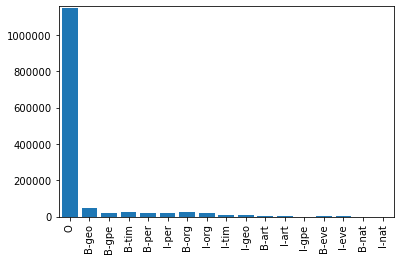

In [16]:
indexes = np.arange(len(labels))


plt.bar(indexes, values)
plt.xticks(indexes, labels, rotation='vertical')
plt.margins(0.01)
plt.subplots_adjust(bottom=0.15)
plt.show()

# Normalizing and Vectorizing

In [17]:
import glob
import pandas as pd

# could use `outfiles` param as well
files = glob.glob("./ner/*.tags")

data_pd = pd.concat([pd.read_csv(f, header=None, 
                                 names=["text", "label", "pos"]) 
                for f in files], ignore_index = True)

In [18]:
data_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62010 entries, 0 to 62009
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    62010 non-null  object
 1   label   62010 non-null  object
 2   pos     62010 non-null  object
dtypes: object(3)
memory usage: 1.4+ MB


In [19]:
### Keras tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
text_tok = Tokenizer(filters='[\\]^\t\n', lower=False,
                     split=' ', oov_token='<OOV>')

pos_tok = Tokenizer(filters='\t\n', lower=False,
                    split=' ', oov_token='<OOV>')

ner_tok = Tokenizer(filters='\t\n', lower=False,
                    split=' ', oov_token='<OOV>')

In [20]:
text_tok.fit_on_texts(data_pd['text'])
pos_tok.fit_on_texts(data_pd['pos'])
ner_tok.fit_on_texts(data_pd['label'])

In [21]:
ner_config = ner_tok.get_config()
text_config = text_tok.get_config()

In [22]:
print(ner_config)

{'num_words': None, 'filters': '\t\n', 'lower': False, 'split': ' ', 'char_level': False, 'oov_token': '<OOV>', 'document_count': 62010, 'word_counts': '{"O": 1146068, "B-org": 26195, "B-per": 21984, "I-per": 22270, "B-tim": 26296, "B-geo": 48876, "I-geo": 9512, "I-org": 21899, "I-tim": 8493, "B-gpe": 20436, "I-gpe": 244, "B-nat": 238, "B-eve": 391, "I-eve": 318, "B-art": 503, "I-art": 364, "I-nat": 62}', 'word_docs': '{"O": 61999, "B-org": 20478, "B-per": 17499, "I-per": 13805, "B-tim": 22345, "B-geo": 31660, "I-geo": 7738, "I-org": 11011, "I-tim": 5526, "B-gpe": 16565, "I-gpe": 224, "B-nat": 211, "B-eve": 361, "I-eve": 201, "B-art": 425, "I-art": 207, "I-nat": 50}', 'index_docs': '{"2": 61999, "5": 20478, "7": 17499, "6": 13805, "4": 22345, "3": 31660, "10": 7738, "8": 11011, "11": 5526, "9": 16565, "16": 224, "17": 211, "13": 361, "15": 201, "12": 425, "14": 207, "18": 50}', 'index_word': '{"1": "<OOV>", "2": "O", "3": "B-geo", "4": "B-tim", "5": "B-org", "6": "I-per", "7": "B-per",

In [23]:
text_vocab = eval(text_config['index_word'])
ner_vocab = eval(ner_config['index_word'])

print("Unique words in vocab:", len(text_vocab))
print("Unique NER tags in vocab:", len(ner_vocab))

Unique words in vocab: 39422
Unique NER tags in vocab: 18


In [24]:
x_tok = text_tok.texts_to_sequences(data_pd['text'])
y_tok = ner_tok.texts_to_sequences(data_pd['label'])

In [25]:
print(text_tok.sequences_to_texts([x_tok[1]]), data_pd['text'][1])
print(ner_tok.sequences_to_texts([y_tok[1]]), data_pd['label'][1])

['Faure Gnassingbe said in a speech carried by state media Friday he will remain interim president until elections take place .'] Faure Gnassingbe said in a speech carried by state media Friday he will remain interim president until elections take place .
['B-per I-per O O O O O O O O B-tim O O O O O O O O O O'] B-per I-per O O O O O O O O B-tim O O O O O O O O O O


In [26]:
# now, pad seqences to a maximum length
from tensorflow.keras.preprocessing import sequence

max_len = 50

x_pad = sequence.pad_sequences(x_tok, padding='post',
                              maxlen=max_len)
y_pad = sequence.pad_sequences(y_tok, padding='post',
                              maxlen=max_len)

In [27]:
print(x_pad.shape, y_pad.shape)

(62010, 50) (62010, 50)


In [28]:
text_tok.sequences_to_texts([x_pad[1]])

['Faure Gnassingbe said in a speech carried by state media Friday he will remain interim president until elections take place . <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV>']

In [29]:
ner_tok.sequences_to_texts([y_pad[1]])

['B-per I-per O O O O O O O O B-tim O O O O O O O O O O <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV>']

In [30]:
num_classes = len(ner_vocab)+1

Y = tf.keras.utils.to_categorical(y_pad, num_classes=num_classes)
Y.shape

(62010, 50, 19)

# Building and Training the BiLSTM Model

In [38]:
# Length of the vocabulary 
vocab_size = len(text_vocab) + 1 

# The embedding dimension
embedding_dim = 64

# Number of RNN units
rnn_units = 100

#batch size
BATCH_SIZE=90

# num of NER classes
num_classes = len(ner_vocab)+1

from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, TimeDistributed, Dense

dropout=0.2
def build_model_bilstm(vocab_size, embedding_dim, rnn_units, batch_size, classes):
  model = tf.keras.Sequential([
    Embedding(vocab_size, embedding_dim, mask_zero=True,
                              batch_input_shape=[batch_size, None]),
    Bidirectional(LSTM(units=rnn_units,
                           return_sequences=True,
                           dropout=dropout,  
                           kernel_initializer=tf.keras.initializers.he_normal())),
    TimeDistributed(Dense(rnn_units, activation='relu')),
    Dense(num_classes, activation="softmax")
  ])

  
  return model

In [39]:
model = build_model_bilstm(
                        vocab_size = vocab_size,
                        embedding_dim=embedding_dim,
                        rnn_units=rnn_units,
                        batch_size=BATCH_SIZE,
                        classes=num_classes)
model.summary()
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (90, None, 64)            2523072   
_________________________________________________________________
bidirectional_1 (Bidirection (90, None, 200)           132000    
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 100)         20100     
_________________________________________________________________
dense_2 (Dense)              (None, None, 19)          1919      
Total params: 2,677,091
Trainable params: 2,677,091
Non-trainable params: 0
_________________________________________________________________


In [40]:
X = x_pad 

In [41]:
# create training and testing splits
total_sentences = 62010
test_size = round(total_sentences / BATCH_SIZE * 0.2)
X_train = X[BATCH_SIZE*test_size:]
Y_train = Y[BATCH_SIZE*test_size:]

X_test = X[0:BATCH_SIZE*test_size]
Y_test = Y[0:BATCH_SIZE*test_size]

In [42]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(49590, 50) (49590, 50, 19)
(12420, 50) (12420, 50, 19)


In [43]:
model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=15)

Epoch 1/15
551/551 [==============================] - 60s 110ms/step - loss: 0.1755 - accuracy: 0.9105
Epoch 2/15
551/551 [==============================] - 64s 117ms/step - loss: 0.0457 - accuracy: 0.9689
Epoch 3/15
551/551 [==============================] - 62s 112ms/step - loss: 0.0342 - accuracy: 0.9758
Epoch 4/15
551/551 [==============================] - 61s 111ms/step - loss: 0.0286 - accuracy: 0.9791
Epoch 5/15
551/551 [==============================] - 59s 107ms/step - loss: 0.0247 - accuracy: 0.9815
Epoch 6/15
551/551 [==============================] - 60s 108ms/step - loss: 0.0214 - accuracy: 0.9840
Epoch 7/15
551/551 [==============================] - 59s 108ms/step - loss: 0.0187 - accuracy: 0.9859
Epoch 8/15
551/551 [==============================] - 61s 110ms/step - loss: 0.0163 - accuracy: 0.9876
Epoch 9/15
551/551 [==============================] - 61s 111ms/step - loss: 0.0142 - accuracy: 0.9891
Epoch 10/15
551/551 [==============================] - 62s 113ms/step - l

In [44]:
# batch size in eval
model.evaluate(X_test, Y_test, batch_size=BATCH_SIZE)

138/138 [==============================] - 4s 28ms/step - loss: 0.0932 - accuracy: 0.9619


[0.09319353848695755, 0.9619451761245728]

In [45]:
y_pred = model.predict(X_test, batch_size=BATCH_SIZE)

In [46]:
text_tok.sequences_to_texts([X_test[1]])

['Faure Gnassingbe said in a speech carried by state media Friday he will remain interim president until elections take place . <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV>']

In [47]:
ner_tok.sequences_to_texts([y_pad[1]])

['B-per I-per O O O O O O O O B-tim O O O O O O O O O O <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV>']

In [48]:
y_pred = tf.argmax(y_pred, -1)
y_pred.shape

TensorShape([12420, 50])

In [49]:
y_pnp = y_pred.numpy()

In [50]:
ner_tok.sequences_to_texts([y_pnp[1]])

['B-per I-per O O O O O O O O B-tim O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O']

## BiLSTM-CRF Model

In [126]:
!pip install tensorflow_addons

     |████████████████████████████████| 1.0MB 4.4MB/s eta 0:00:01


In [24]:
import tensorflow_addons as tfa
tfa.__version__

'0.11.2'

In [25]:
from tensorflow.keras.layers import Layer
from tensorflow.keras import backend as K

class CRFLayer(Layer):
  """
  Computes the log likelihood during training
  Performs Viterbi decoding during prediction
  """
  def __init__(self,
               label_size,
               mask_id=0,
               trans_params=None,
               name='crf',
               **kwargs):
    super(CRFLayer, self).__init__(name=name, **kwargs)
    self.label_size = label_size
    self.mask_id = mask_id
    self.transition_params = None
    
    if trans_params is None:  # not reloading pretrained params
        self.transition_params = tf.Variable(tf.random.uniform(shape=(label_size, label_size)),
                                         trainable=False)
    else:
        self.transition_params = trans_params

  def get_seq_lengths(self, matrix):
    # matrix is of shape (batch_size, max_seq_len)
    mask = tf.not_equal(matrix, self.mask_id)
    seq_lengths = tf.math.reduce_sum(
                                    tf.cast(mask, dtype=tf.int32), 
                                    axis=-1)
    return seq_lengths

  def call(self, inputs, seq_lengths, training=None):
    if training is None:
        training = K.learning_phase()
    
    # during training, this layer just returns the logits
    if training:
        return inputs
    
    # viterbi decode logic to return proper 
    # results at inference
    _, max_seq_len, _ = inputs.shape
    seqlens = seq_lengths
    paths = []
    for logit, text_len in zip(inputs, seqlens):
        viterbi_path, _ = tfa.text.viterbi_decode(logit[:text_len], 
                                              self.transition_params)
        paths.append(self.pad_viterbi(viterbi_path, max_seq_len))

    return tf.convert_to_tensor(paths) 
  
  def pad_viterbi(self, viterbi, max_seq_len):
    if len(viterbi) < max_seq_len:
        viterbi = viterbi + [self.mask_id] * (max_seq_len - len(viterbi))
    return viterbi

  def get_proper_labels(self, y_true):
    shape = y_true.shape
    if len(shape) > 2:
        return tf.argmax(y_true, -1, output_type=tf.int32)
    return y_true
        
  def loss(self, y_true, y_pred):
    y_pred = tf.convert_to_tensor(y_pred)
    y_true = tf.cast(self.get_proper_labels(y_true), y_pred.dtype)

    seq_lengths = self.get_seq_lengths(y_true)
    log_likelihoods, self.transition_params = tfa.text.crf_log_likelihood(y_pred, 
                                                                y_true, seq_lengths)

    # save transition params
    self.transition_params = tf.Variable(self.transition_params, trainable=False)
    # calc loss
    loss = - tf.reduce_mean(log_likelihoods)
    return loss


In [26]:
from tensorflow.keras import Model, Input, Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense, TimeDistributed
from tensorflow.keras.layers import Dropout, Bidirectional
from tensorflow.keras import backend as K

class NerModel(tf.keras.Model):
    def __init__(self, hidden_num, vocab_size, label_size, embedding_size,
                name='BilstmCrfModel', **kwargs):
        super(NerModel, self).__init__(name=name, **kwargs)
        self.num_hidden = hidden_num
        self.vocab_size = vocab_size
        self.label_size = label_size

        self.embedding = Embedding(vocab_size, embedding_size, 
                                   mask_zero=True, name="embedding")
        self.biLSTM =Bidirectional(LSTM(hidden_num, return_sequences=True), name="bilstm")
        self.dense = TimeDistributed(tf.keras.layers.Dense(label_size), name="dense")
        self.crf = CRFLayer(self.label_size, name="crf")

    def call(self, text, labels=None, training=None):
        seq_lengths = tf.math.reduce_sum(tf.cast(tf.math.not_equal(text, 0), 
                                               dtype=tf.int32), axis=-1) 
        
        if training is None:
            training = K.learning_phase()

        inputs = self.embedding(text)
        bilstm = self.biLSTM(inputs)
        logits = self.dense(bilstm)
        outputs = self.crf(logits, seq_lengths, training)
        
        return outputs

In [27]:
# Length of the vocabulary in chars
vocab_size = len(text_vocab)+1 # len(chars)

# The embedding dimension
embedding_dim = 64

# Number of RNN units
rnn_units = 100

#batch size
BATCH_SIZE=90

# num of NER classes
num_classes = len(ner_vocab)+1

blc_model = NerModel(rnn_units, vocab_size, num_classes, embedding_dim, dynamic=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

In [28]:
# create training and testing splits
total_sentences = 62010
test_size = round(total_sentences / BATCH_SIZE * 0.2)
X_train = x_pad[BATCH_SIZE*test_size:]
Y_train = Y[BATCH_SIZE*test_size:]

X_test = x_pad[0:BATCH_SIZE*test_size]
Y_test = Y[0:BATCH_SIZE*test_size]
Y_train_int = tf.cast(Y_train, dtype=tf.int32)

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train_int))
train_dataset = train_dataset.batch(BATCH_SIZE, drop_remainder=True)

In [29]:
loss_metric = tf.keras.metrics.Mean()

epochs = 5

# Iterate over epochs.
for epoch in range(epochs):
    print('Start of epoch %d' % (epoch,))

    # Iterate over the batches of the dataset.
    for step, (text_batch, labels_batch) in enumerate(train_dataset):
        labels_max = tf.argmax(labels_batch, -1, output_type=tf.int32)
        with tf.GradientTape() as tape:
            logits = blc_model(text_batch, training=True)
            loss = blc_model.crf.loss(labels_max, logits)

            grads = tape.gradient(loss, blc_model.trainable_weights)
            optimizer.apply_gradients(zip(grads, blc_model.trainable_weights))
            
            loss_metric(loss)
        if step % 50 == 0:
          print('step %s: mean loss = %s' % (step, loss_metric.result()))

Start of epoch 0
step 0: mean loss = tf.Tensor(73.376625, shape=(), dtype=float32)
step 50: mean loss = tf.Tensor(31.27511, shape=(), dtype=float32)
step 100: mean loss = tf.Tensor(23.989388, shape=(), dtype=float32)
step 150: mean loss = tf.Tensor(20.623888, shape=(), dtype=float32)
step 200: mean loss = tf.Tensor(18.11321, shape=(), dtype=float32)
step 250: mean loss = tf.Tensor(16.339197, shape=(), dtype=float32)
step 300: mean loss = tf.Tensor(15.013313, shape=(), dtype=float32)
step 350: mean loss = tf.Tensor(13.896758, shape=(), dtype=float32)
step 400: mean loss = tf.Tensor(13.030142, shape=(), dtype=float32)
step 450: mean loss = tf.Tensor(12.252562, shape=(), dtype=float32)
step 500: mean loss = tf.Tensor(11.550811, shape=(), dtype=float32)
step 550: mean loss = tf.Tensor(10.937271, shape=(), dtype=float32)
Start of epoch 1
step 0: mean loss = tf.Tensor(10.925785, shape=(), dtype=float32)
step 50: mean loss = tf.Tensor(10.372887, shape=(), dtype=float32)
step 100: mean loss = 

In [30]:
Y_test_int = tf.cast(Y_test, dtype=tf.int32)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test_int))
test_dataset = test_dataset.batch(BATCH_SIZE, drop_remainder=True)

In [31]:
out = blc_model.predict(test_dataset.take(1))

In [32]:
# check the outputs
print(out[1], tf.argmax(Y_test[1], -1))
print(out[2], tf.argmax(Y_test[2], -1))

[ 3  2  2  2  2  3 10  2  7  6  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0] tf.Tensor(
[ 3  2  2  2  2  3 10  2  7  6  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0], shape=(50,), dtype=int64)
[2 2 2 5 8 2 2 7 6 2 2 2 2 2 2 2 2 2 2 2 3 3 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0] tf.Tensor(
[2 2 5 8 8 2 2 7 5 2 2 2 2 2 2 2 2 2 2 2 2 3 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(50,), dtype=int64)


In [33]:
text_tok.sequences_to_texts([X_test[2]])

['Writing in The Washington Post newspaper , Mr. Ushakov also said it is inadmissible to move in the direction of demonizing Russia . <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV>']

In [34]:
print("Ground Truth: ", ner_tok.sequences_to_texts([tf.argmax(Y_test[2], -1).numpy()]))
print("Prediction: ", ner_tok.sequences_to_texts([out[2]]))

Ground Truth:  ['O O B-org I-org I-org O O B-per B-org O O O O O O O O O O O O B-geo O <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV>']
Prediction:  ['O O O B-org I-org O O B-per I-per O O O O O O O O O O O B-geo B-geo O <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV>']


In [35]:
print(ner_tok.sequences_to_texts([tf.argmax(Y_test[1], -1).numpy()]))
print(ner_tok.sequences_to_texts([out[1]]))

['B-geo O O O O B-geo I-geo O B-per I-per O O O O O O O O O O O O O O O O O O O O O O O <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV>']
['B-geo O O O O B-geo I-geo O B-per I-per O O O O O O O O O O O O O O O O O O O O O O O <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV>']


In [36]:
blc_model.summary()

Model: "BilstmCrfModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        multiple                  2523072   
_________________________________________________________________
bilstm (Bidirectional)       multiple                  132000    
_________________________________________________________________
dense (TimeDistributed)      multiple                  3819      
_________________________________________________________________
crf (CRFLayer)               multiple                  361       
Total params: 2,659,252
Trainable params: 2,658,891
Non-trainable params: 361
_________________________________________________________________


In [37]:
def np_precision(pred, true):
    # expect numpy arrays
    assert pred.shape == true.shape
    assert len(pred.shape) == 2
    mask_pred = np.ma.masked_equal(pred, 0)
    mask_true = np.ma.masked_equal(true, 0)
    acc = np.equal(mask_pred, mask_true)
    return np.mean(acc.compressed().astype(int))

In [38]:
np_precision(out, tf.argmax(Y_test[:BATCH_SIZE], -1).numpy())

0.9636105860113422